## Ames Housing Prediction Model

To create a regression model to predict the price of a house at sale.

In [1]:
#Imports:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as sklm
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
#Read the datasets
df_train=pd.read_csv("./datasets/train.csv")
df_test=pd.read_csv("./datasets/test.csv")

## Exploratory Data Analysis (EDA)

### Examine the data set structure

In [4]:
df_train.shape

(2051, 81)

In [5]:
df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [7]:
df_train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


### Examine distribution of the saleprice

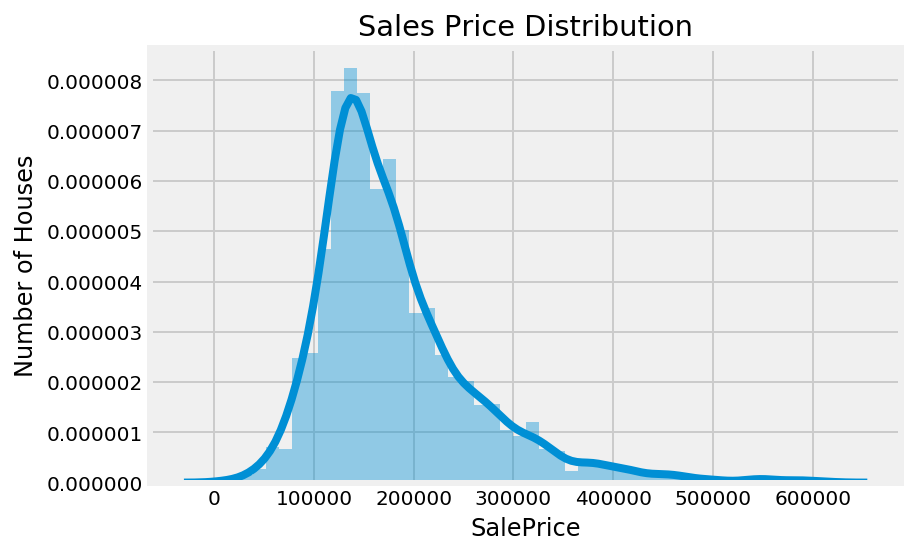

In [8]:
plt.xlabel("Sales Price")
plt.ylabel("Number of Houses")
plt.title("Sales Price Distribution")
sns.distplot(df_train['SalePrice']);

We can see the sale price is skewed to the right. We will take the log of the saleprice.

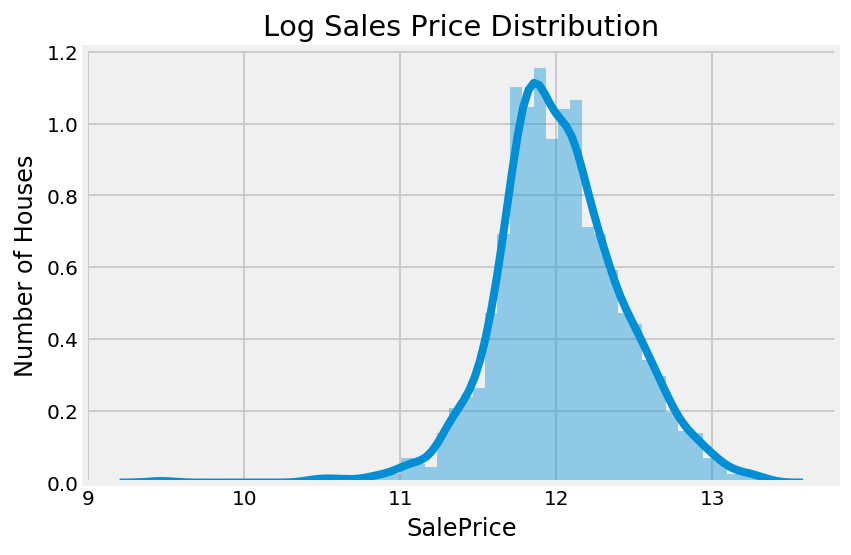

In [9]:
plt.xlabel("Sales Price")
plt.ylabel("Number of Houses")
plt.title("Log Sales Price Distribution")
sns.distplot(np.log(df_train['SalePrice']));

The sale price now follows a normal distribution. We will use the log of the sale price for our models.

Examine correlation of the variables.

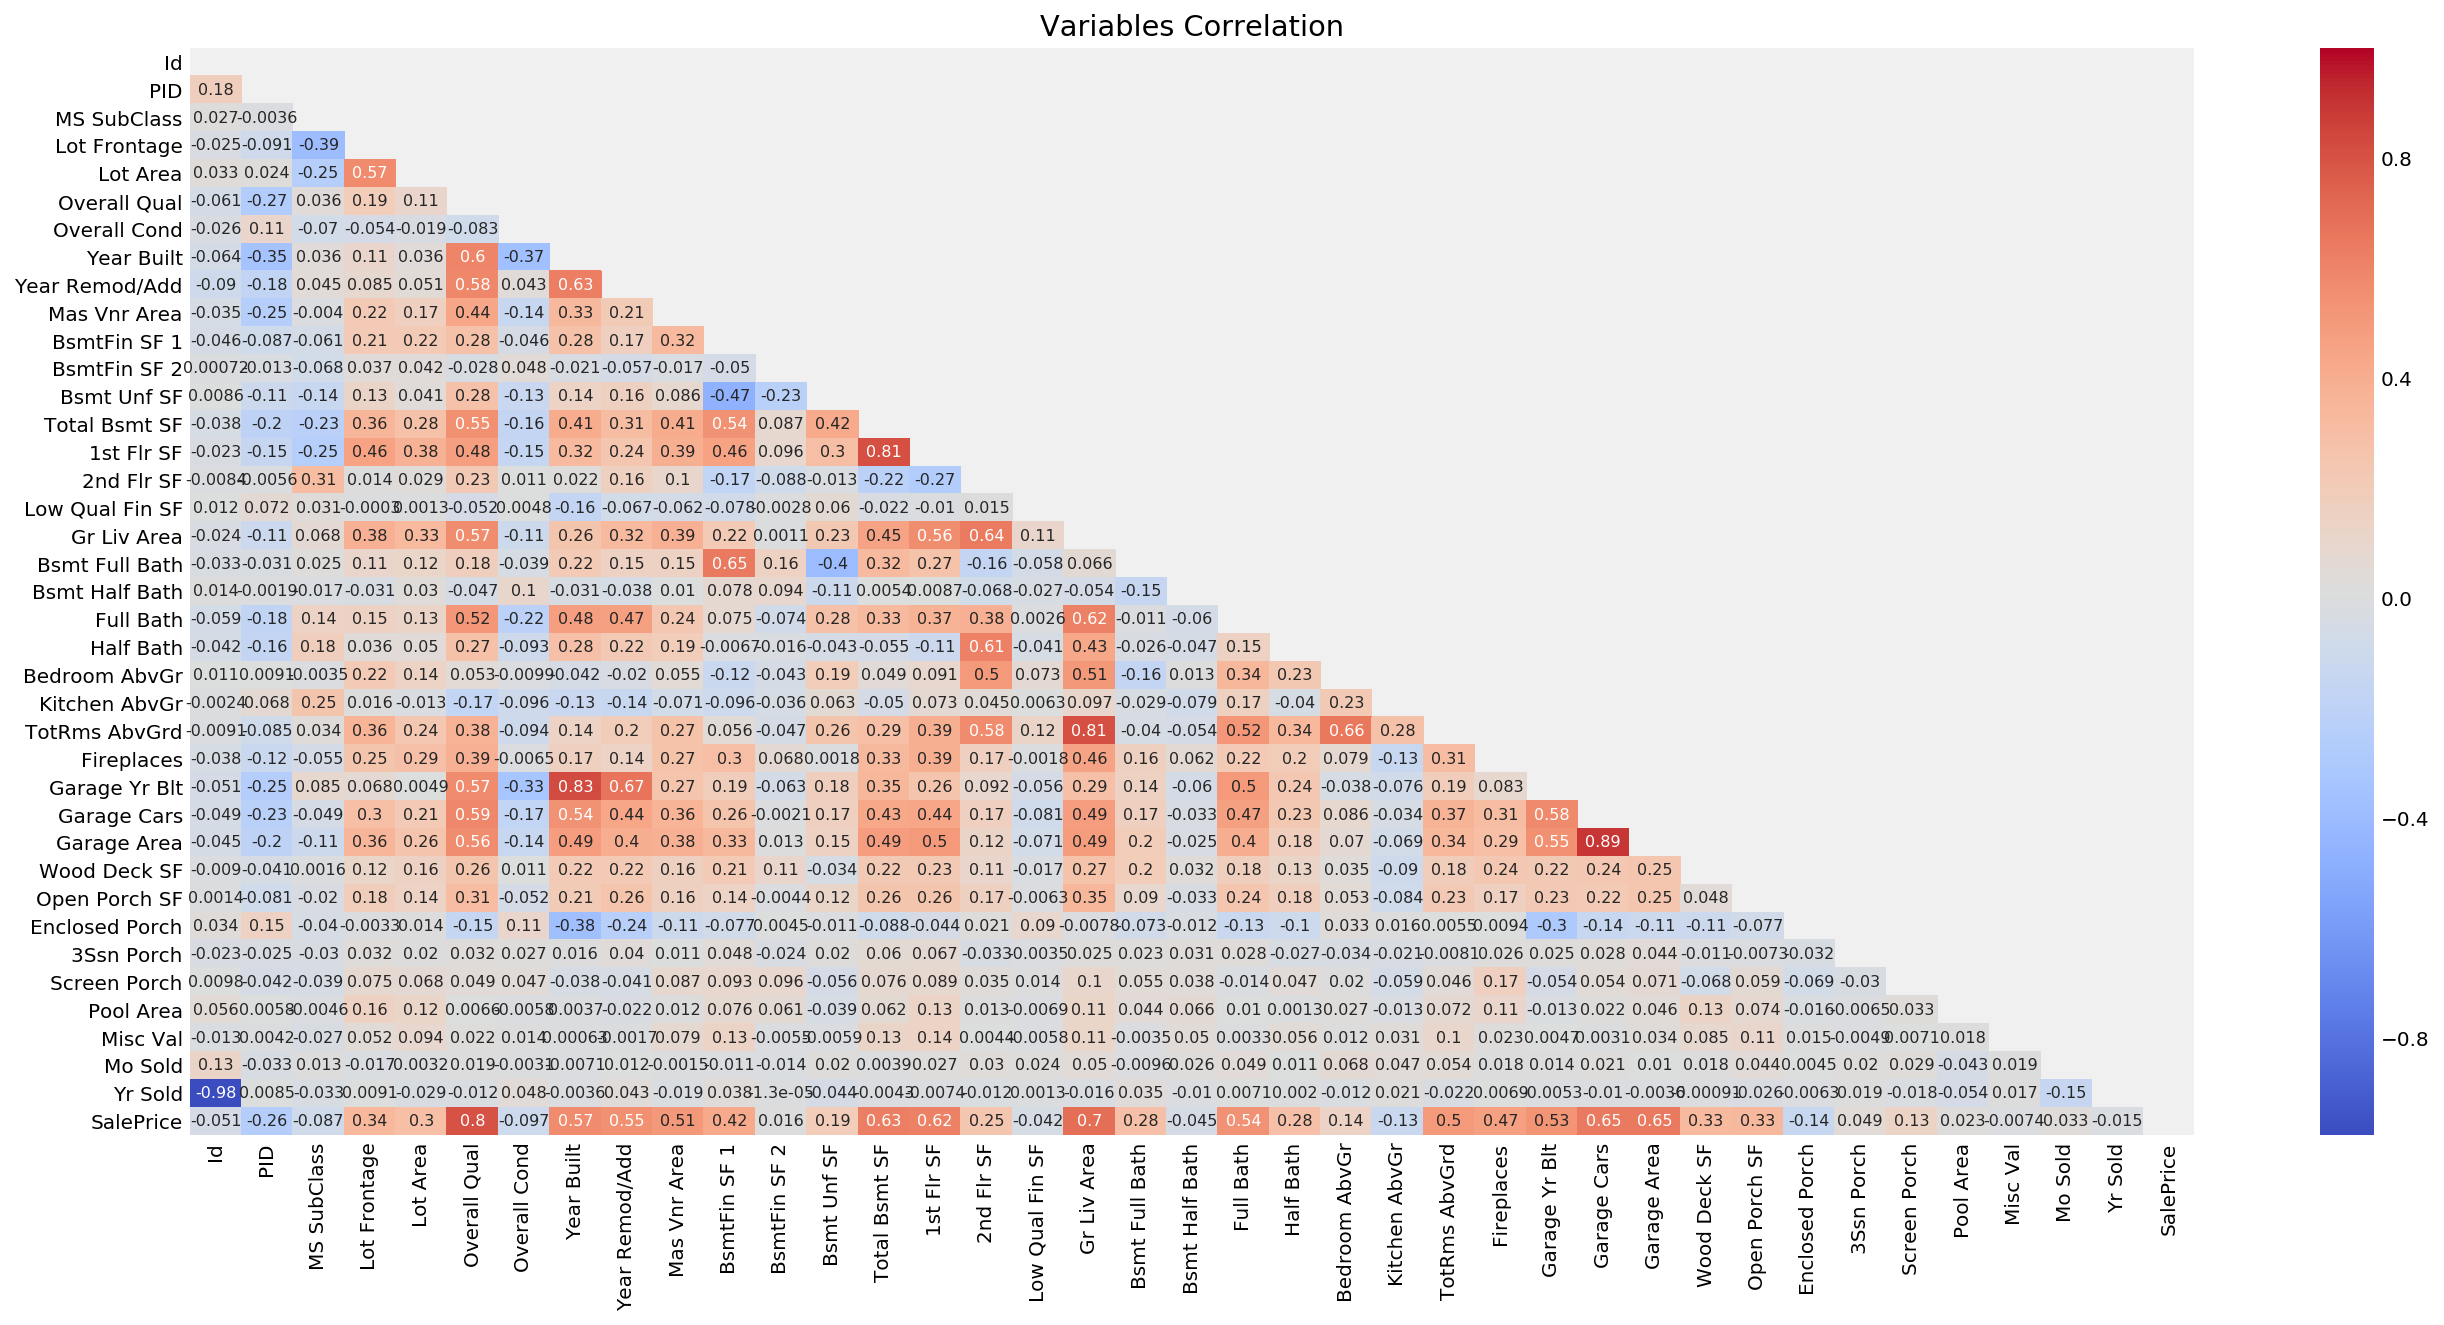

In [10]:
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20,10))
plt.title("Variables Correlation")
sns.heatmap(df_train.corr(), mask=mask,vmax=1,cmap='coolwarm',annot_kws={'size': 8}, annot=True);

There are too many variables. To examine the variables with the highest correlation.

In [11]:
print(df_train.corr().nlargest(20, 'SalePrice')['SalePrice'].index)

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage',
       'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath'],
      dtype='object')


In [12]:
cm=df_train[['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area',
       'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
       'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage',
       'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath']].corr()

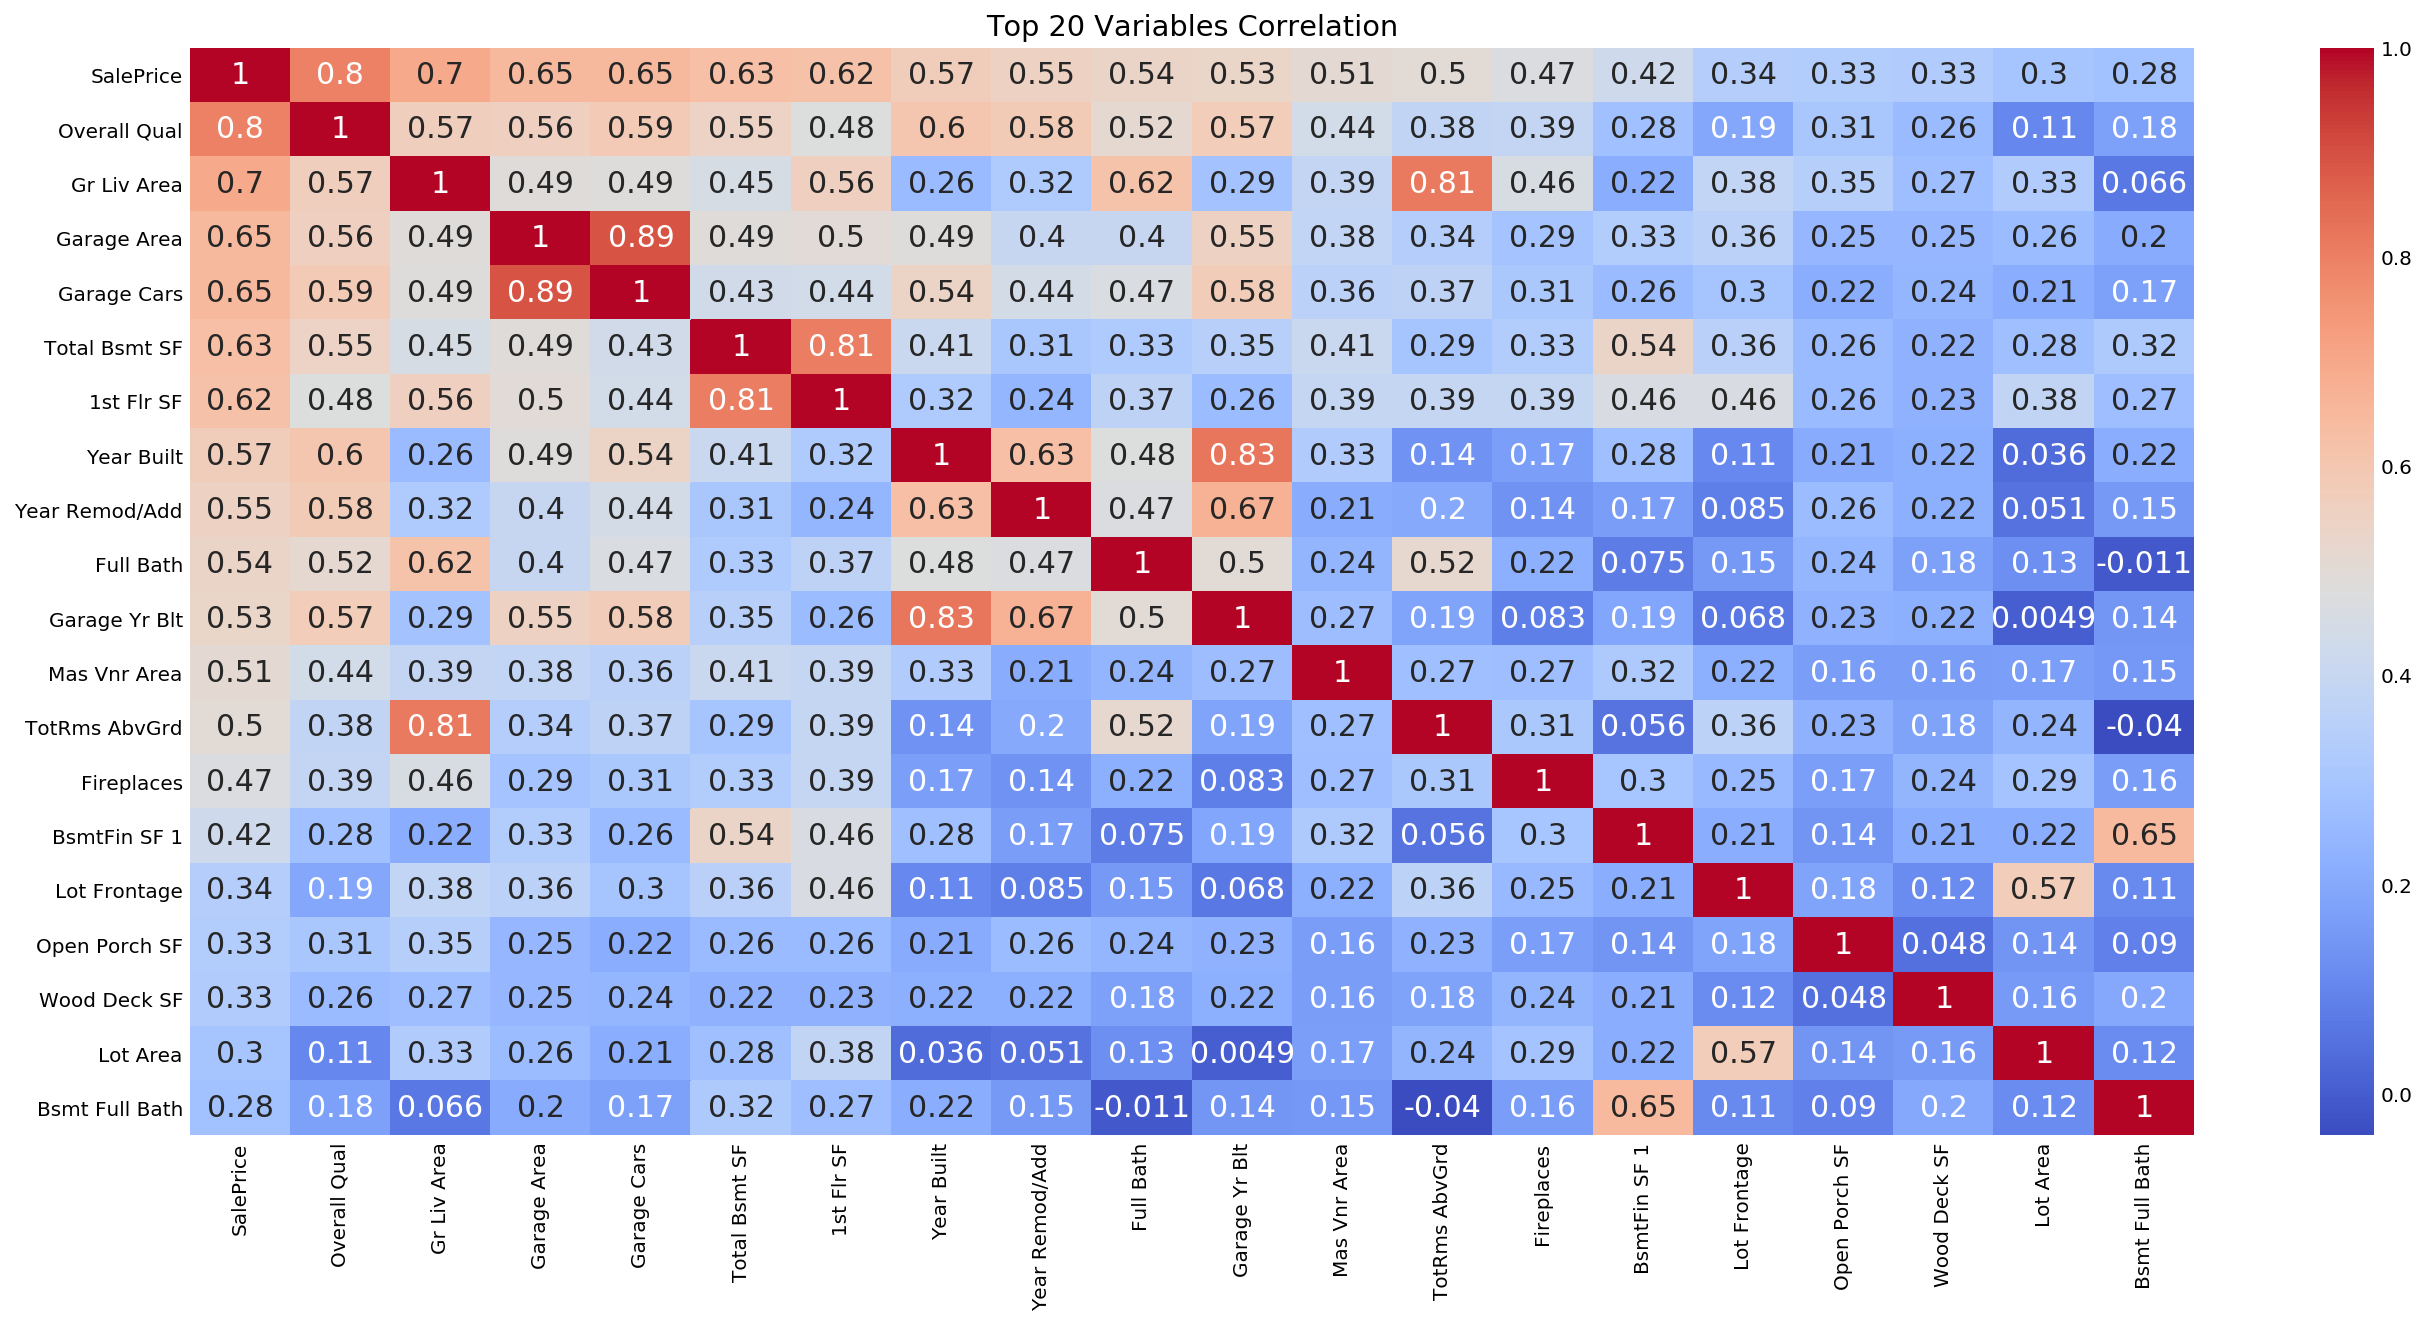

In [13]:
#sns.set(font_scale=1.5)
plt.figure(figsize = (20,10))
plt.title("Top 20 Variables Correlation")
sns.heatmap(cm,vmax=1,cmap='coolwarm',annot_kws={'size': 15}, annot=True);

In [14]:
# To check the correlation values against Saleprice.
df_train.corr().nlargest(20, 'SalePrice')['SalePrice']

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Mas Vnr Area      0.512230
TotRms AbvGrd     0.504014
Fireplaces        0.471093
BsmtFin SF 1      0.423519
Lot Frontage      0.341842
Open Porch SF     0.333476
Wood Deck SF      0.326490
Lot Area          0.296566
Bsmt Full Bath    0.283662
Name: SalePrice, dtype: float64

From the table, we can see that Overall Qual and Gr Liv Area have a strong positive correlation with the Saleprice.
Furthermore, it can be shown that variables Garage Cars, 1st Flr SF, TotRms AbvGrd and Garage Yr built are correlated with Garage Areas, TotalBsmt SF, Gr Liv Area and Year built respectively.

## Plotting scatterplots for continuous variables.

In [15]:
def plot_scatter(df, list_of_columns, y_axis): 
        nrows = int(np.ceil(len(list_of_columns)/4)) # Makes sure there are enough rows
        fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(25,30)) 
        fig.subplots_adjust(hspace=0.2, wspace=0.2) #adjust position of subplots
        ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
        for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
            ax[i].scatter(x = df[column], y =y_axis,alpha=0.8)        
            ax[i].set_title('Scatter plot of ' + column)
            ax[i].set_xlabel(column) # x label
            ax[i].set_ylabel("SalePrice")  # y label

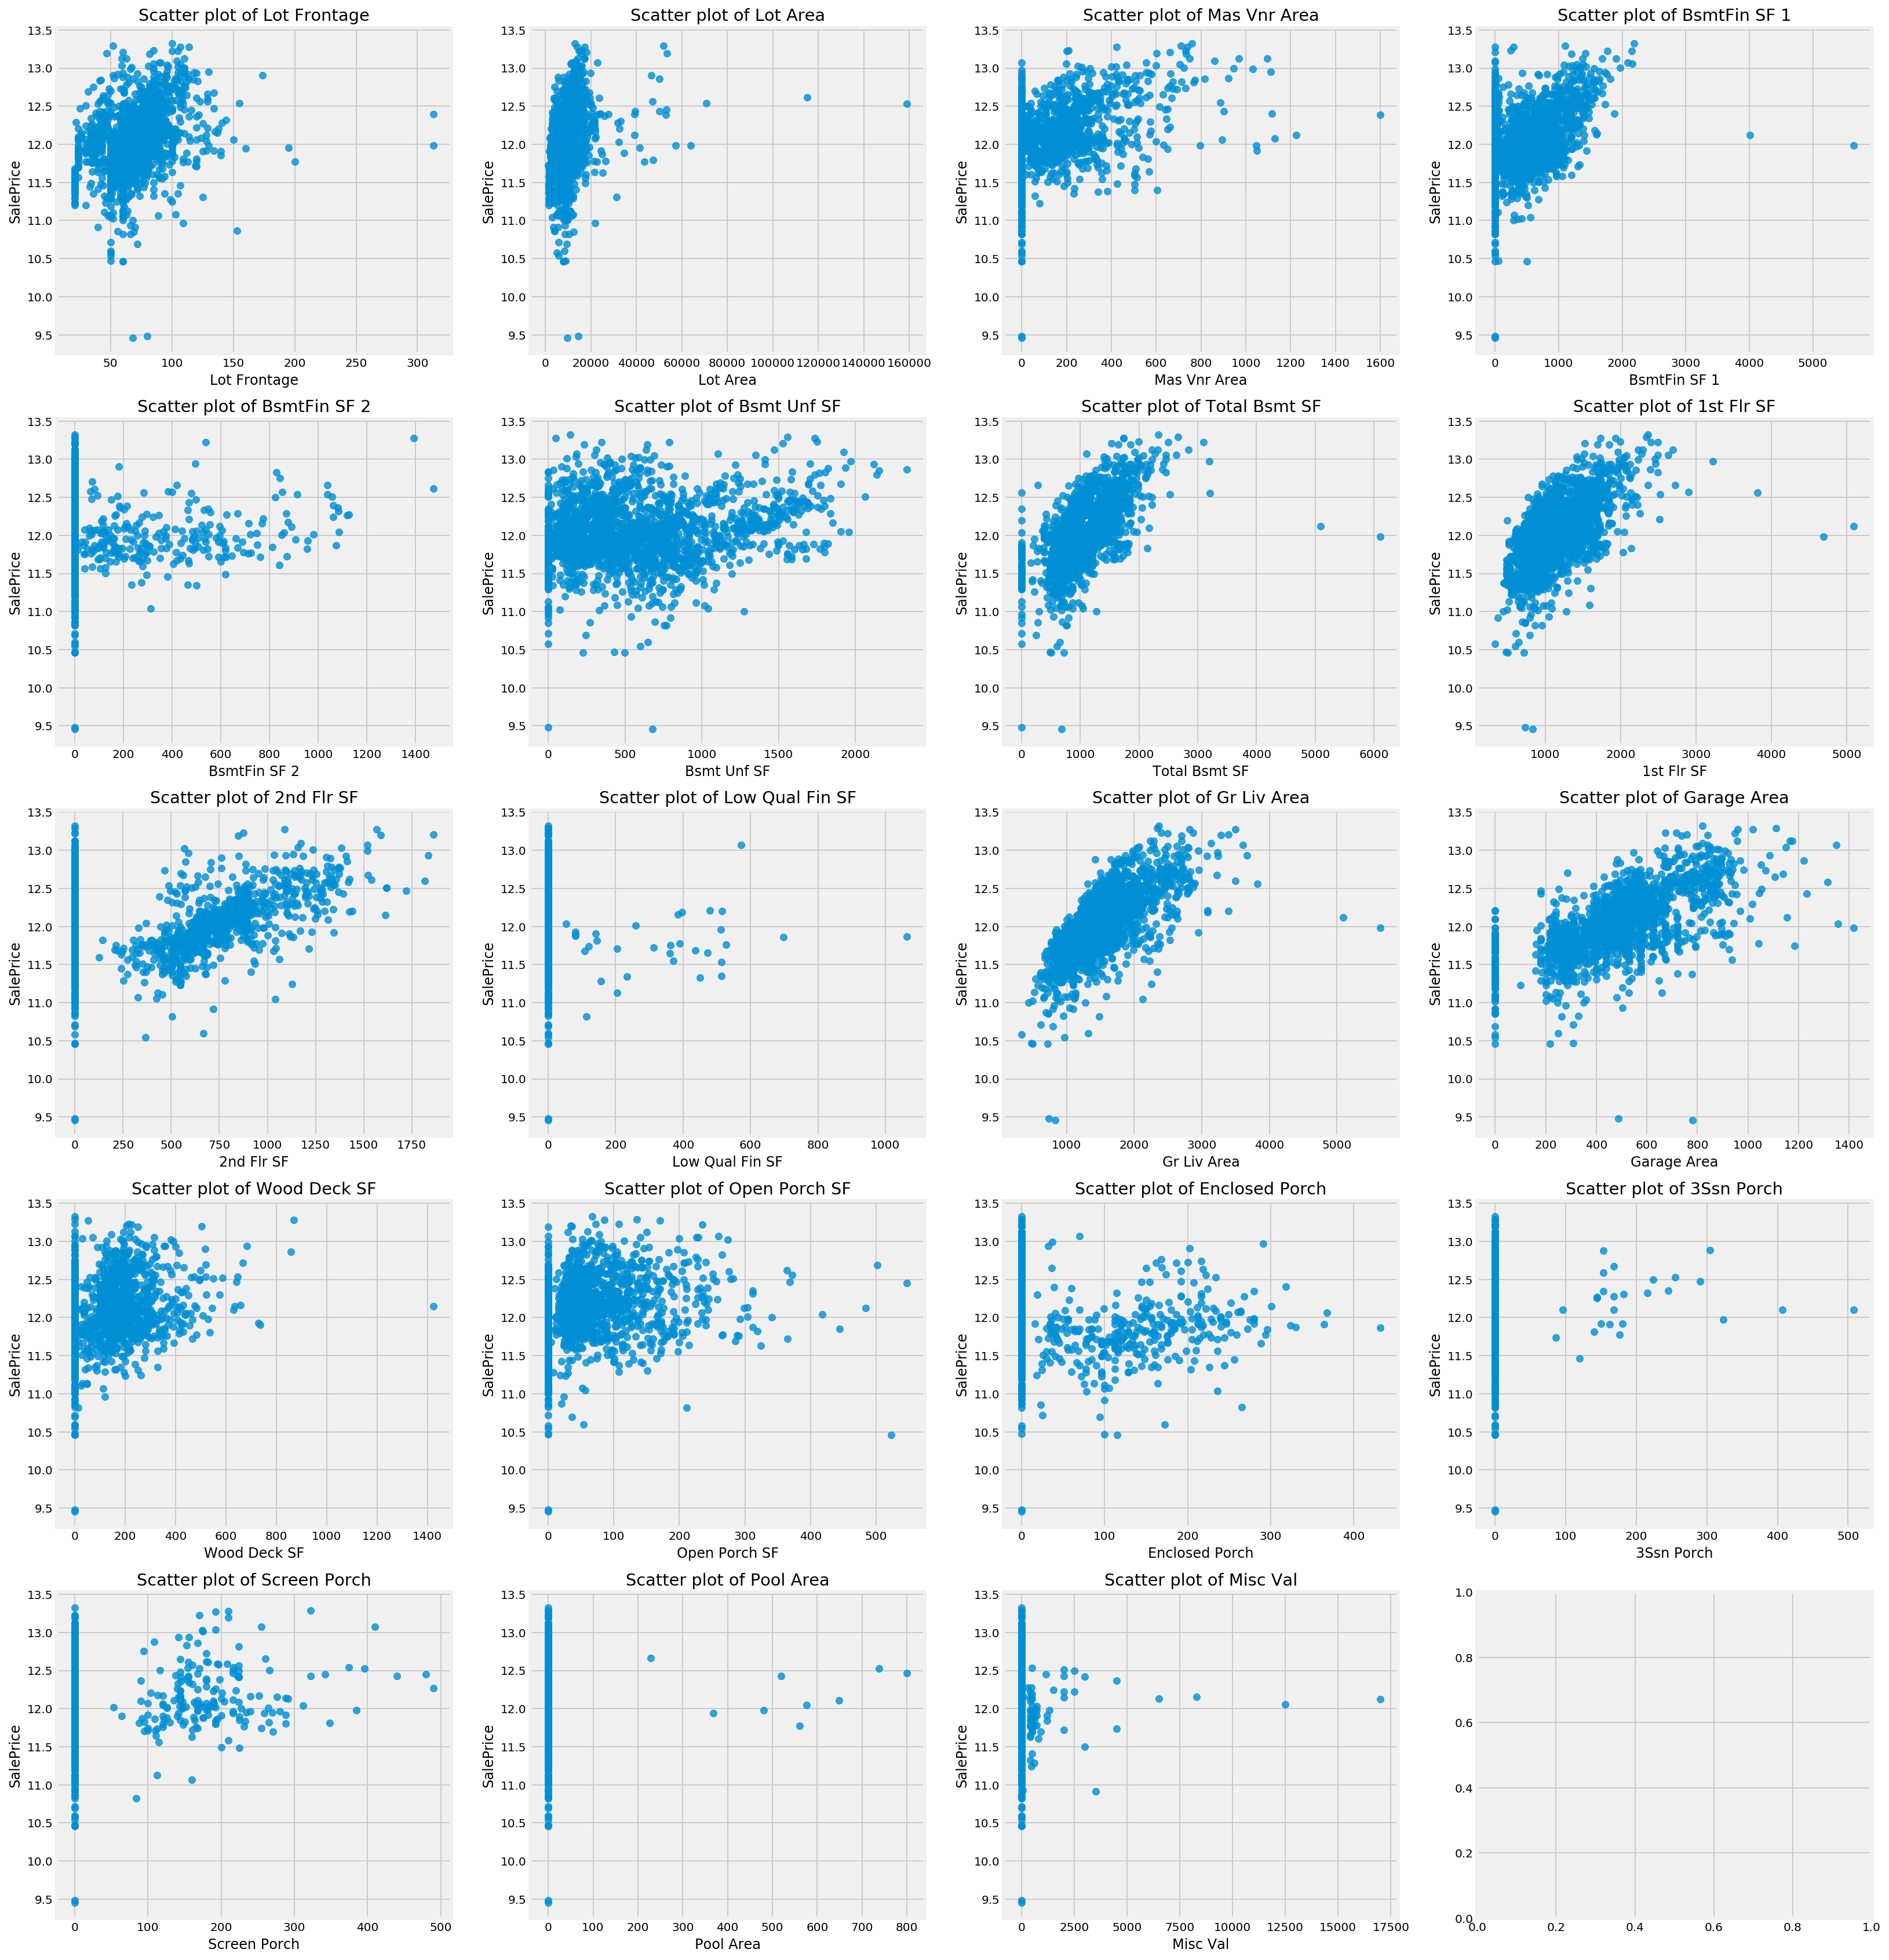

In [16]:
cols=['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
        '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
        '3Ssn Porch','Screen Porch','Pool Area','Misc Val']
plot_scatter(df_train,cols,np.log(df_train['SalePrice']))

We find there are outliers for 'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch','Screen Porch','Pool Area','Misc Val'.

We can also see that for 'Low Qual Fin SF', '3Ssn Porch','Screen Porch','Pool Area','Misc Val', they are mostly zeros.

In [17]:
for col in ['Low Qual Fin SF', '3Ssn Porch','Screen Porch','Pool Area','Misc Val']:
    print("% of zeroes in column {}: {}%".format(col,round(df_train[col].value_counts().get(0,0)/2051,3)))

% of zeroes in column Low Qual Fin SF: 0.984%
% of zeroes in column 3Ssn Porch: 0.987%
% of zeroes in column Screen Porch: 0.912%
% of zeroes in column Pool Area: 0.996%
% of zeroes in column Misc Val: 0.968%


We can consider removing 'Low Qual Fin SF', '3Ssn Porch','Screen Porch','Pool Area','Misc Val'.

## Plotting scatterplots for discrete variables.

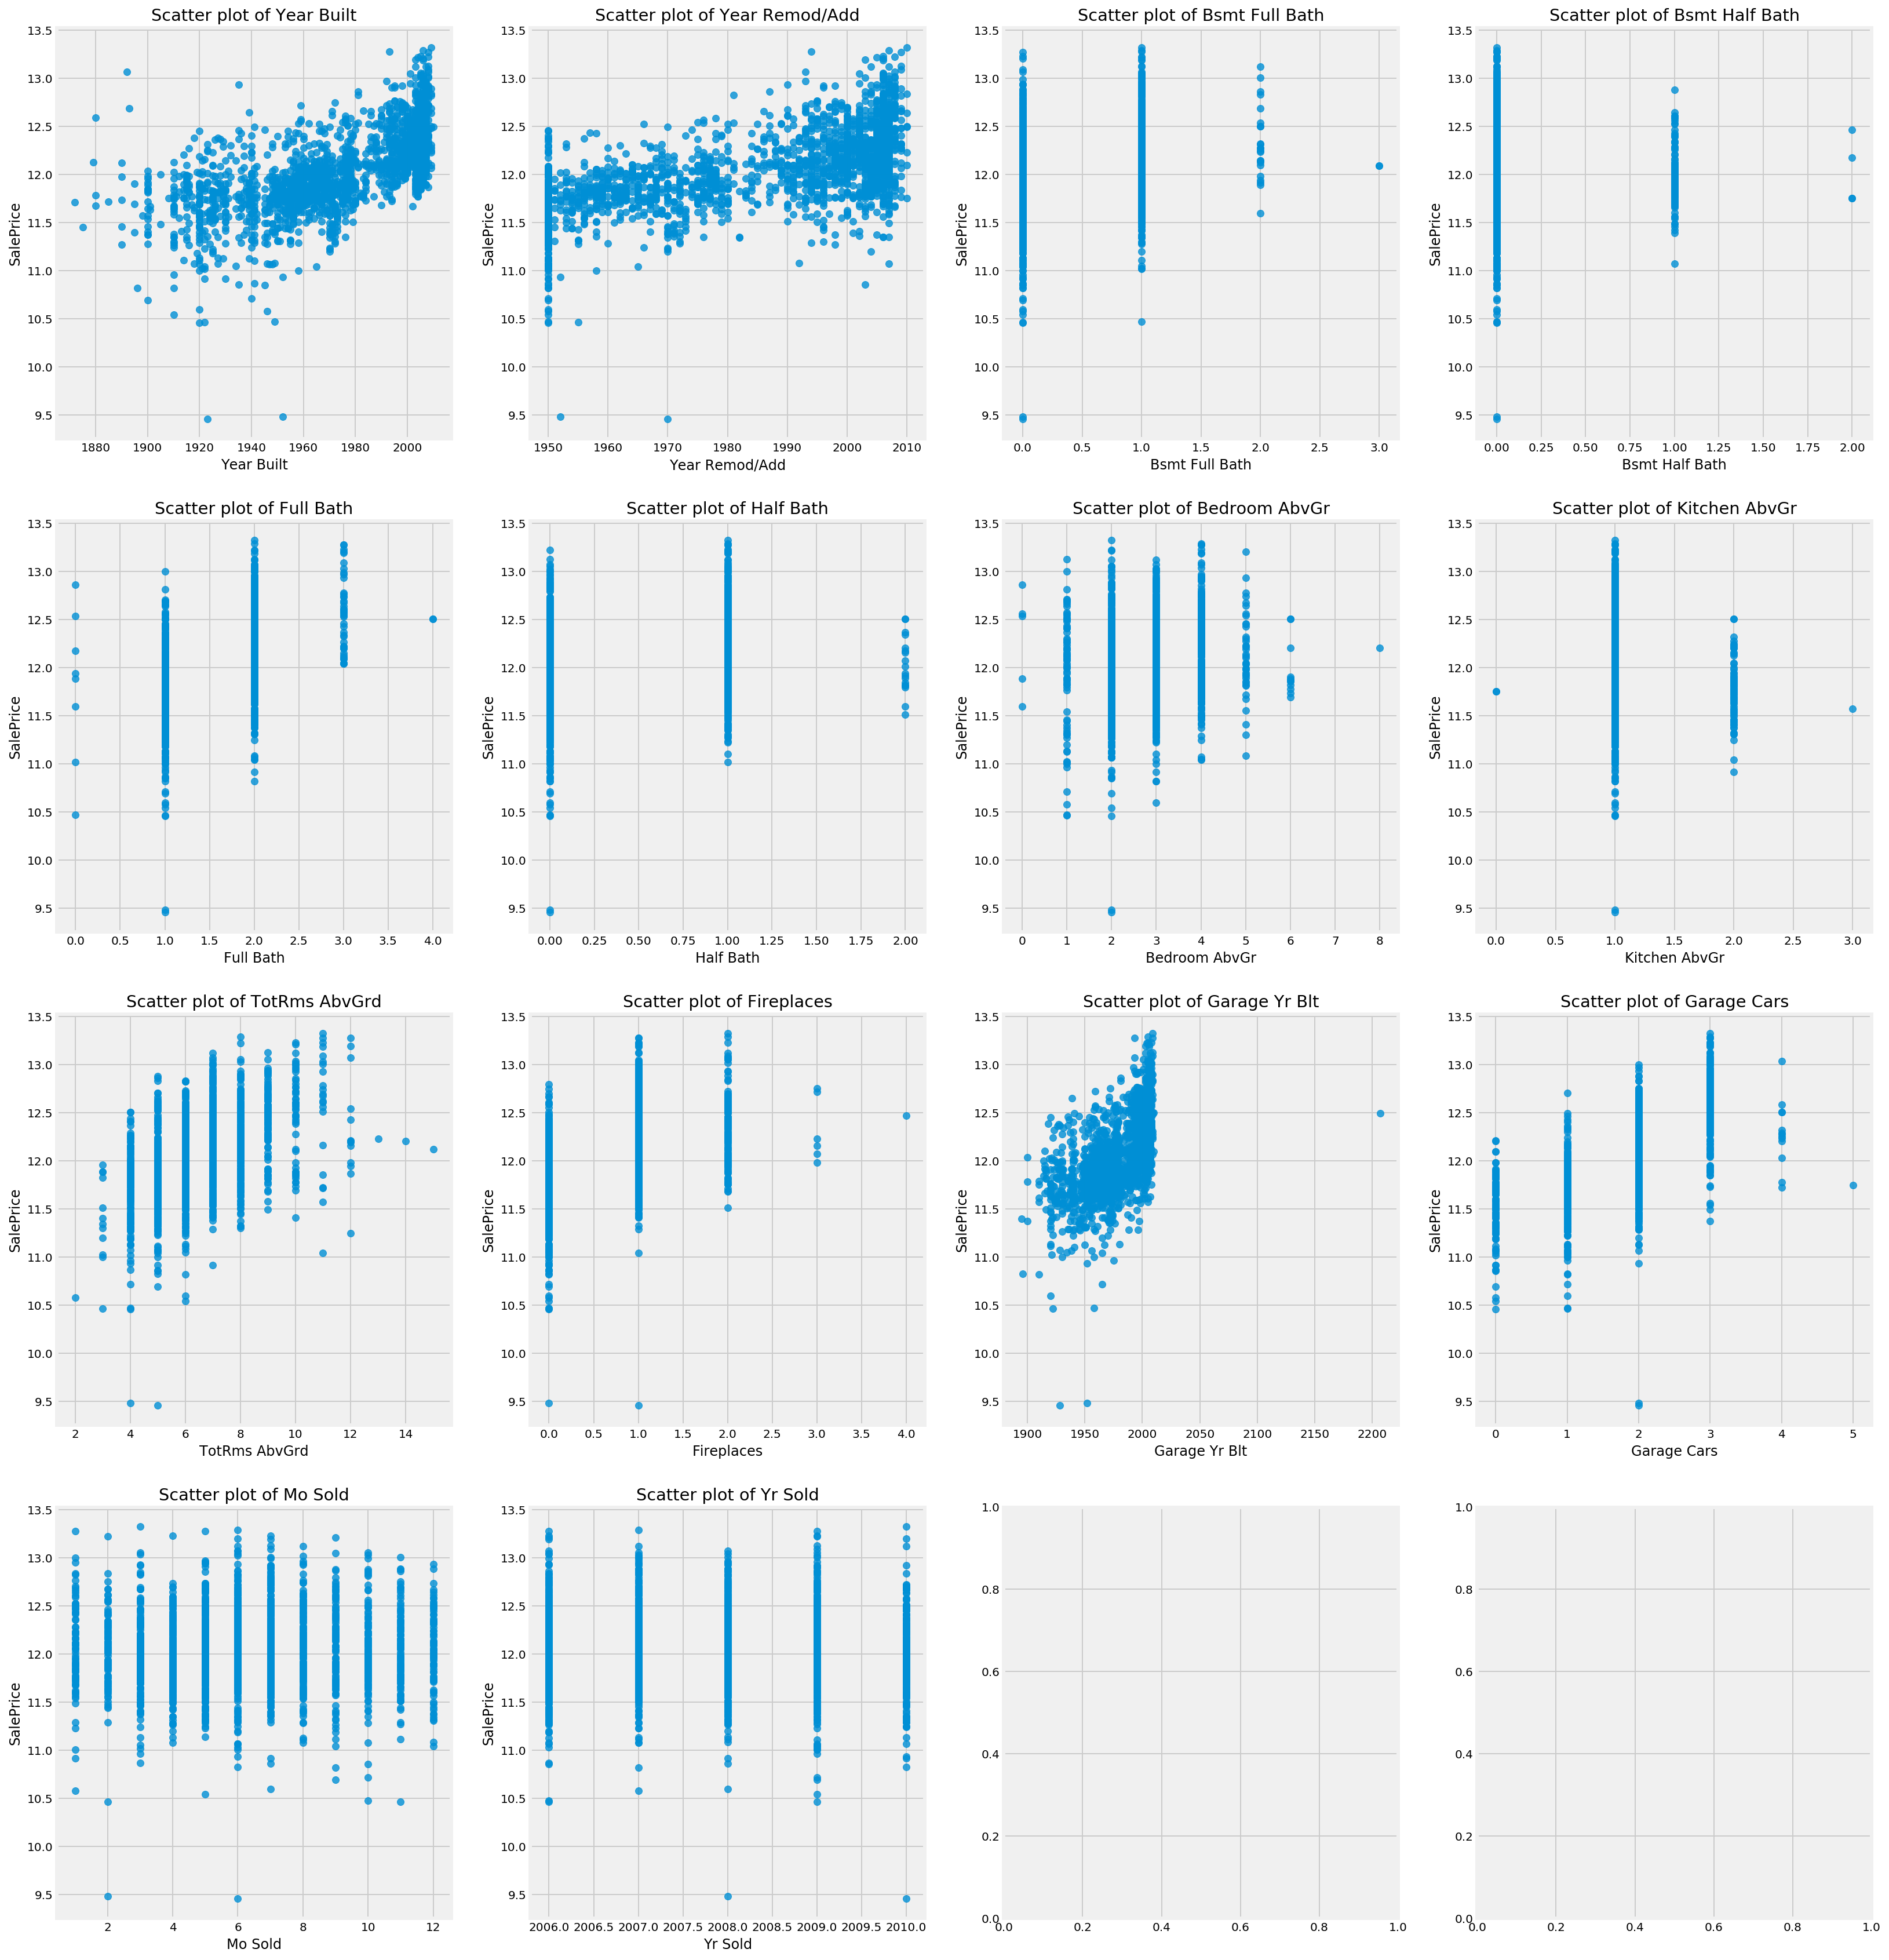

In [18]:
cols=['Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr',
        'TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars','Mo Sold','Yr Sold']
plot_scatter(df_train,cols,np.log(df_train['SalePrice']))

There is an outlier for 'Garage Yr Blt' where the year is stated as year 2207 which is incorret. We should correct this value. However, we have seen the 'Garage Yr Blt' is correlated with 'Year Built'. We can consider to remove it

In [19]:
df_train[df_train['Garage Yr Blt']>2010]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1699  2261  916384070           20        RL          68.0      8298   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
1699   NaN       IR1          HLS    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1699       Timber        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1699             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1699      VinylSd      VinylSd          NaN           NaN         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1699         TA      PConc        Gd        TA            Av            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1699         583.0            Unf           0.0        963.0         1546.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1699    GasA         Ex           Y      SBrkr        1564           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1699                0         1564             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1699          0              2              1           Ex              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1699        Typ           1           Gd      Attchd         2207.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1699           RFn          2.0        502.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1699           Y           132              0               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
1699             0          0     NaN   NaN          NaN         0        9   

      Yr Sold Sale Type  SalePrice  
1699     2007       New     267300

## Examines the distribution of the discrete variables

def subplot_histograms(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) # Makes sure there are enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(25,30)) 
    fig.subplots_adjust(hspace=0.2, wspace=0.2) #adjust position of subplots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(df[column],bins=20) # Plots histogram
        ax[i].set_title(column)

cols=['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
      '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
      '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

subplot_histograms(df_train,cols)

## Plotting for discrete variables.

In [20]:
def box_plot(df, column):   
    
    fig = plt.subplots(figsize=(20,5)) 
    sns.boxplot(data=df,x = column, y = 'SalePrice')
    plt.xticks(rotation=45)

In [21]:
def count_plot(df, column):   
    fig = plt.subplots(figsize=(20,5)) 
    sns.countplot(df_train[column])
    plt.xticks(rotation=45)

D:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


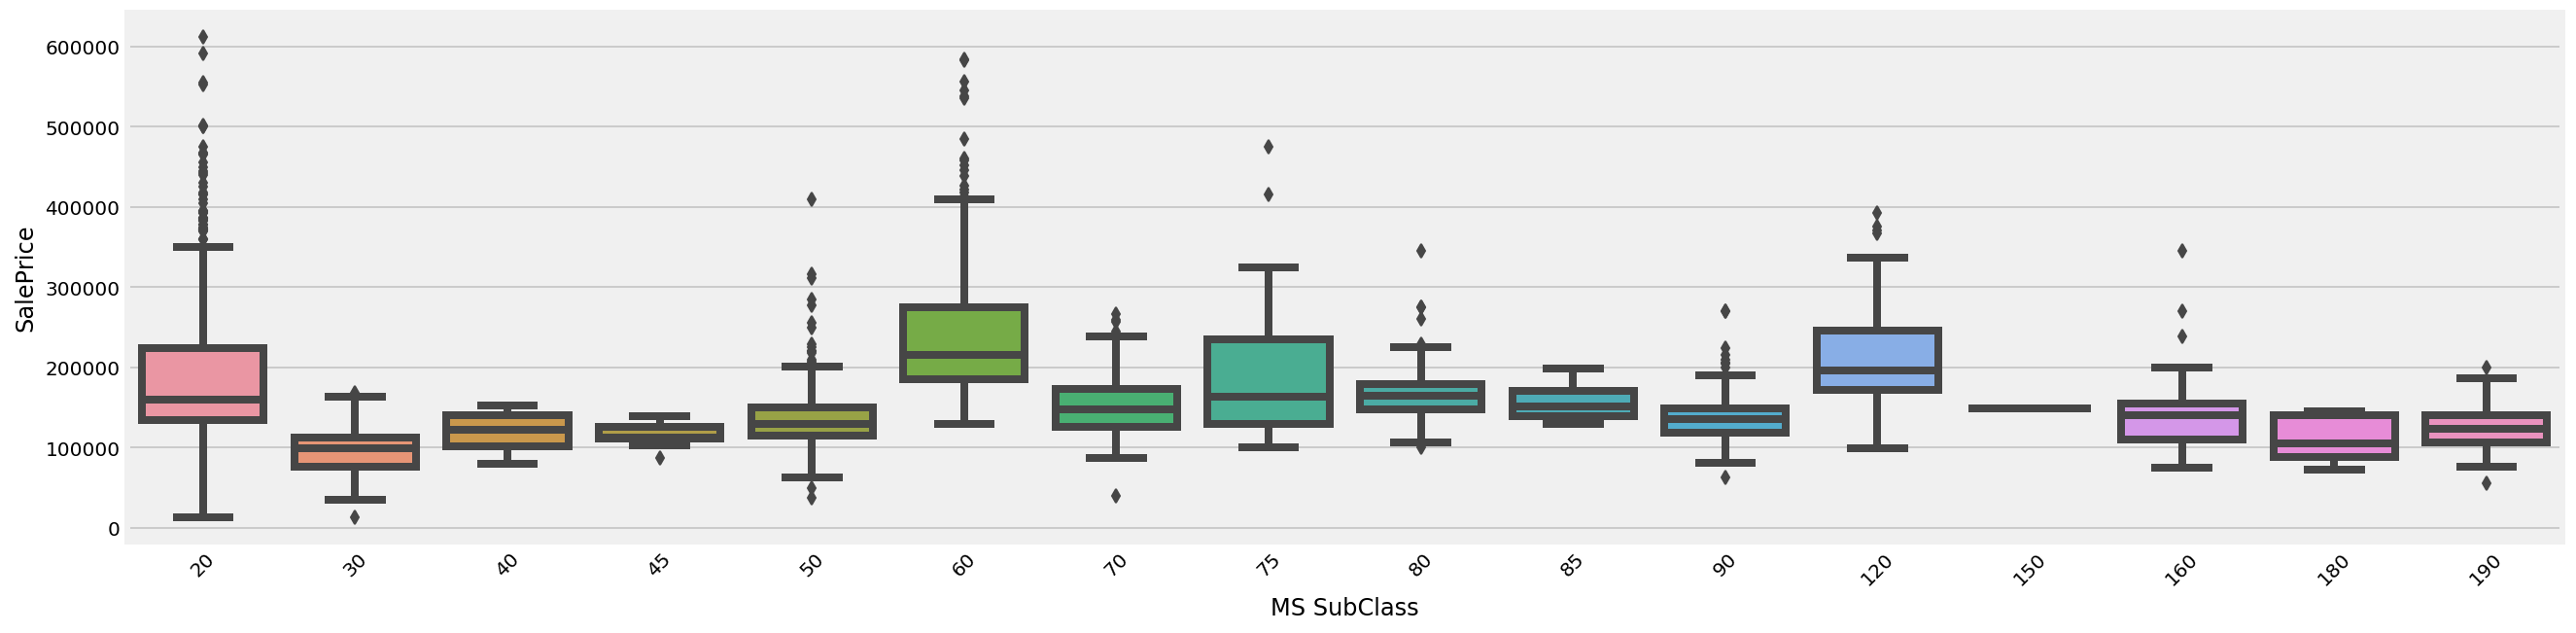

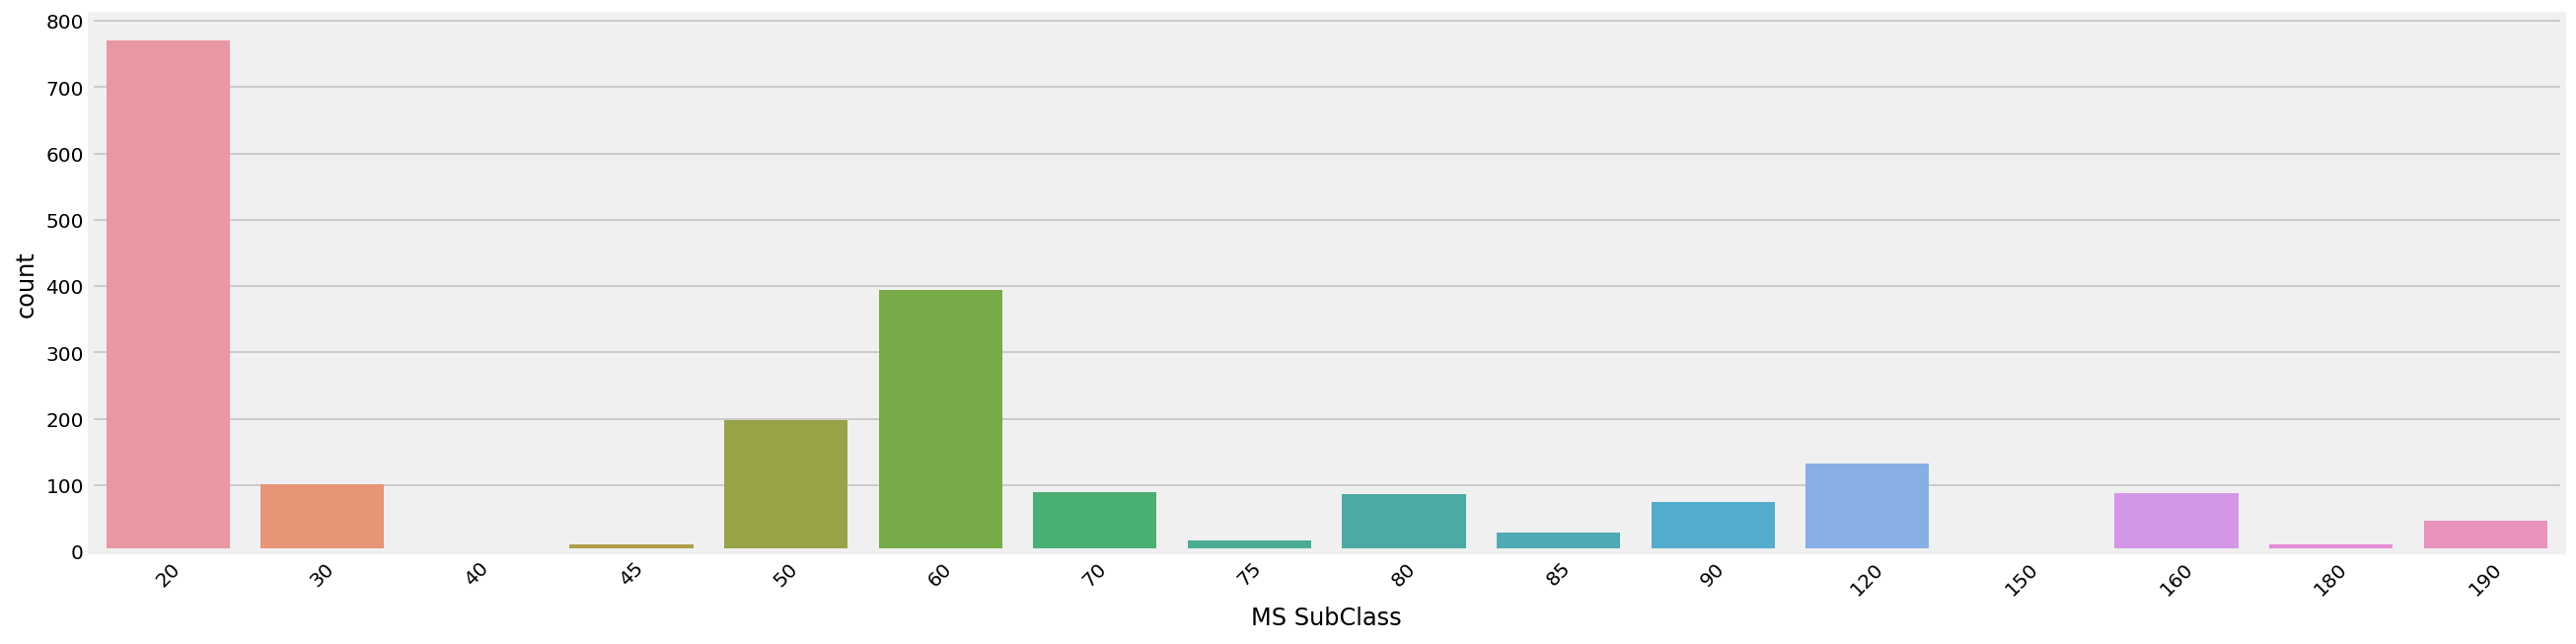

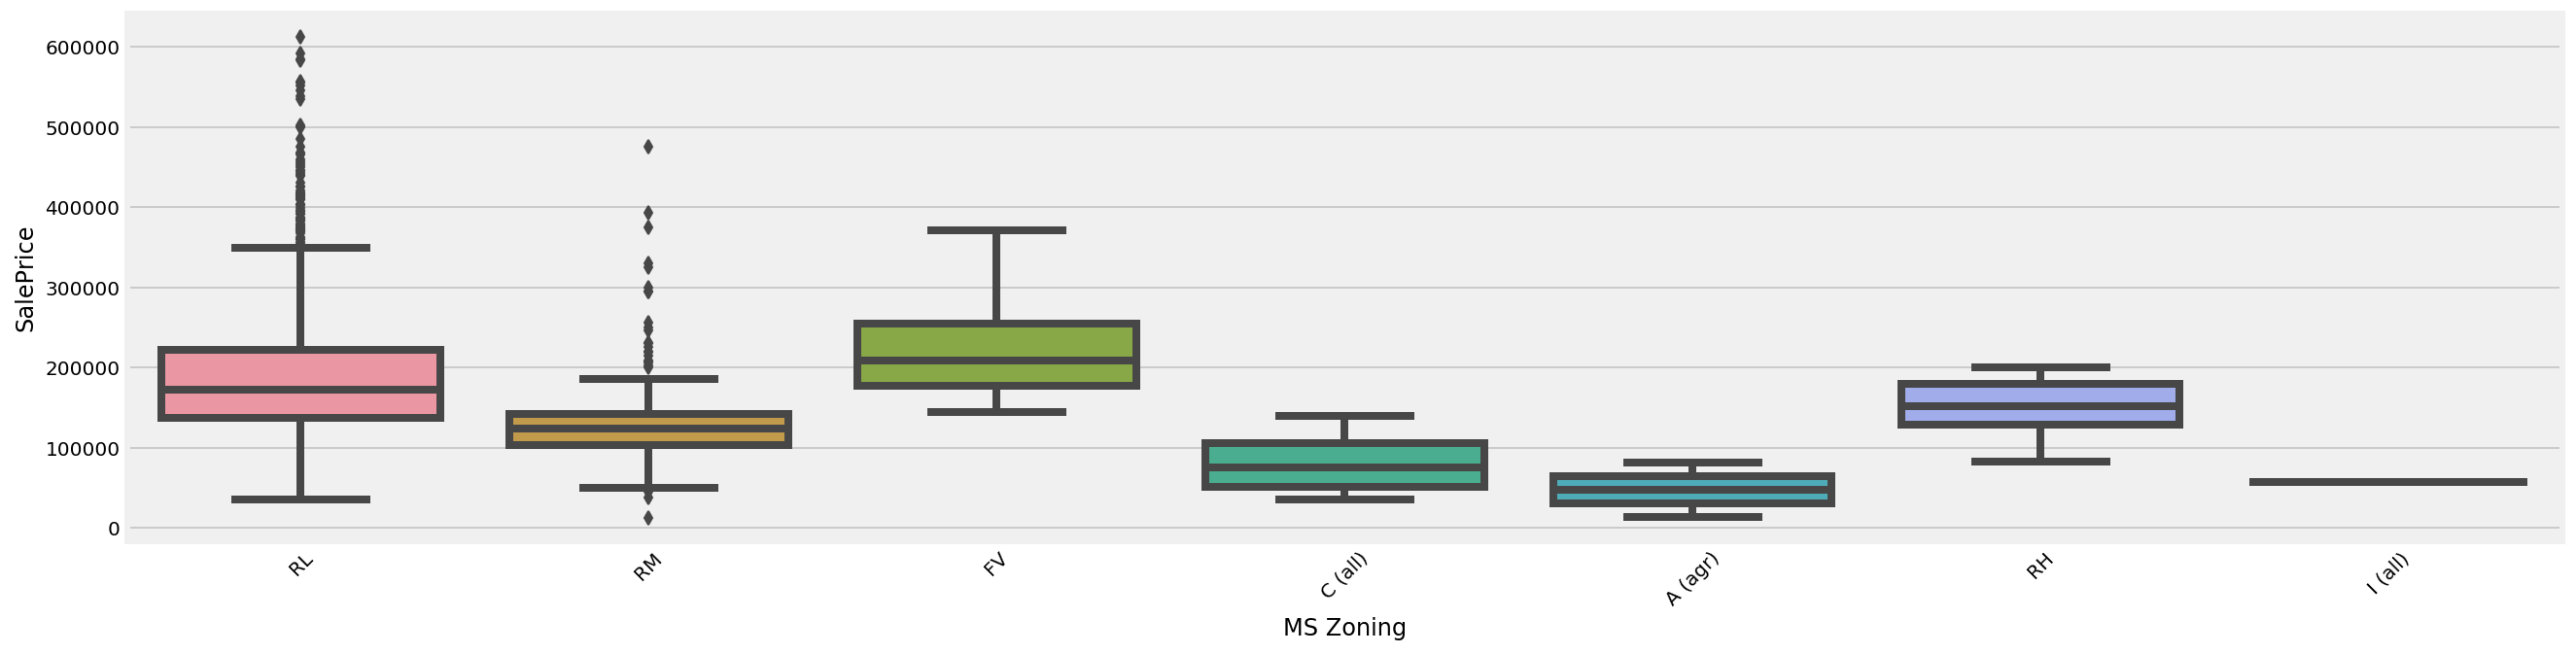

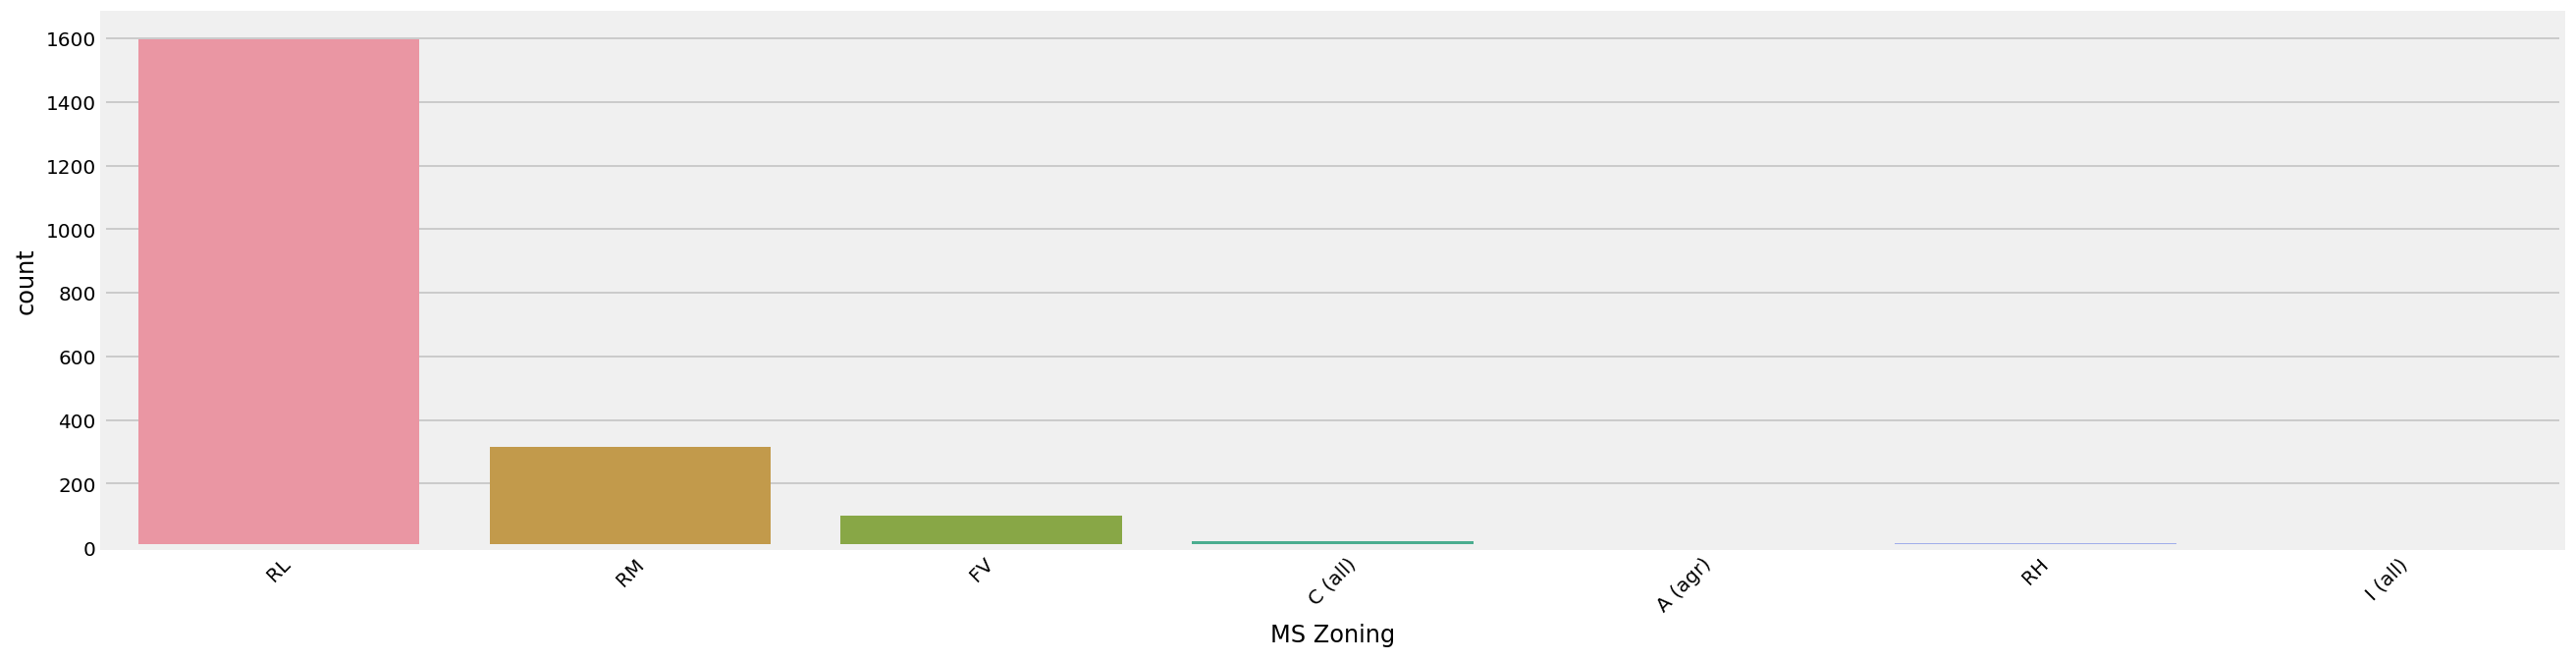

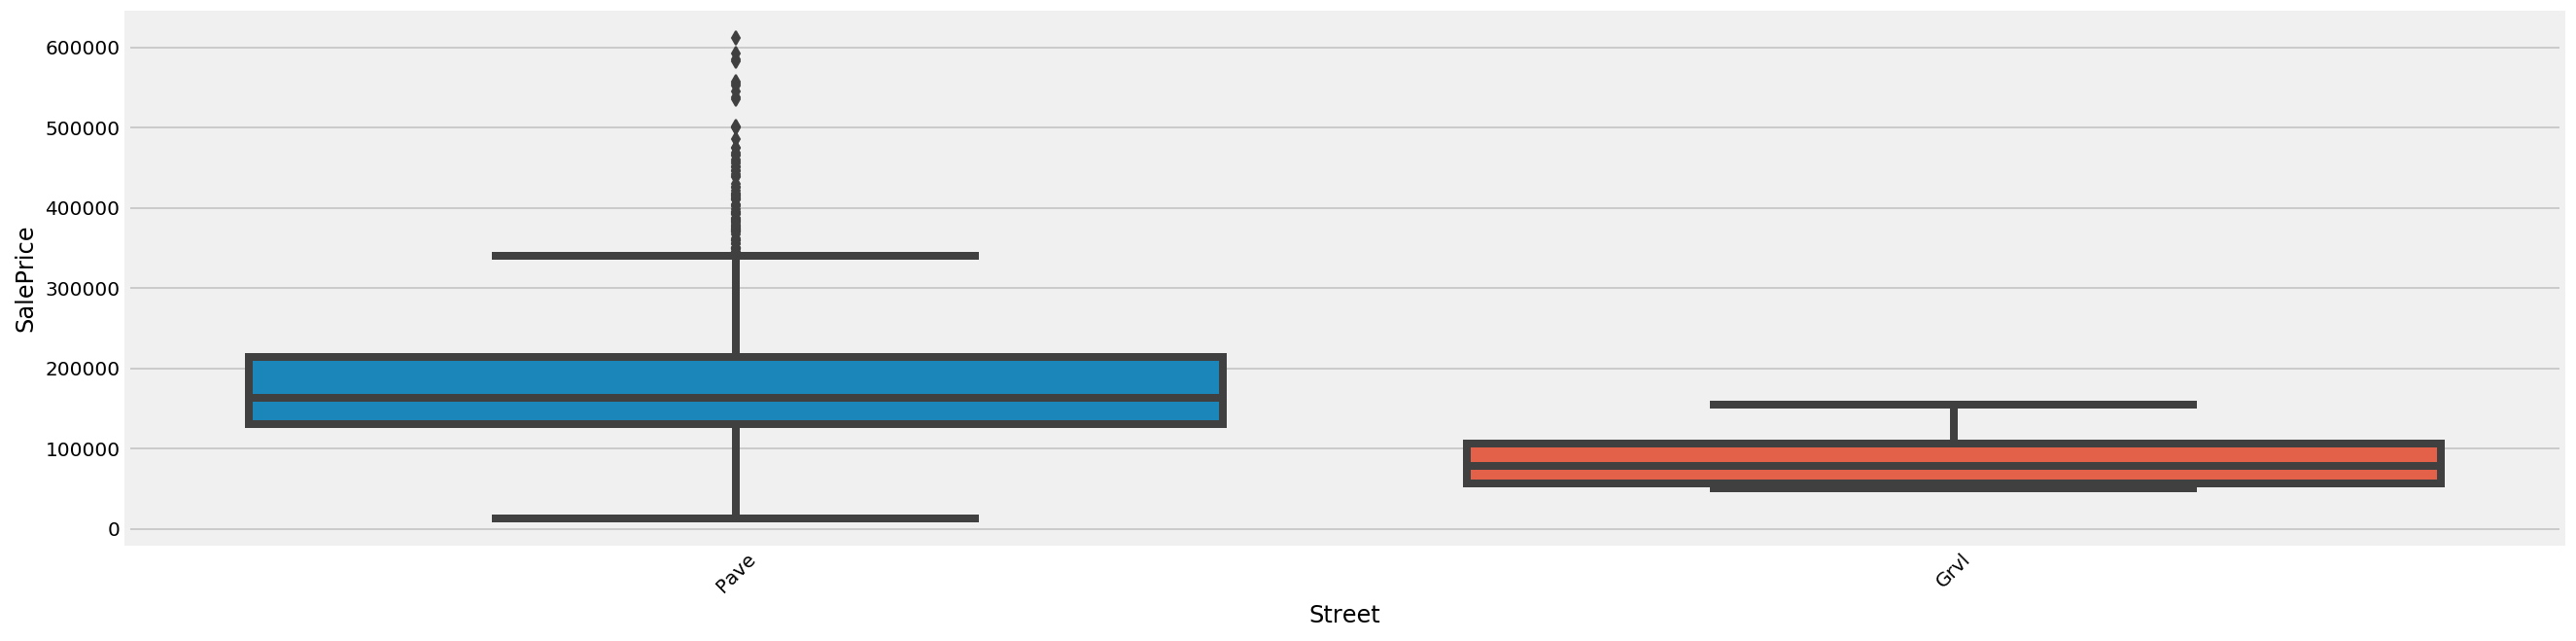

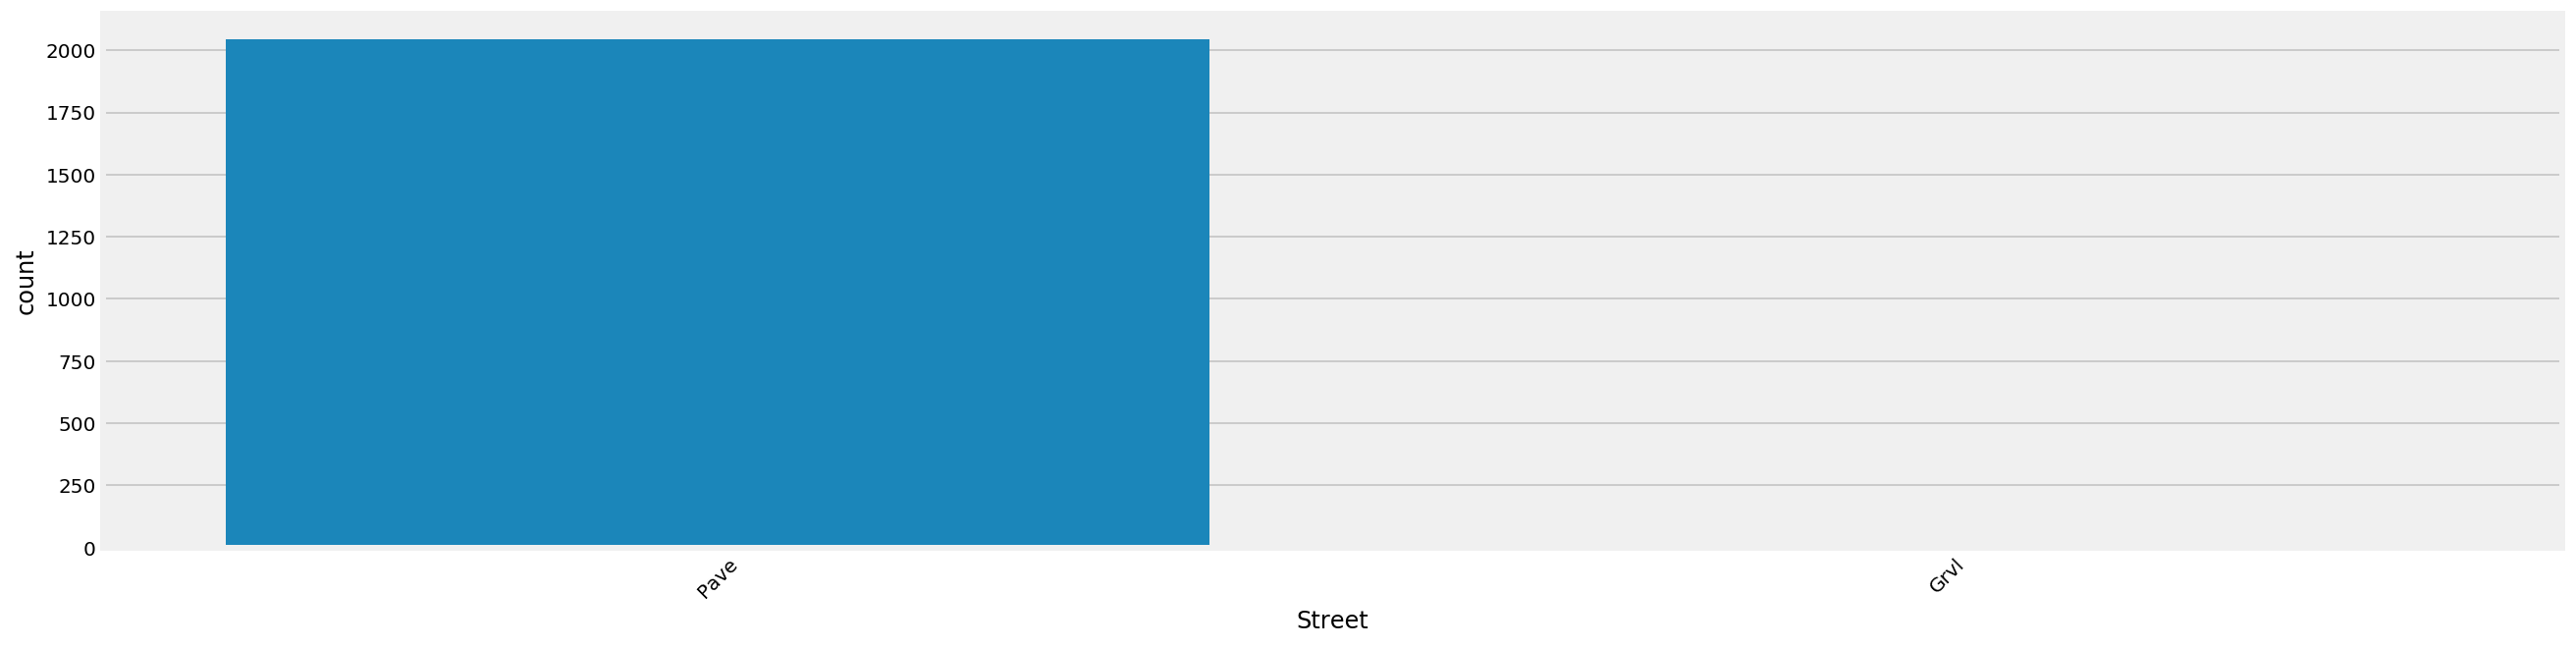

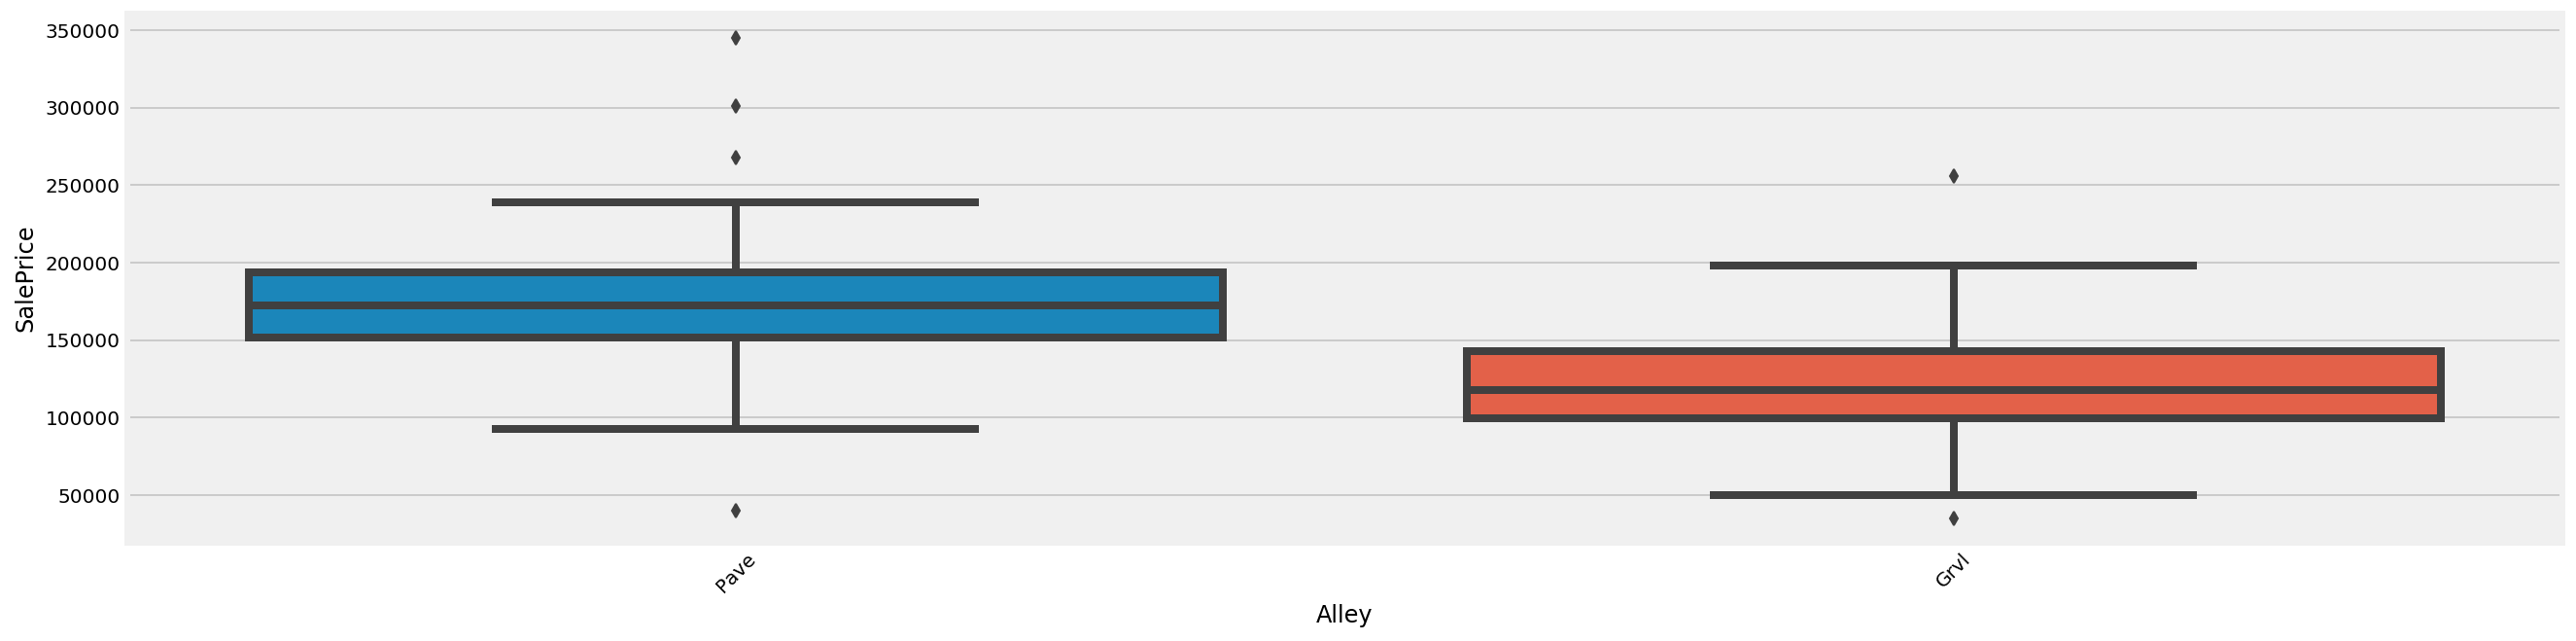

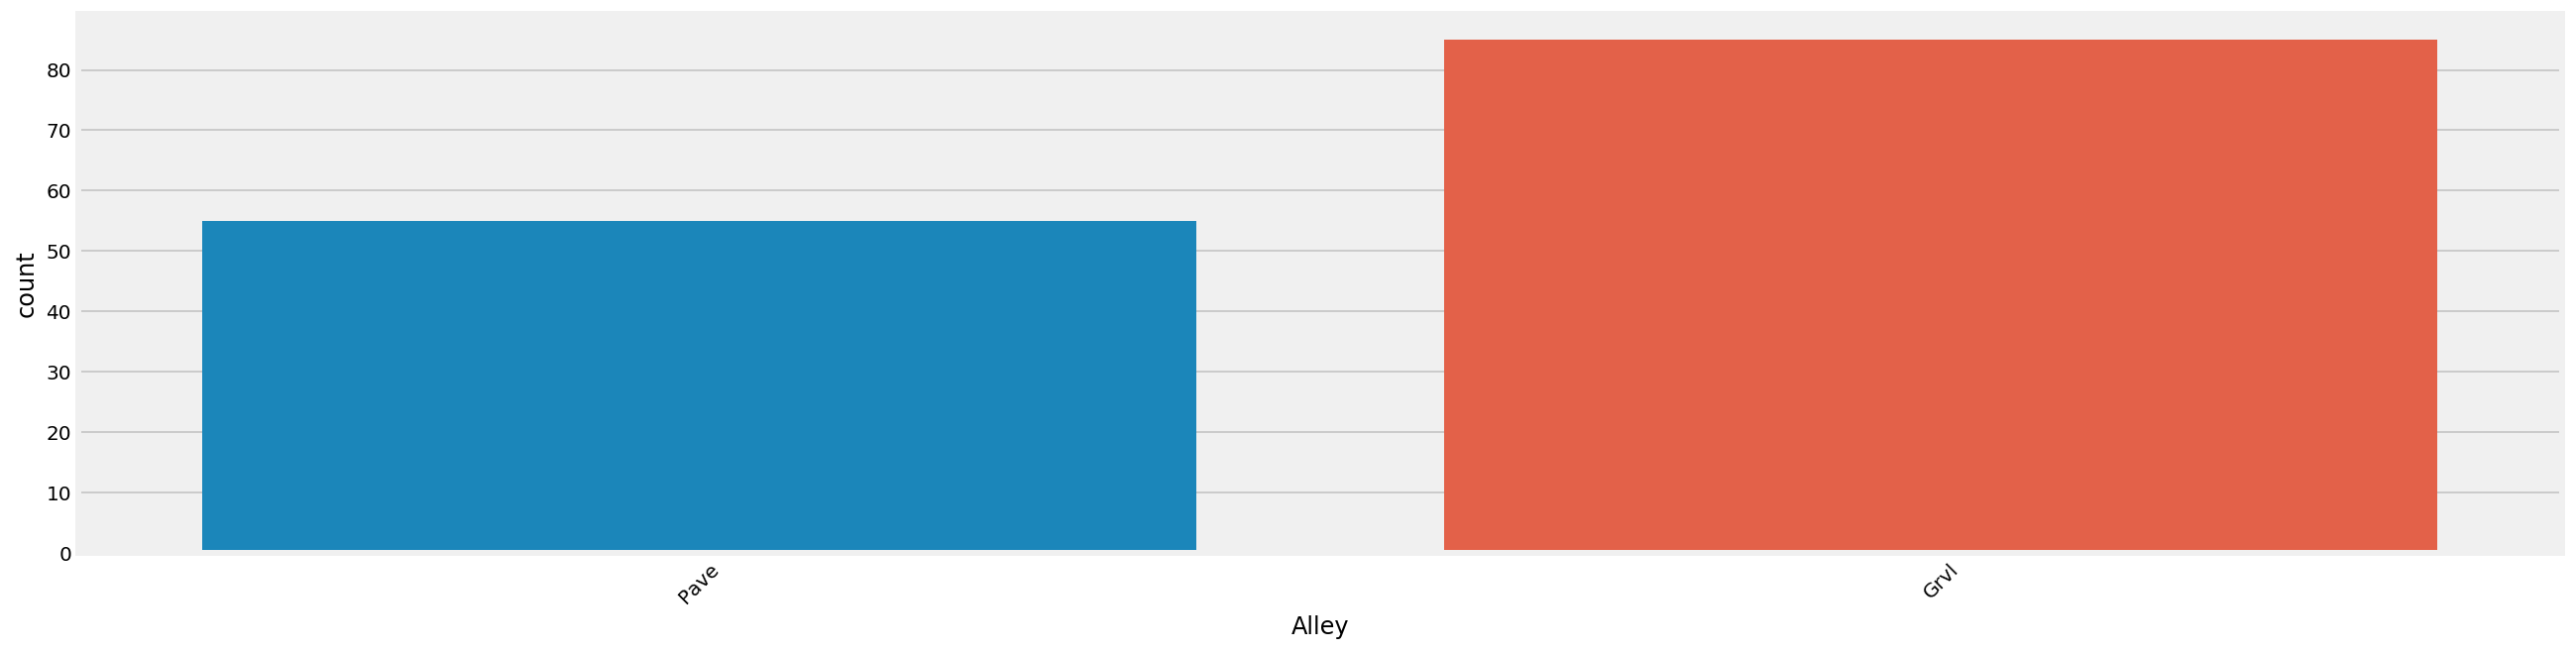

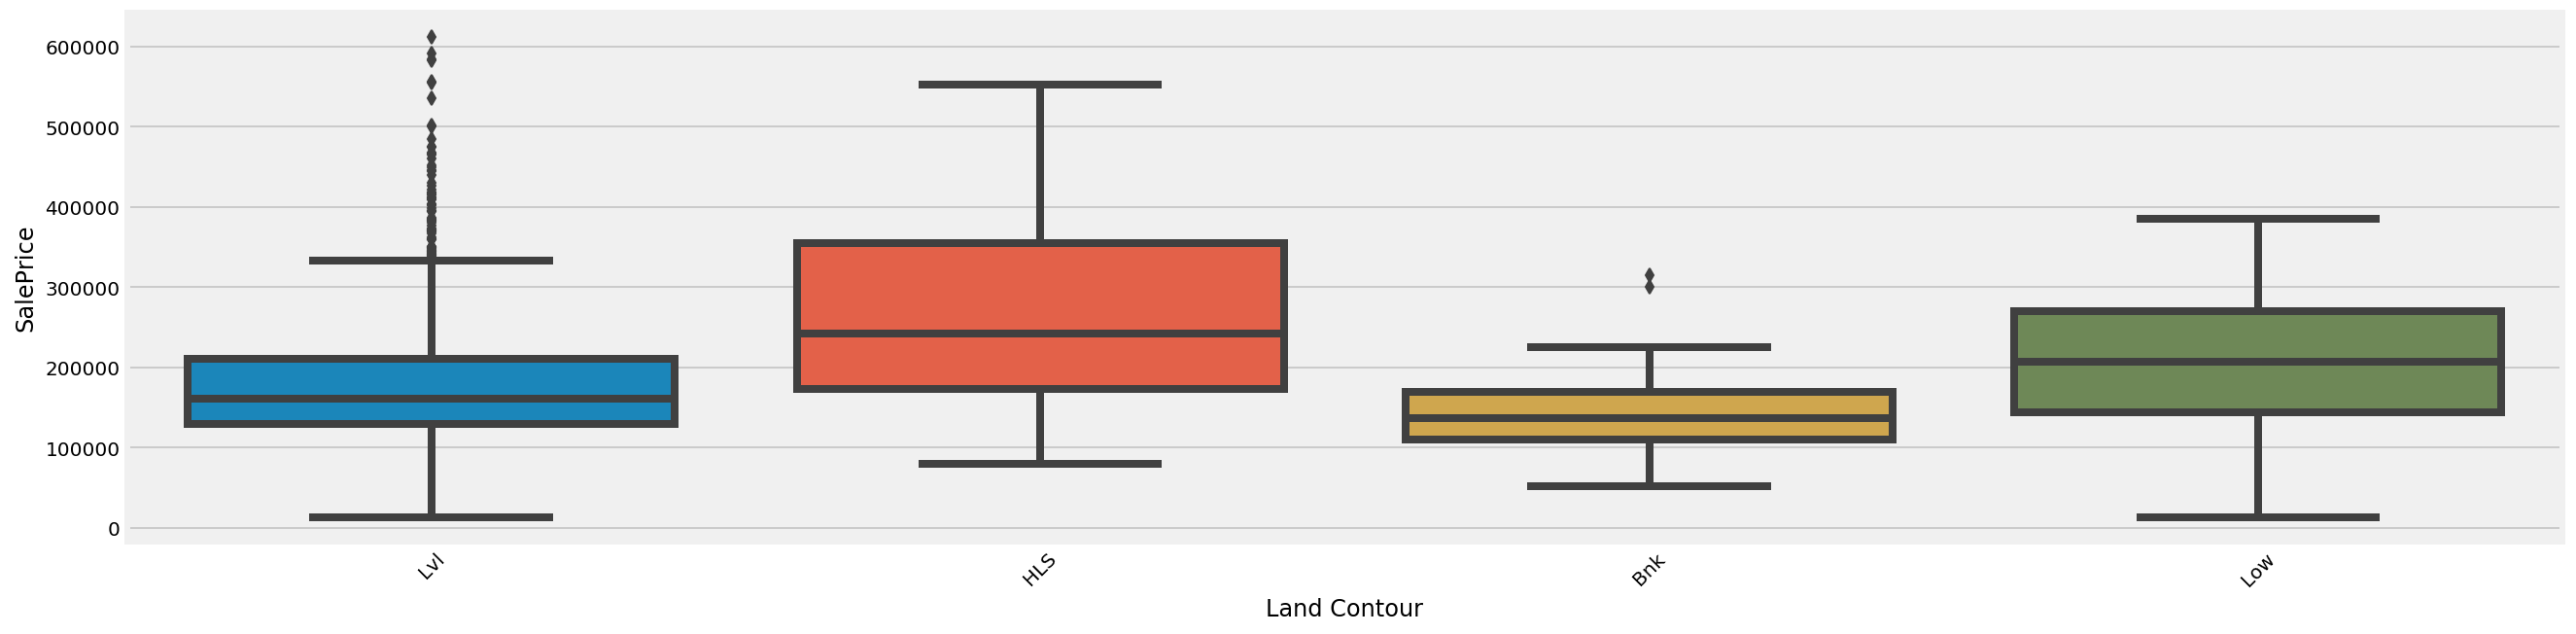

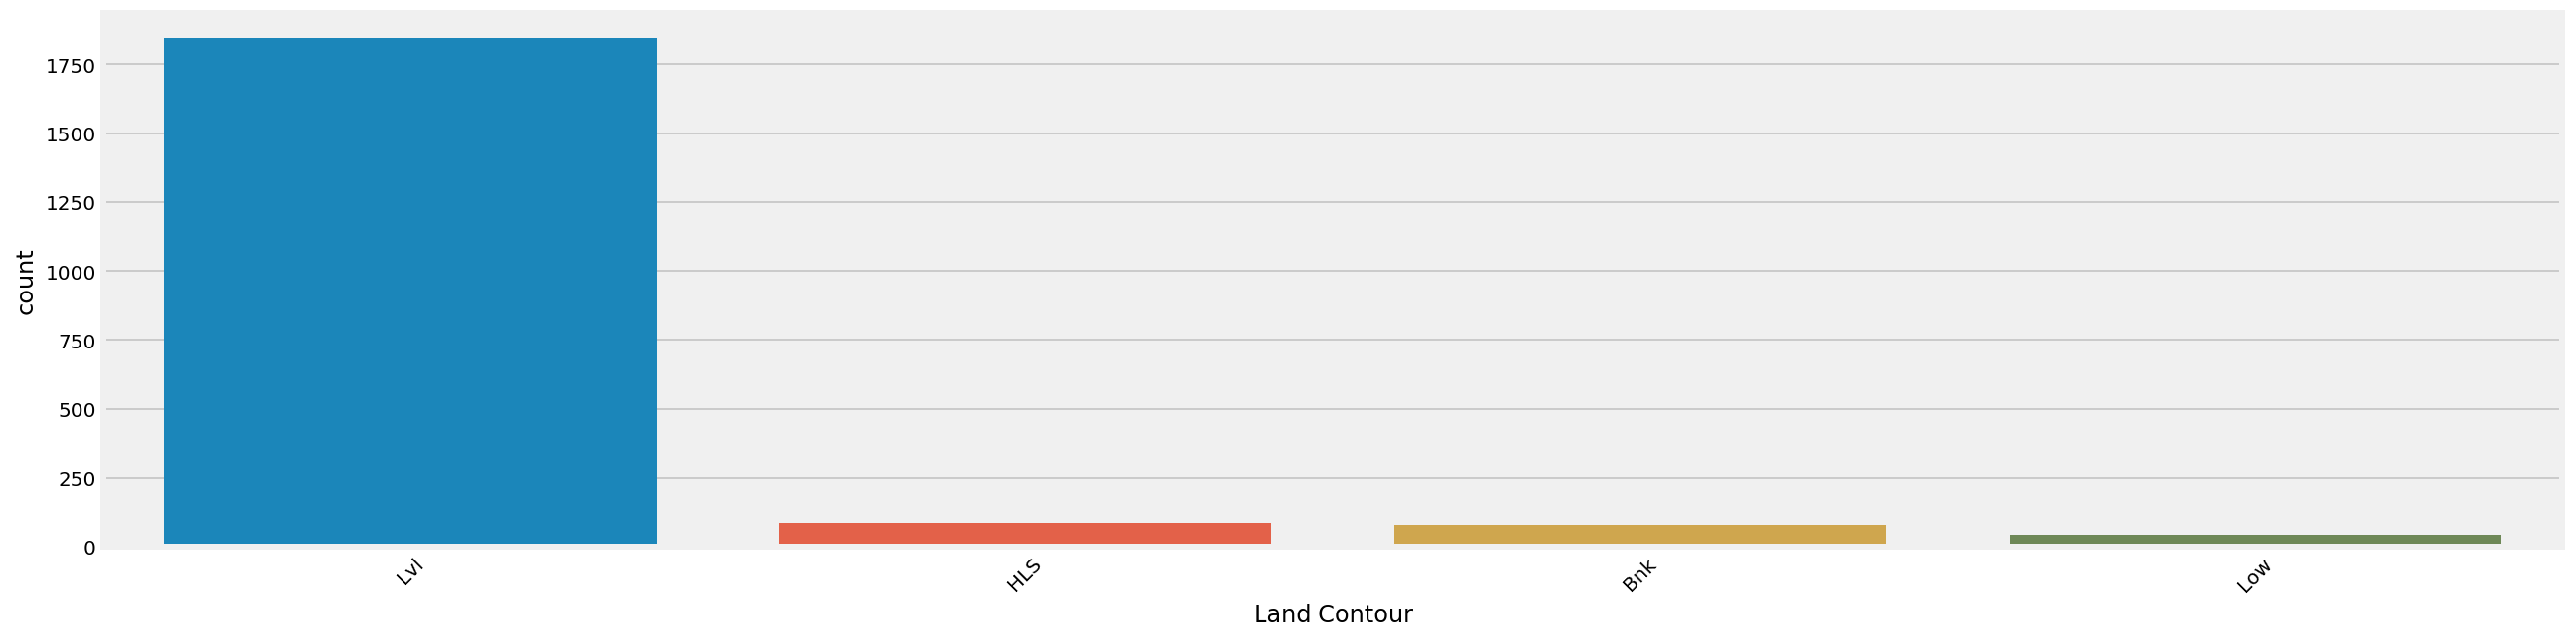

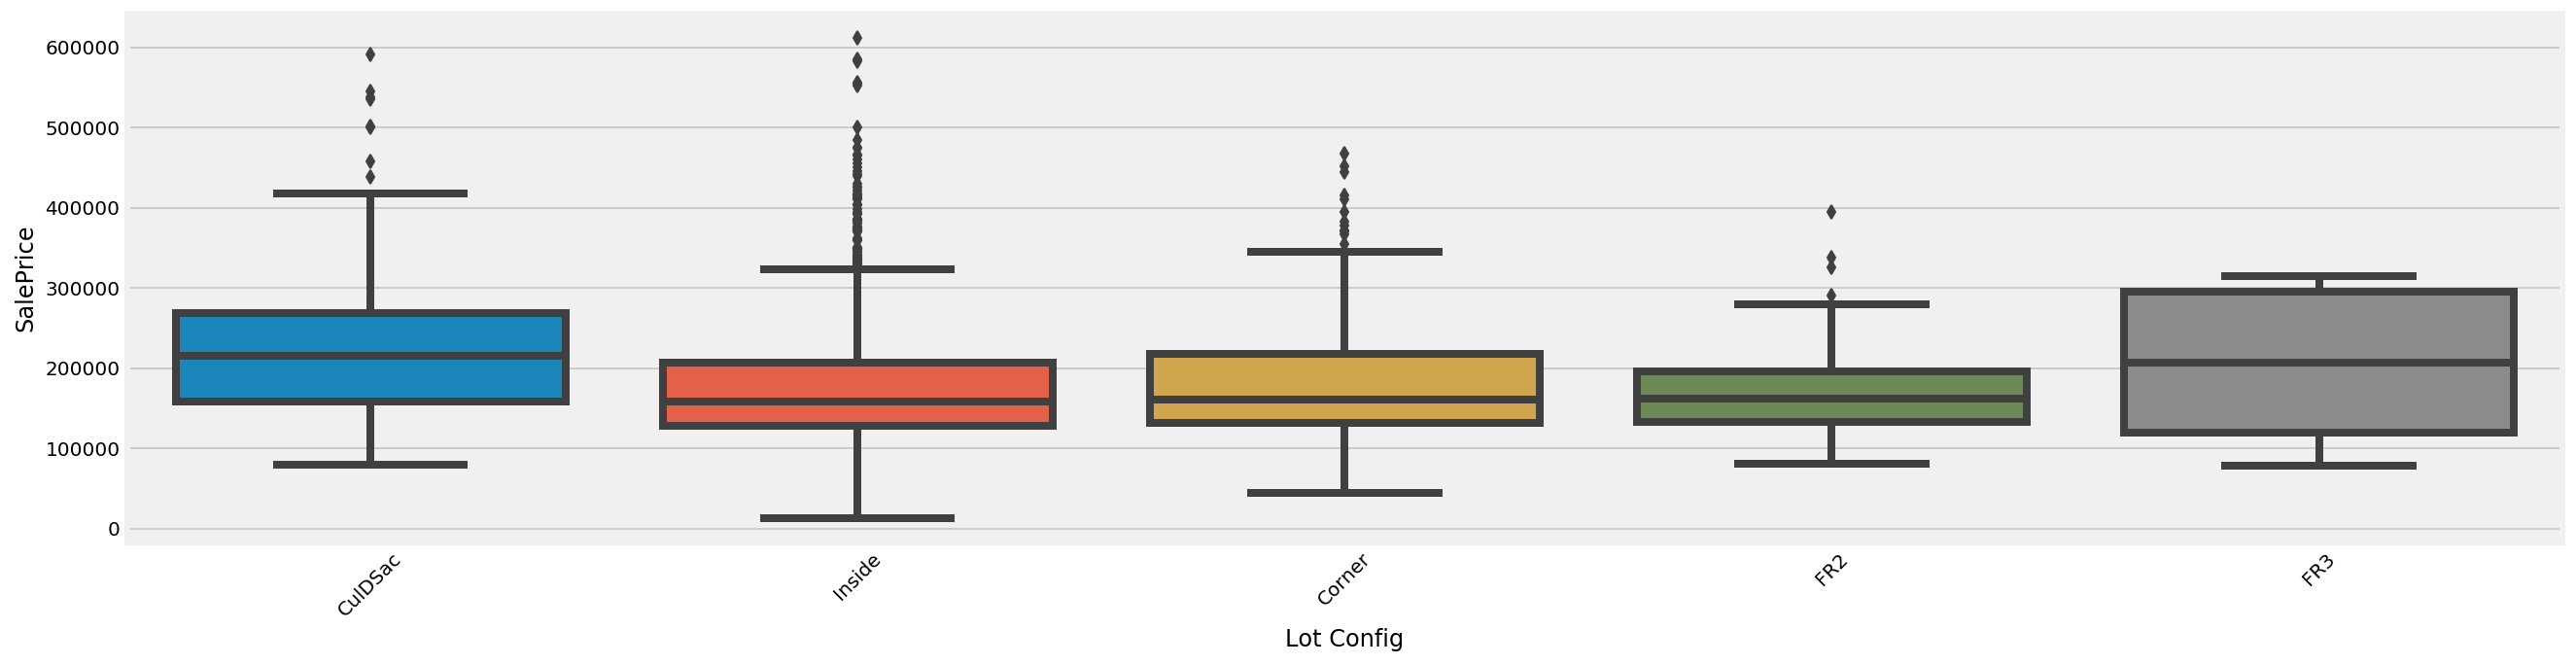

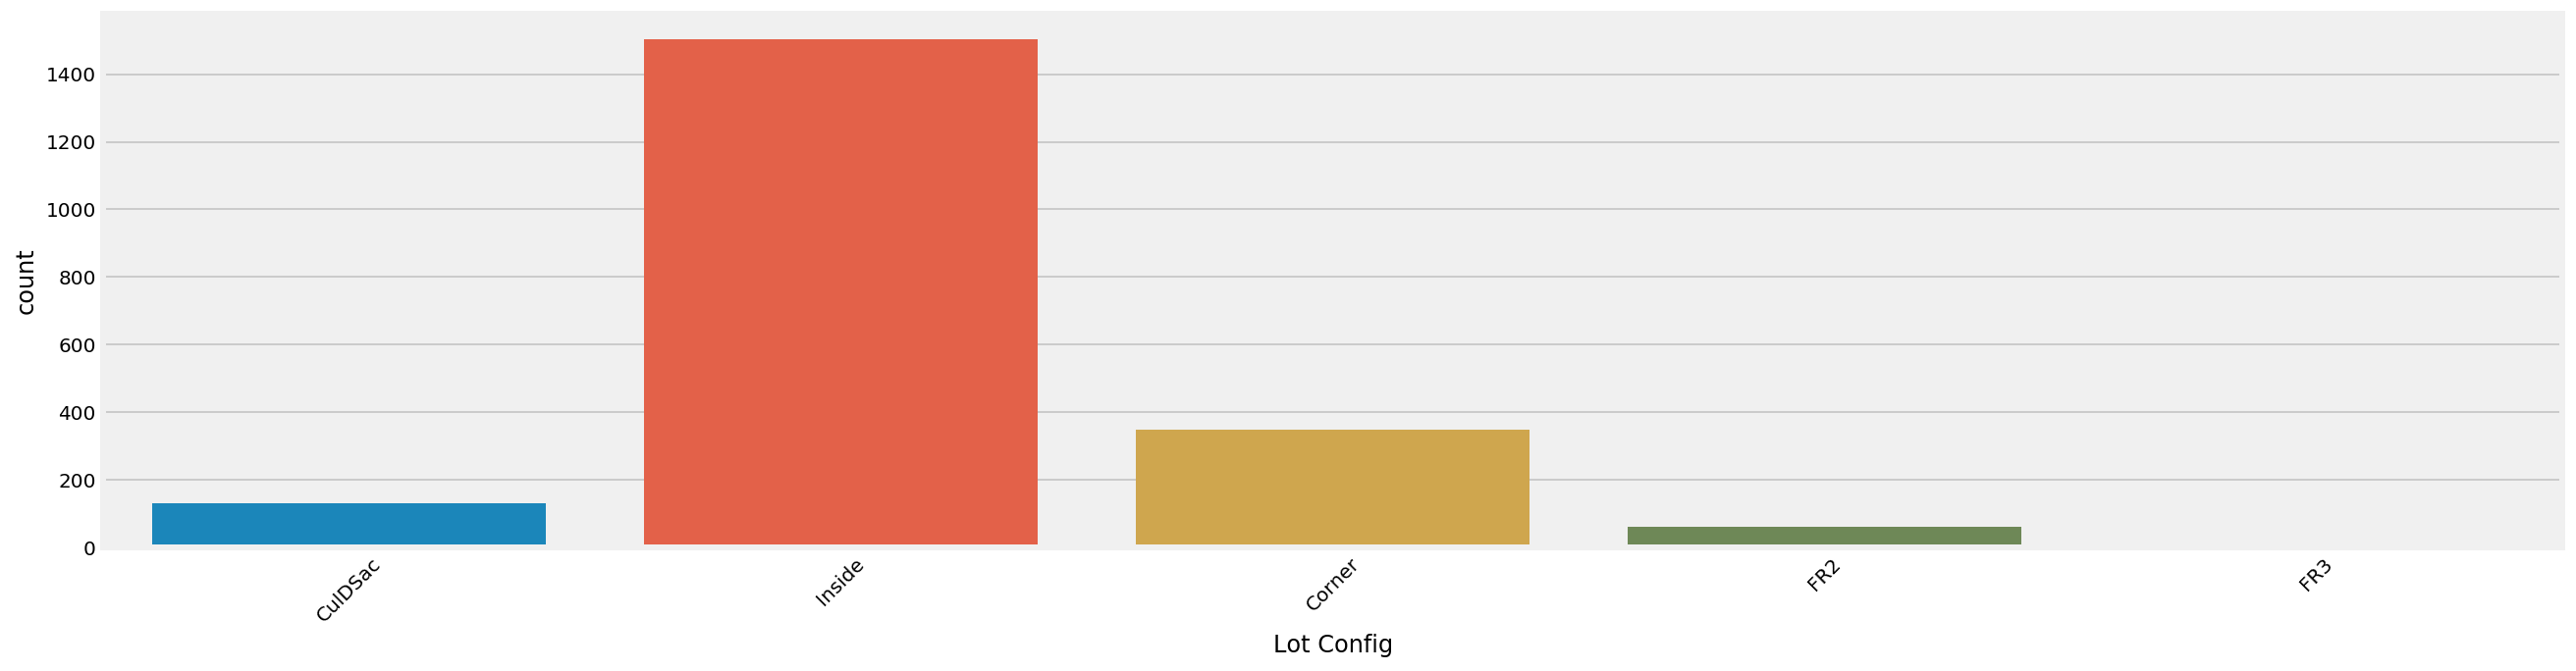

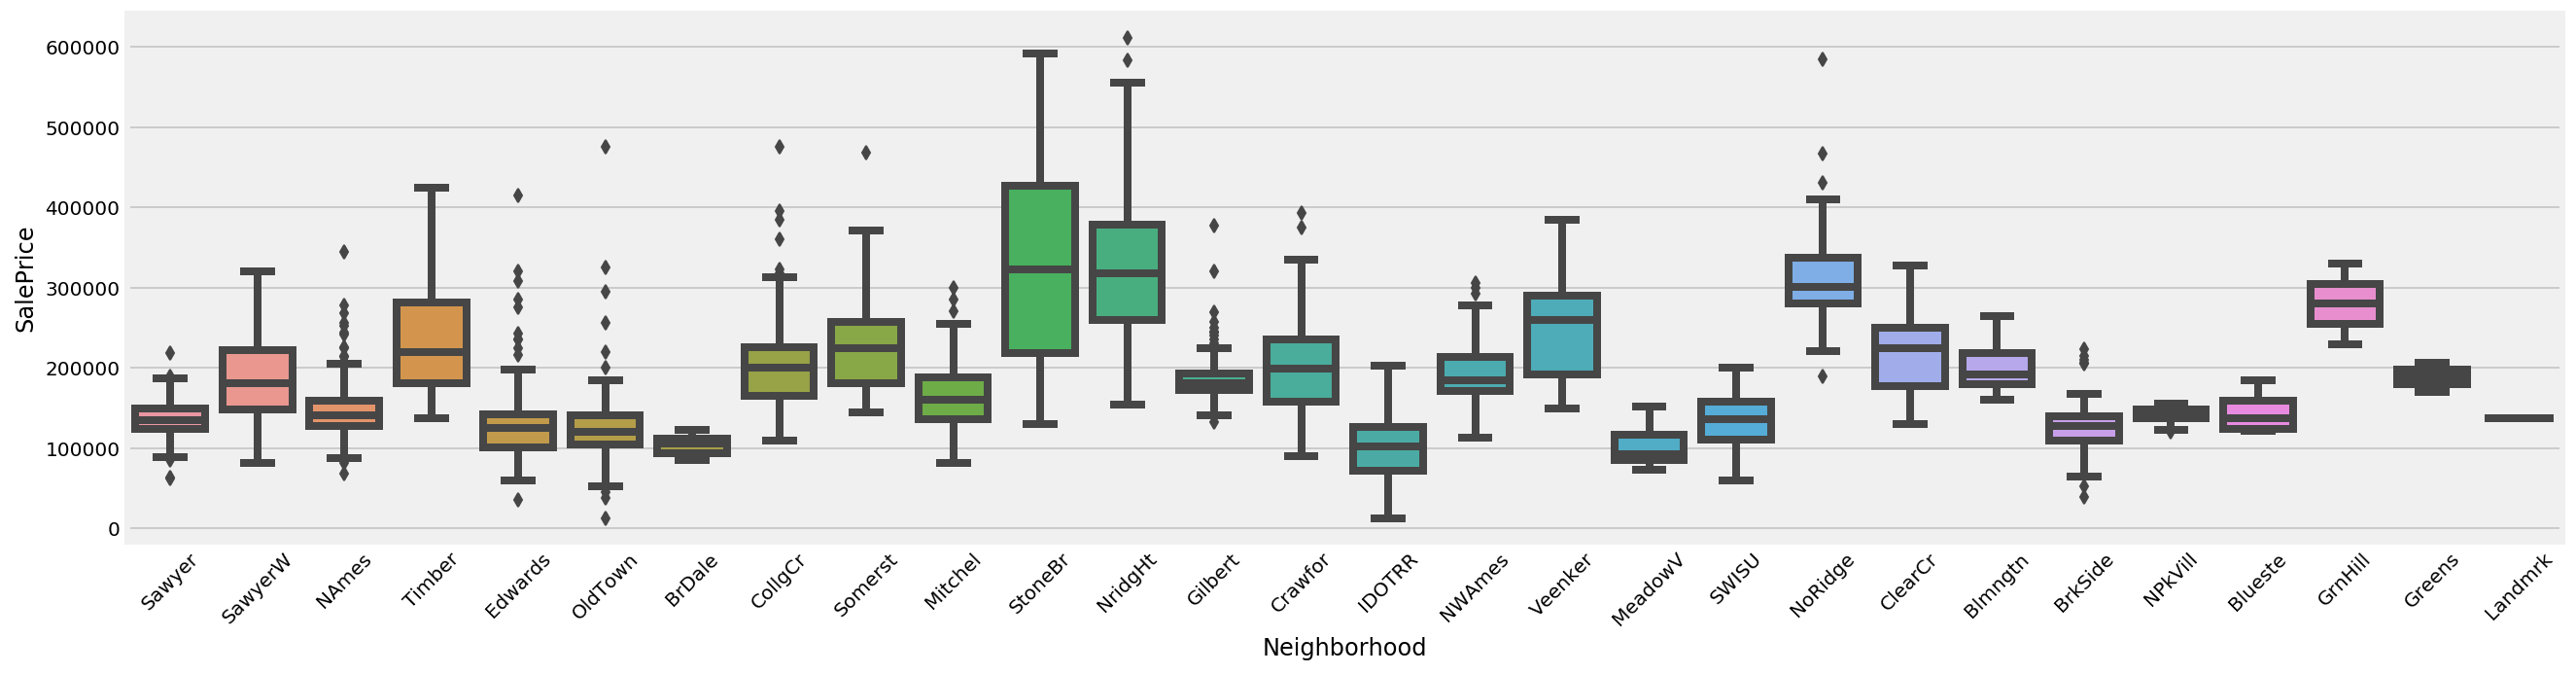

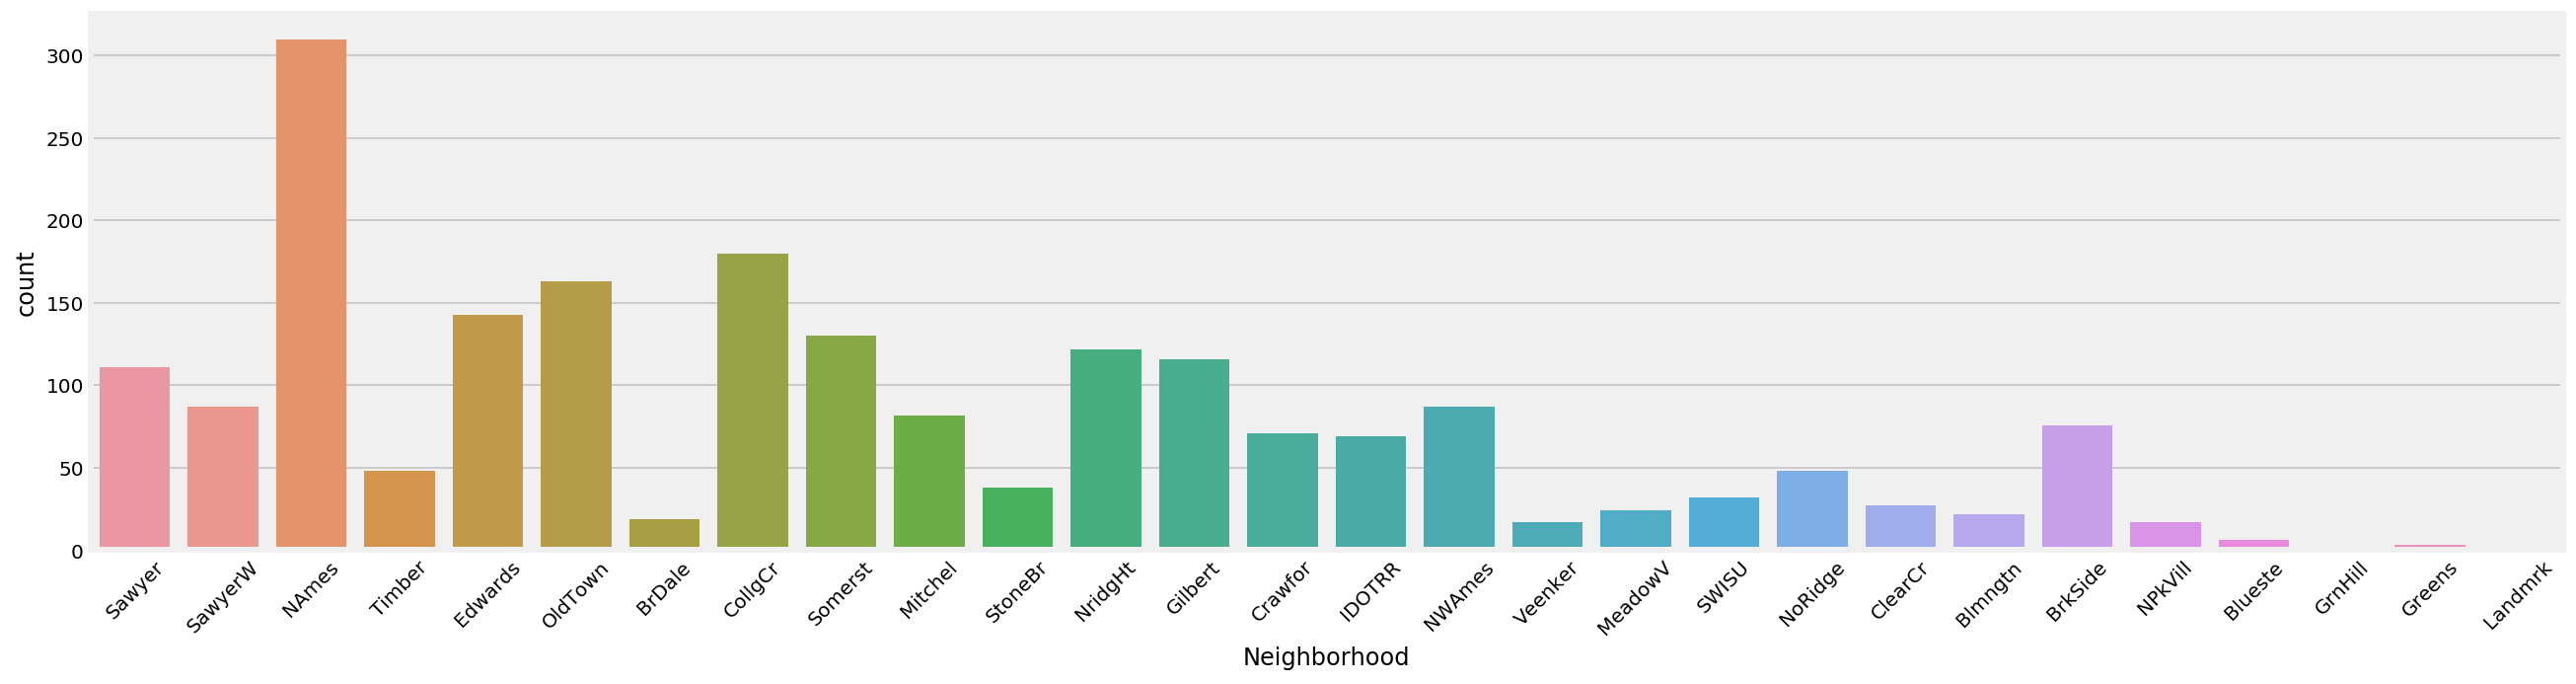

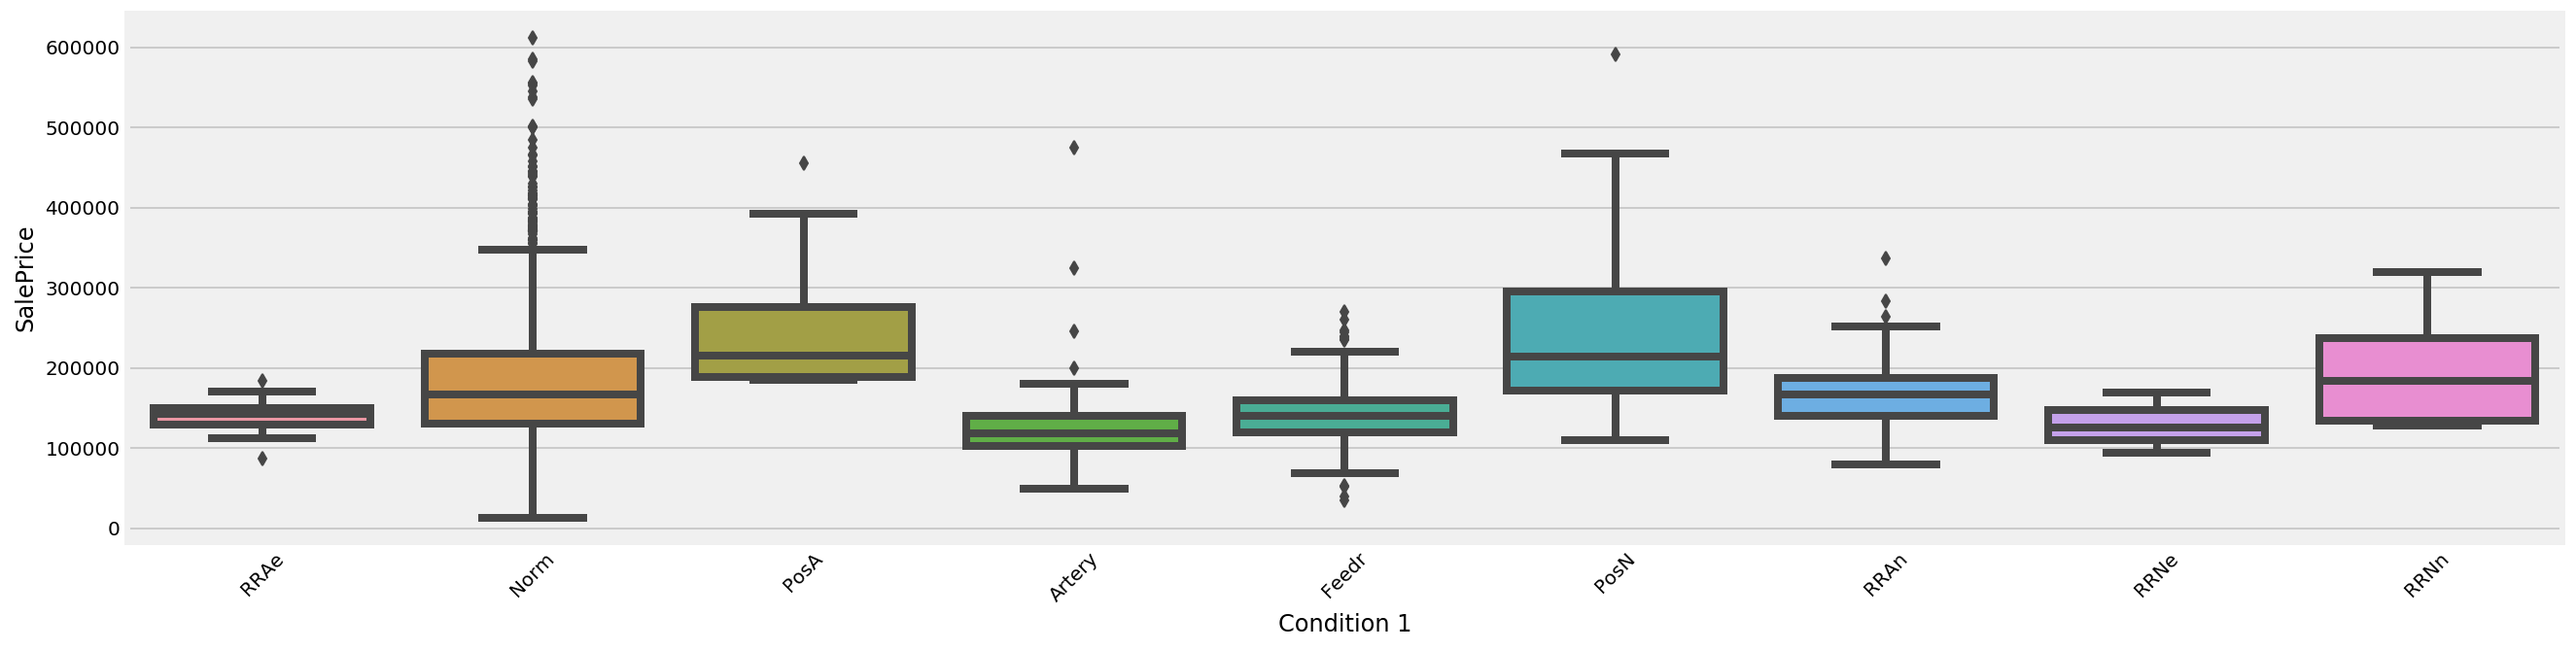

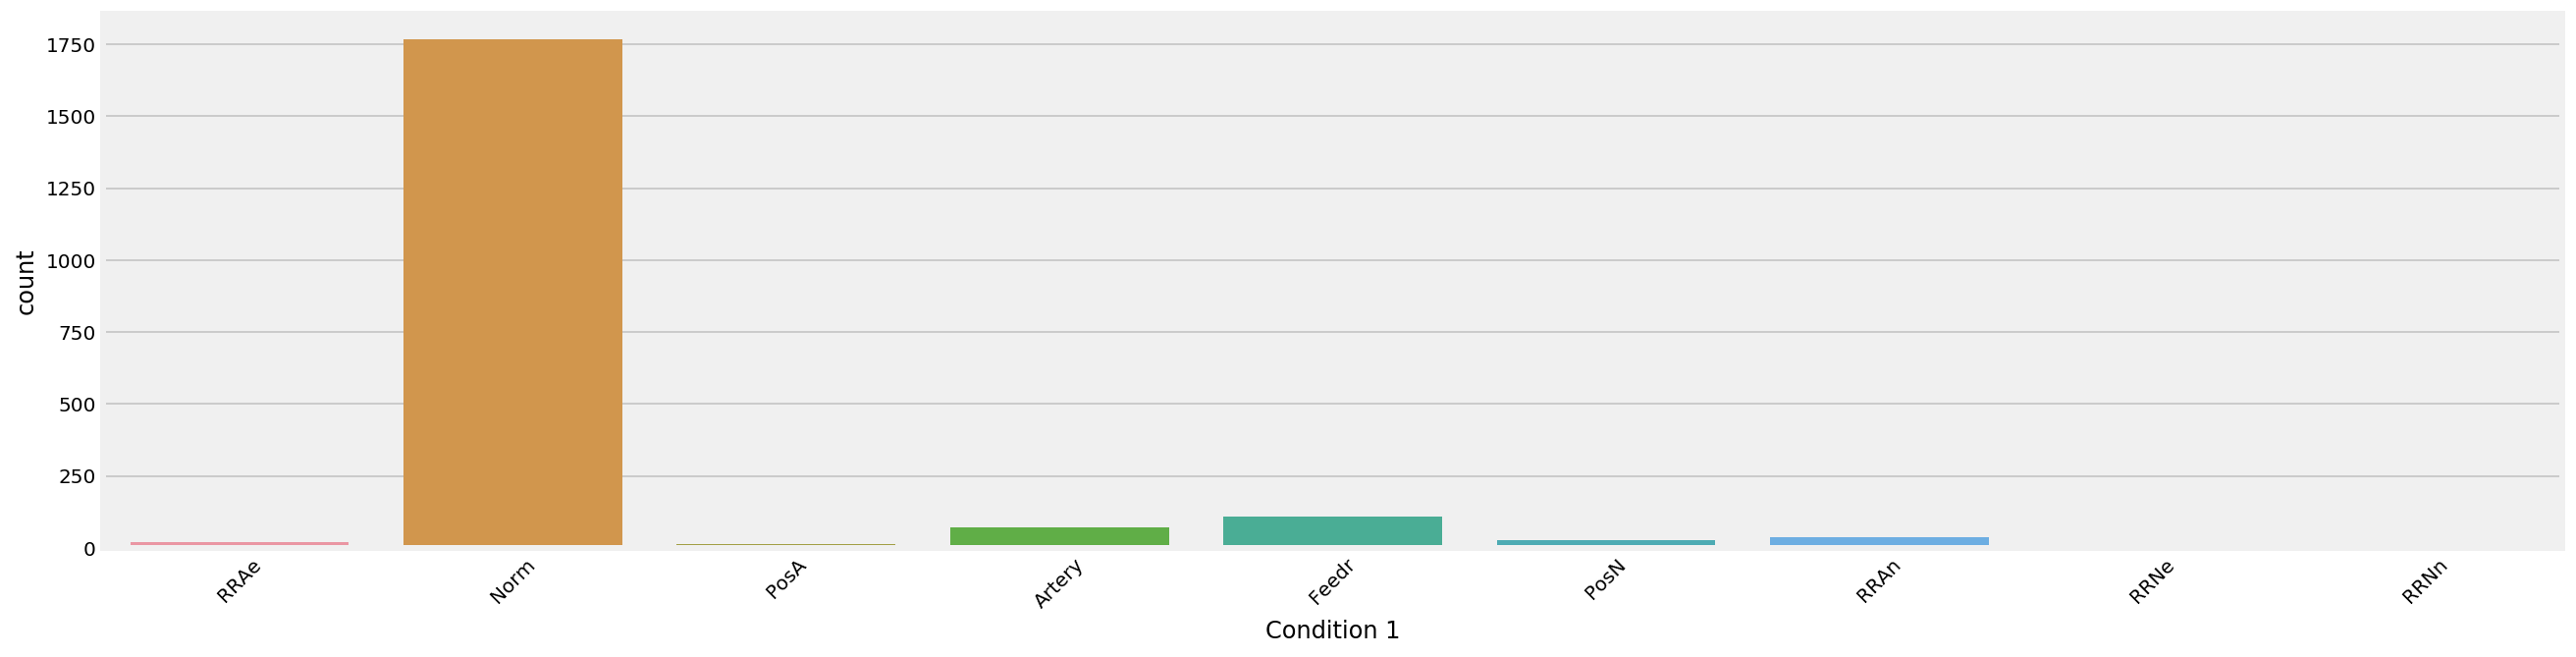

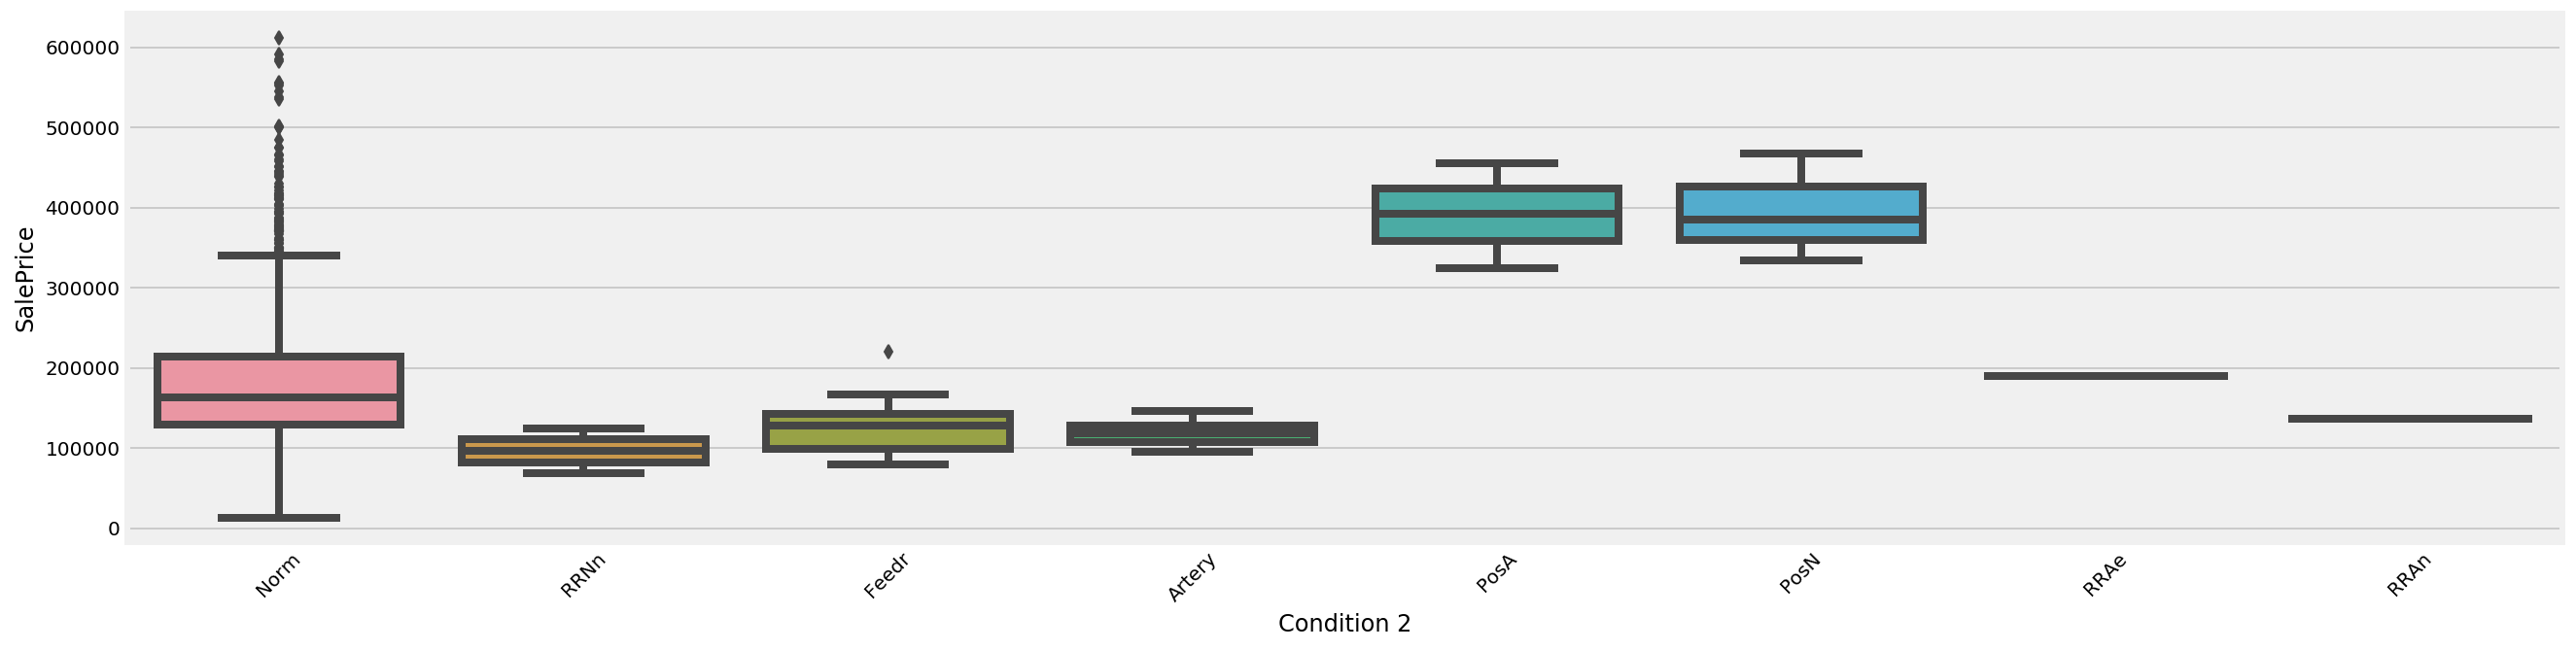

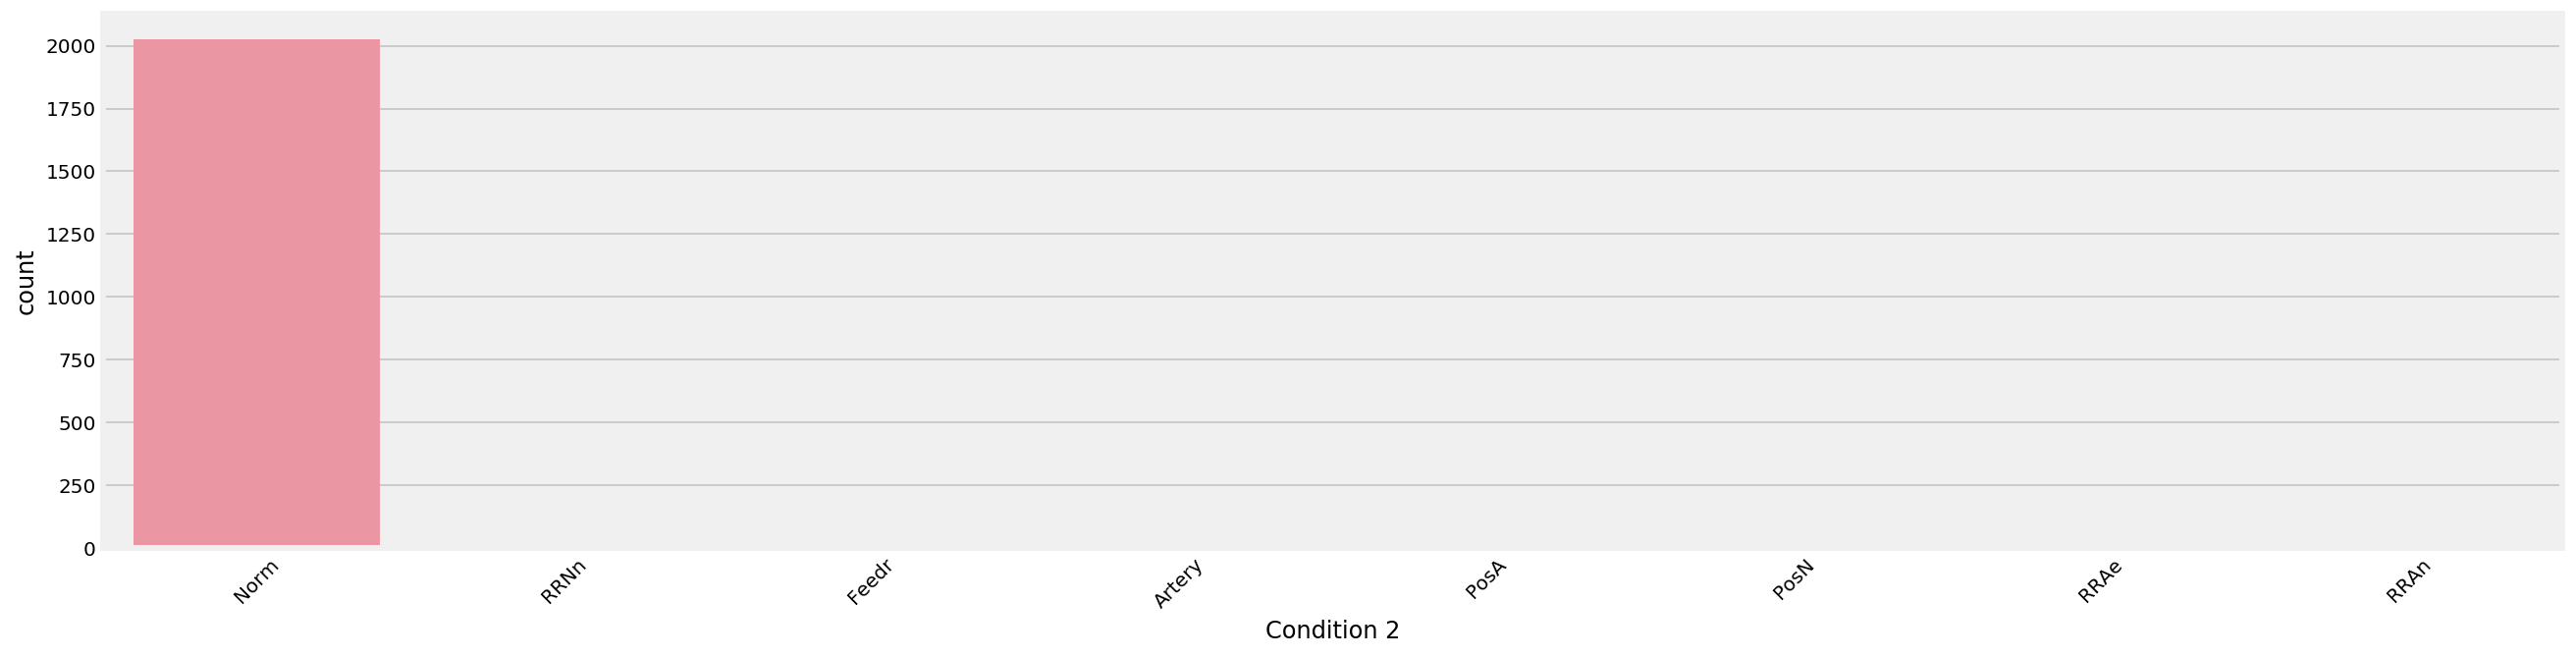

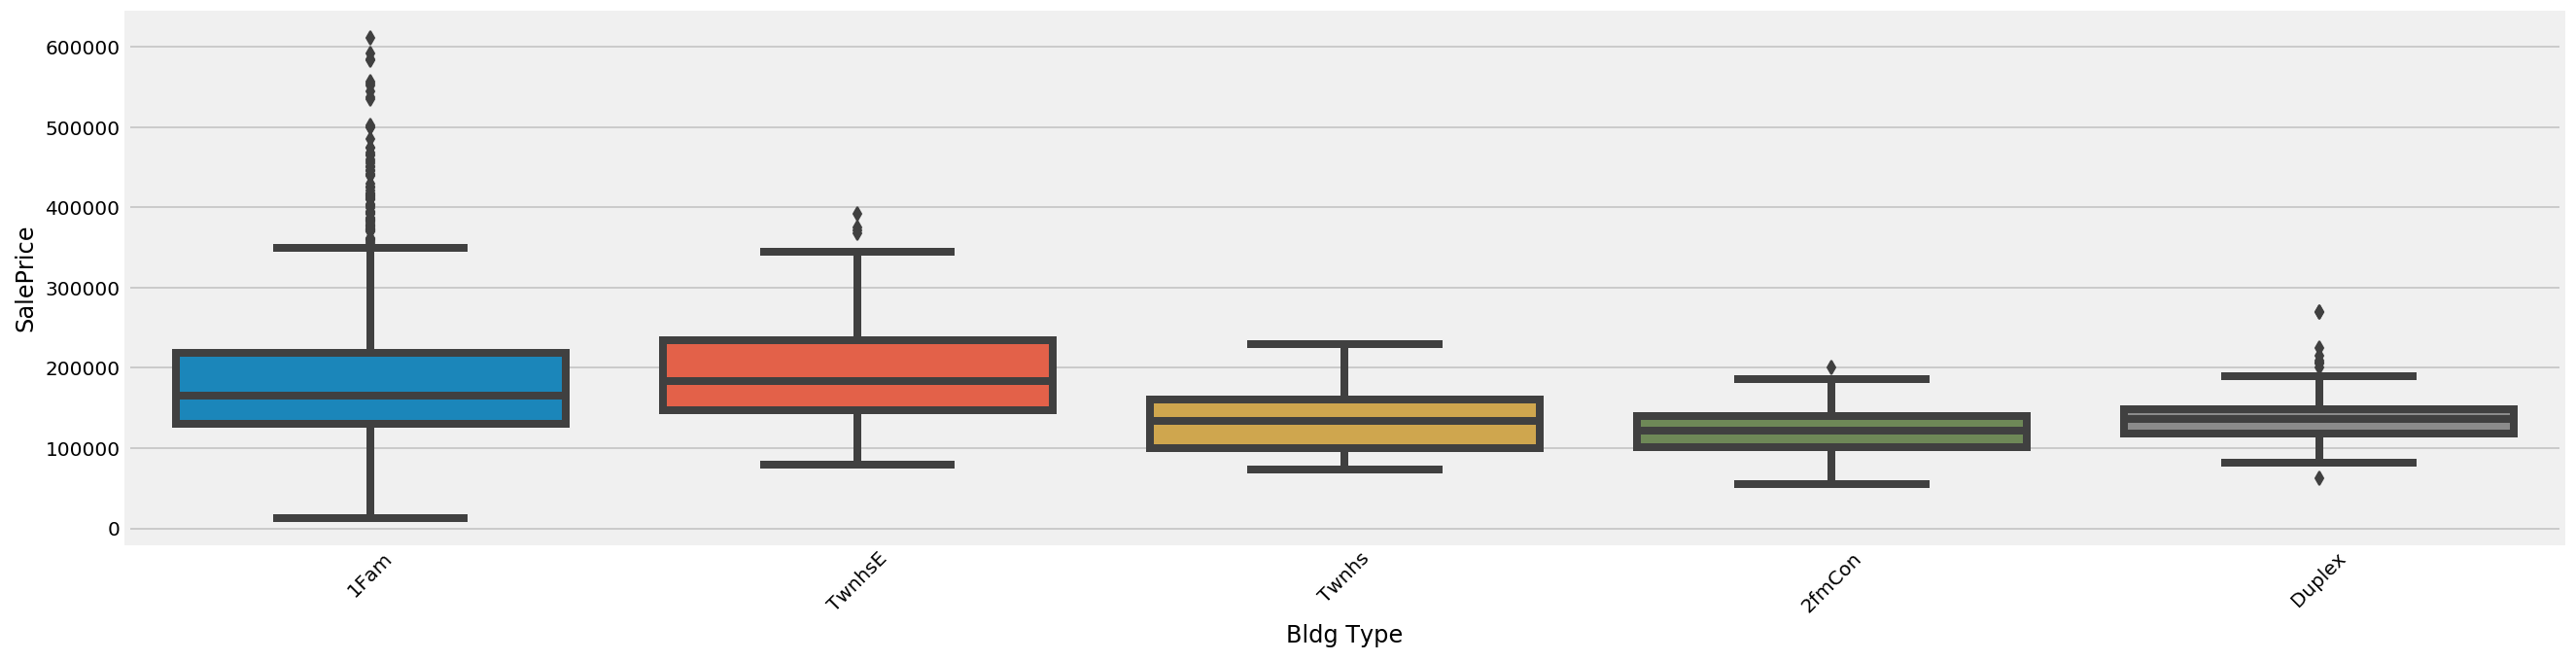

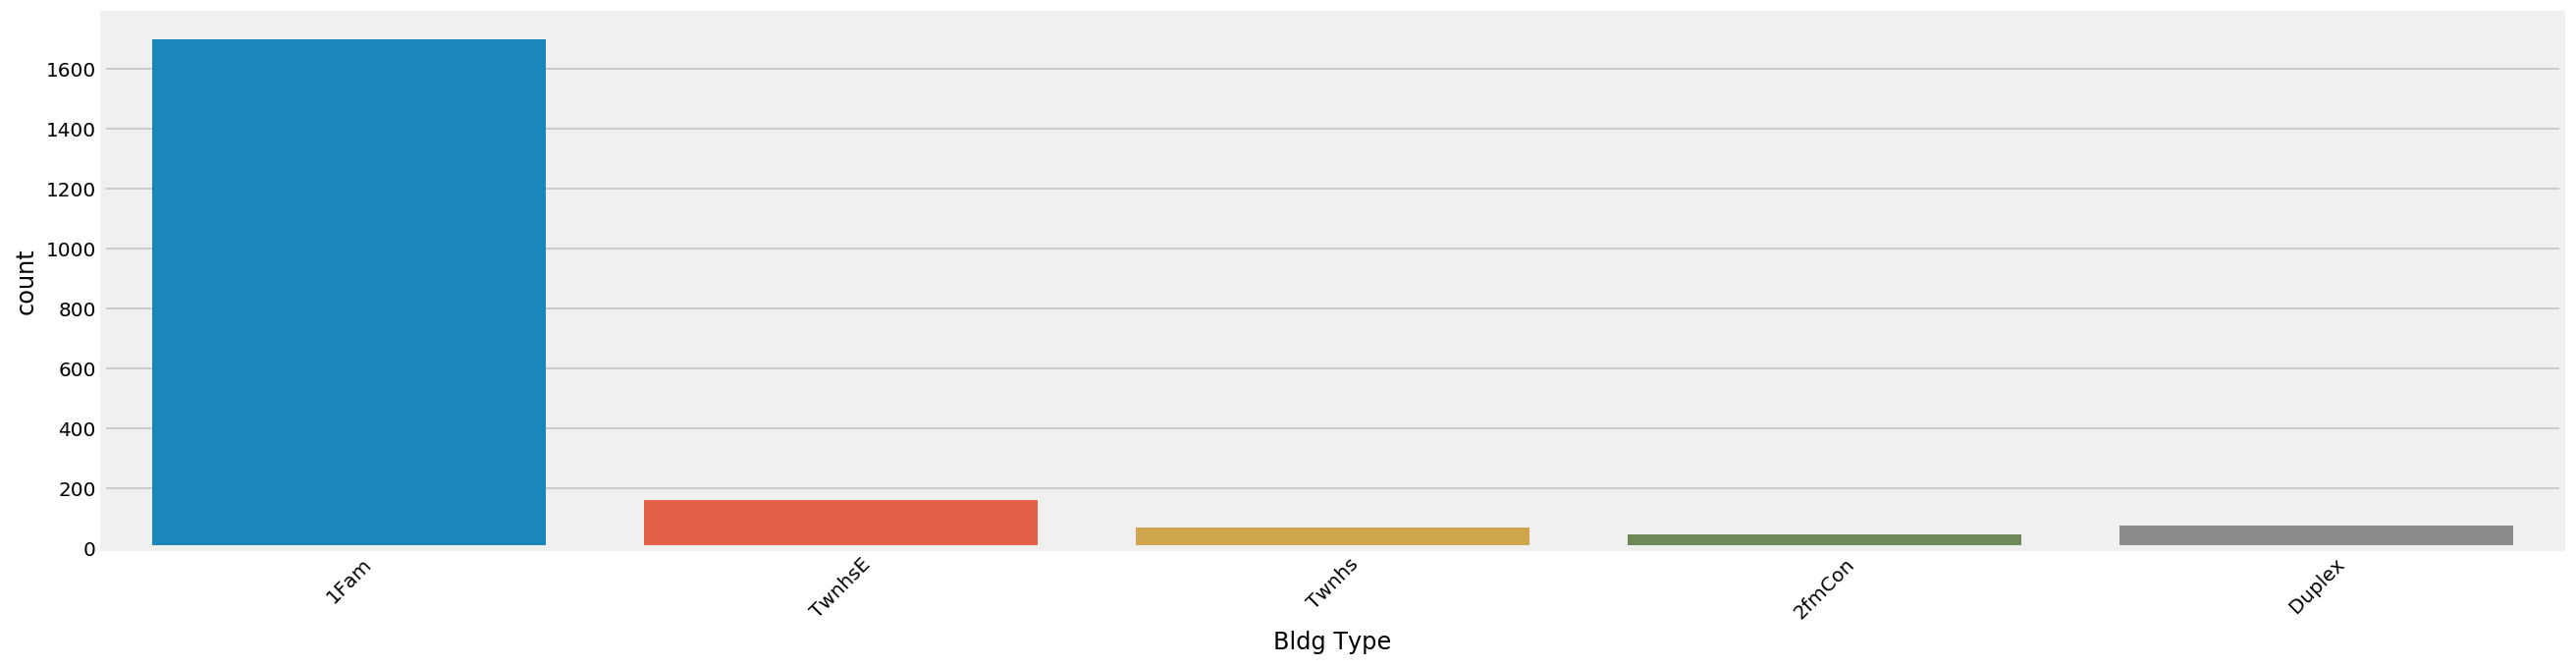

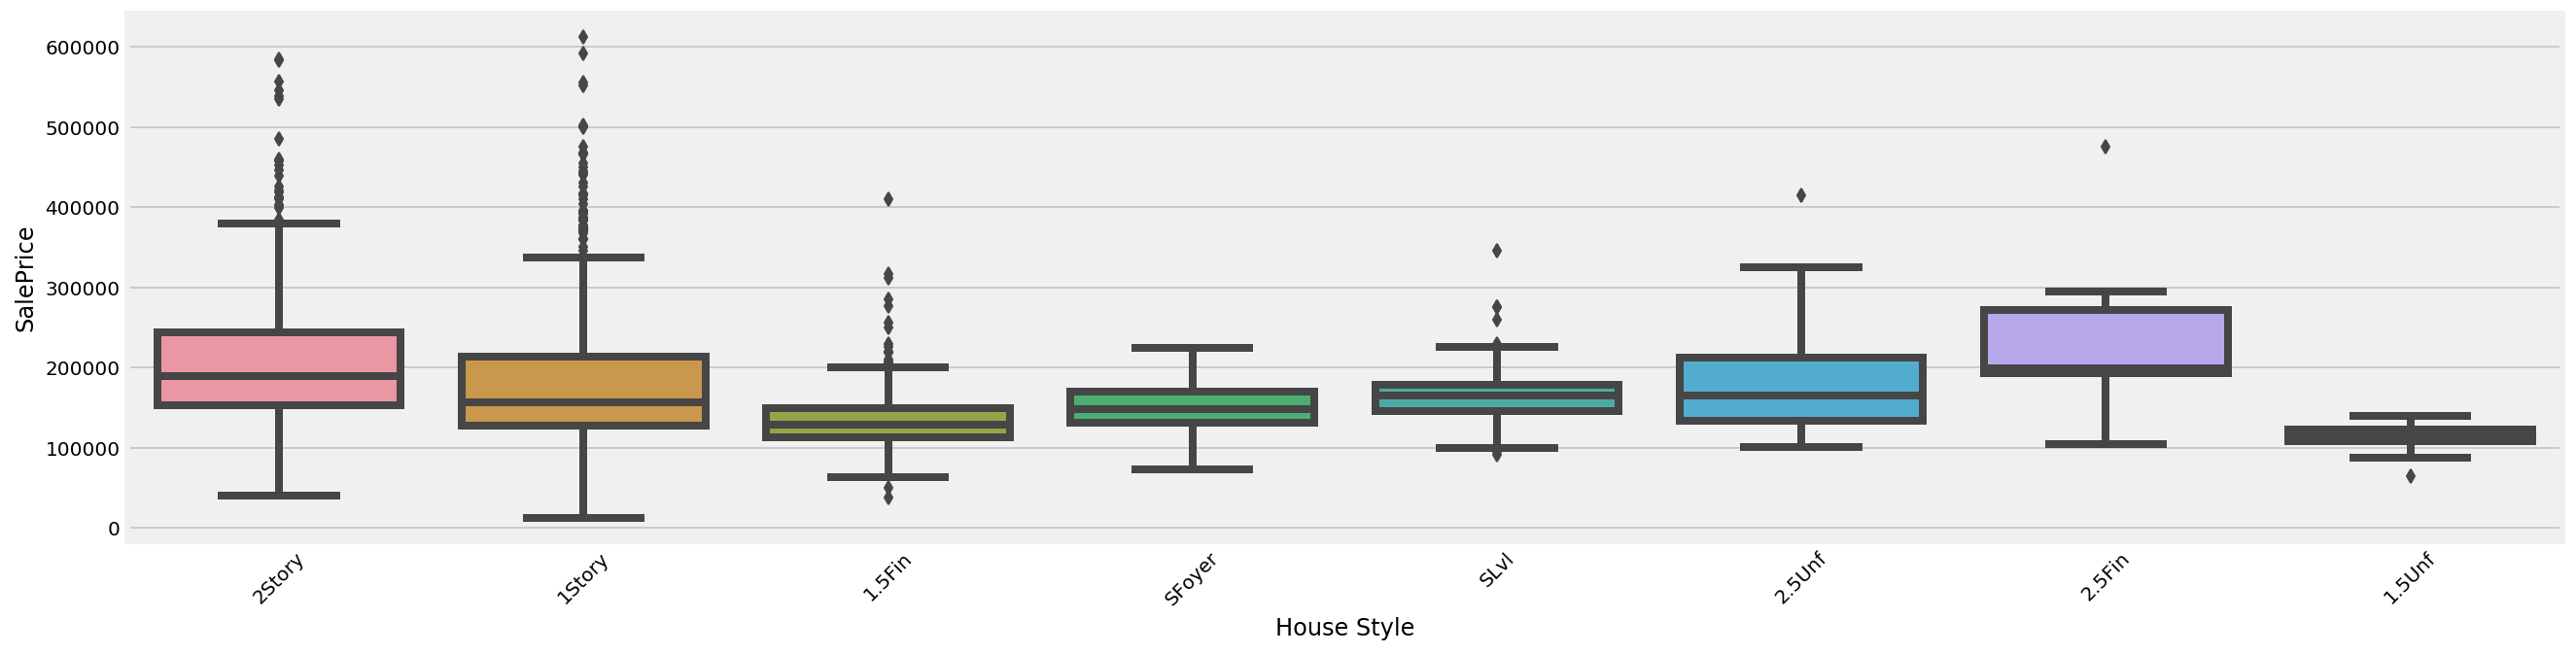

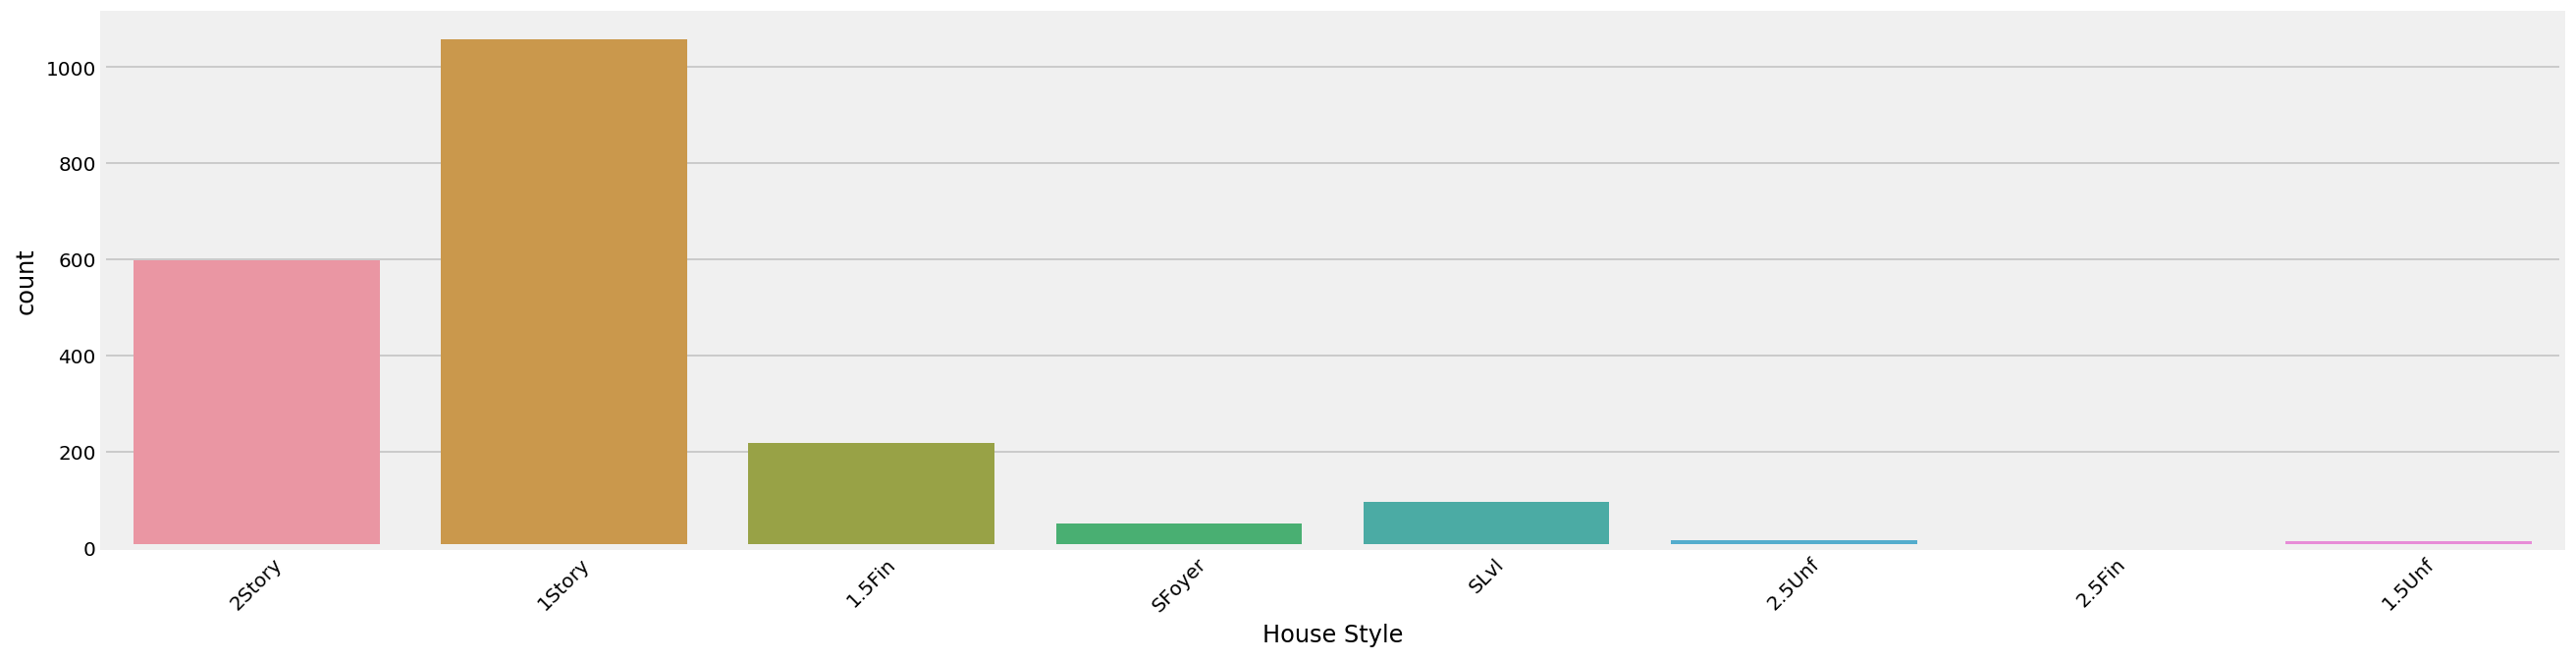

In [22]:
cols=['MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2',
        'Bldg Type','House Style']
for col in cols:
    box_plot(df_train,col)
    count_plot(df_train,col)

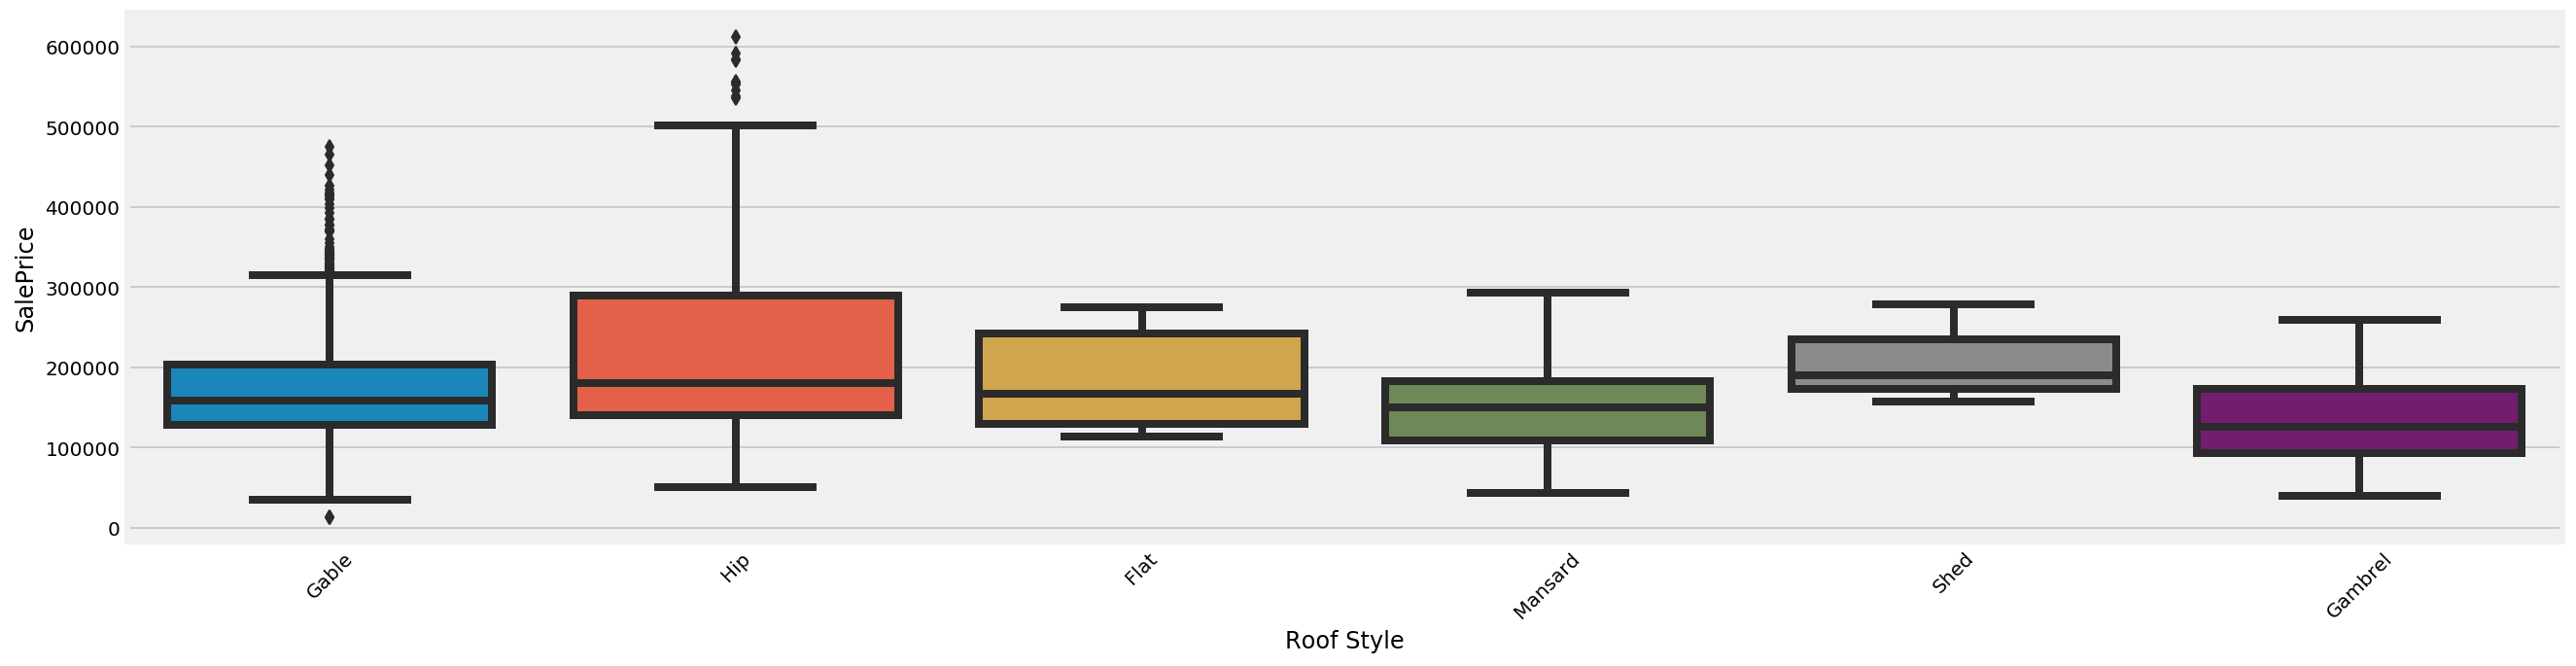

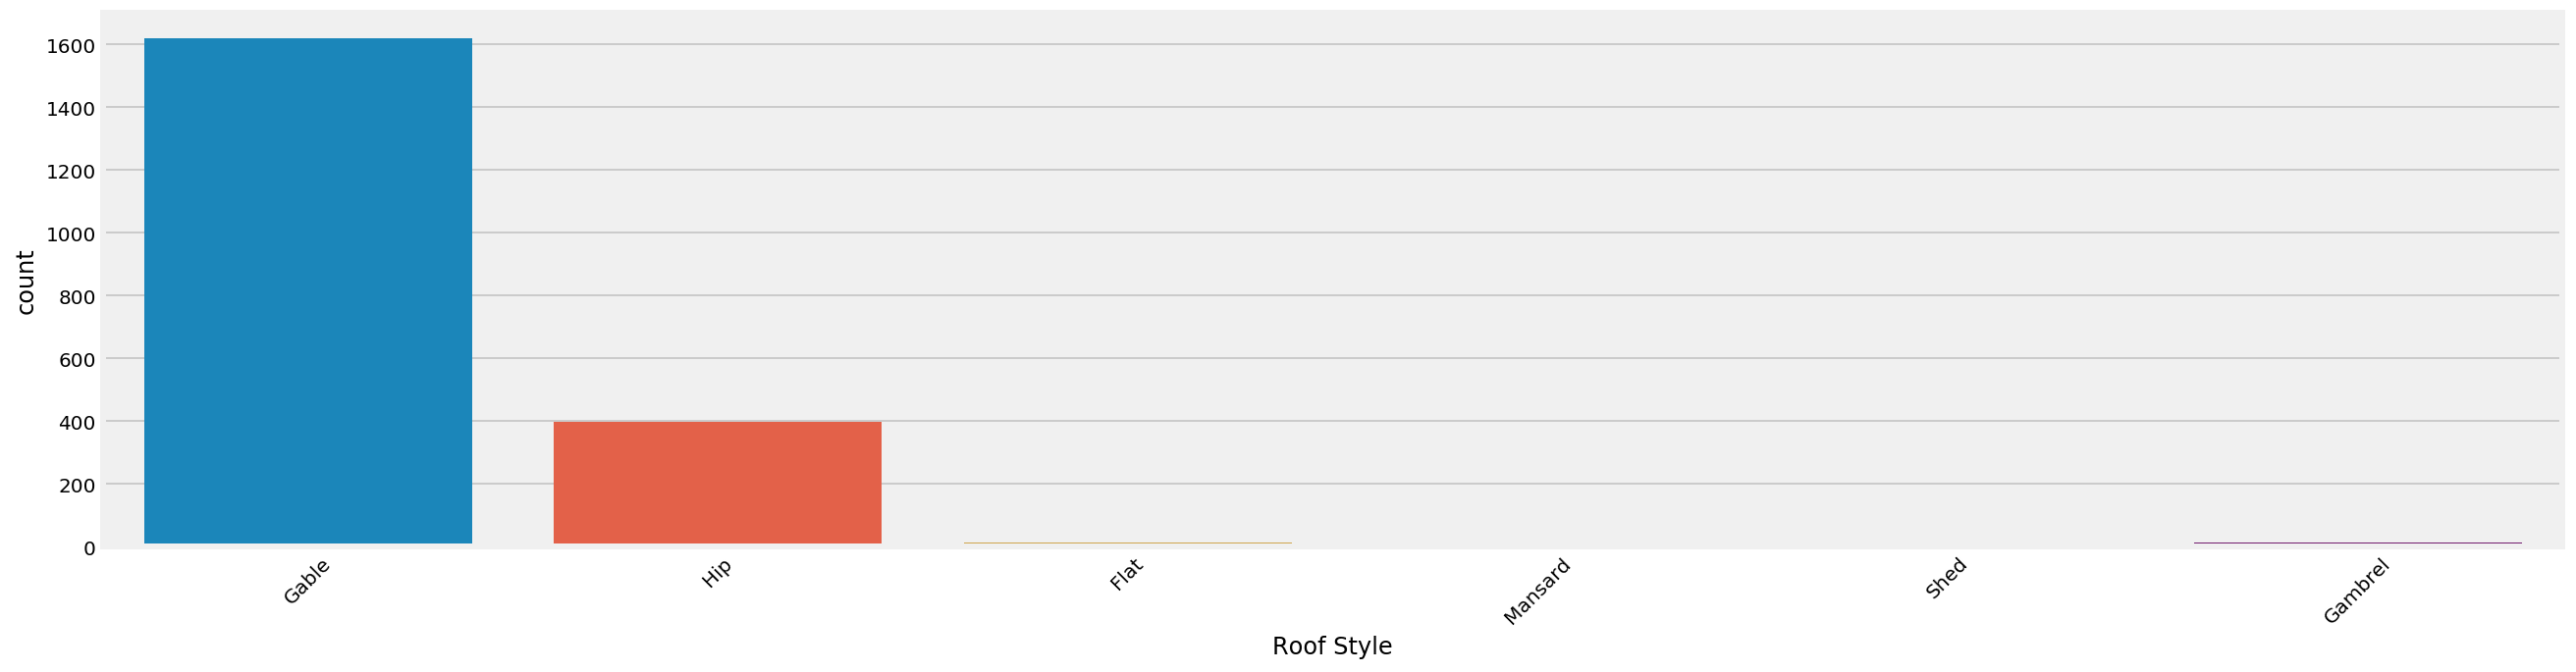

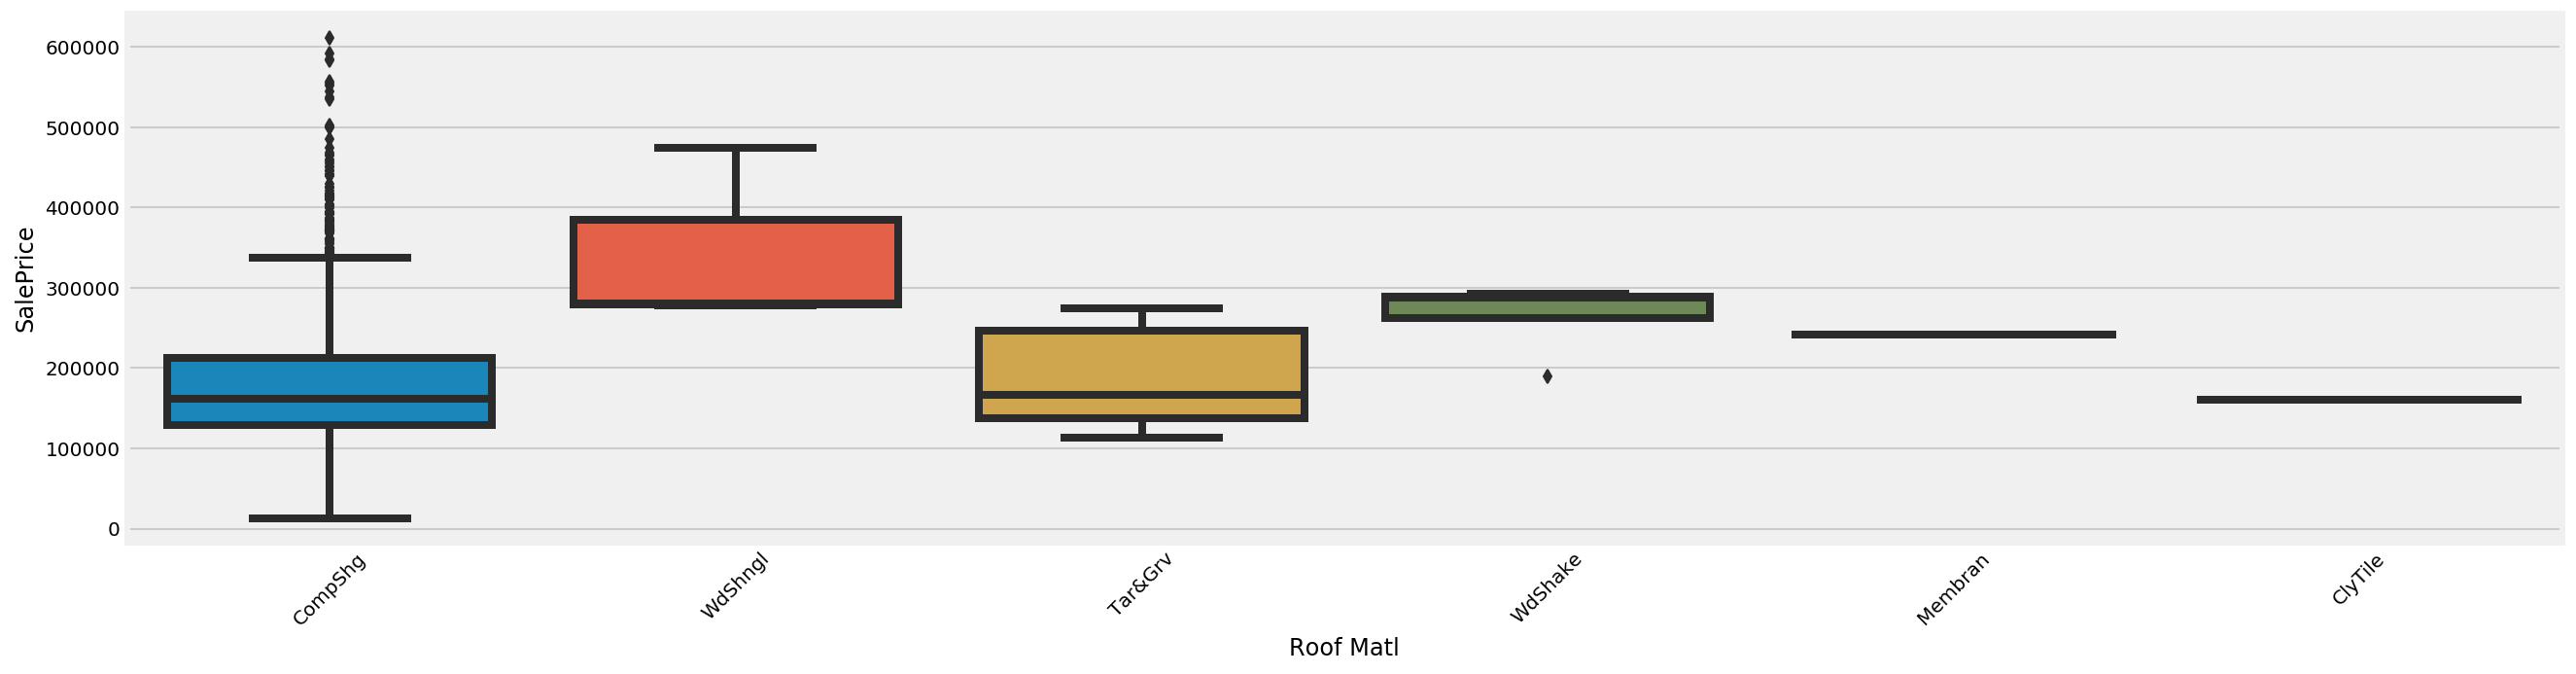

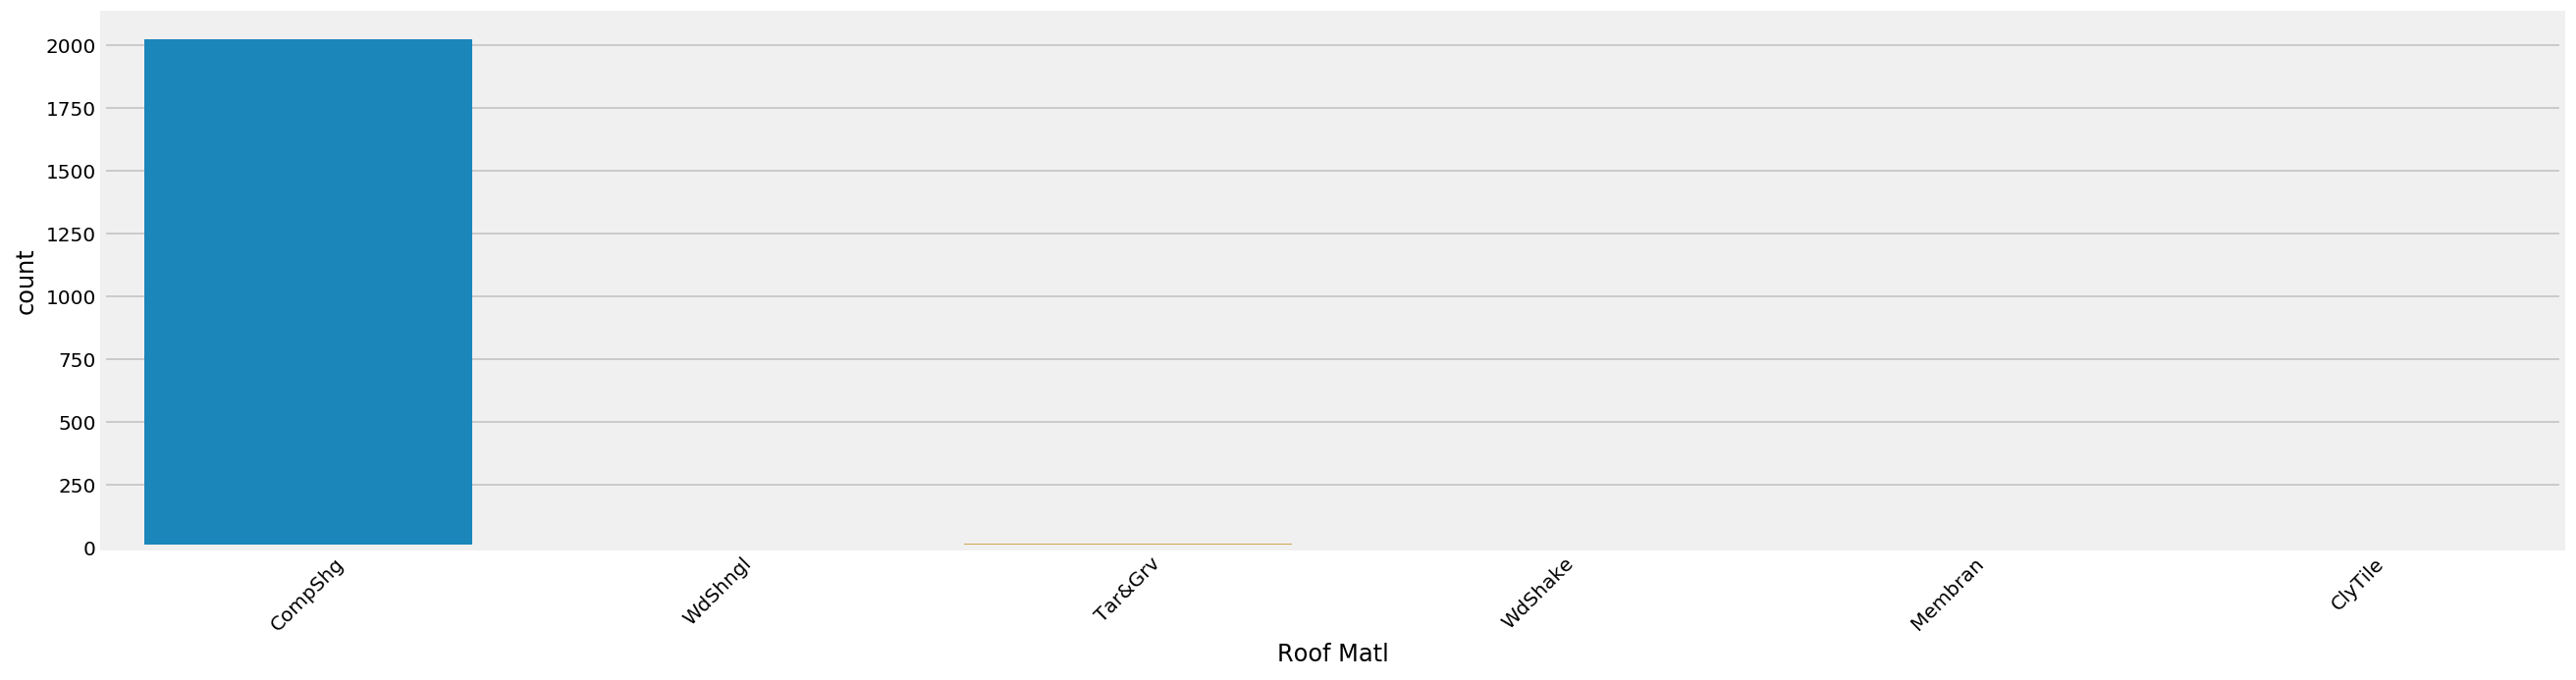

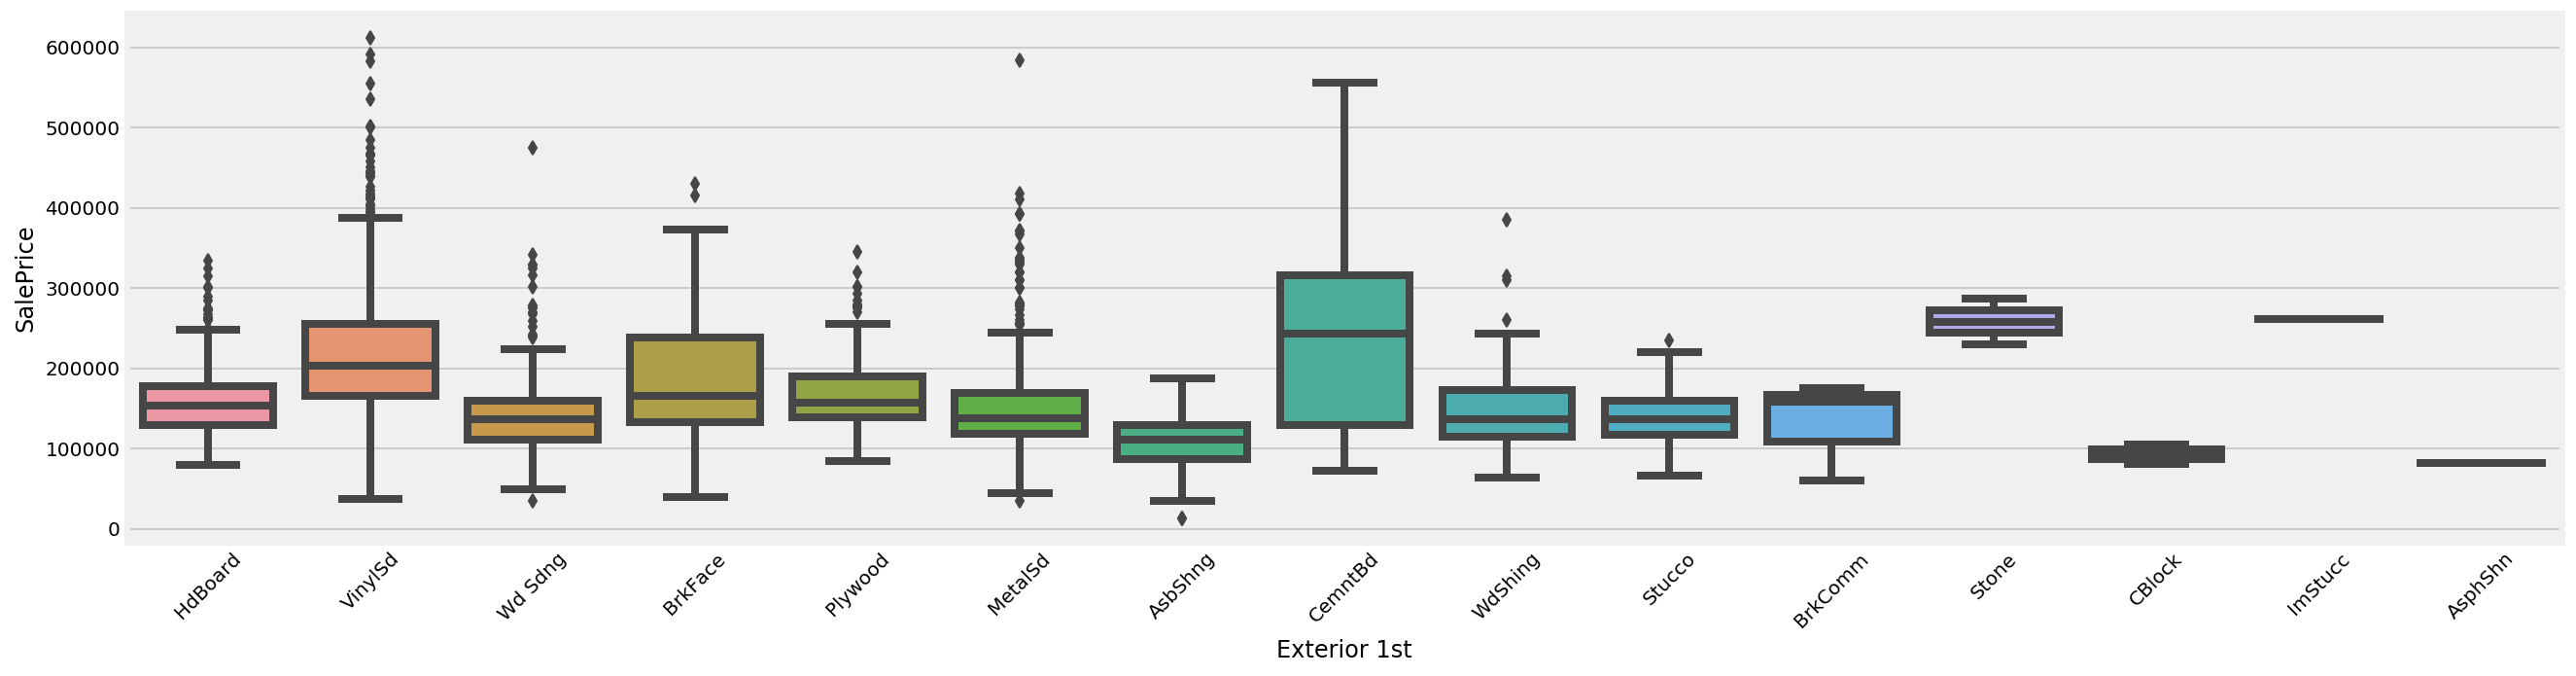

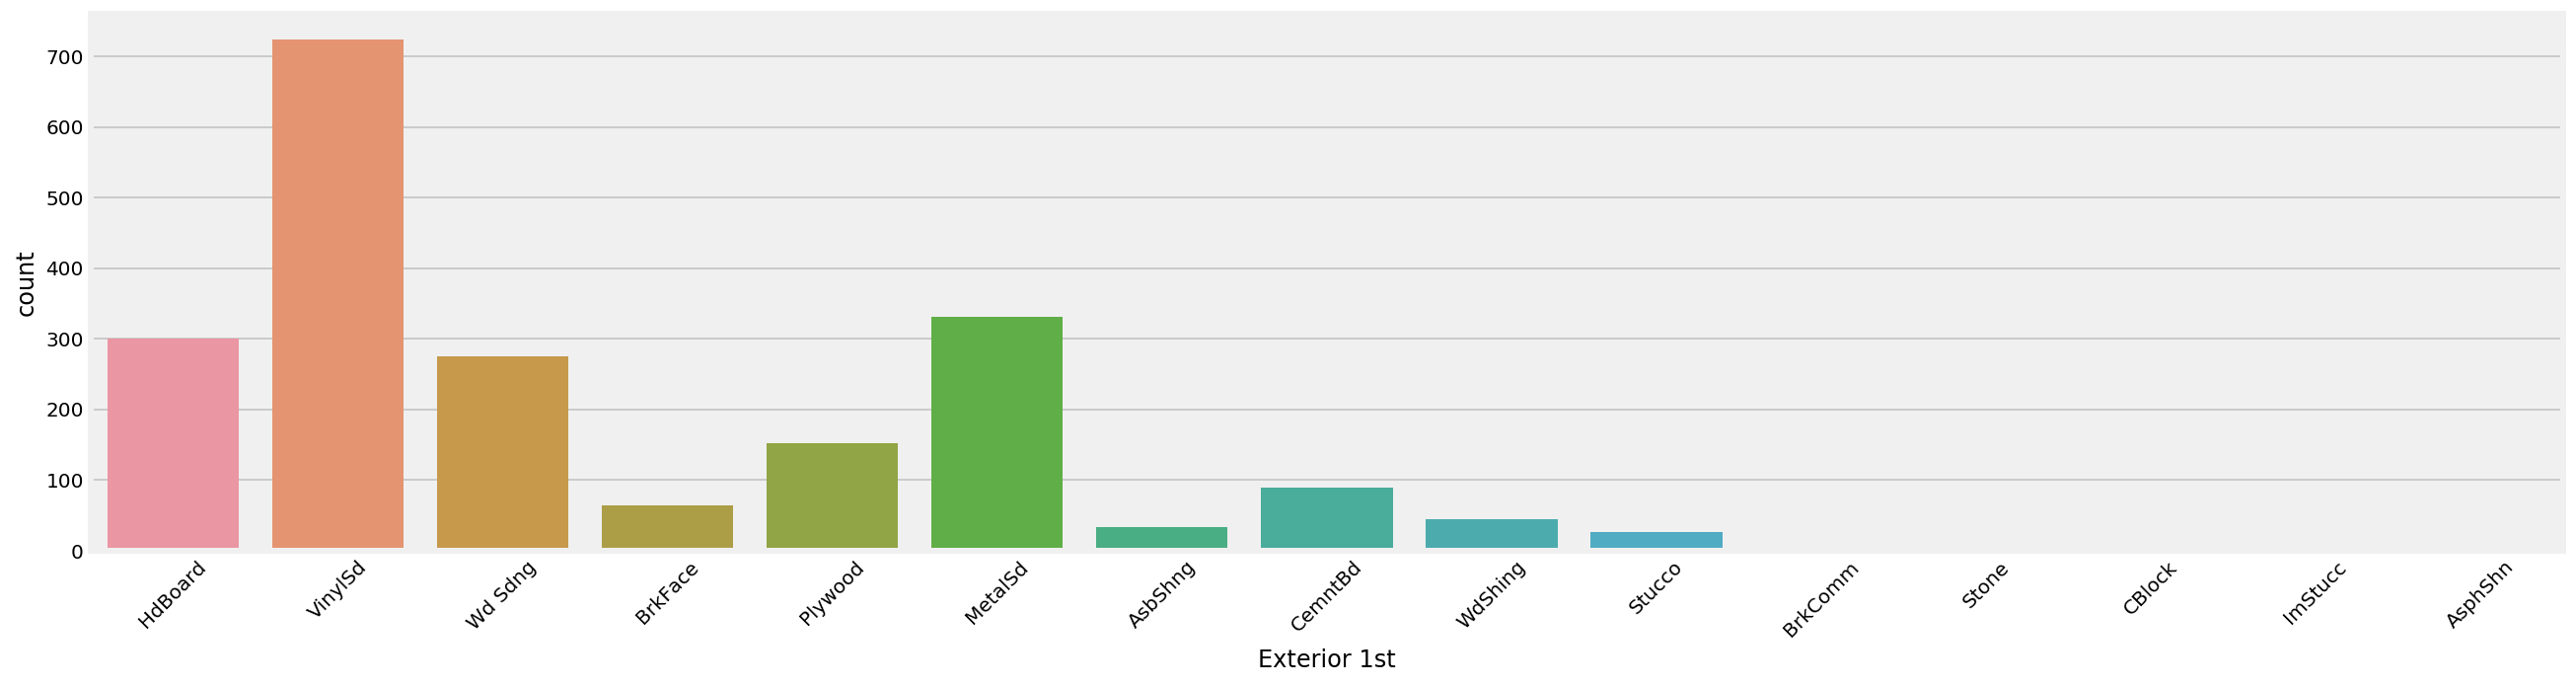

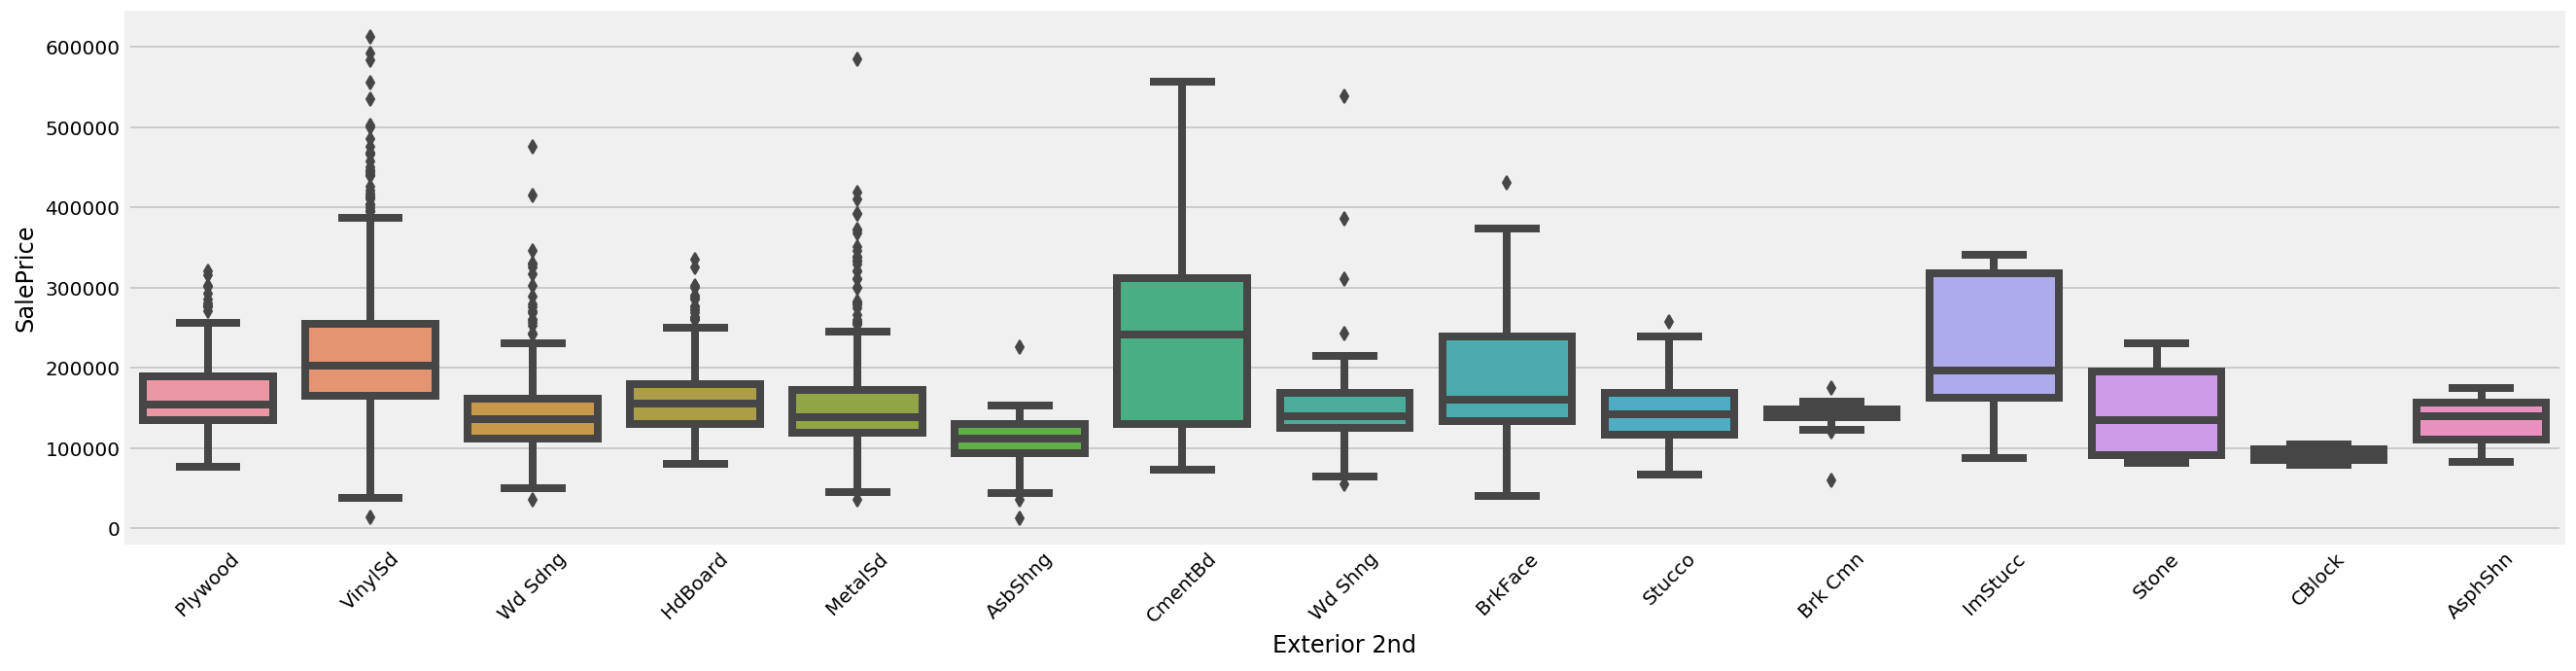

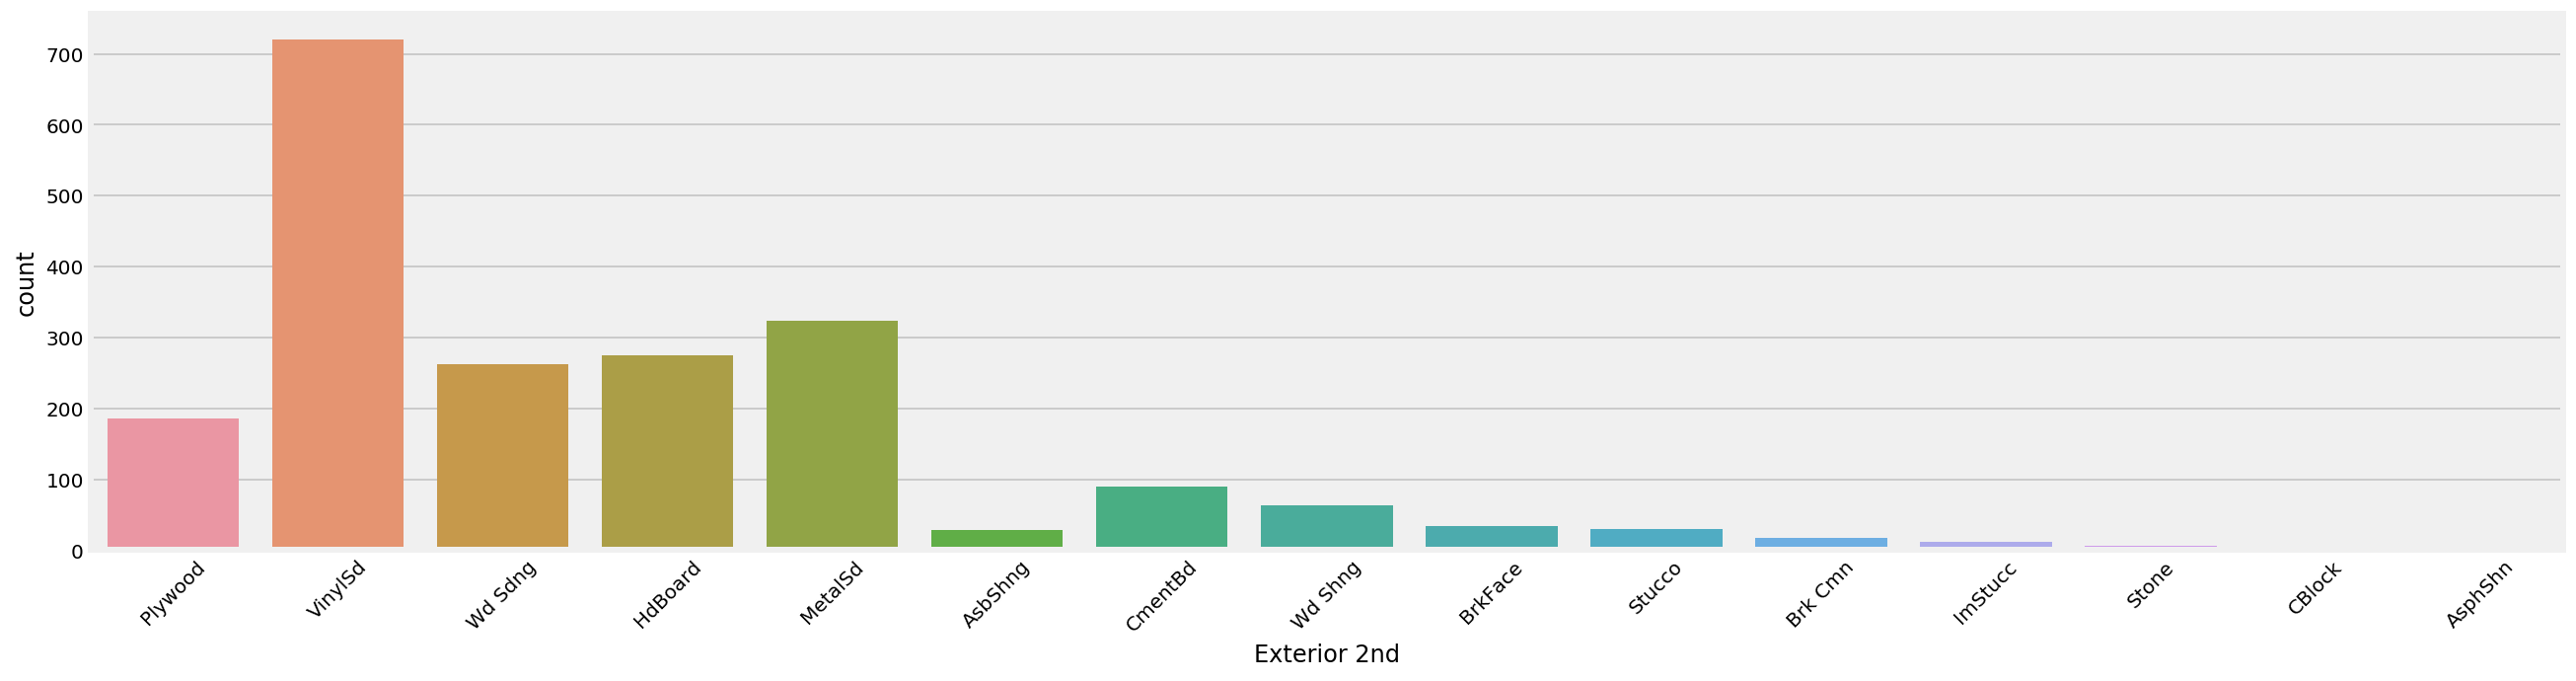

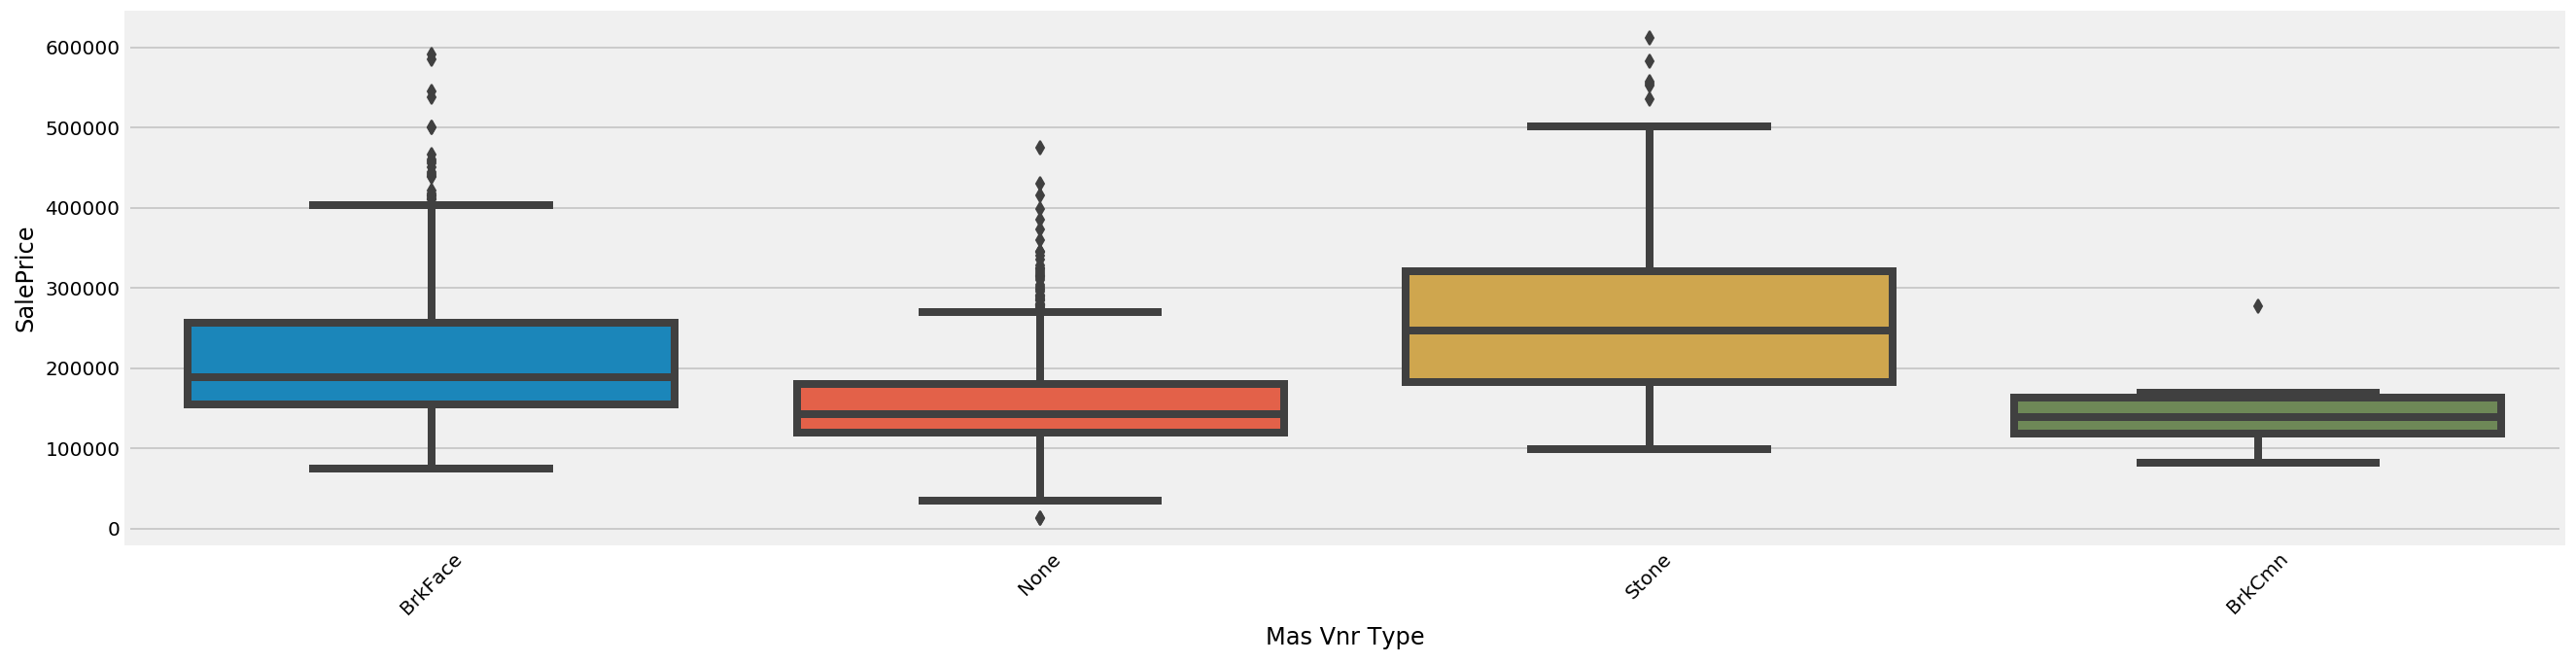

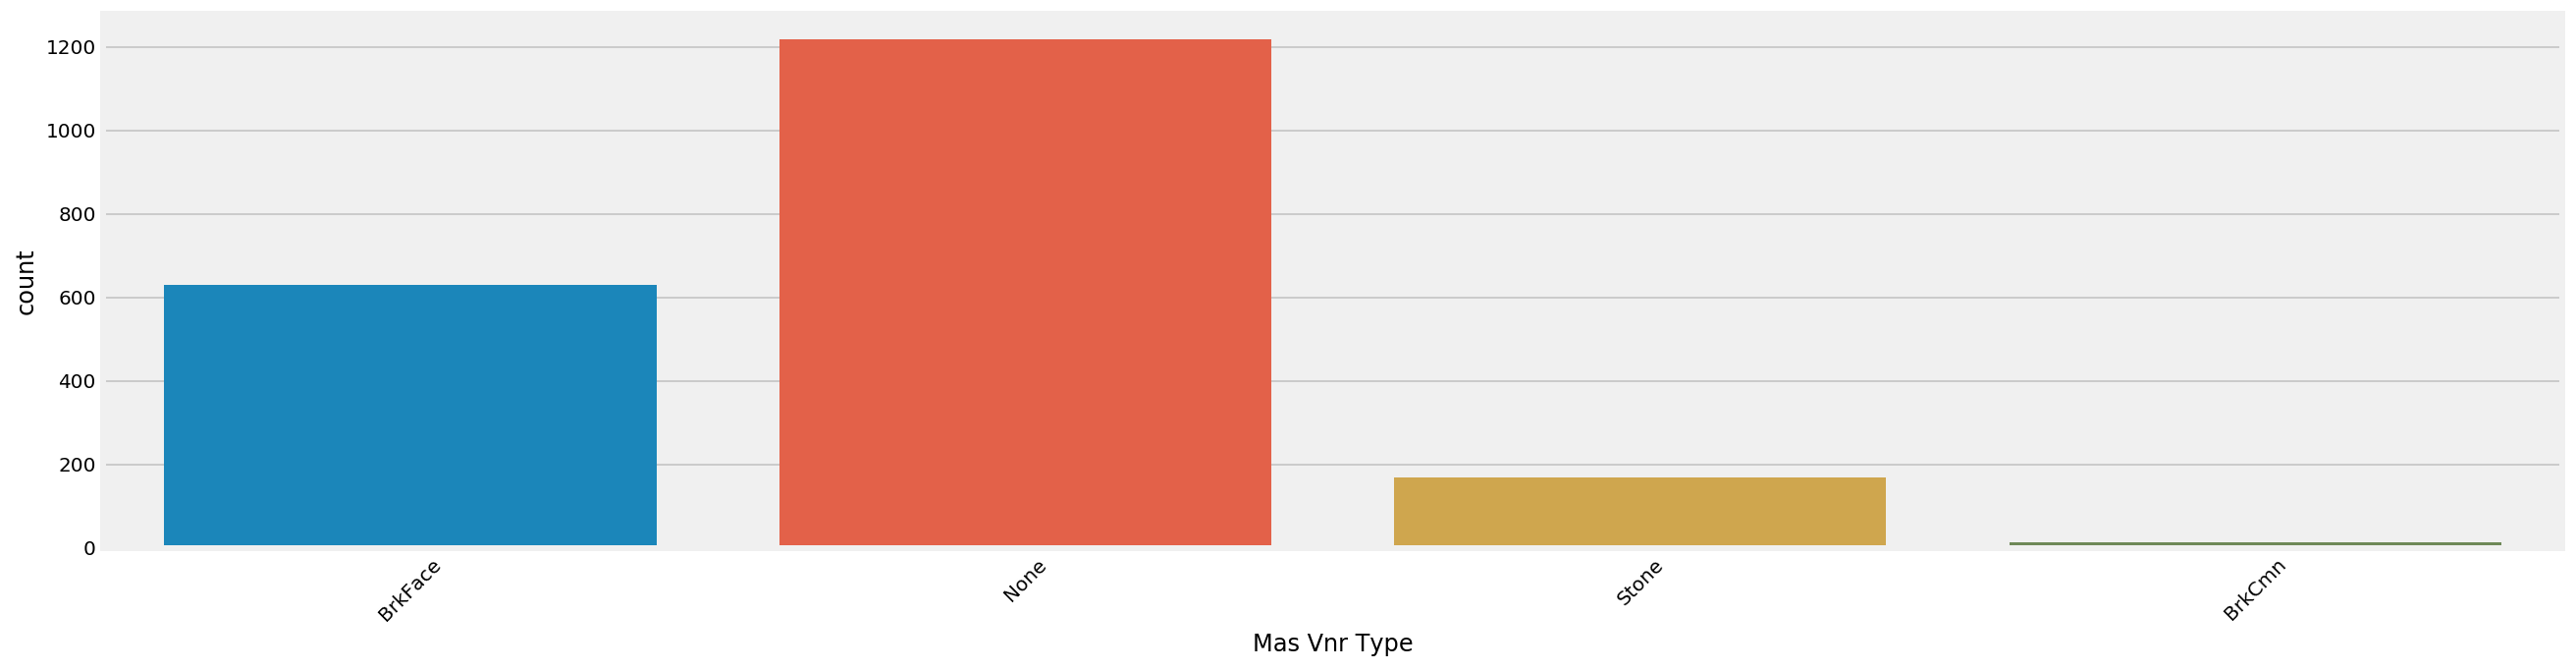

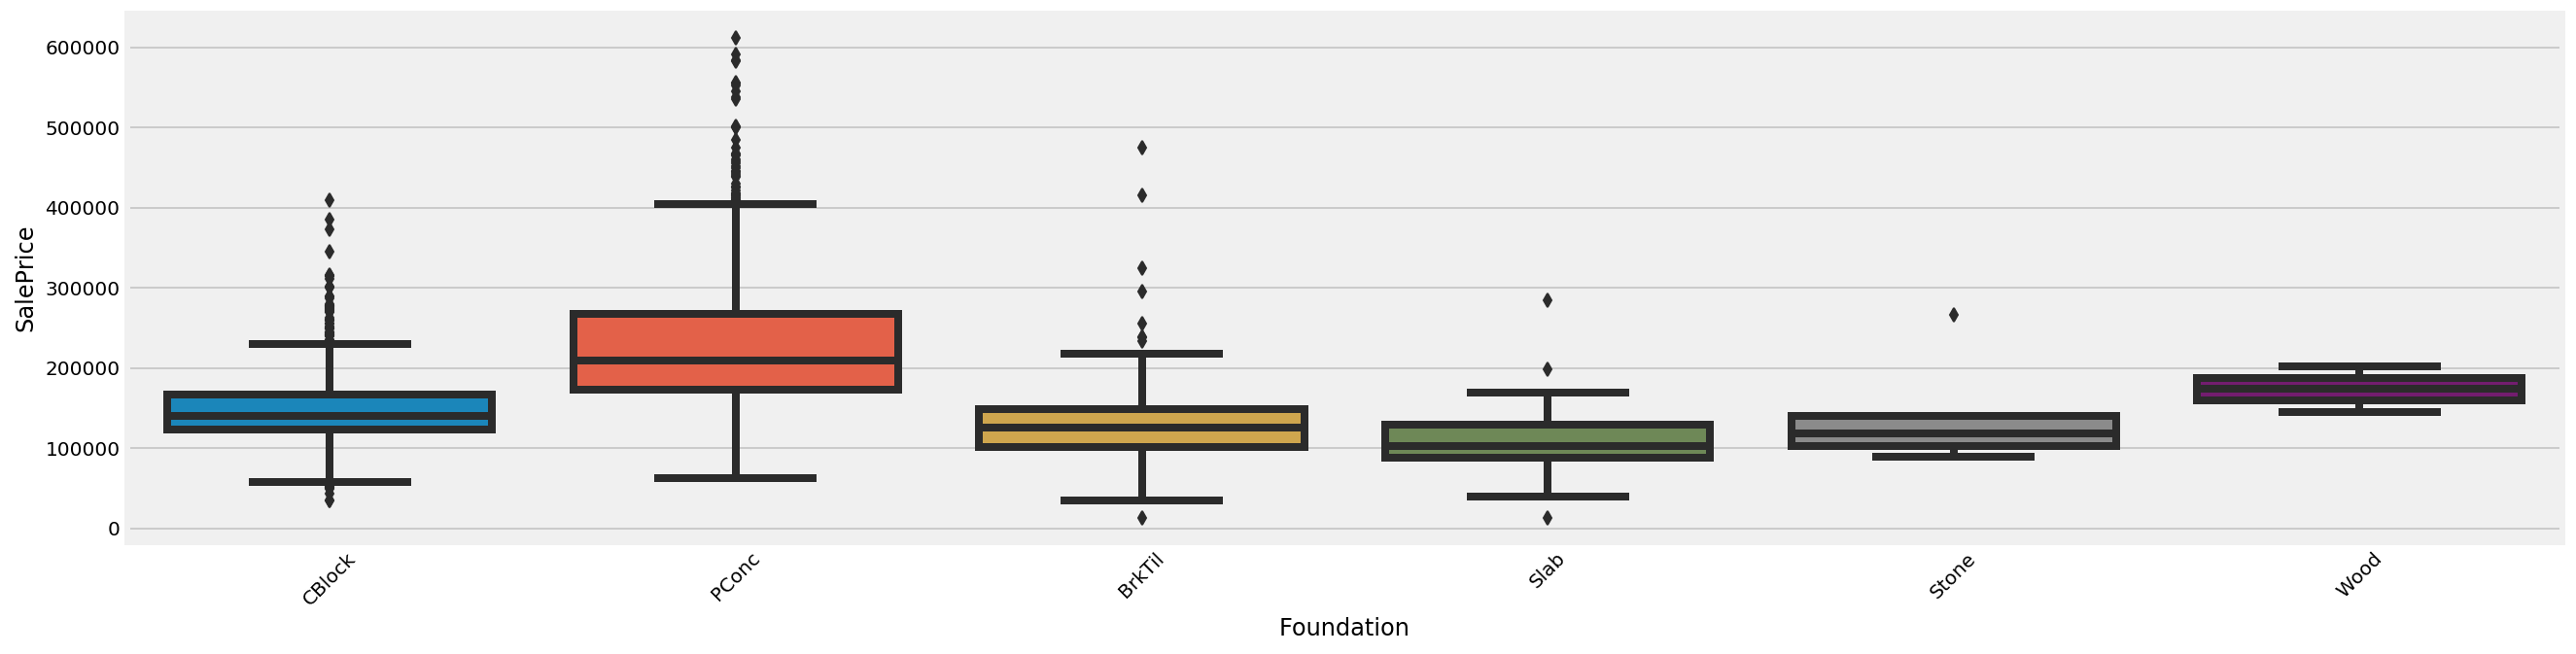

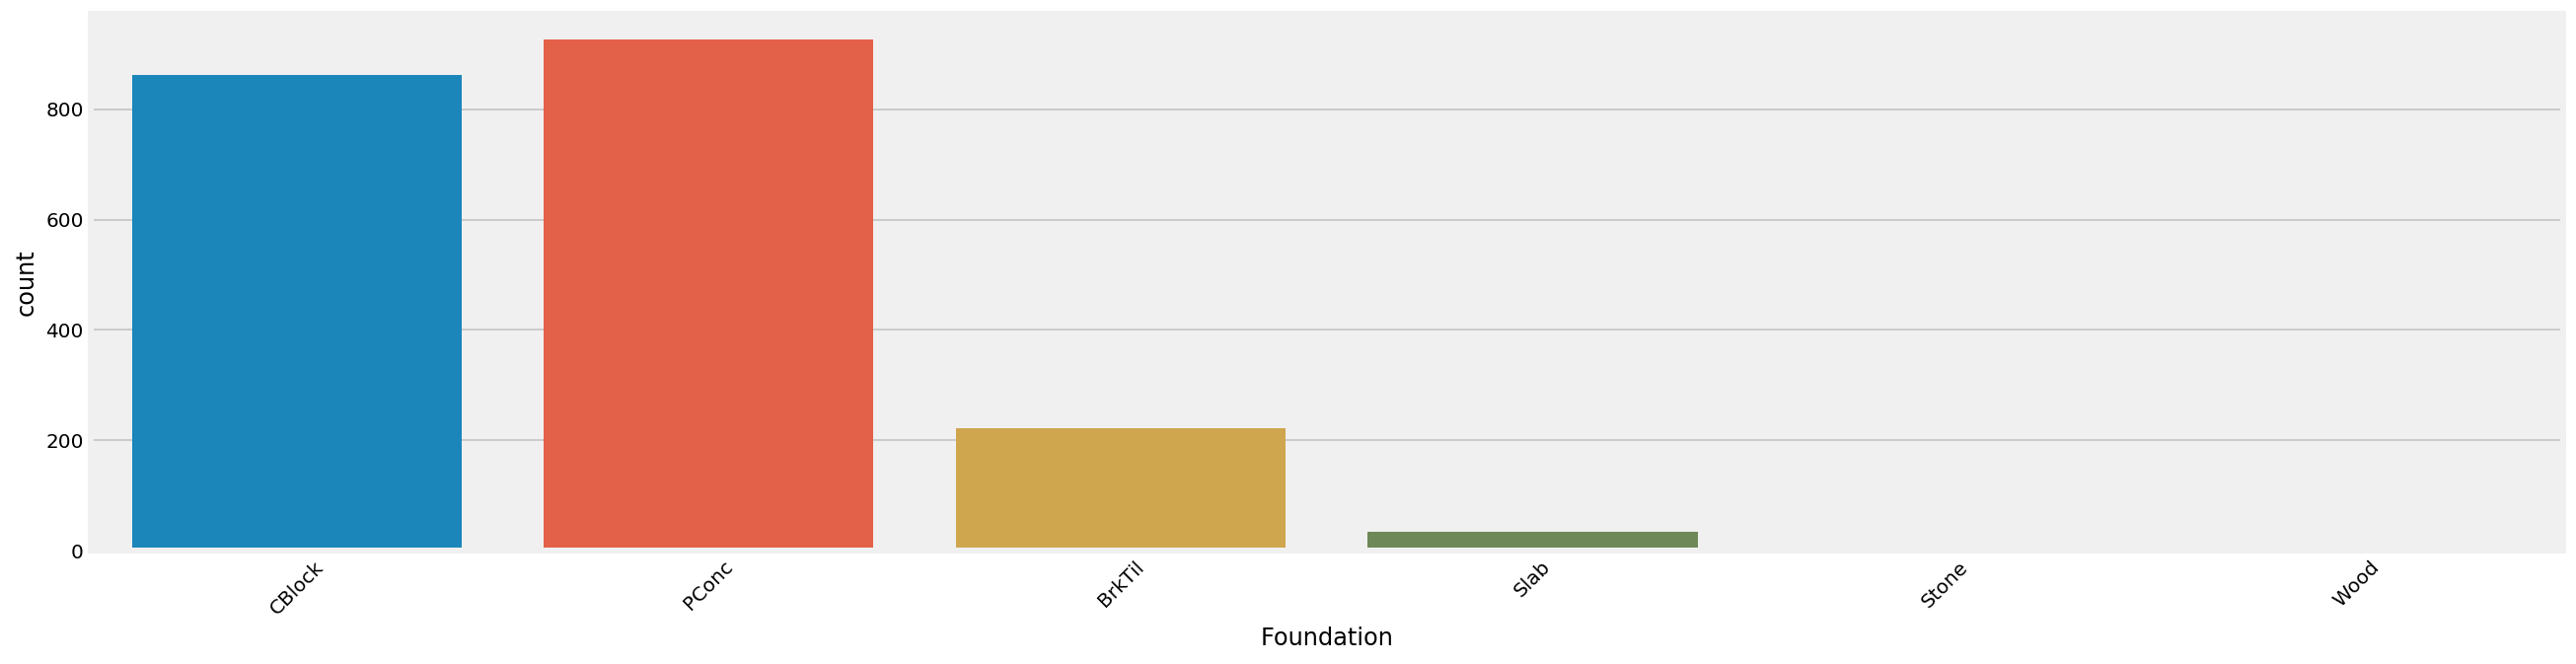

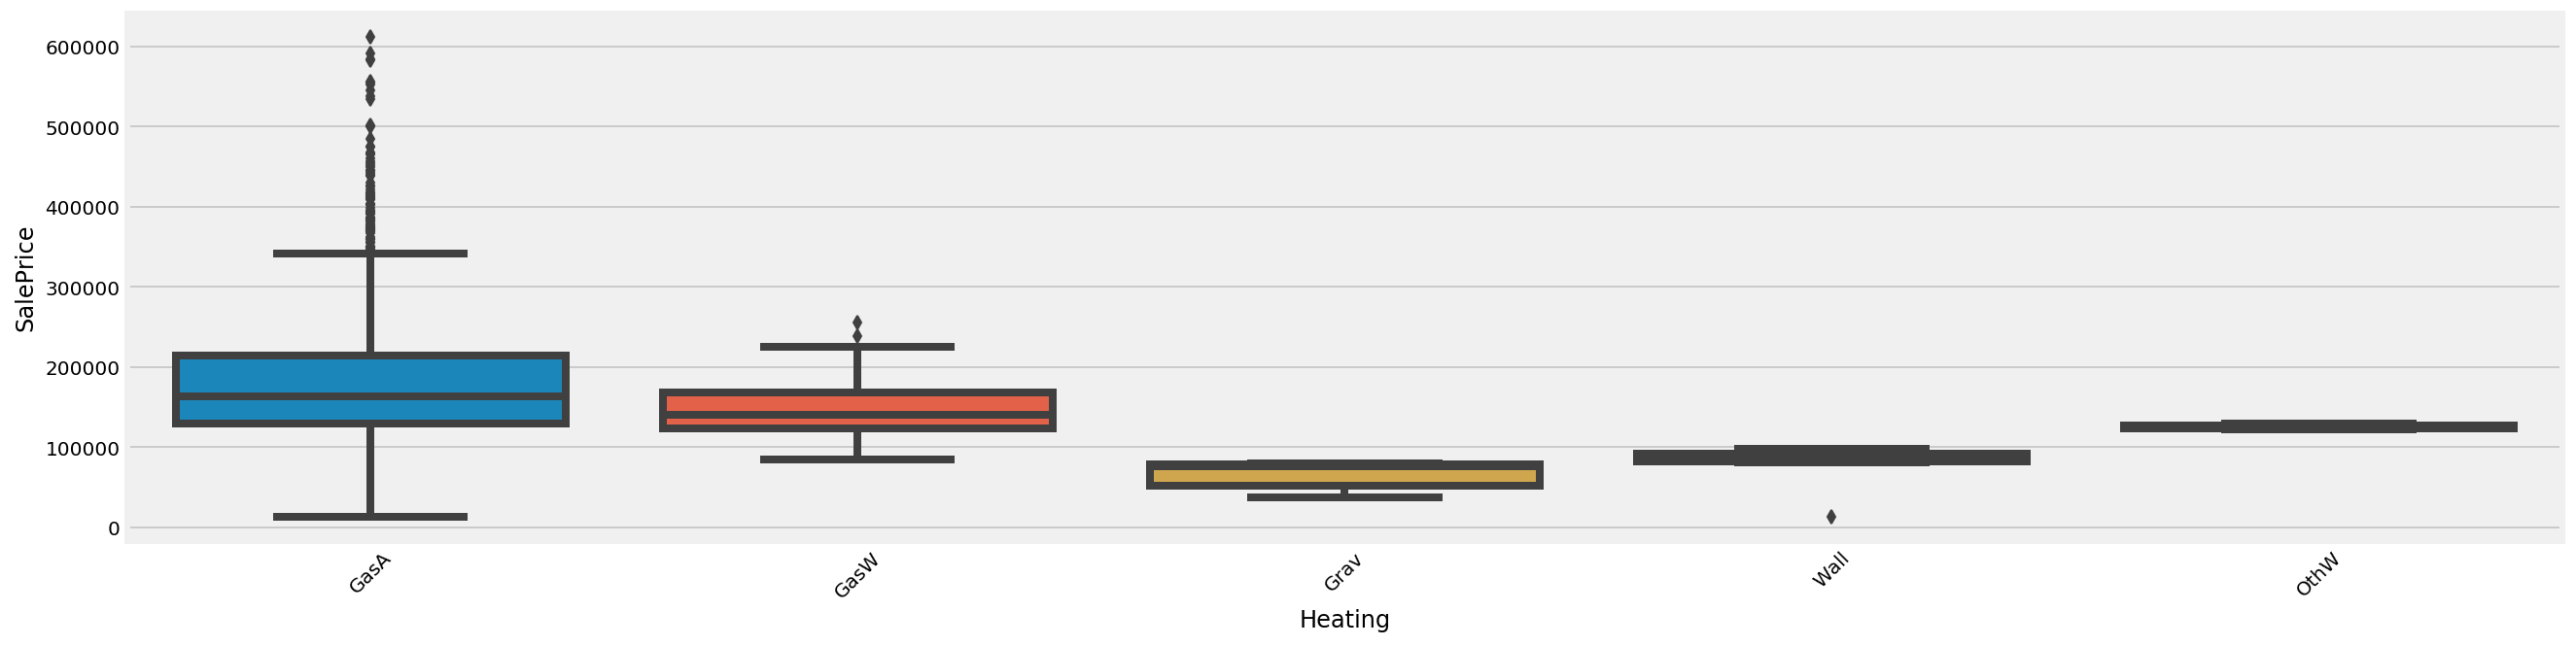

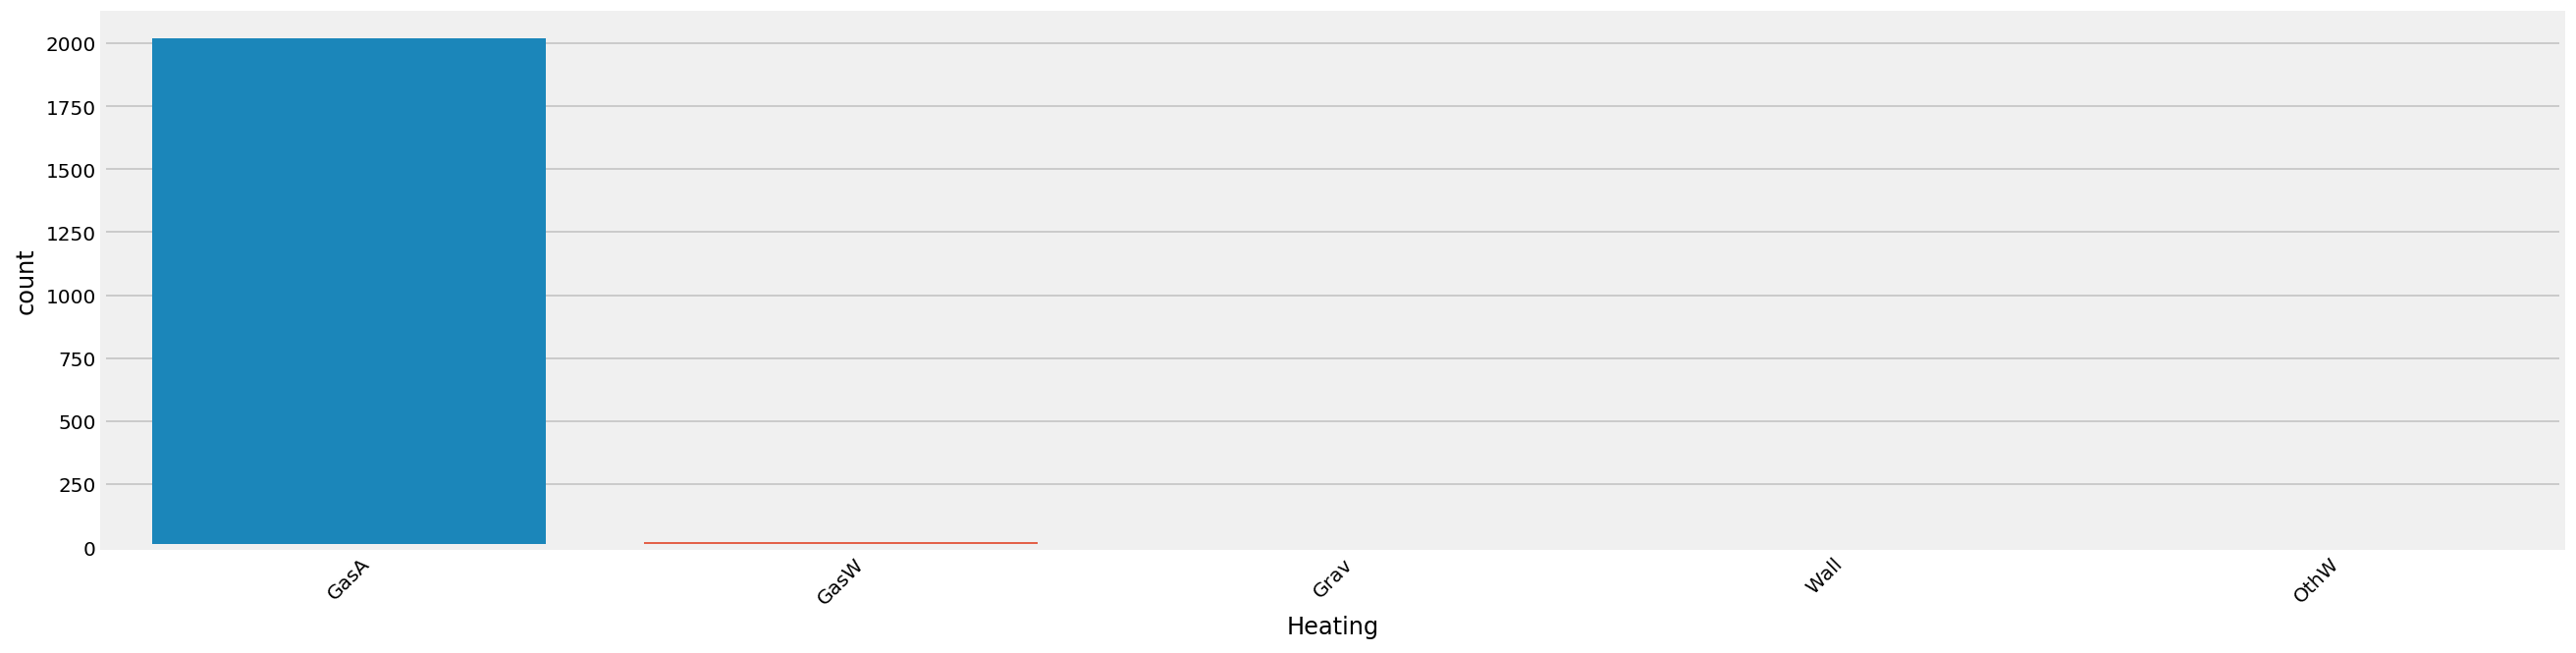

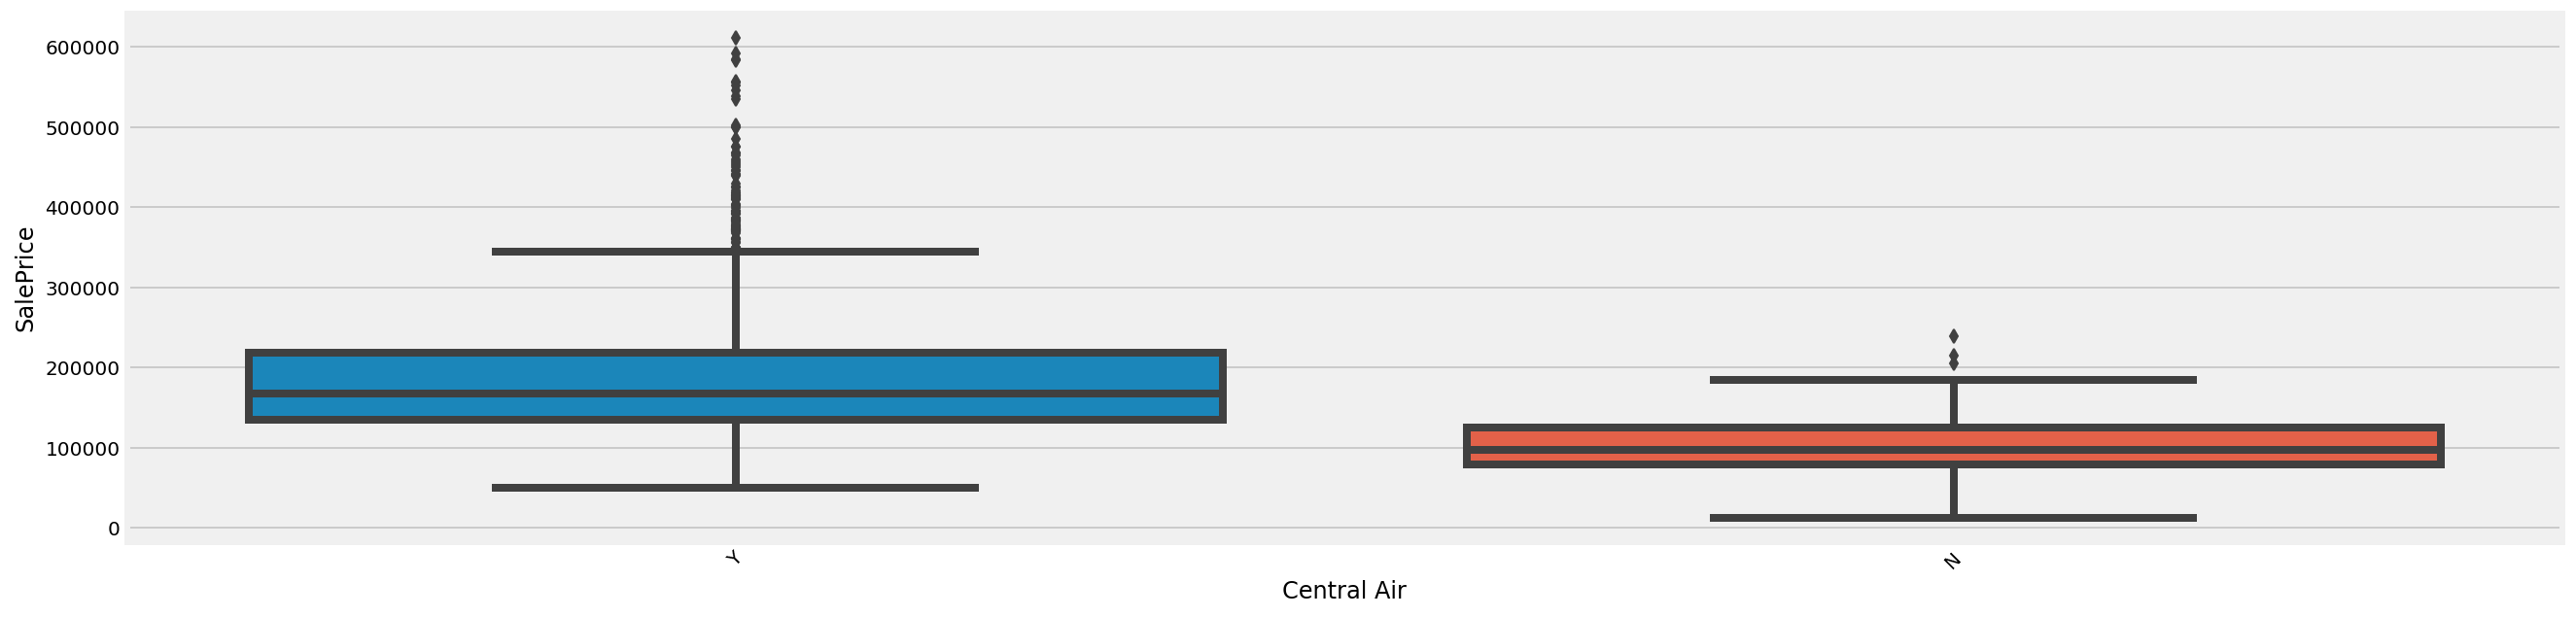

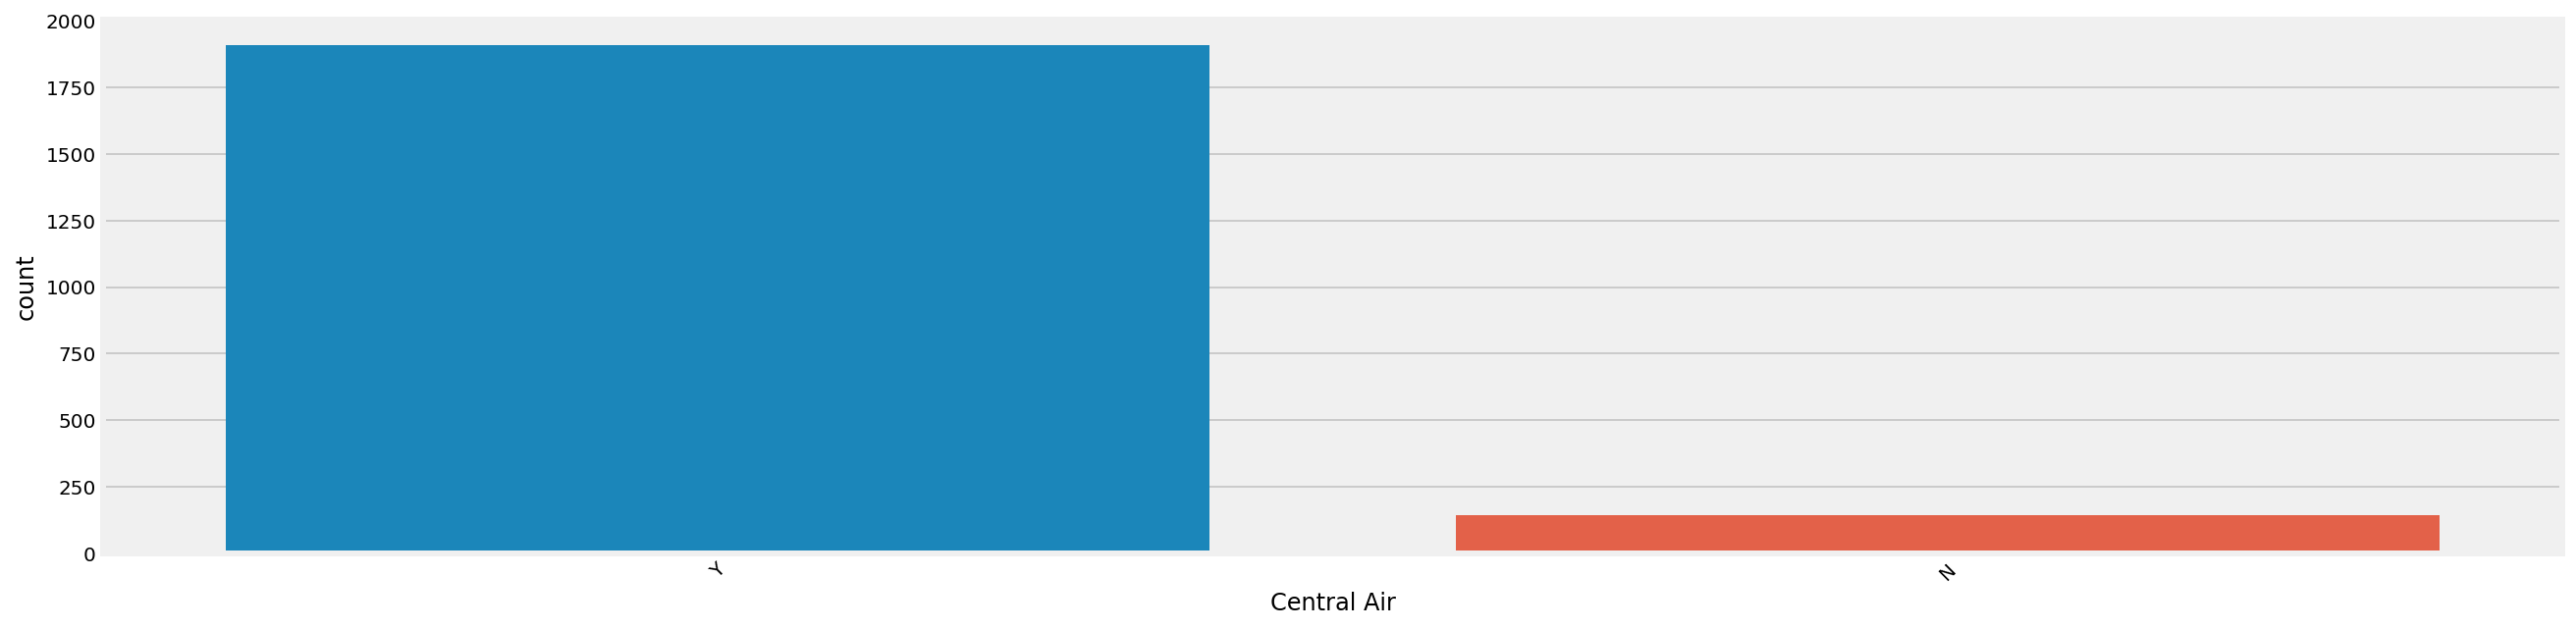

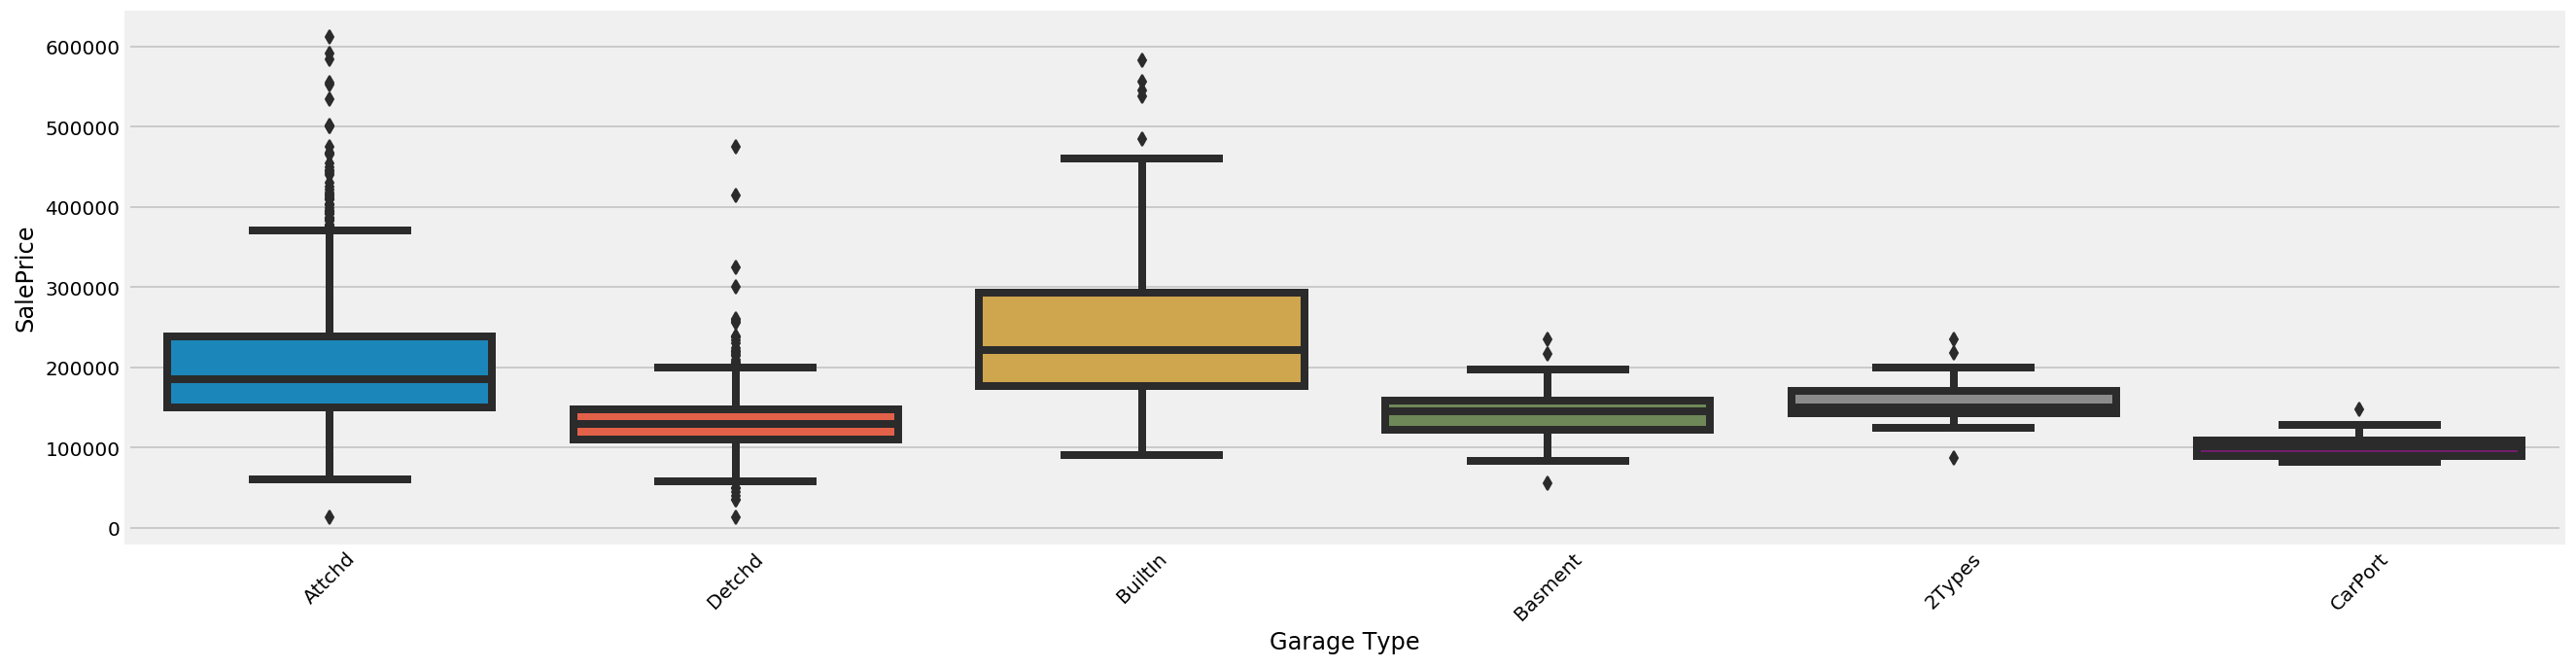

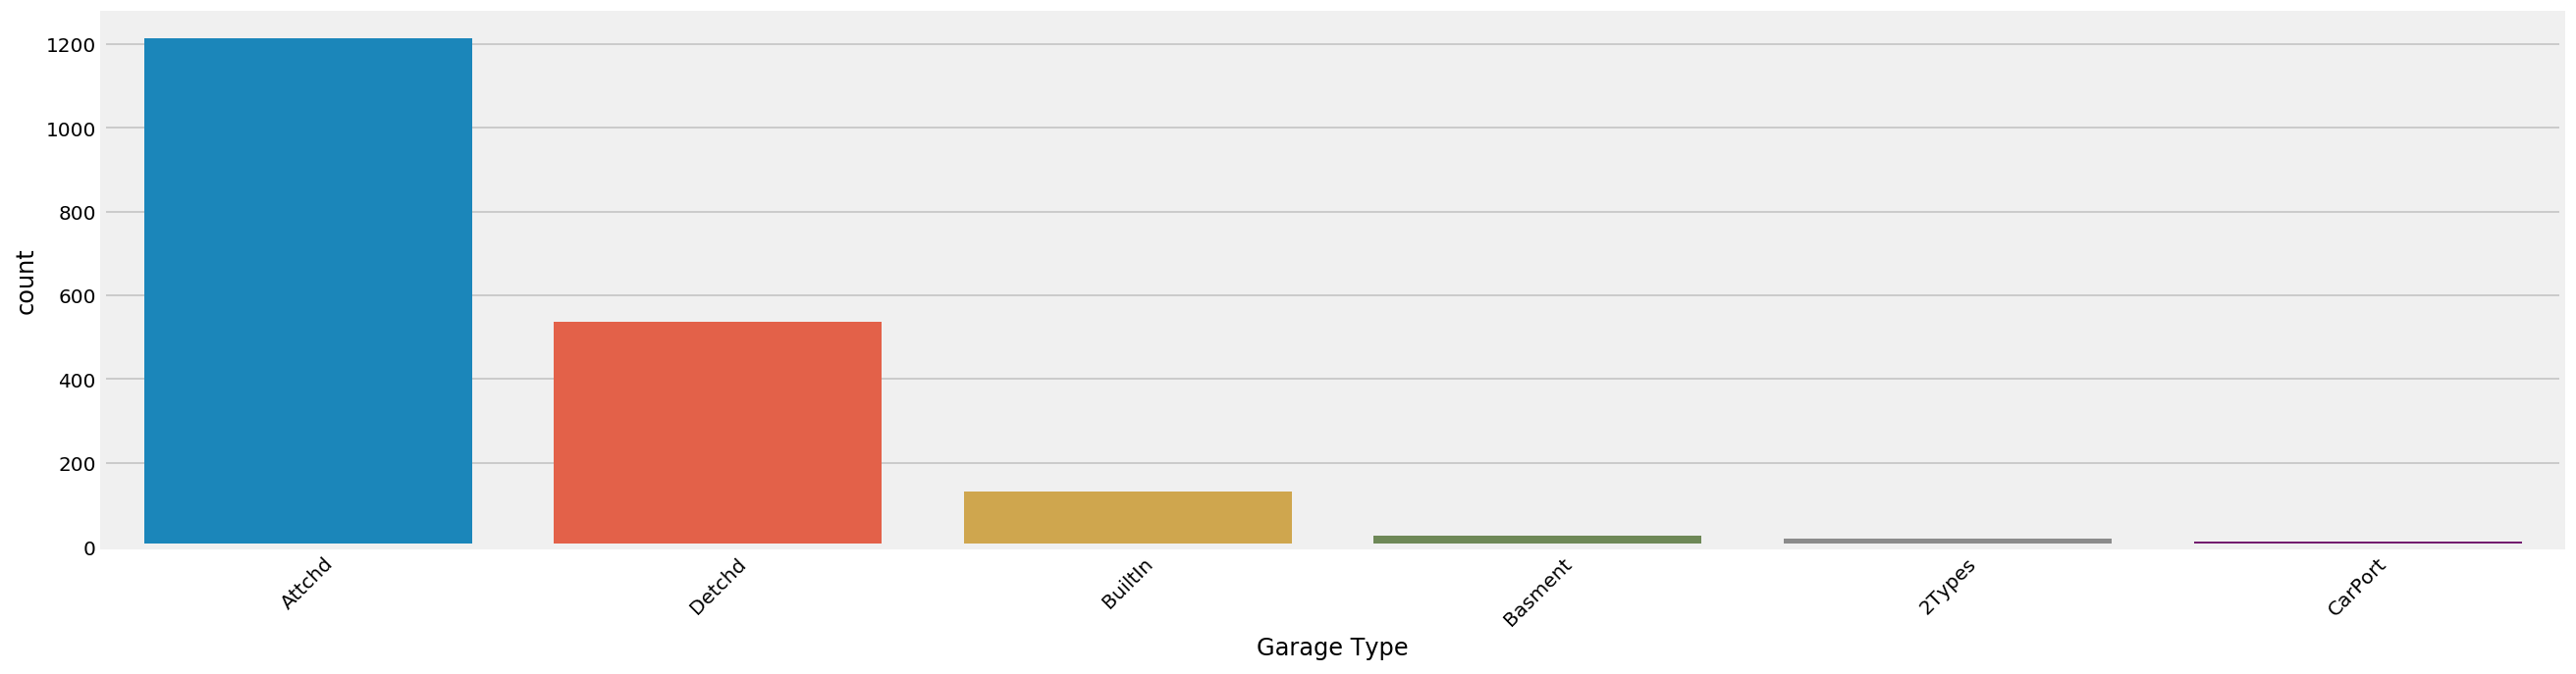

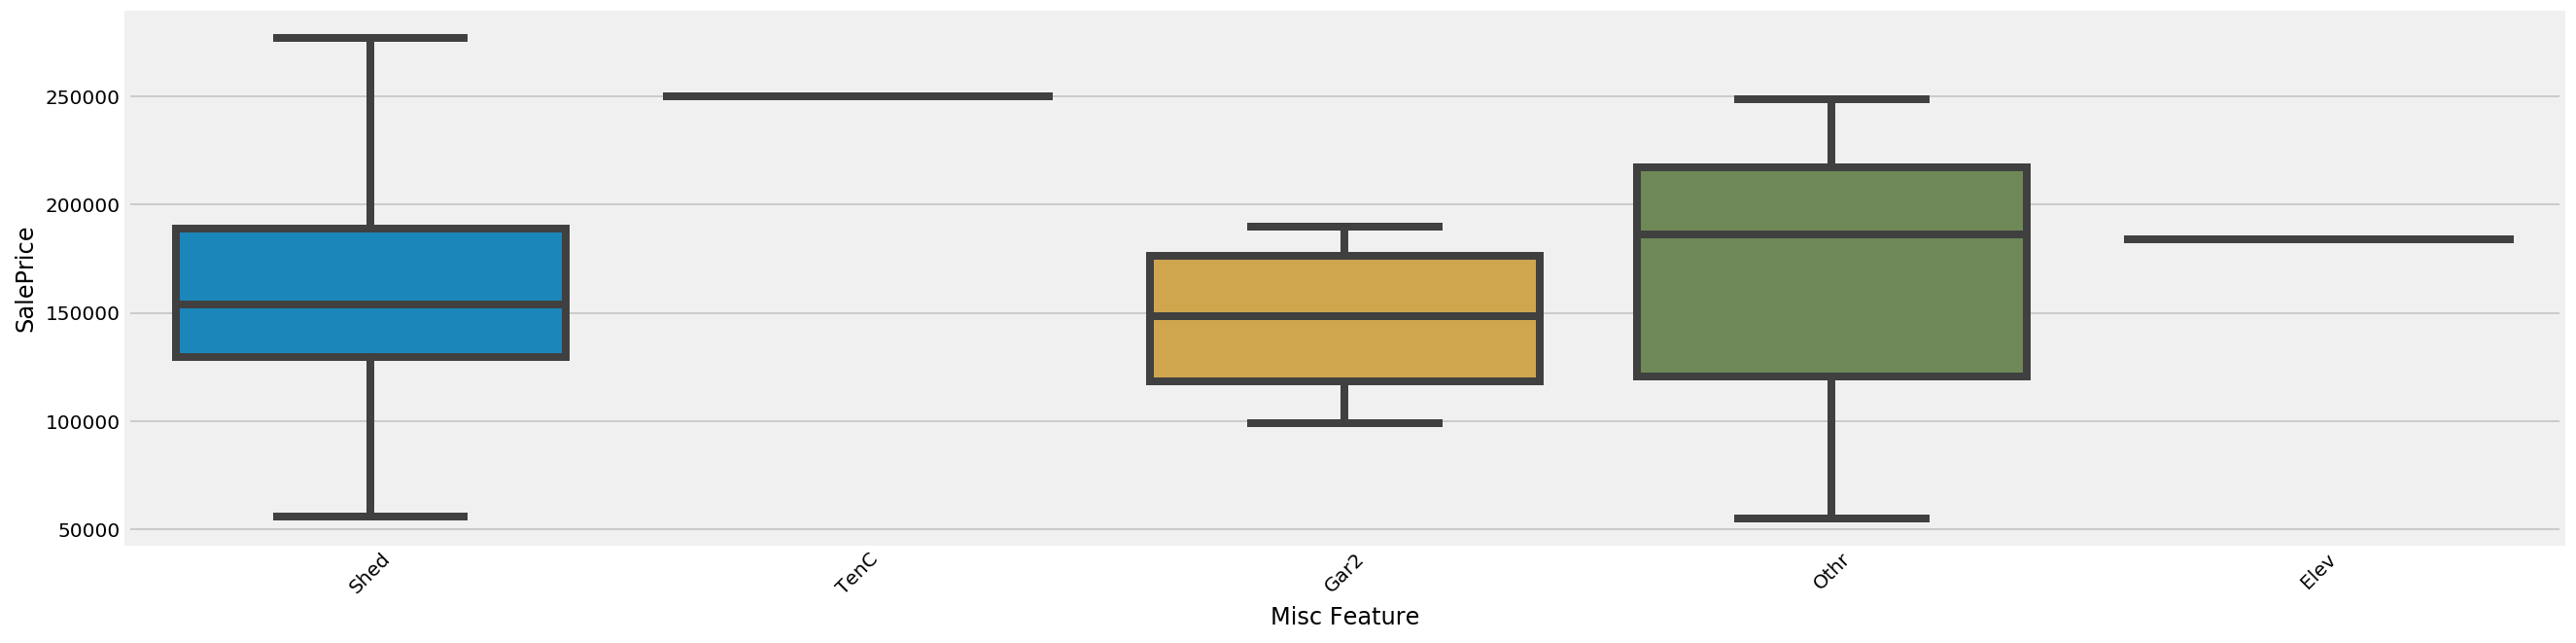

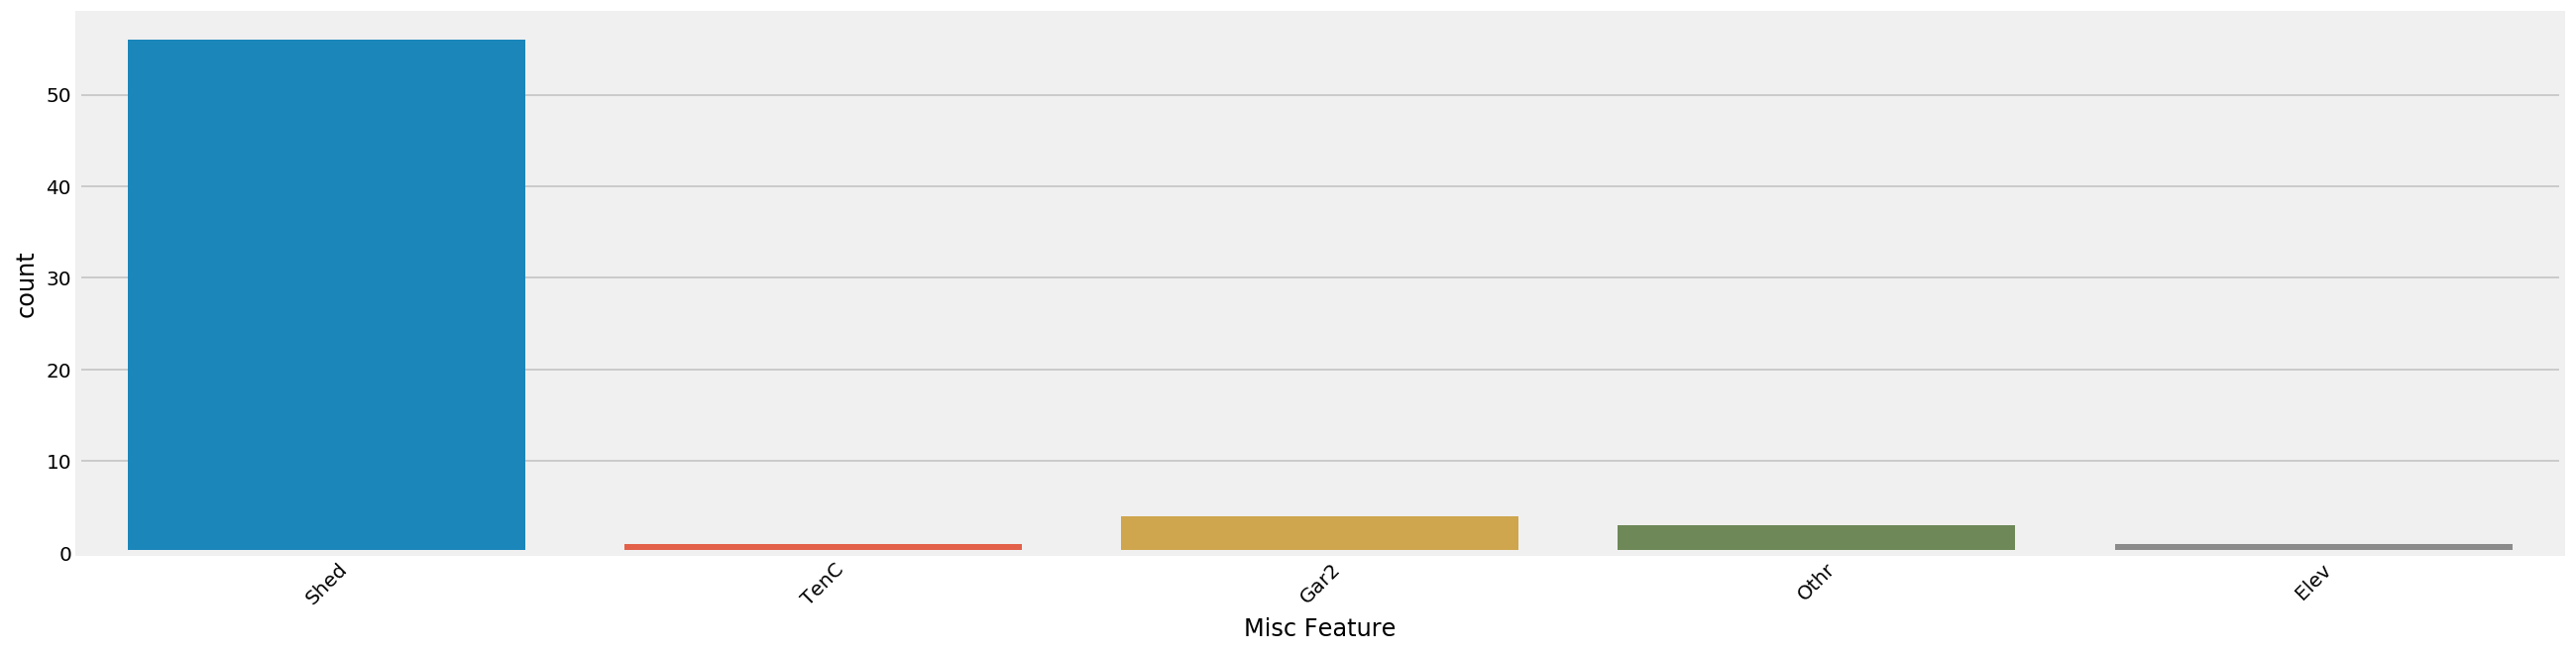

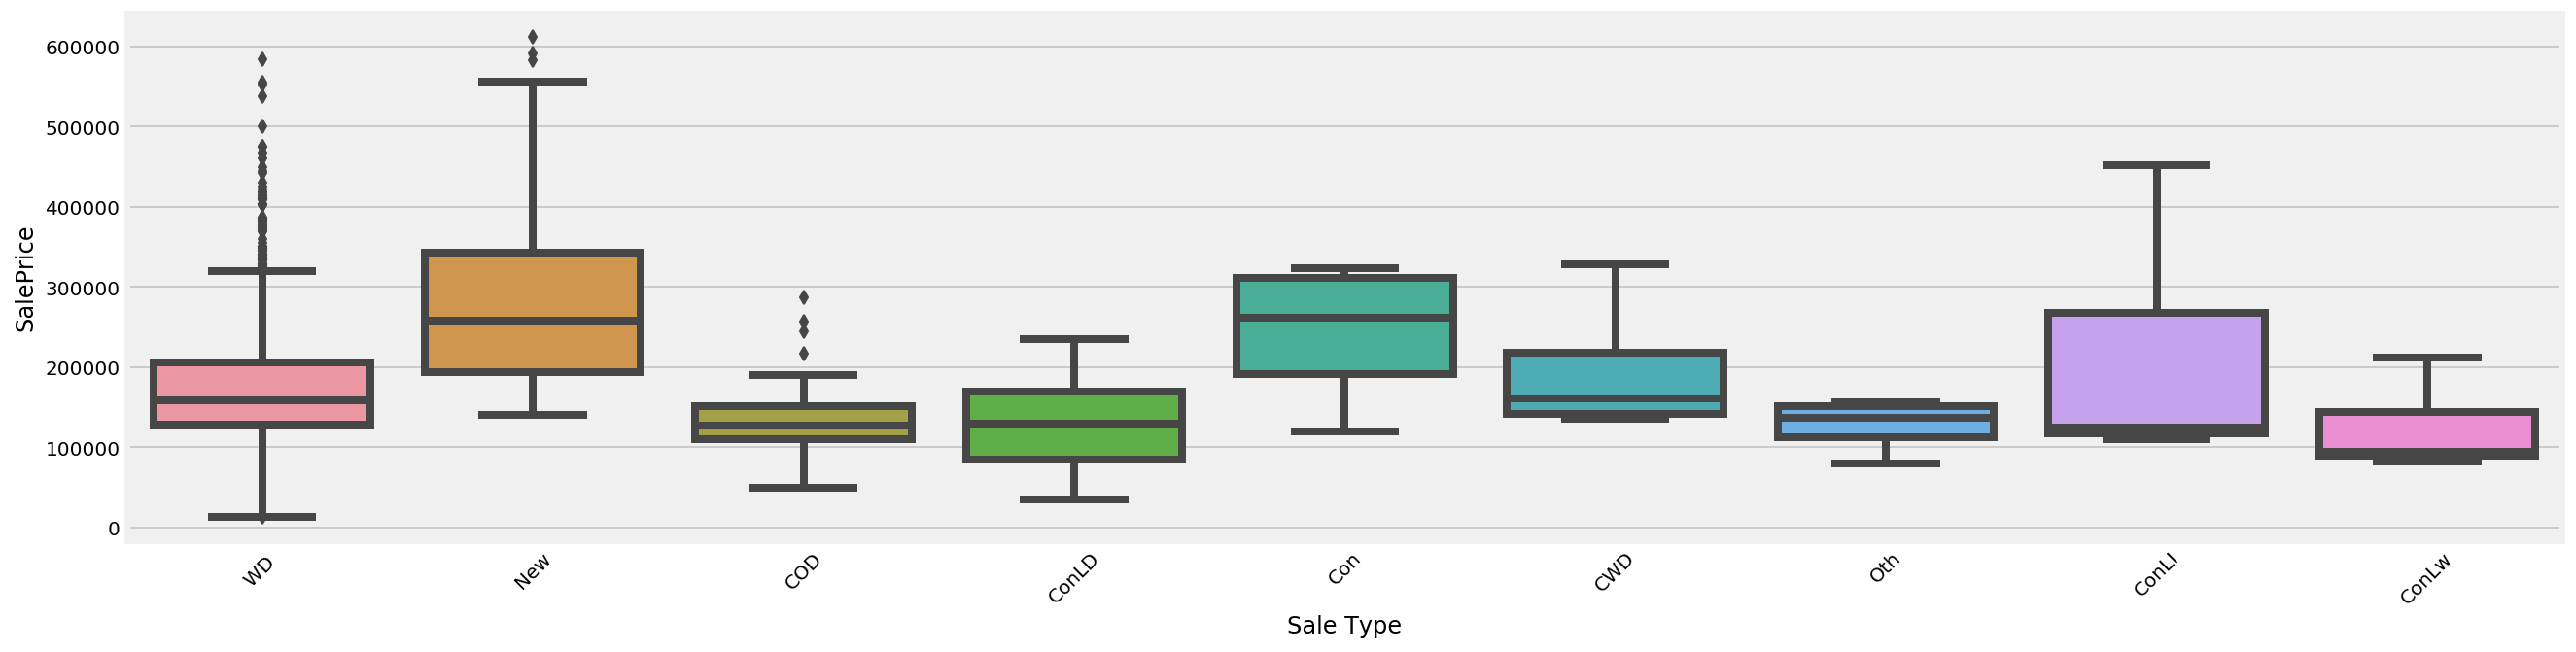

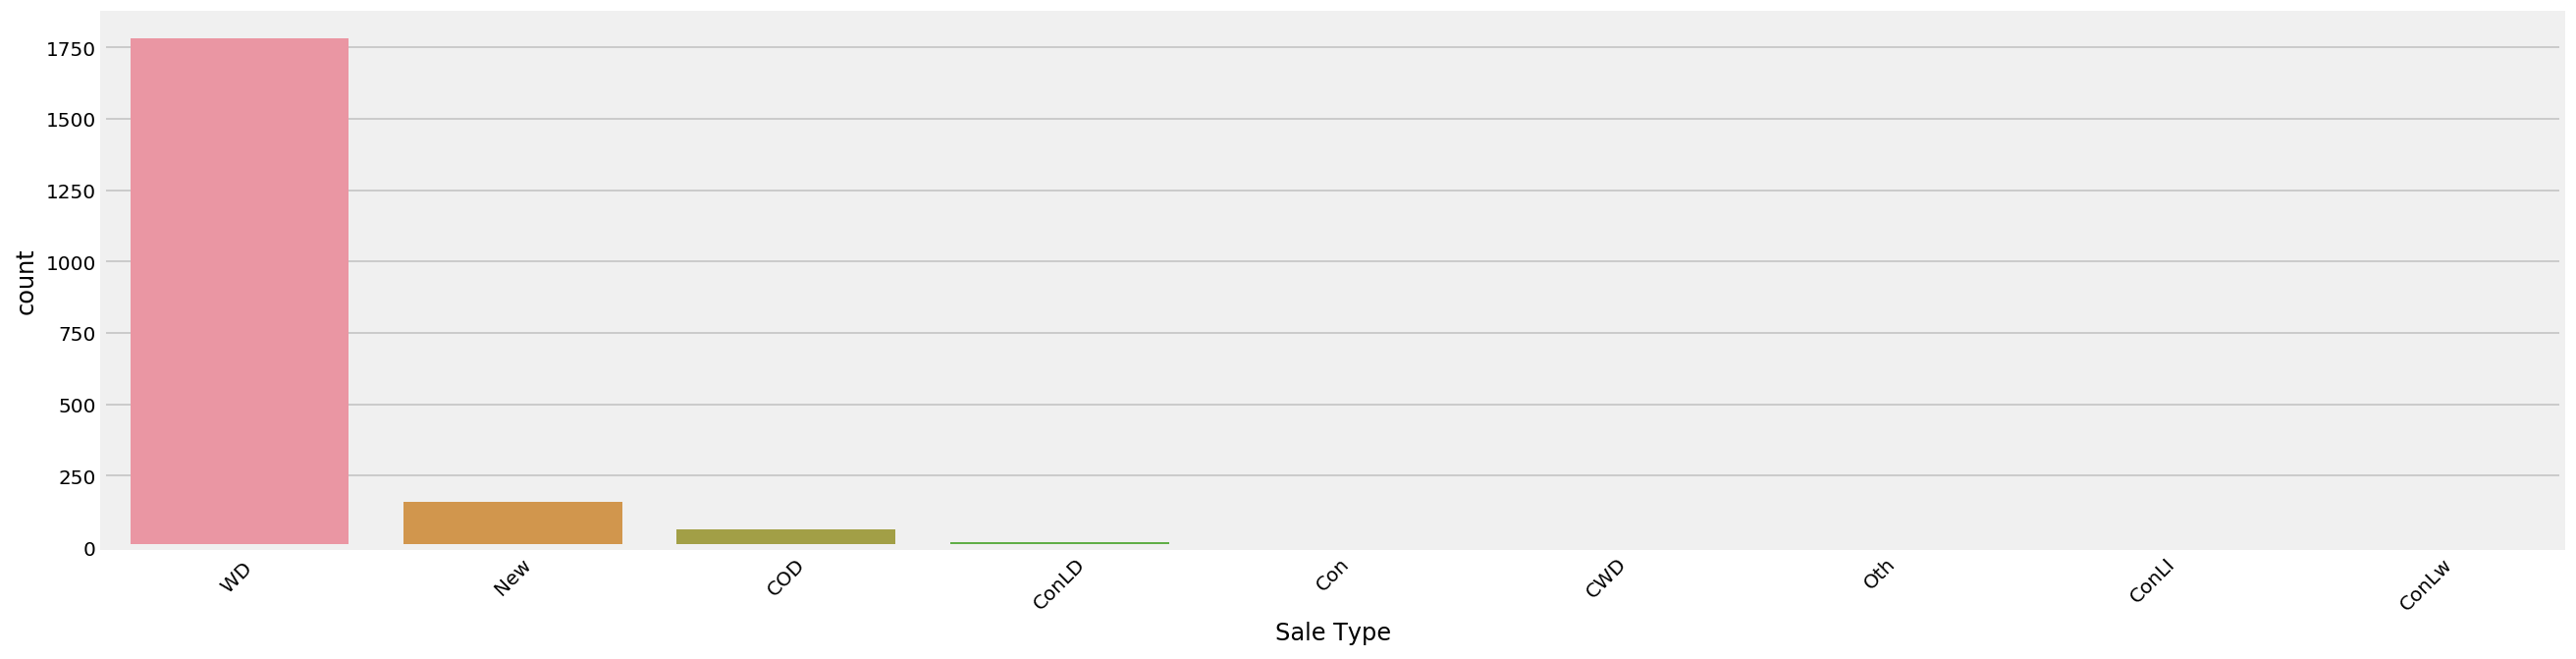

In [23]:
cols=['Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating',
        'Central Air','Garage Type','Misc Feature','Sale Type'] 
for col in cols:
    box_plot(df_train,col)
    count_plot(df_train,col)

From the plots, we can see that for variables Condition 1 and Condition 2, more than 80% of the houses have the Norm quality.
We can consider to combine the other qualities into one new catergory. We can consider for Heating as well.

In [24]:
for col in ['Condition 1','Condition 2']:
    print("% of Norm in column {}: {}%".format(col,round((df_train[col] == 'Norm').sum()/2051,3)))

% of Norm in column Condition 1: 0.862%
% of Norm in column Condition 2: 0.987%


In [25]:
print("% of GasA in column {}: {}%".format('Heating',round((df_train["Heating"] == 'GasA').sum()/2051,3)))


% of GasA in column Heating: 0.984%


The price of the houses depends on the neighbourhood.

## Plotting for Ordinal variables.

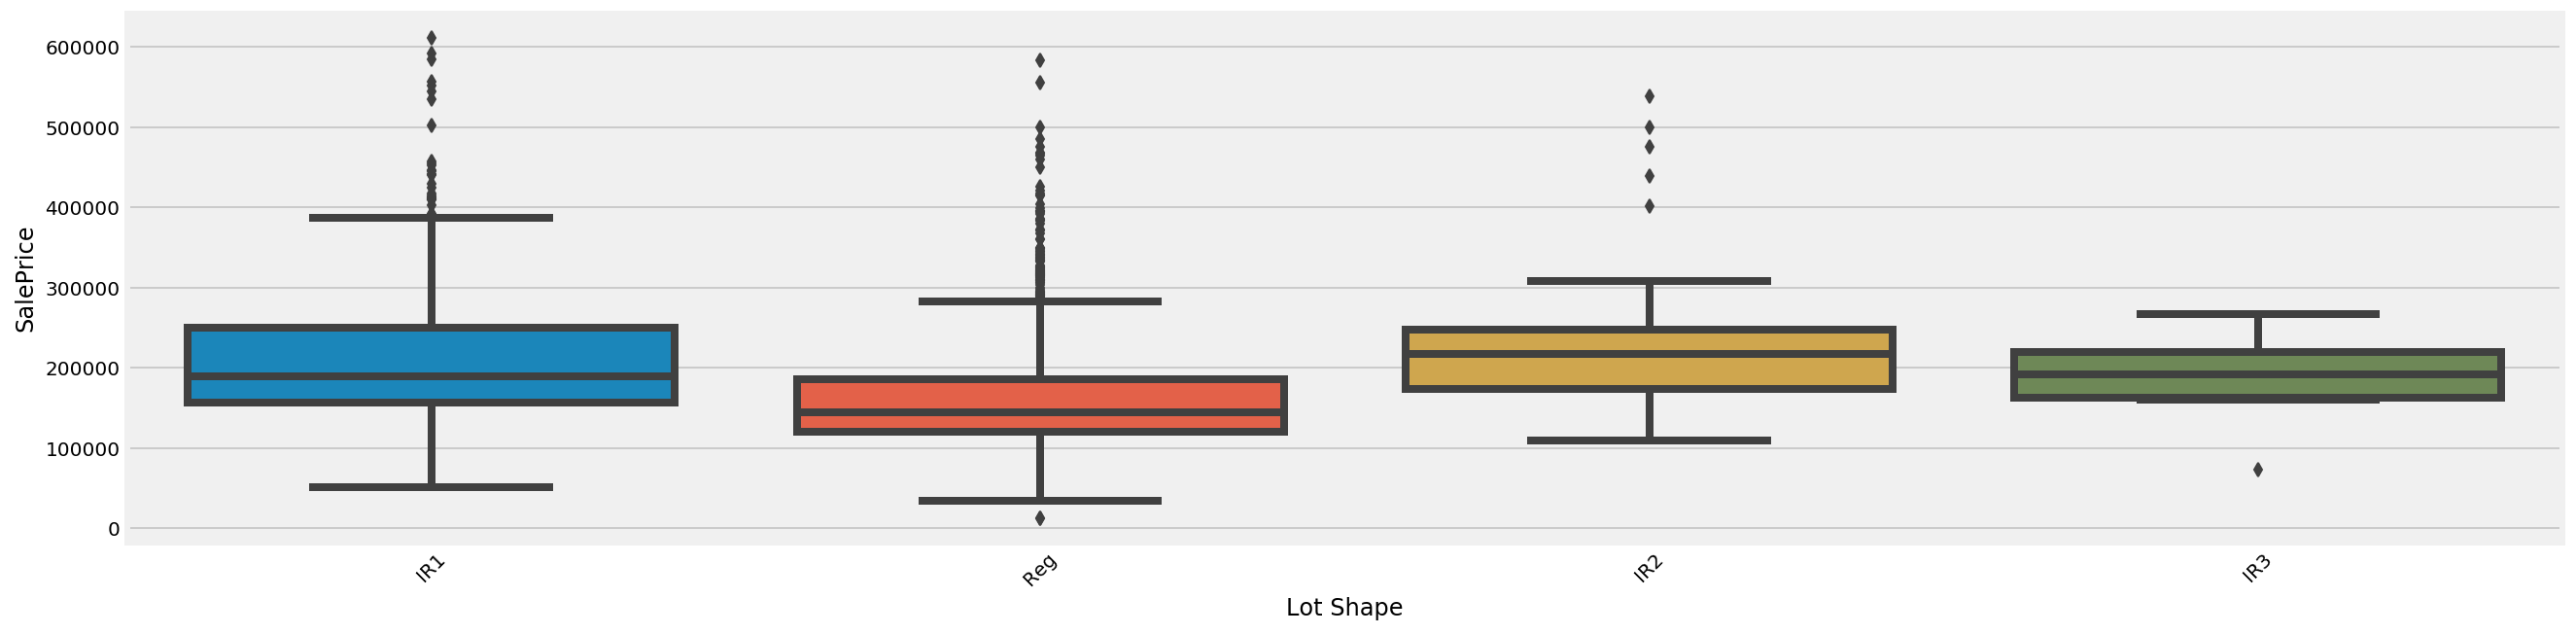

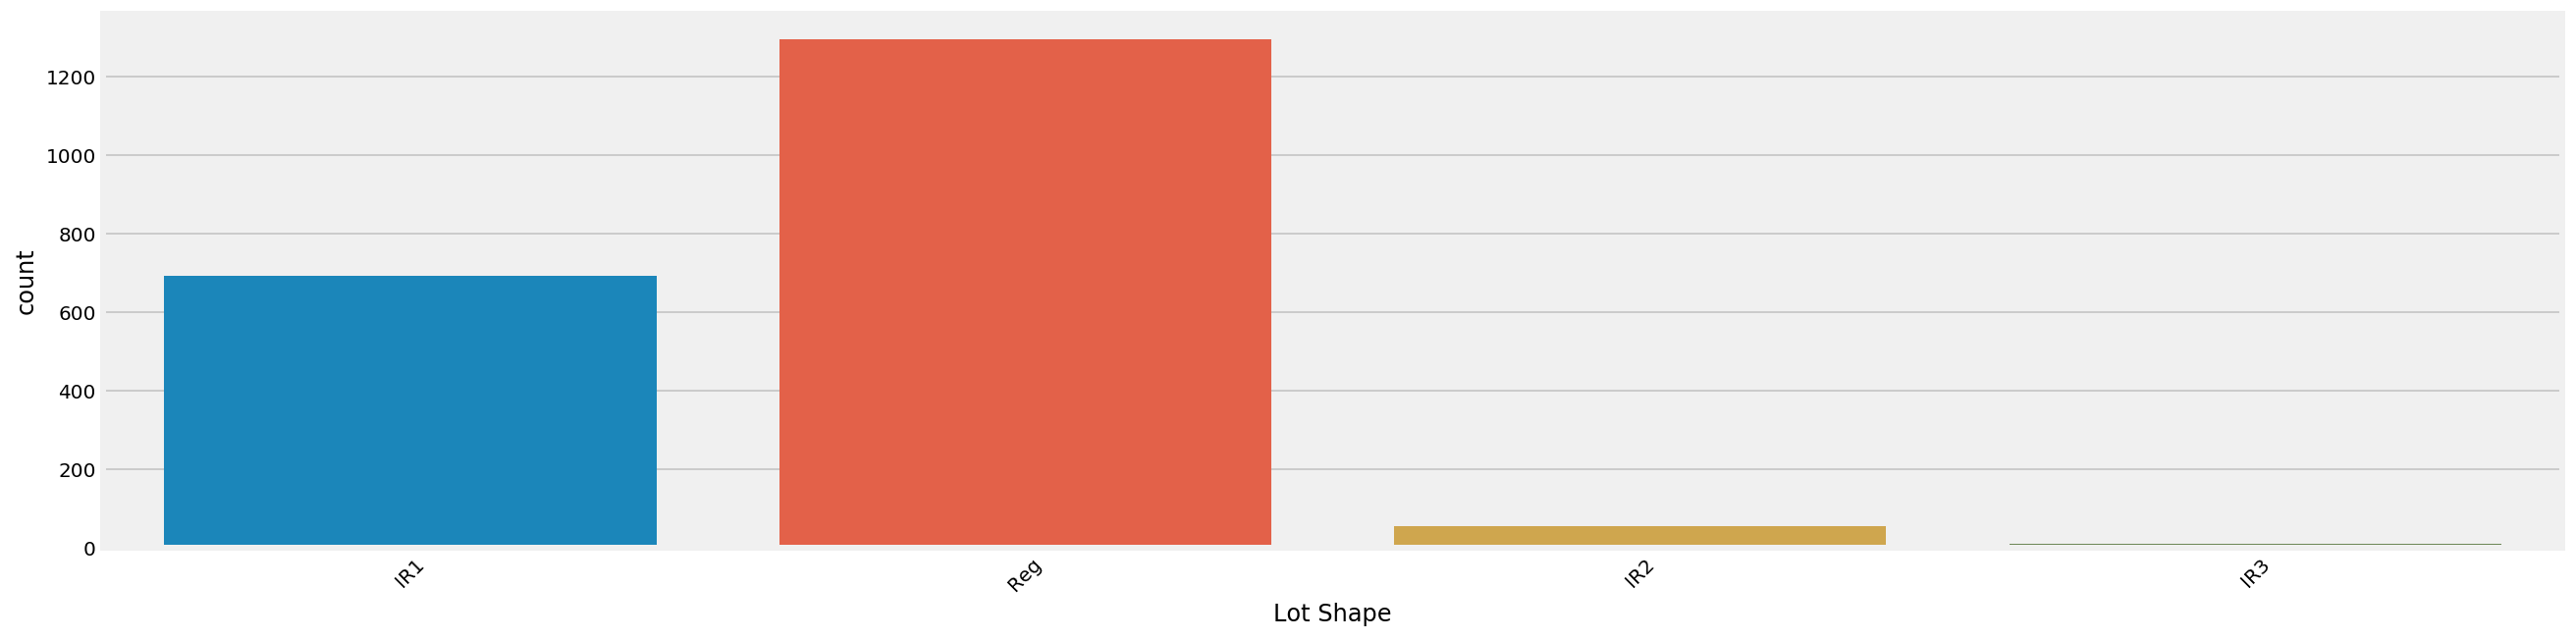

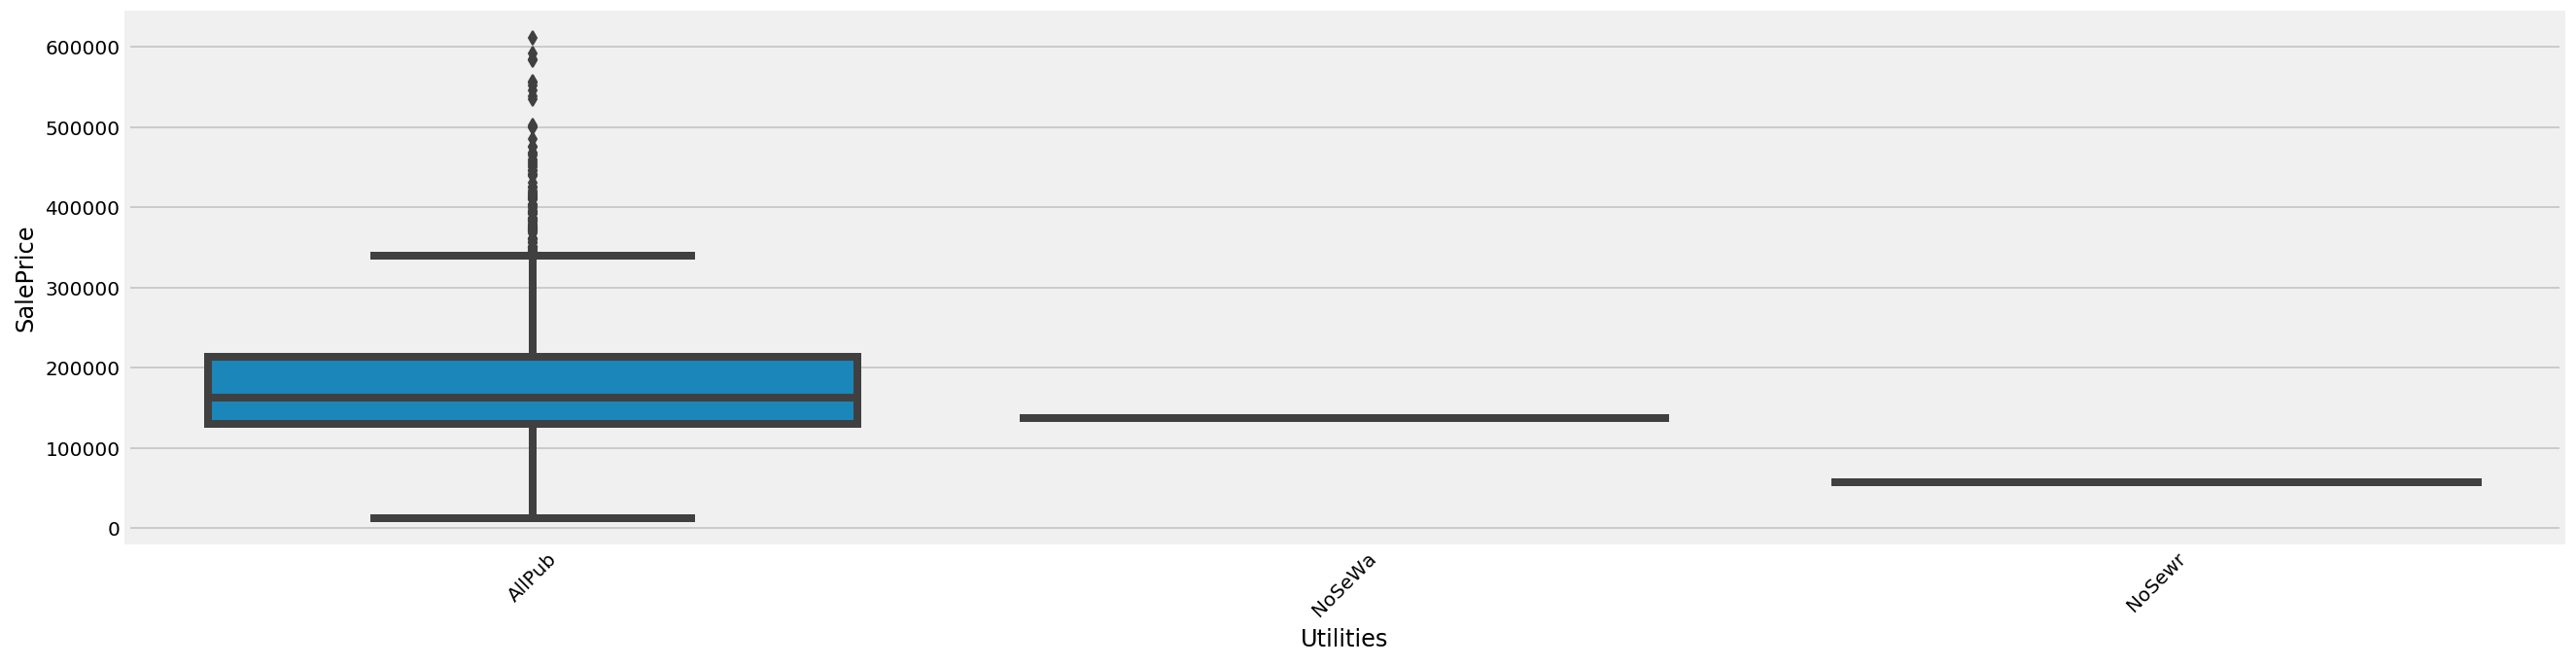

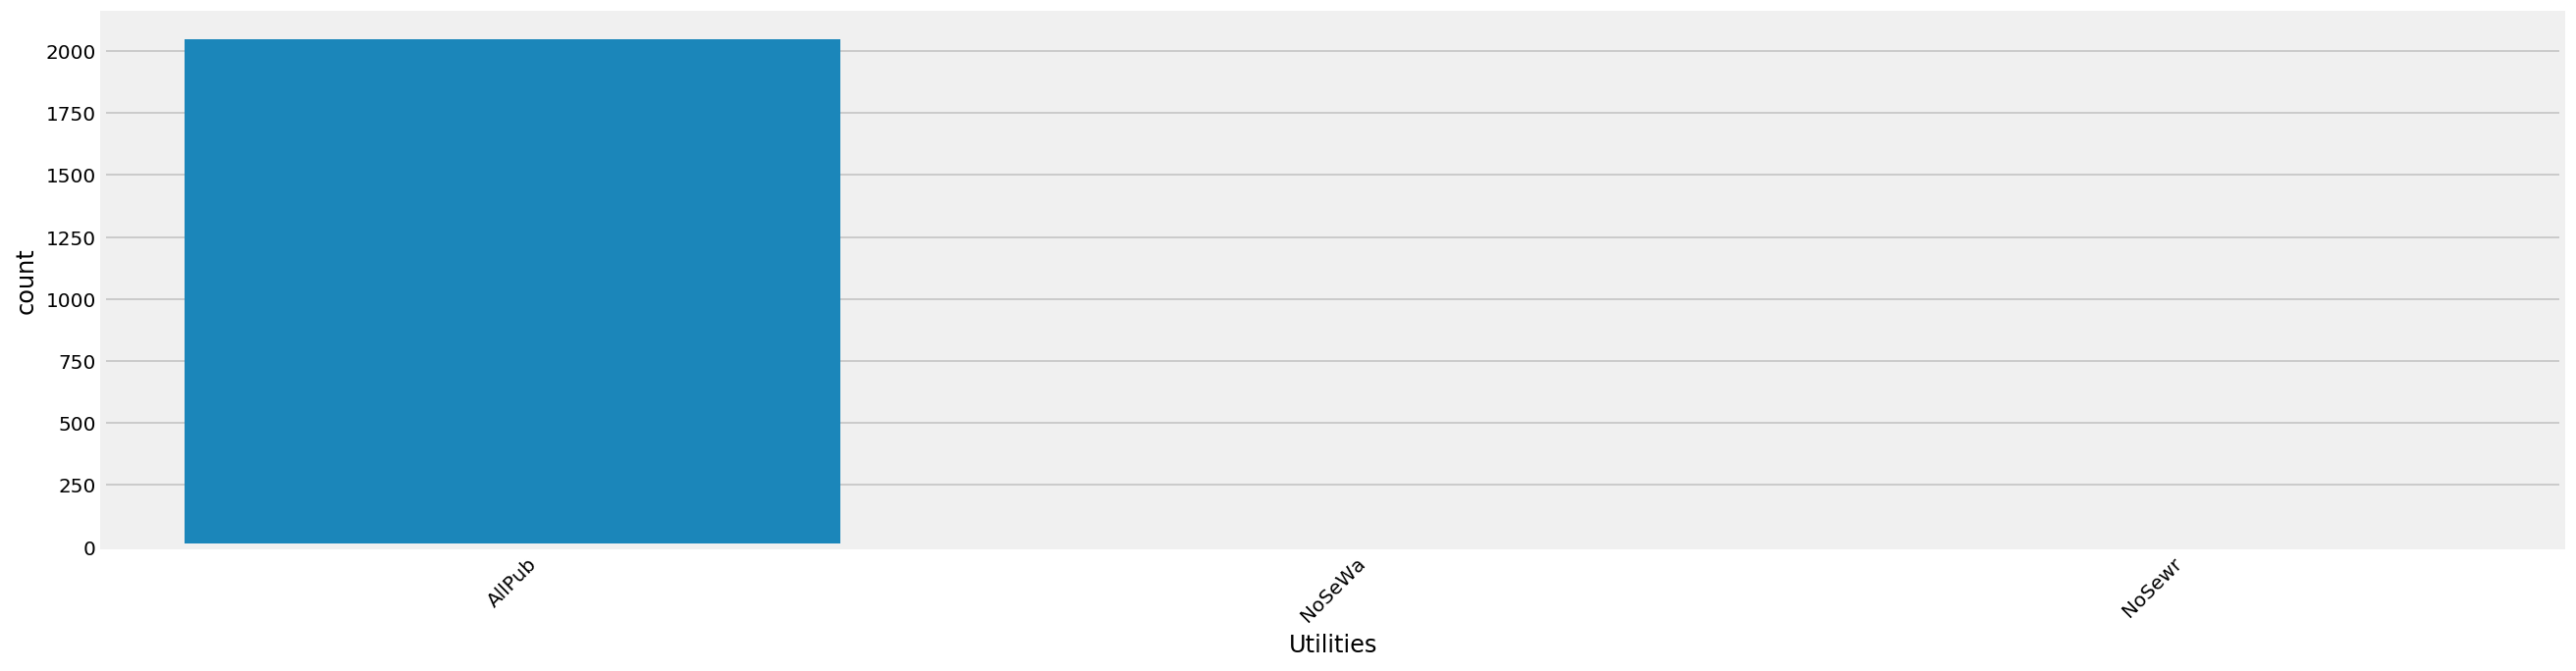

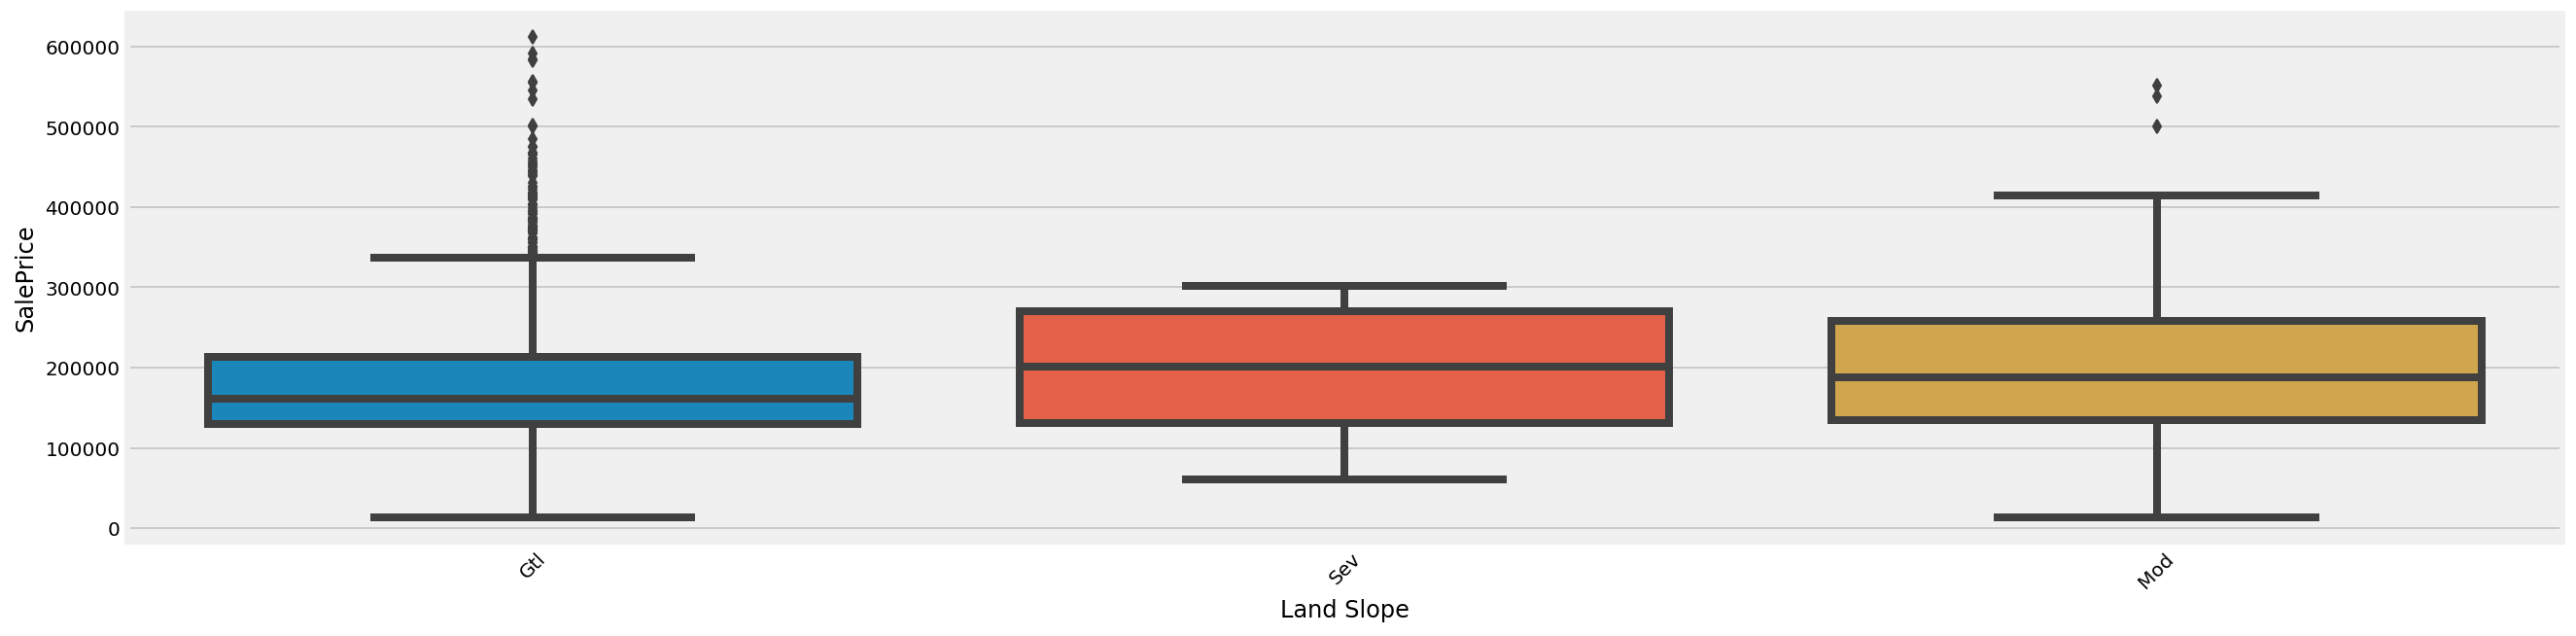

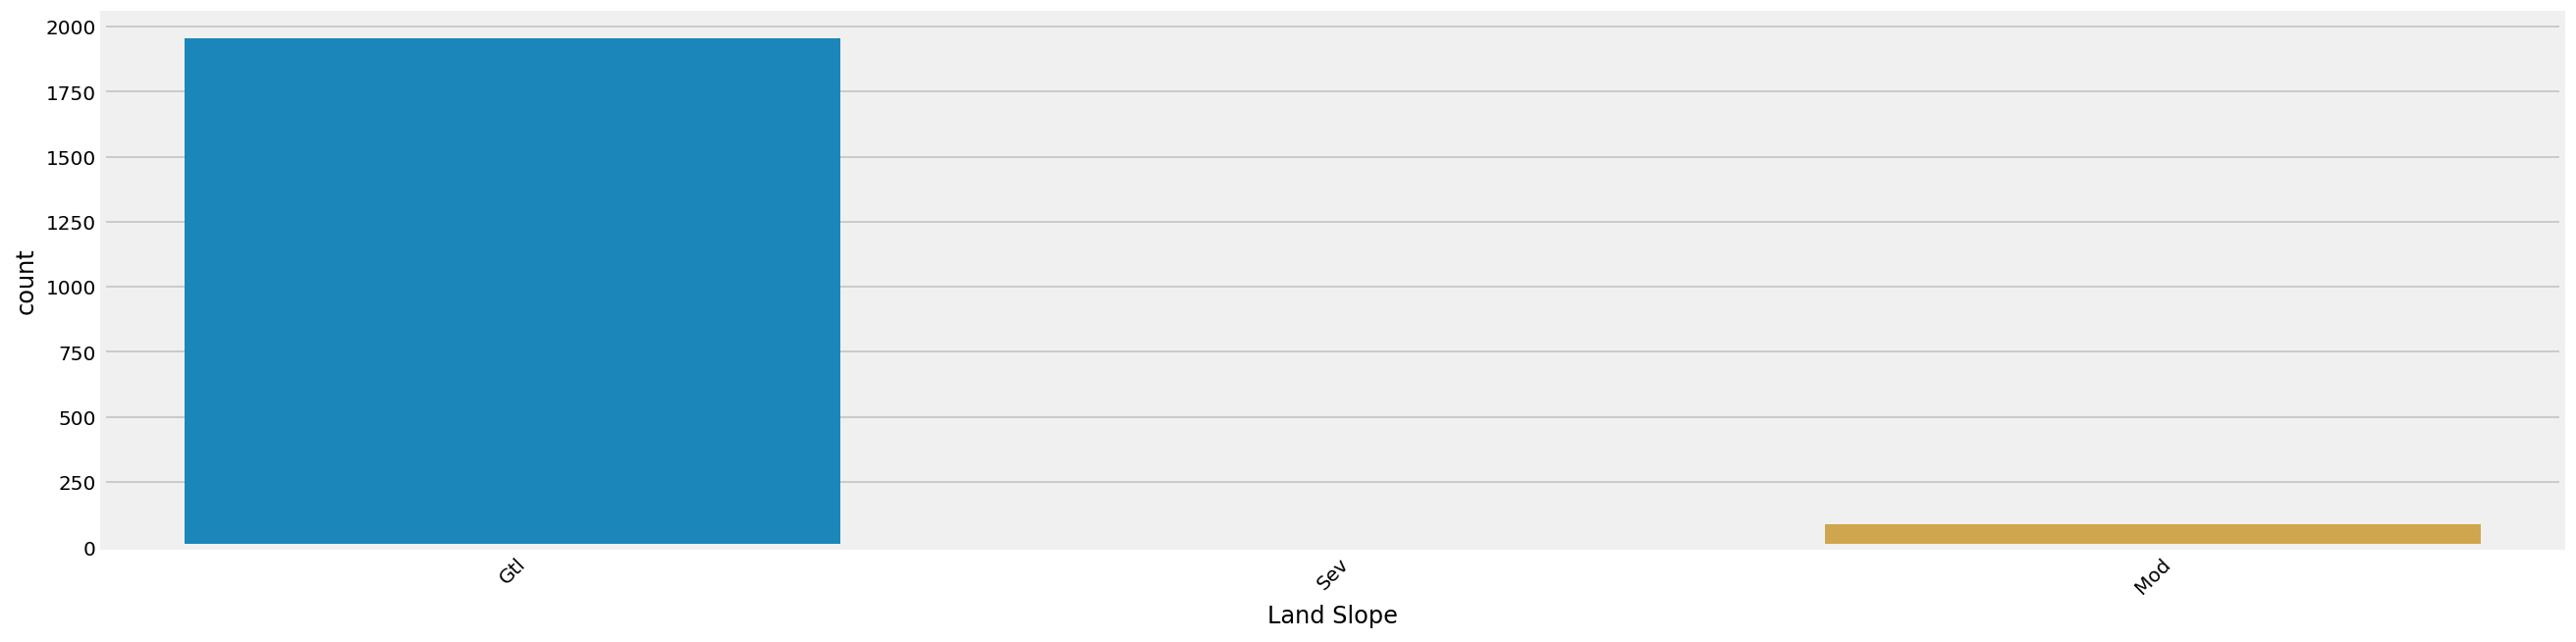

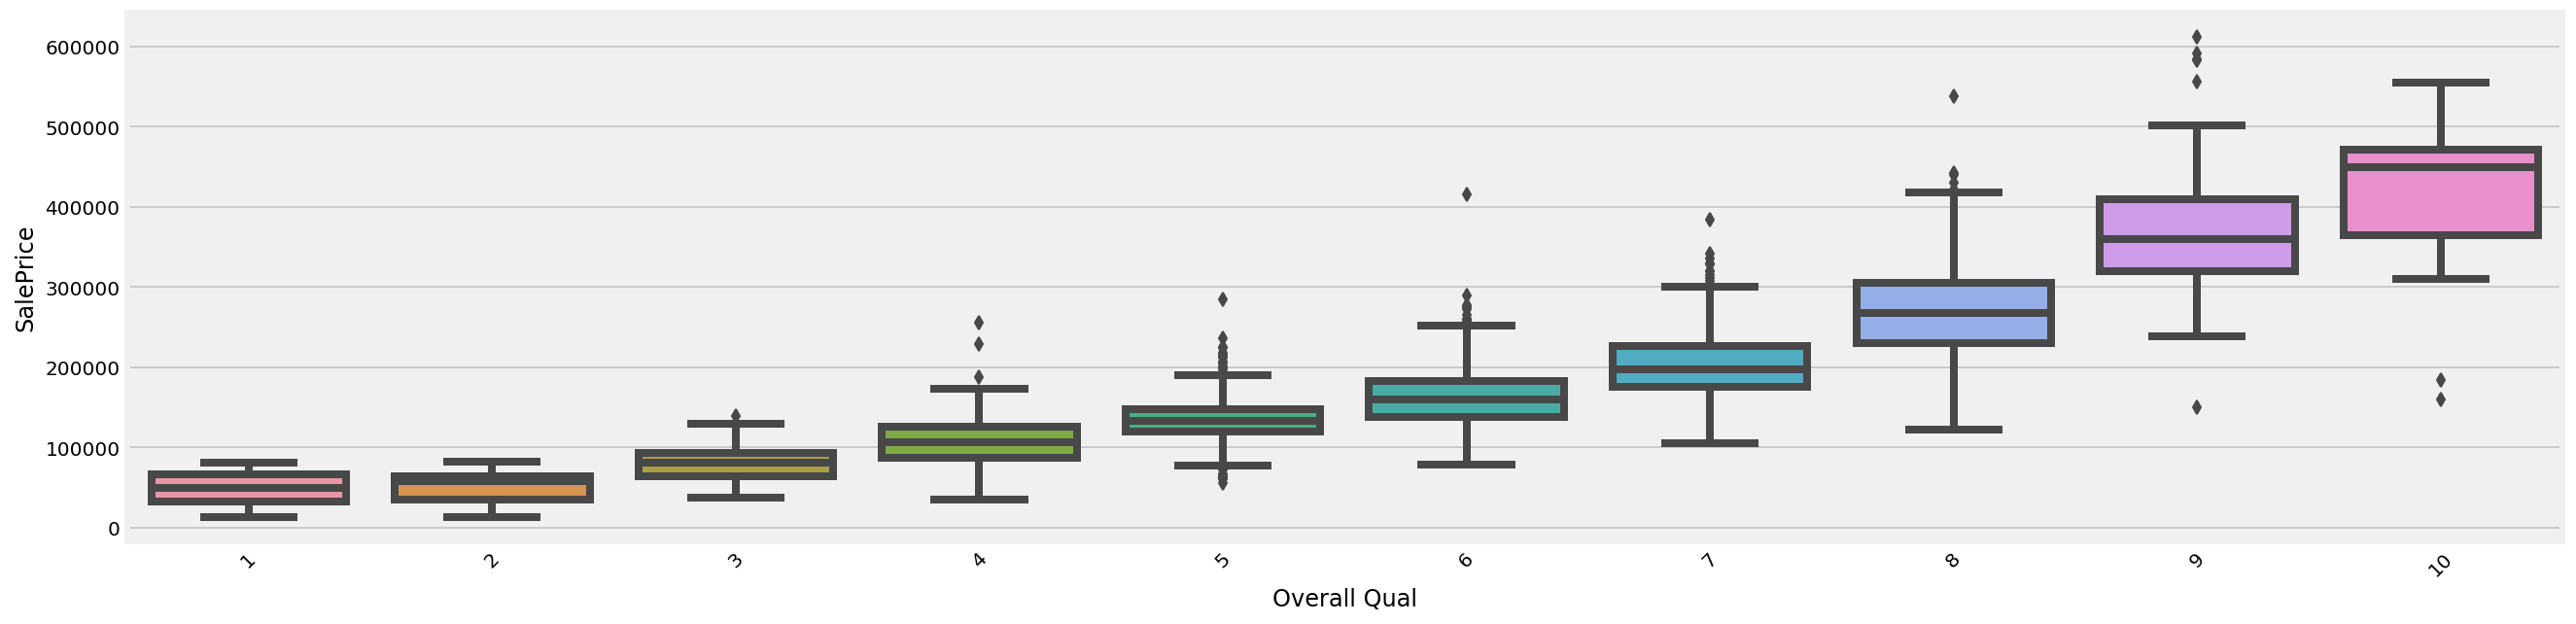

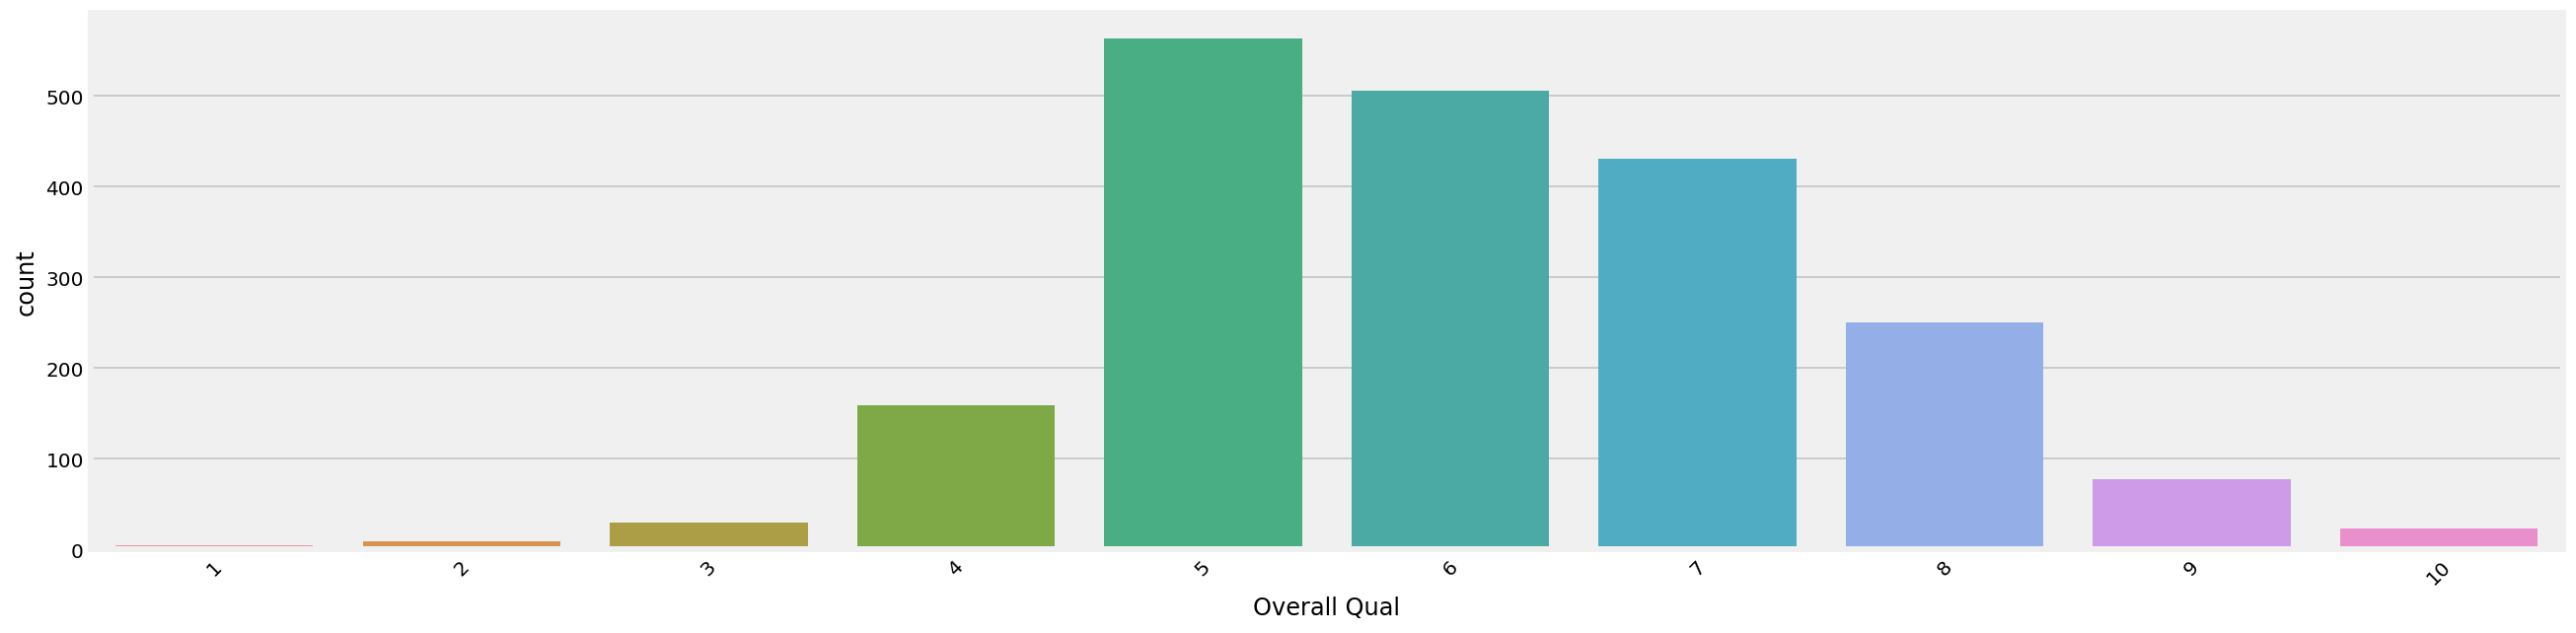

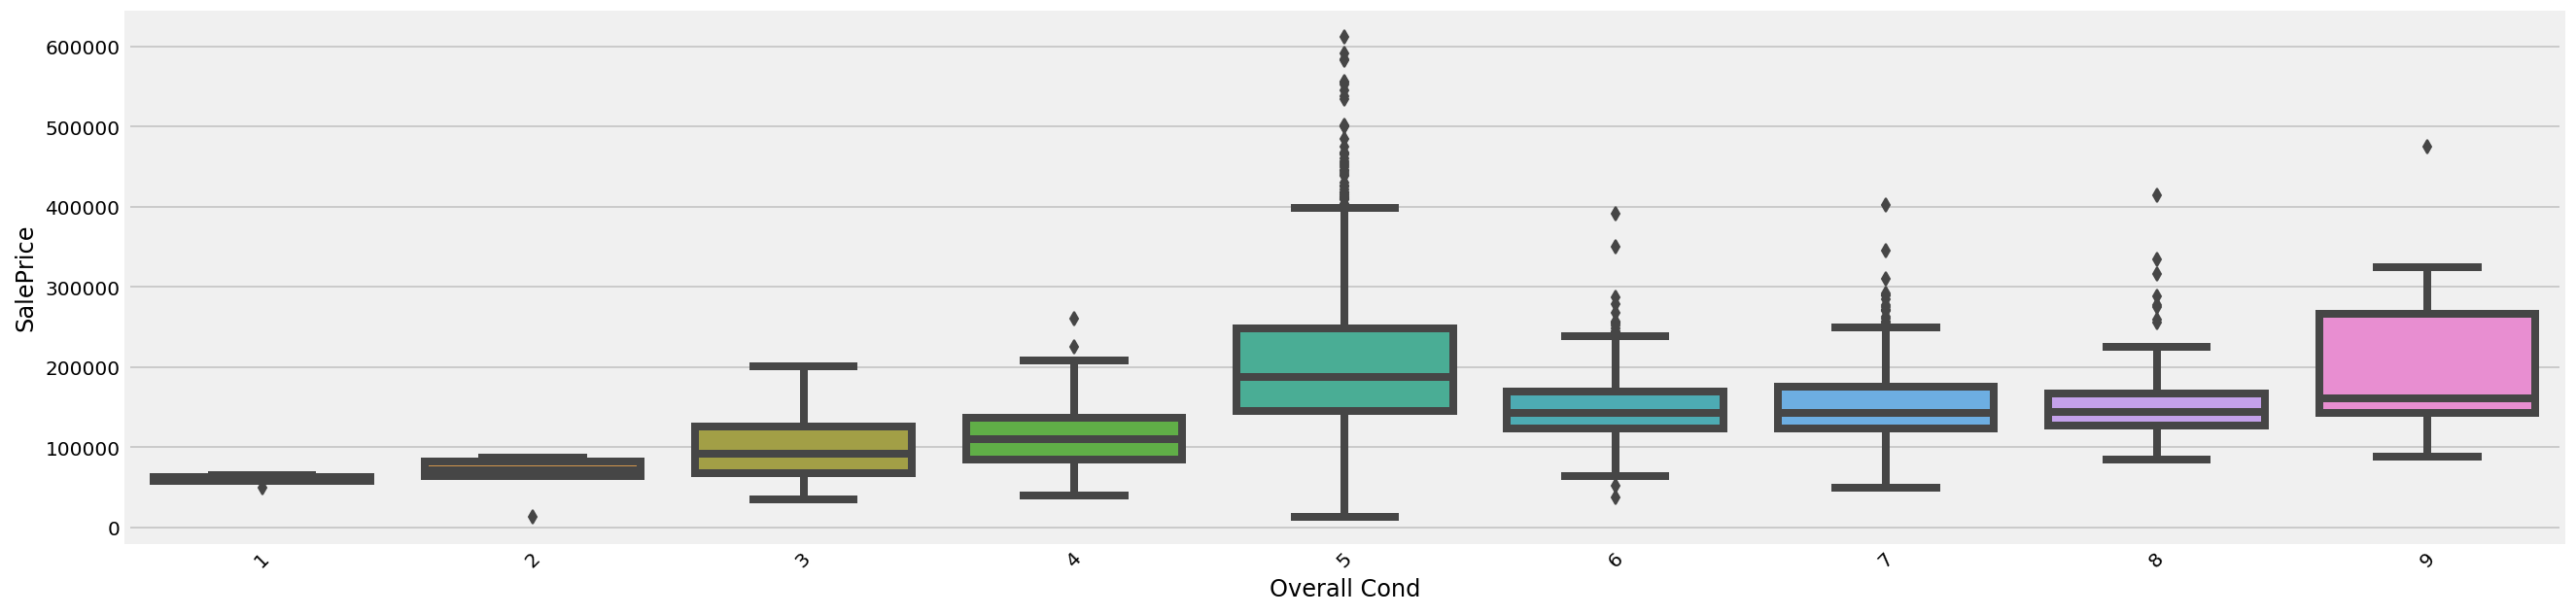

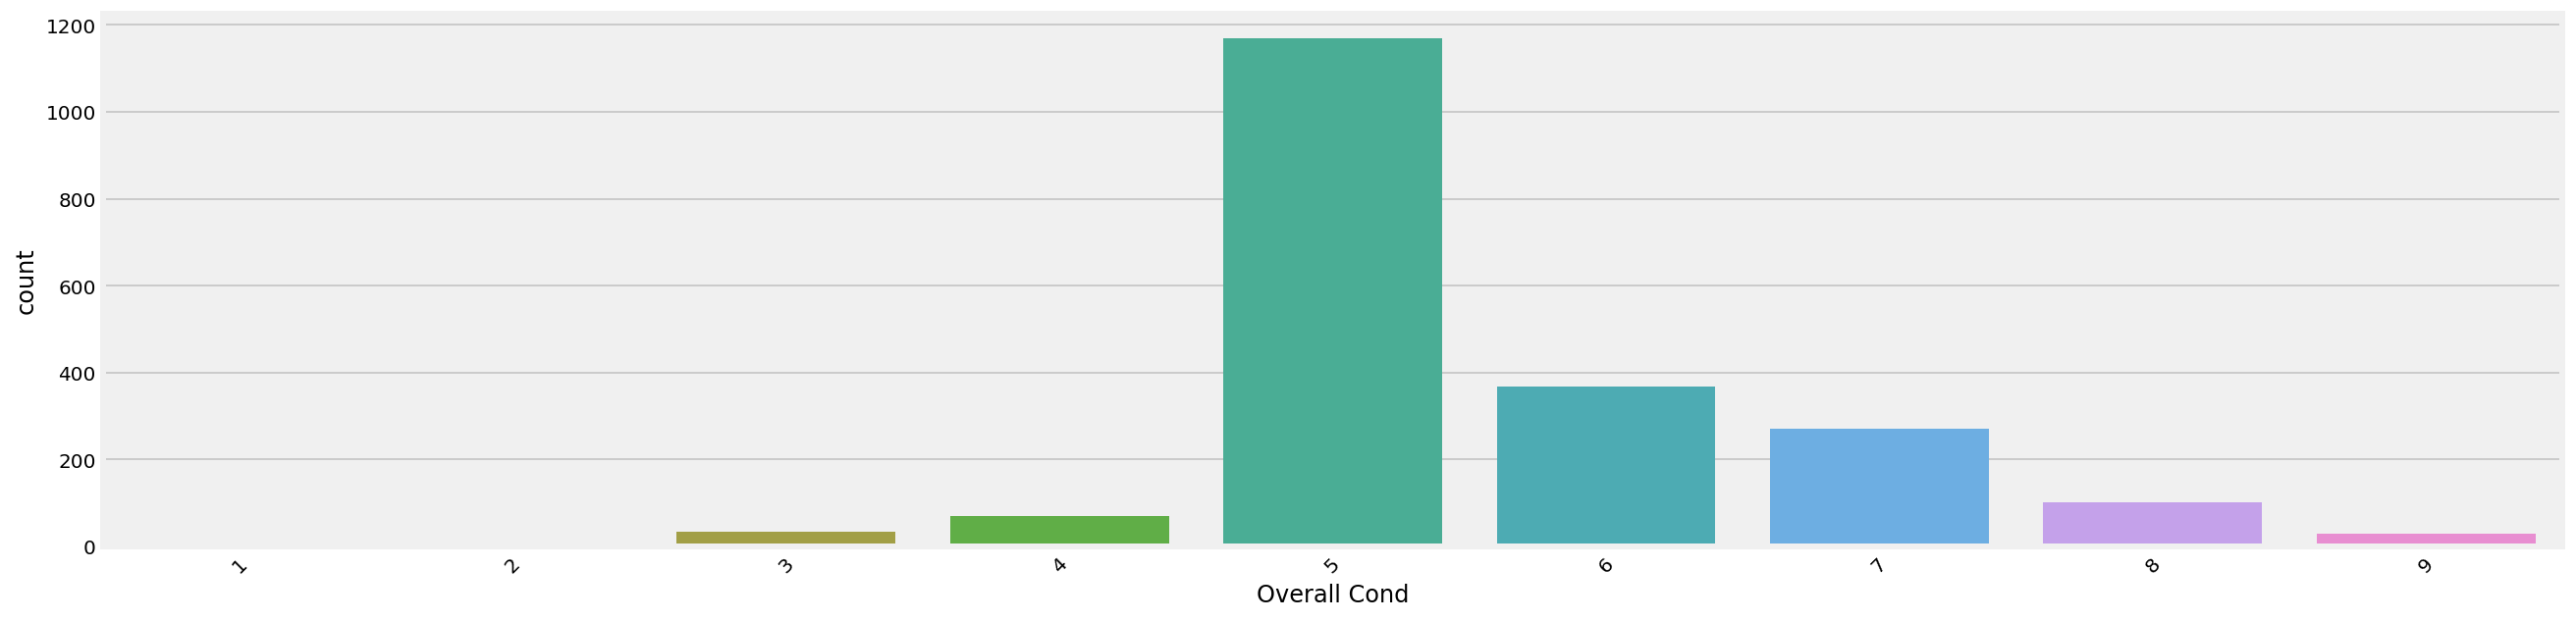

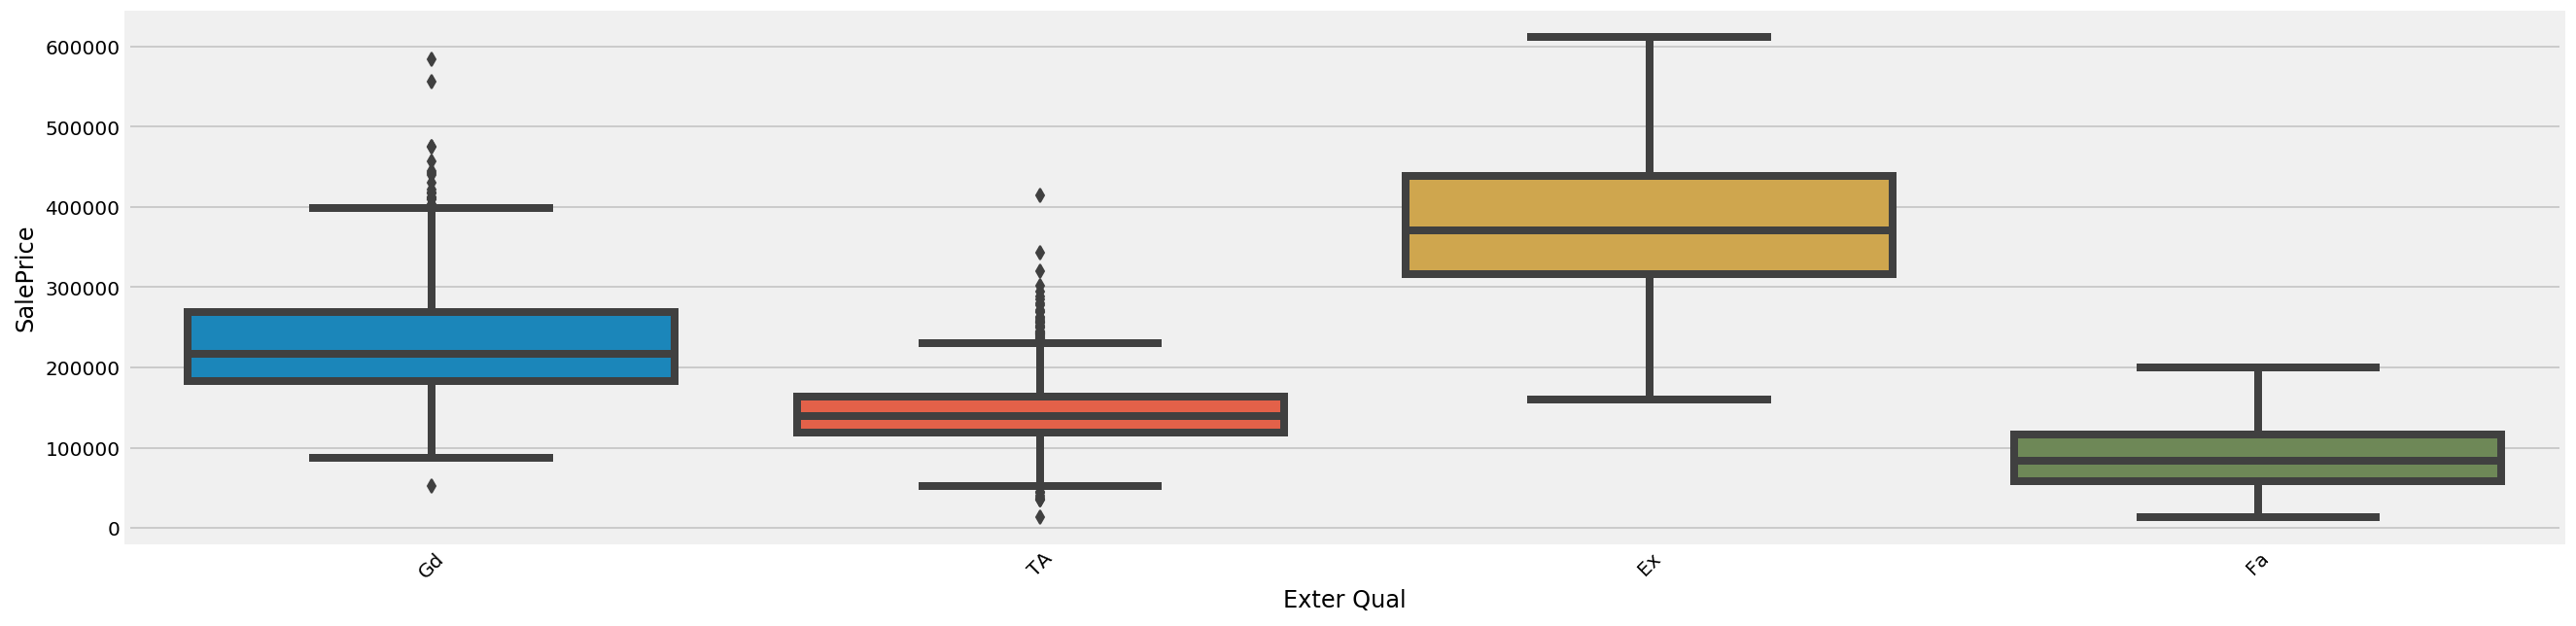

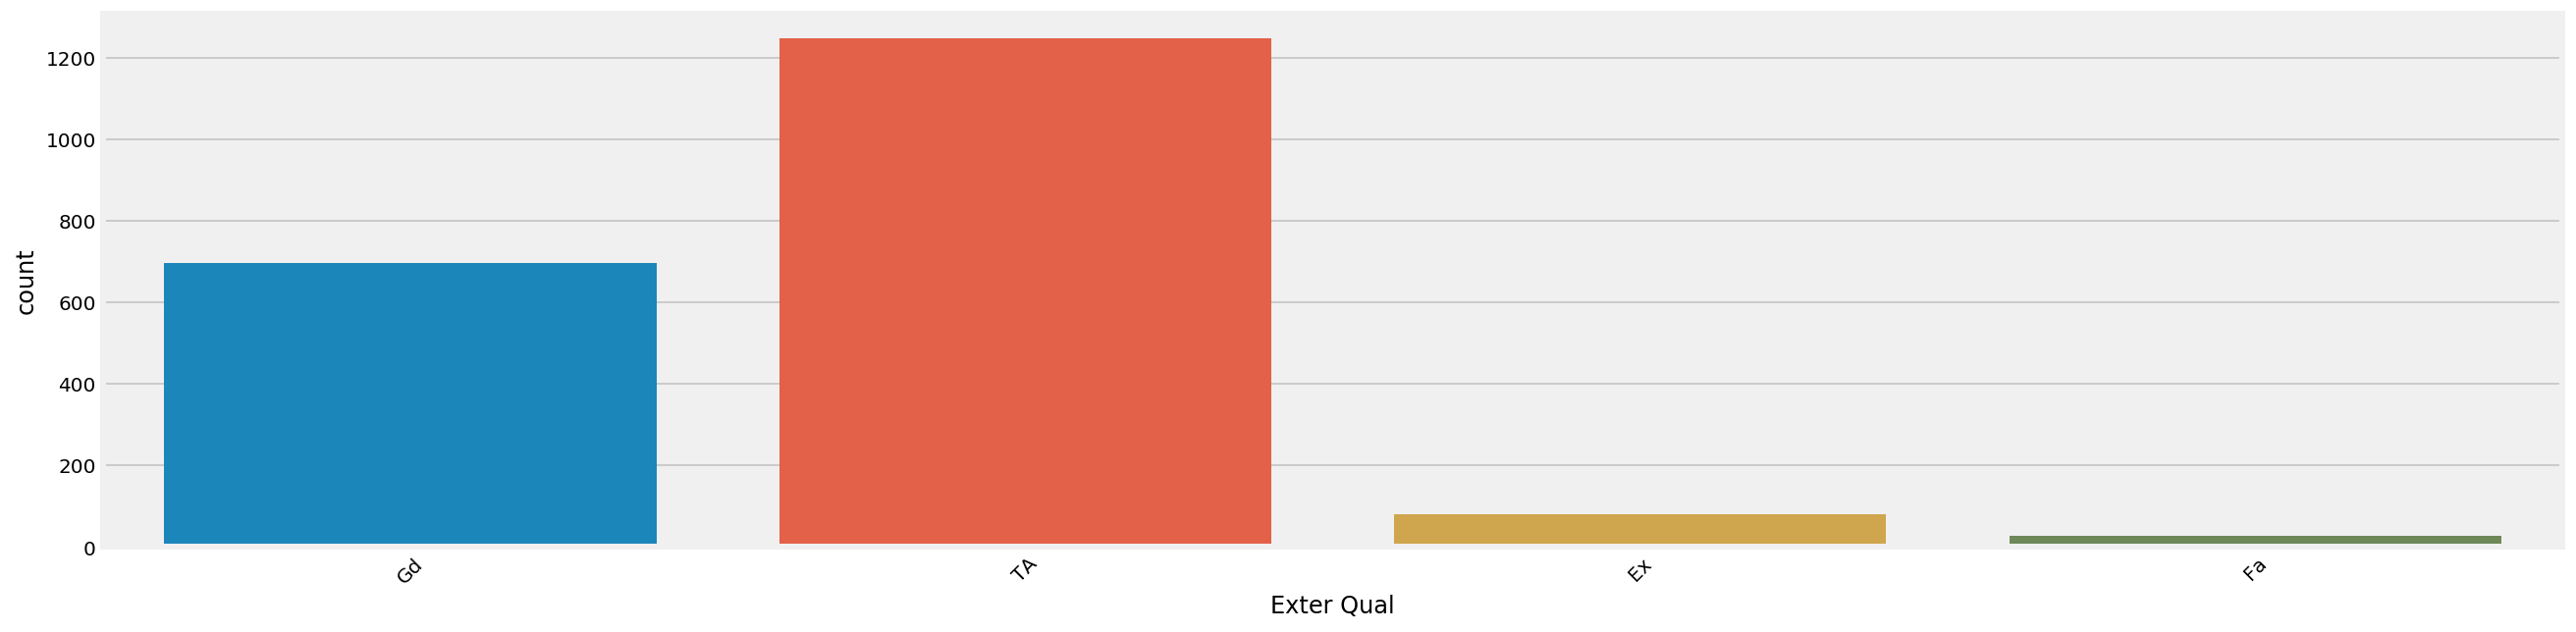

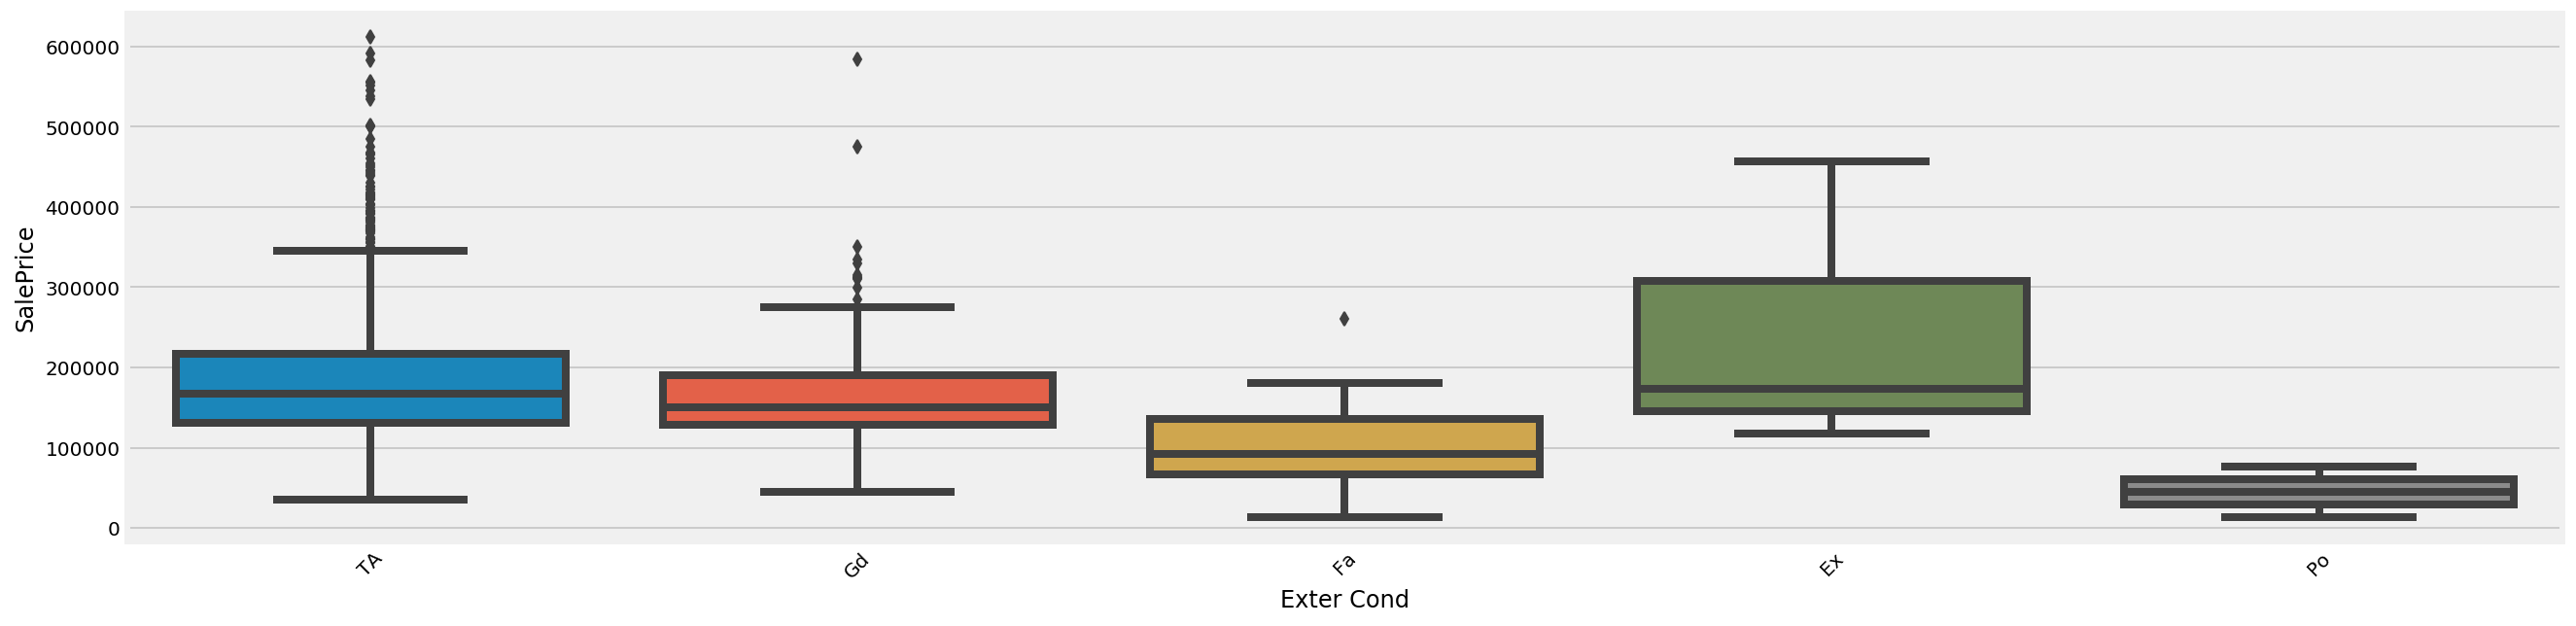

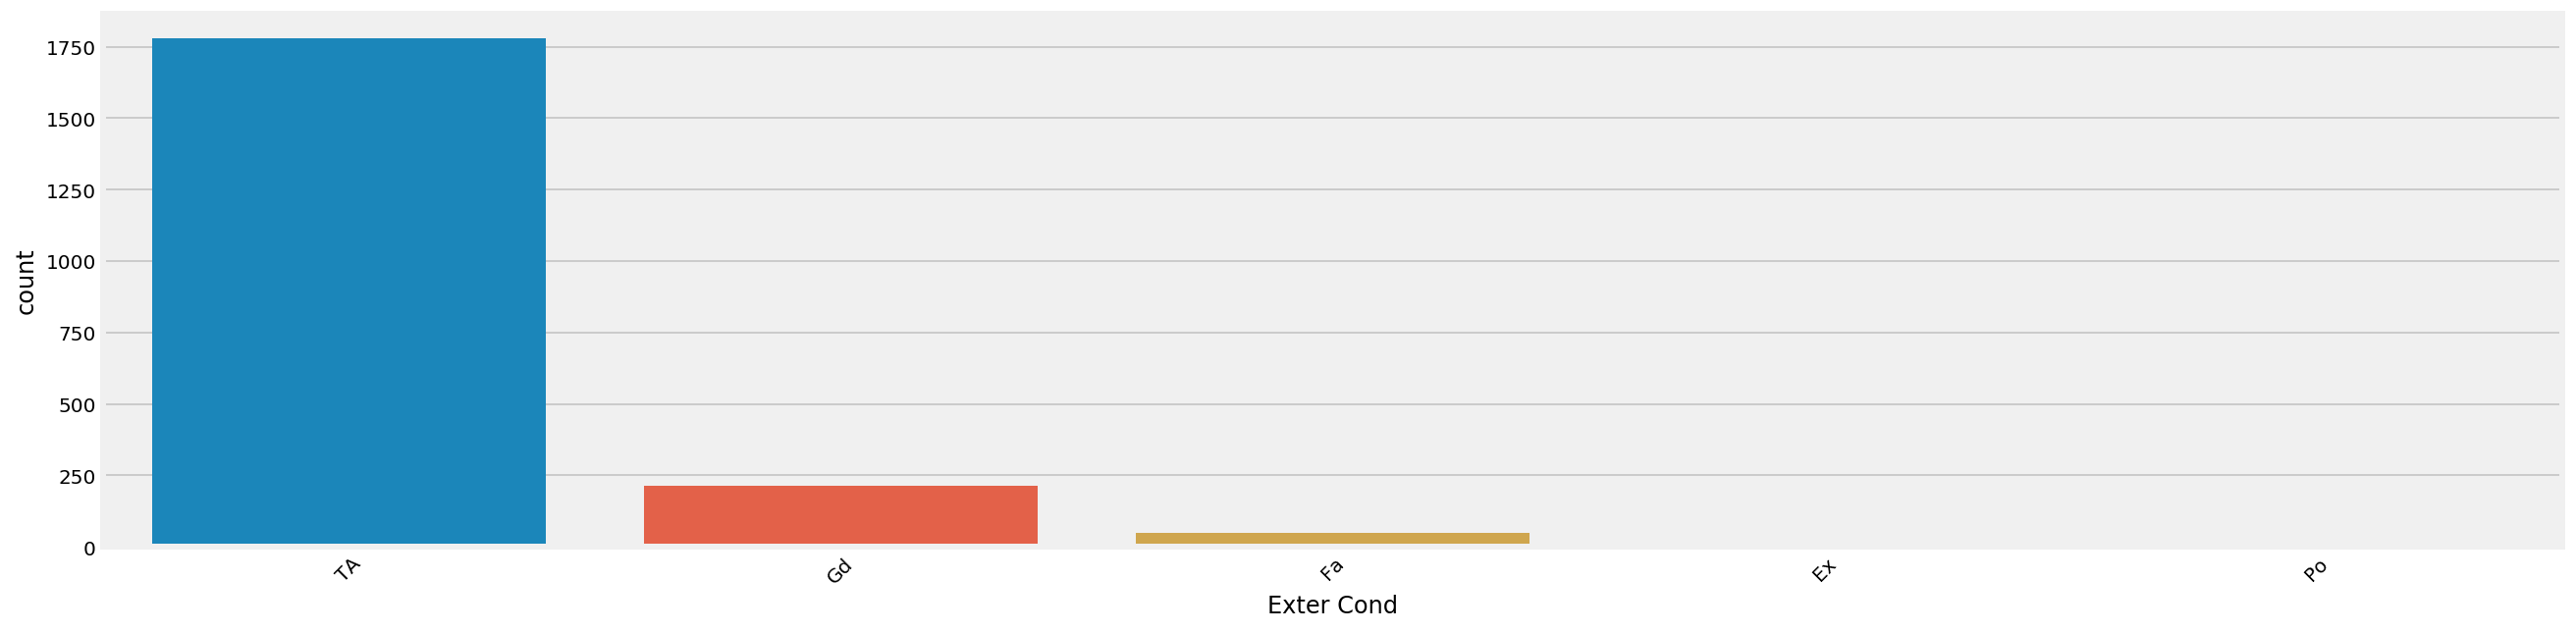

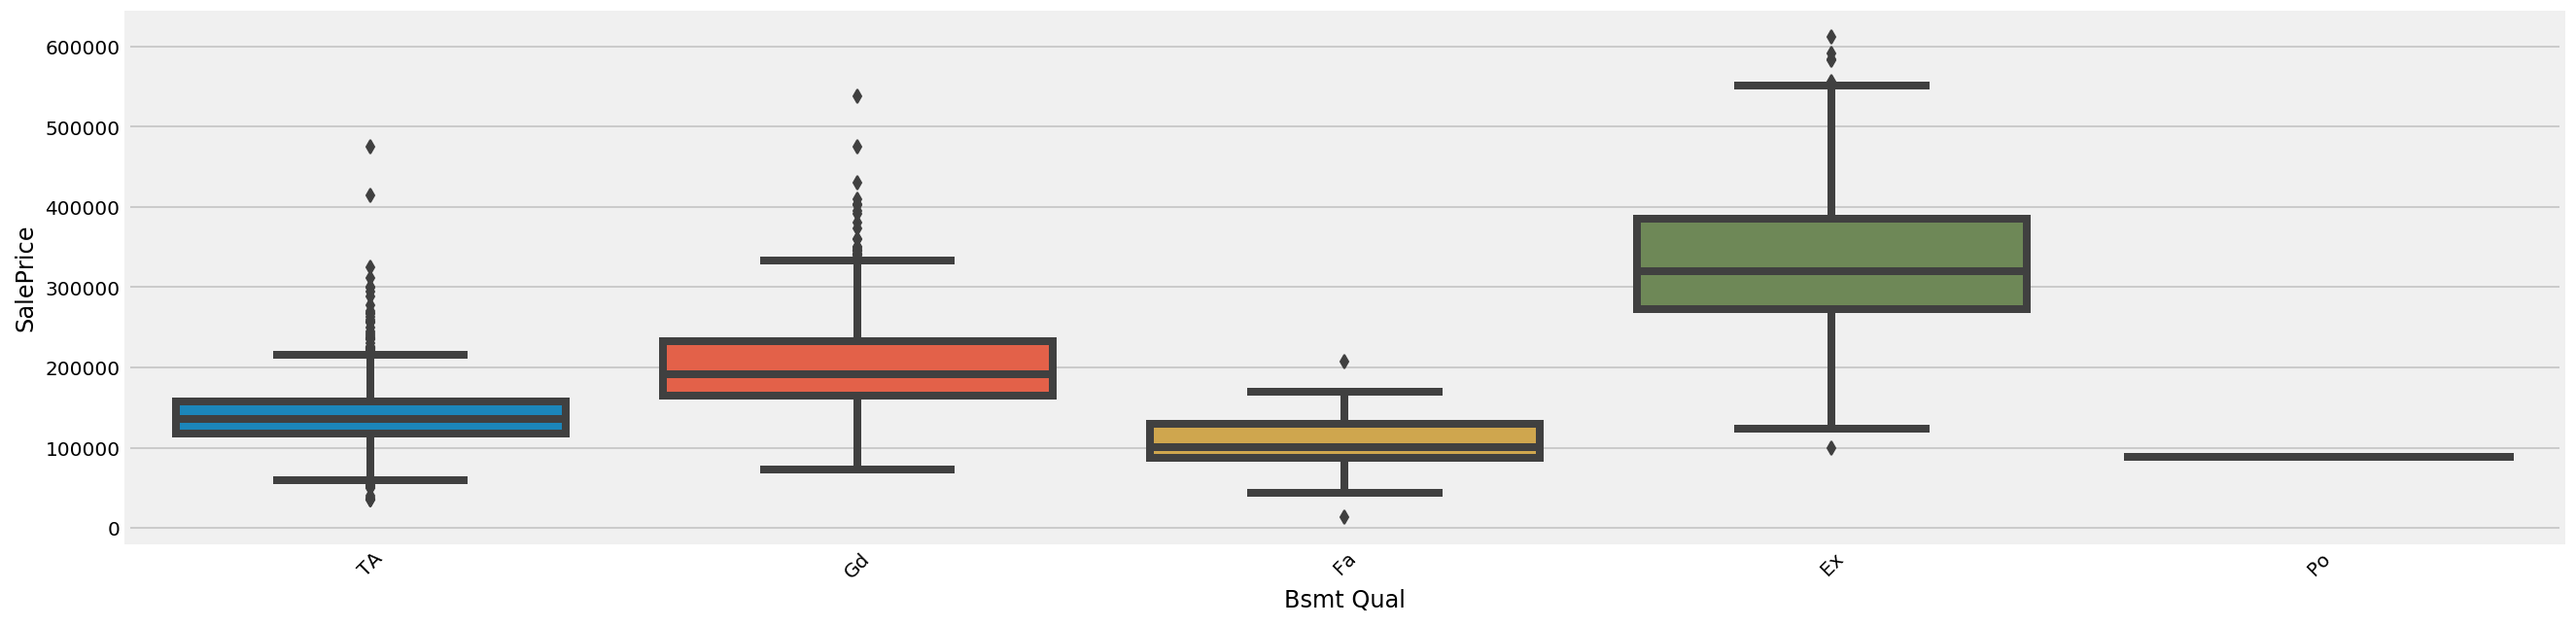

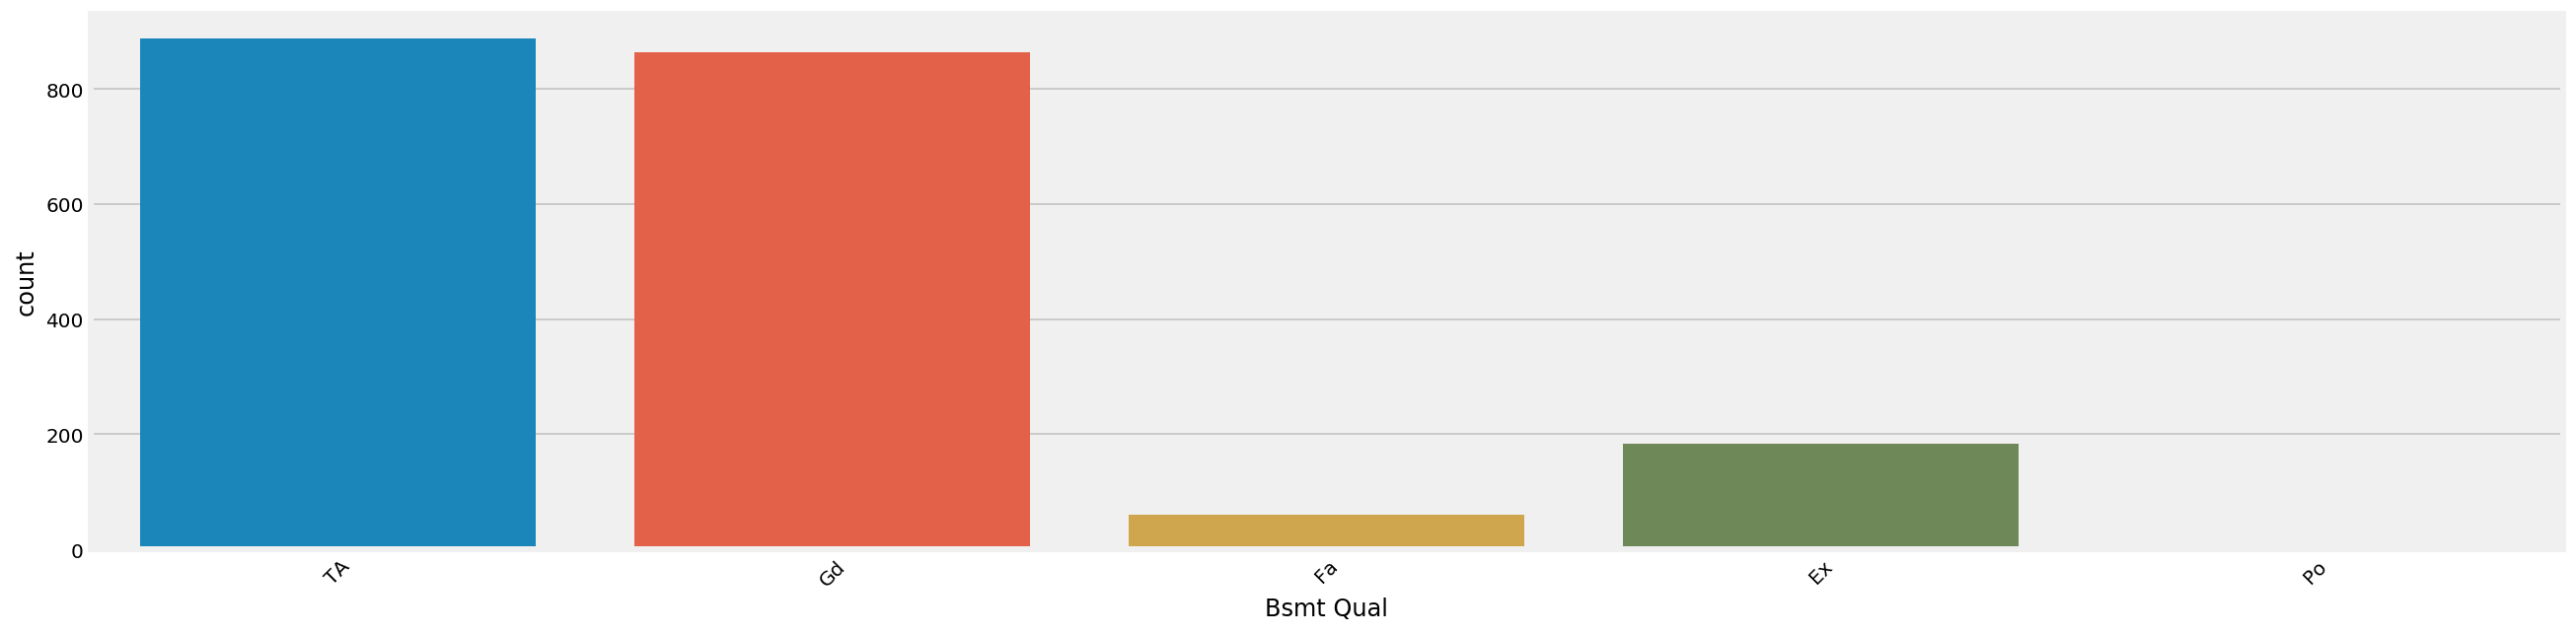

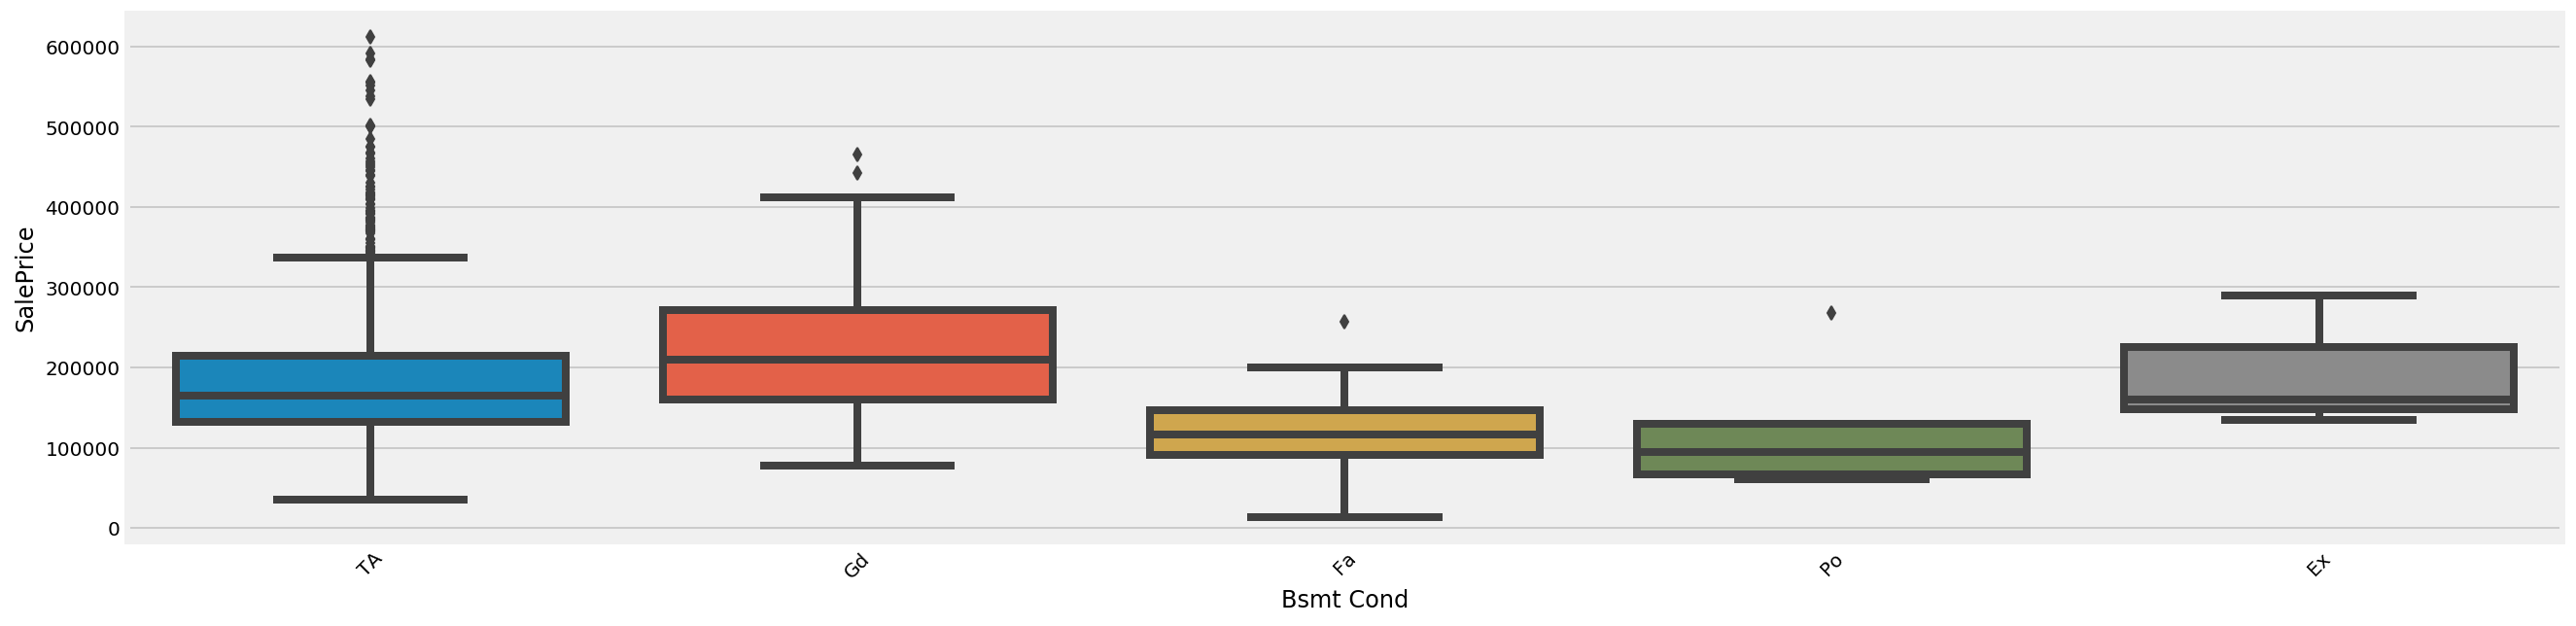

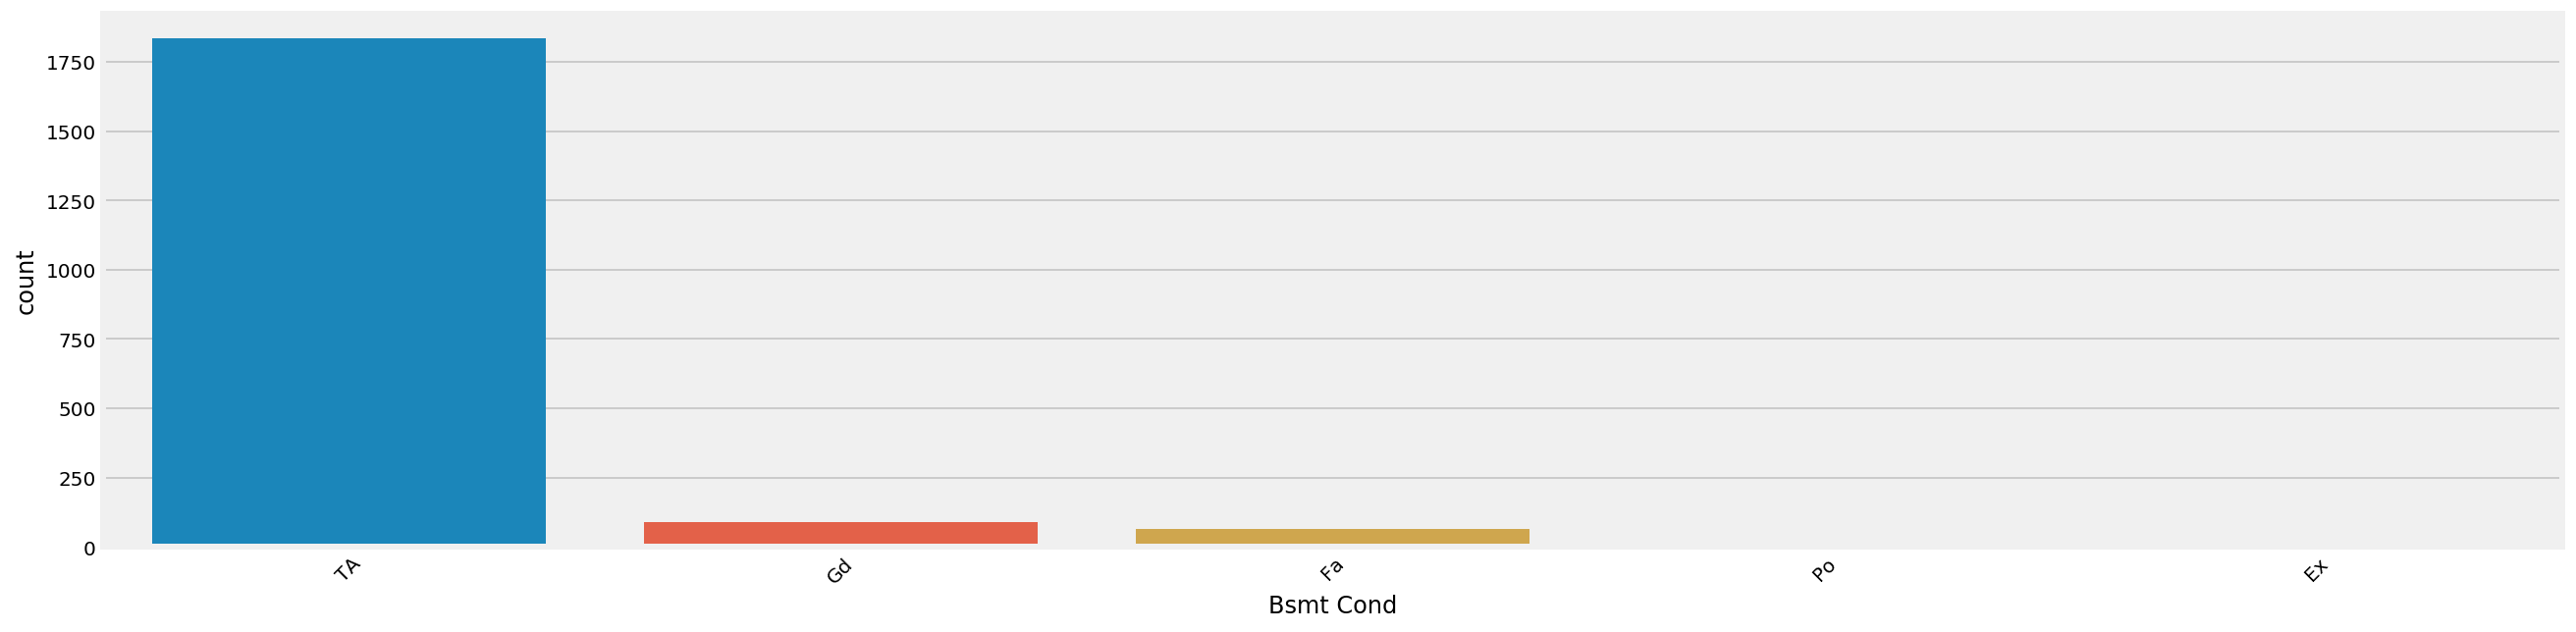

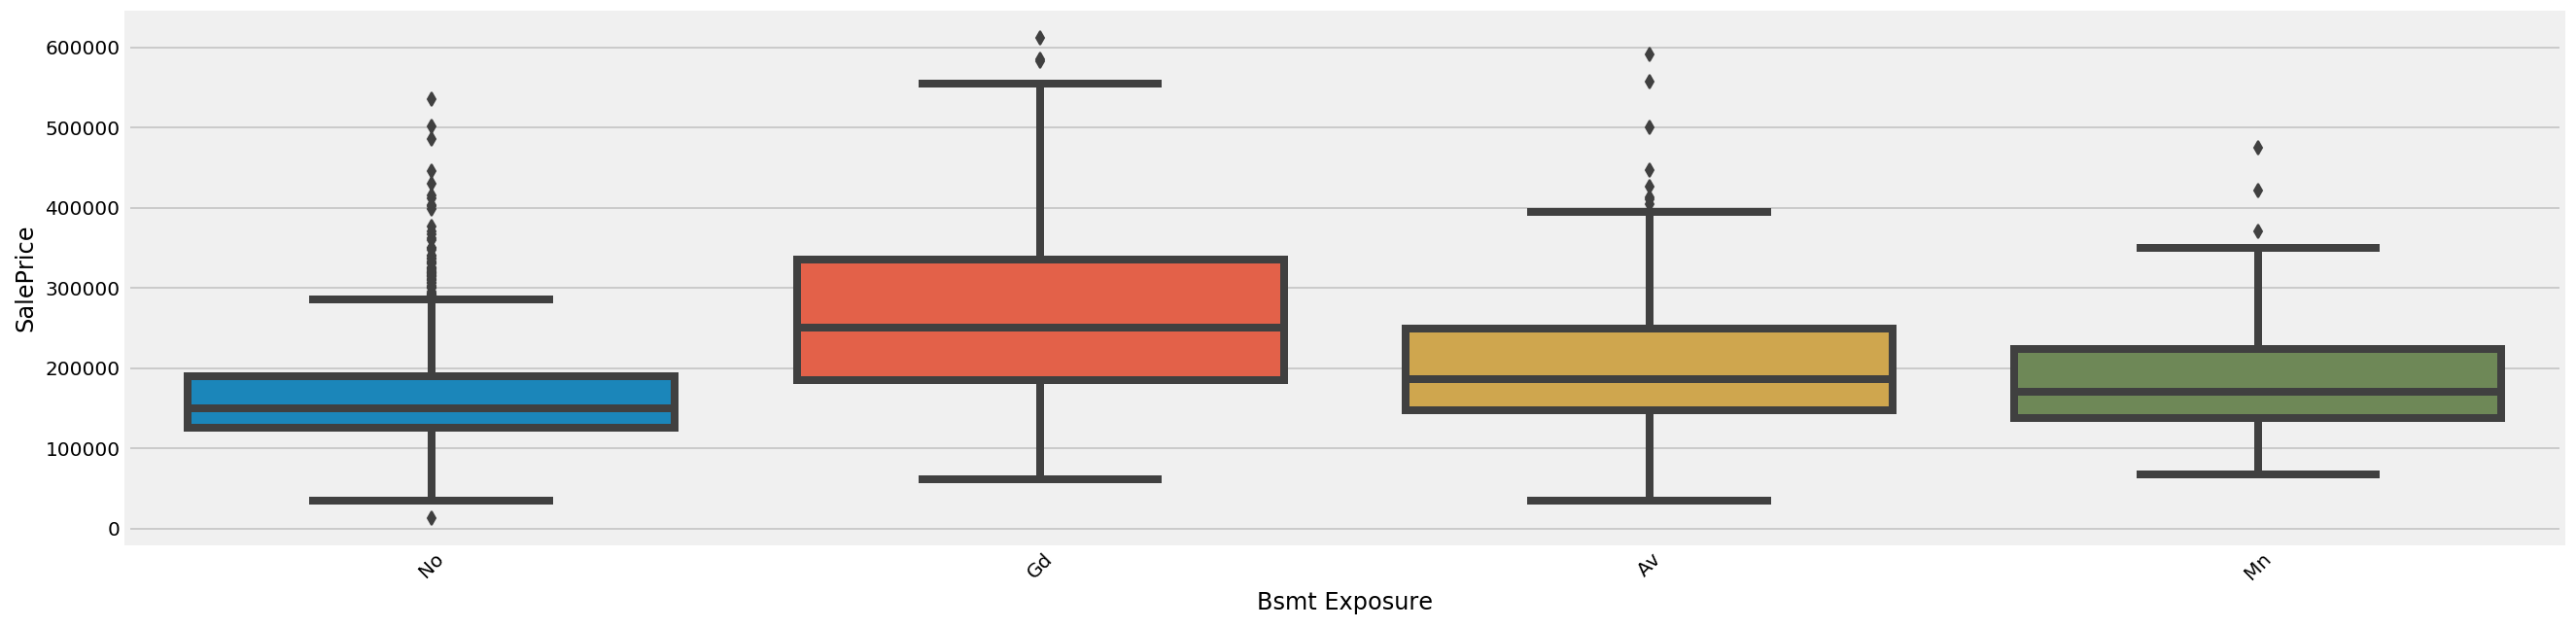

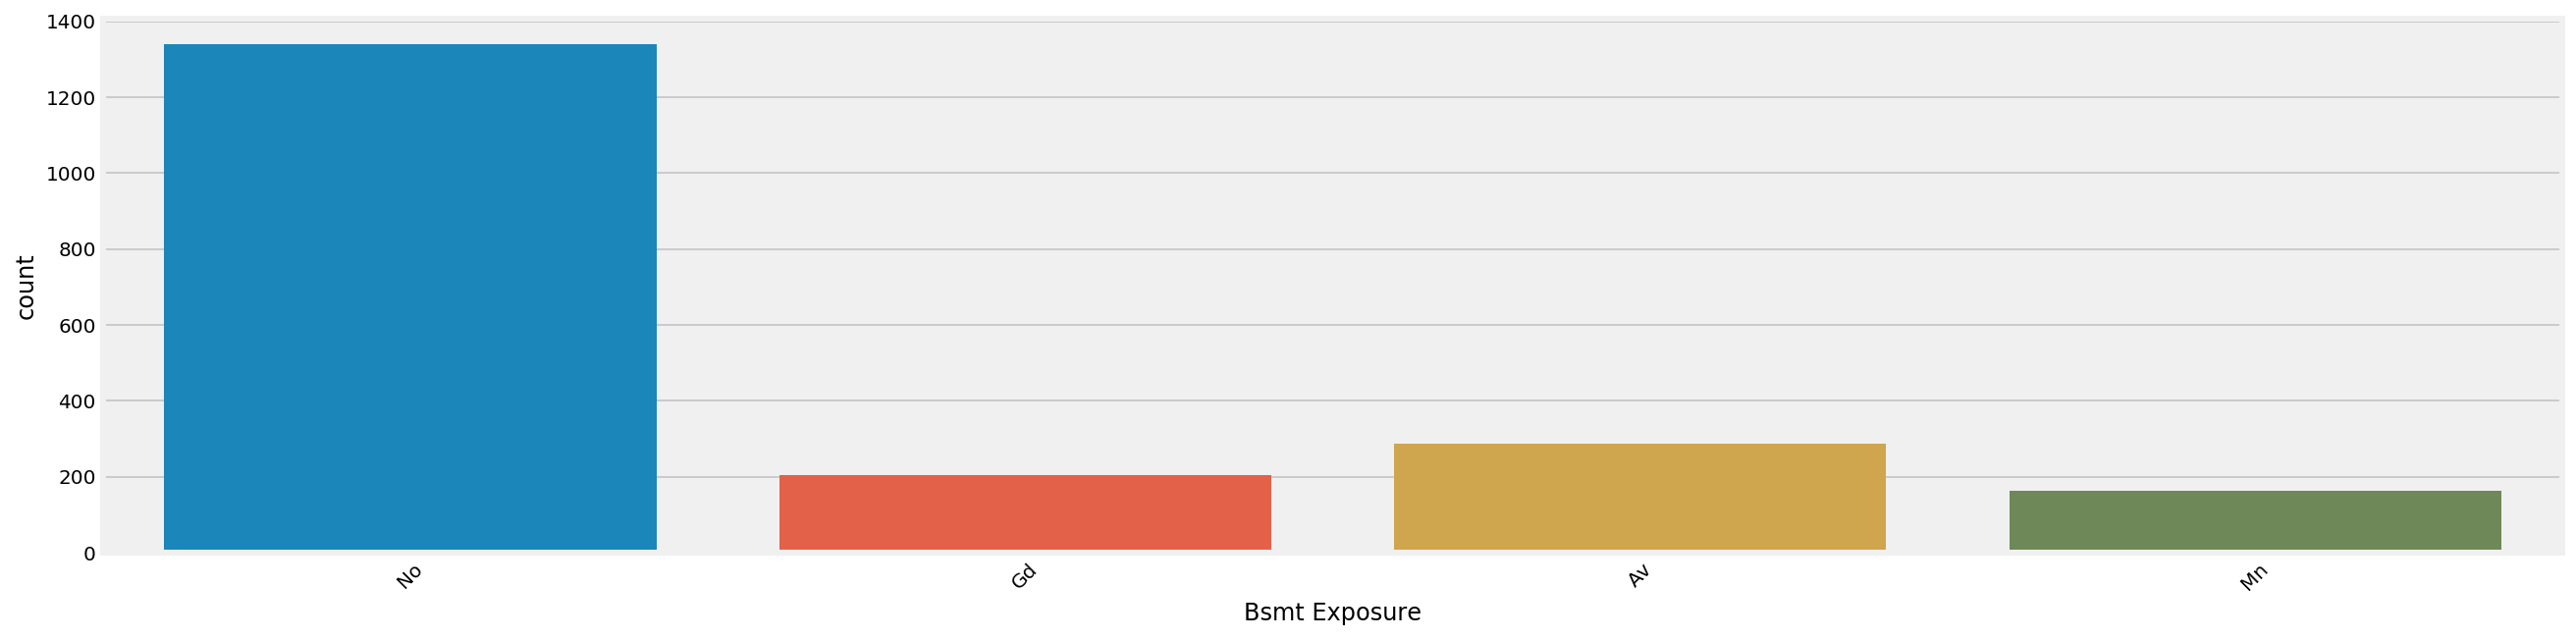

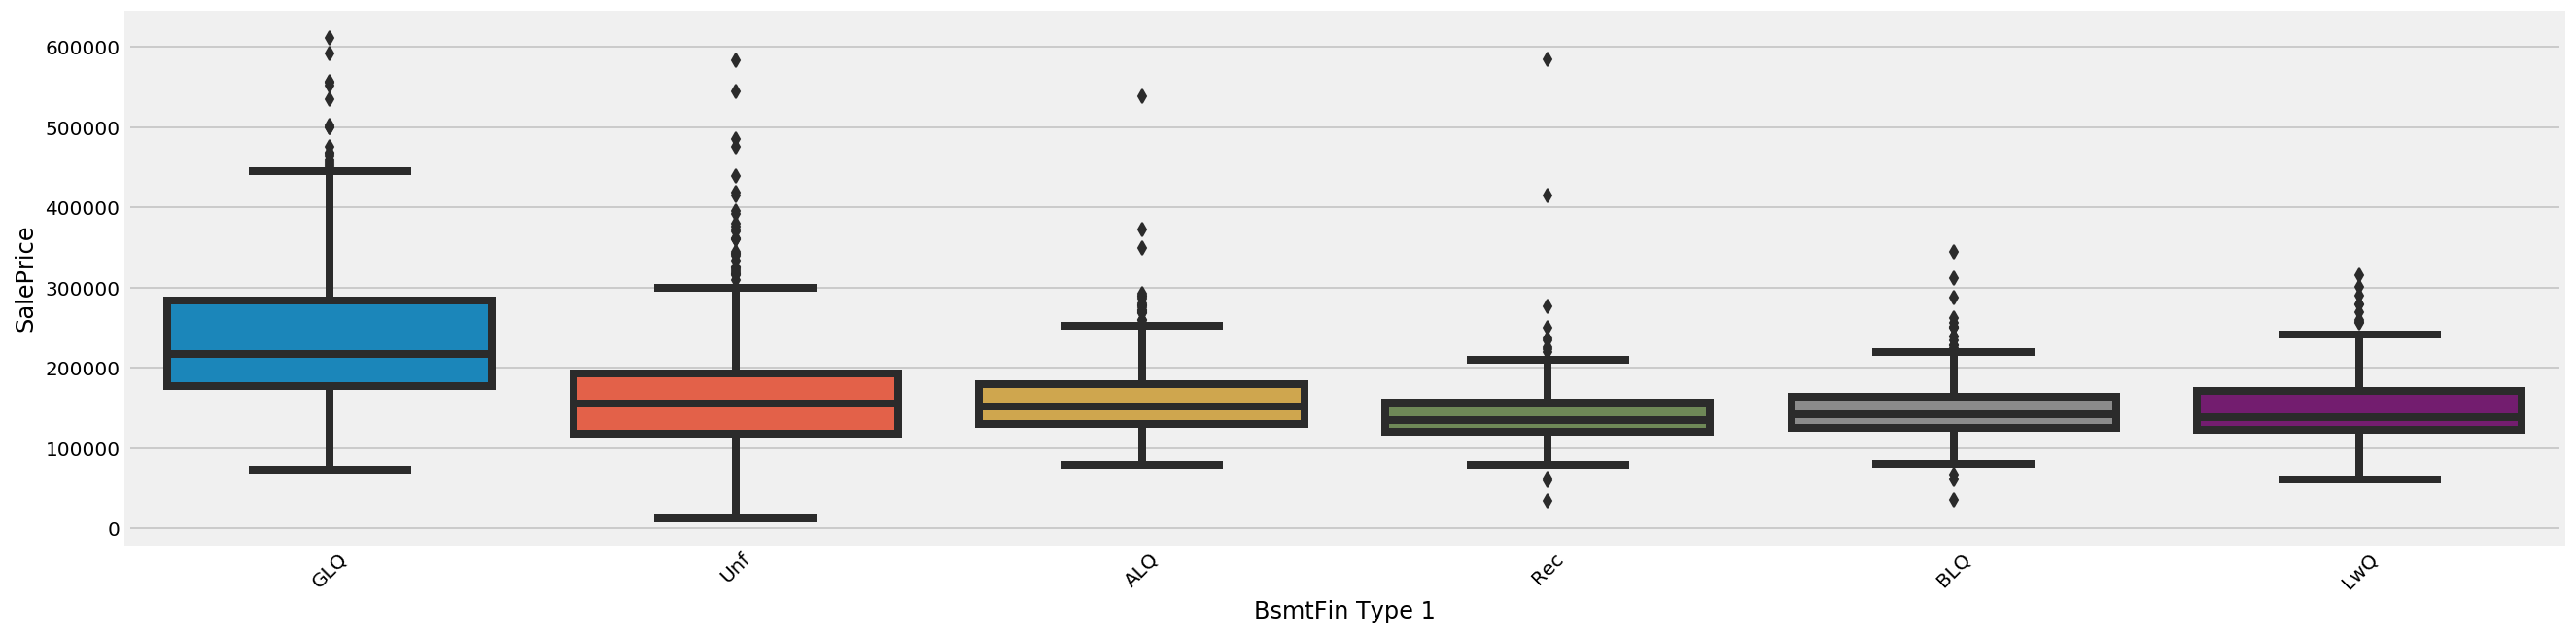

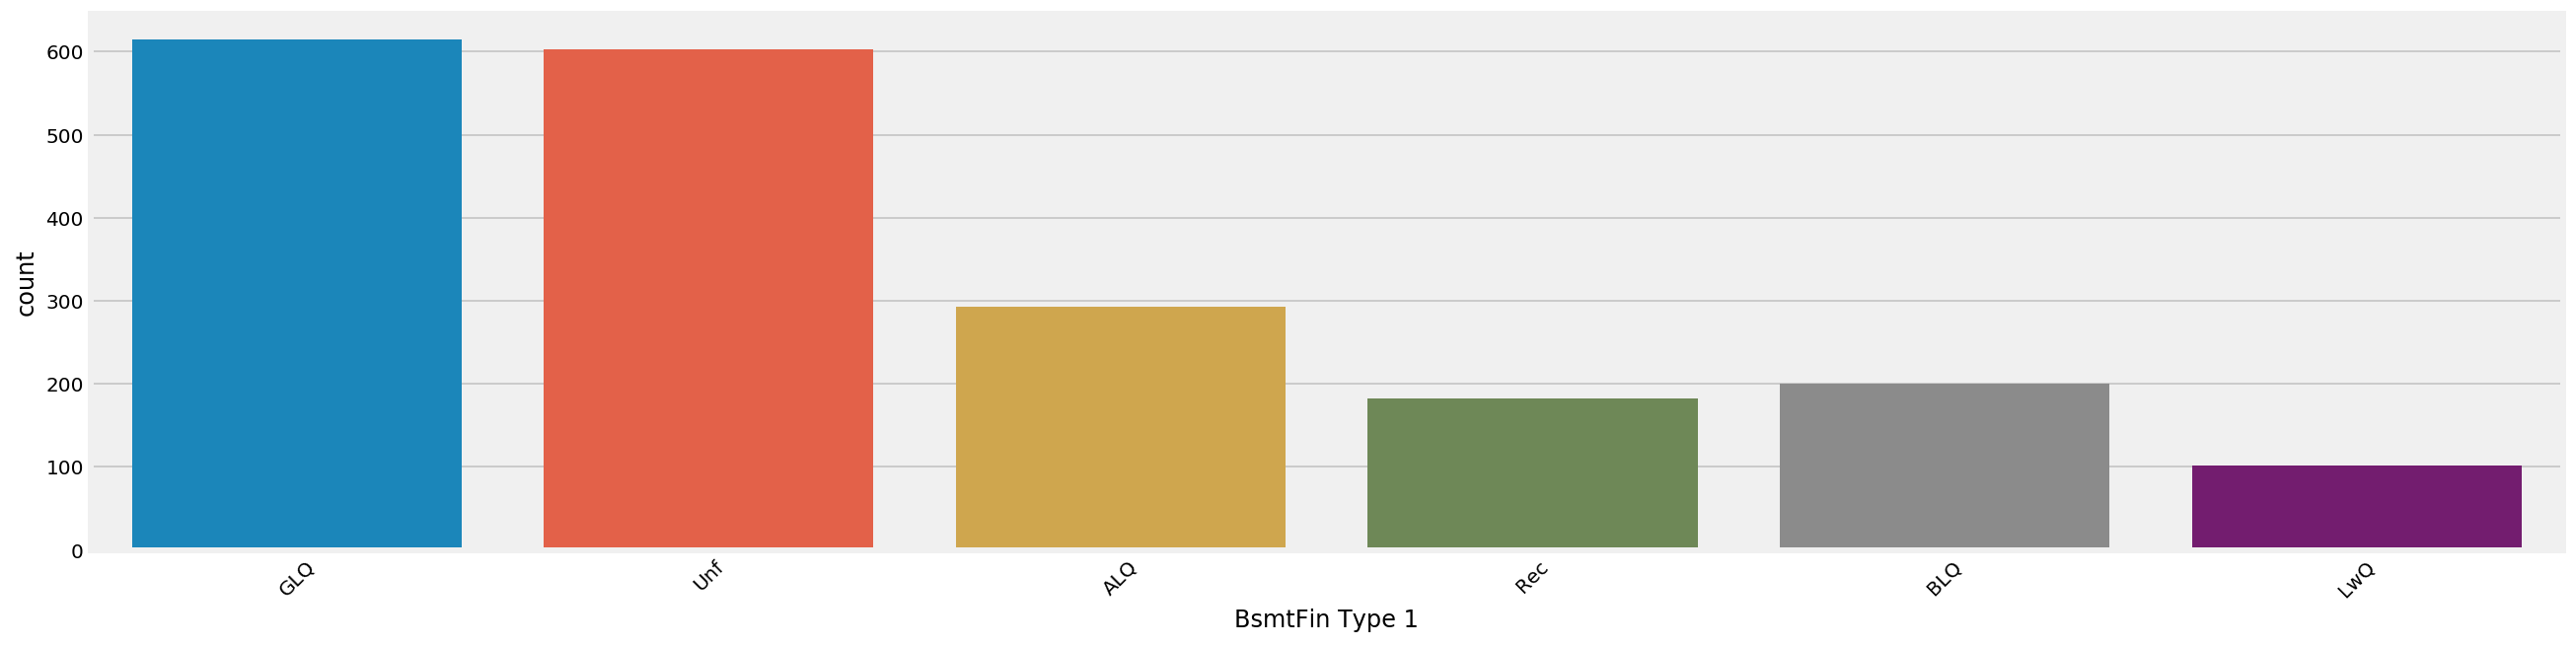

In [26]:
cols=['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond',
        'Bsmt Exposure','BsmtFin Type 1']
for col in cols:
    box_plot(df_train,col)
    count_plot(df_train,col)

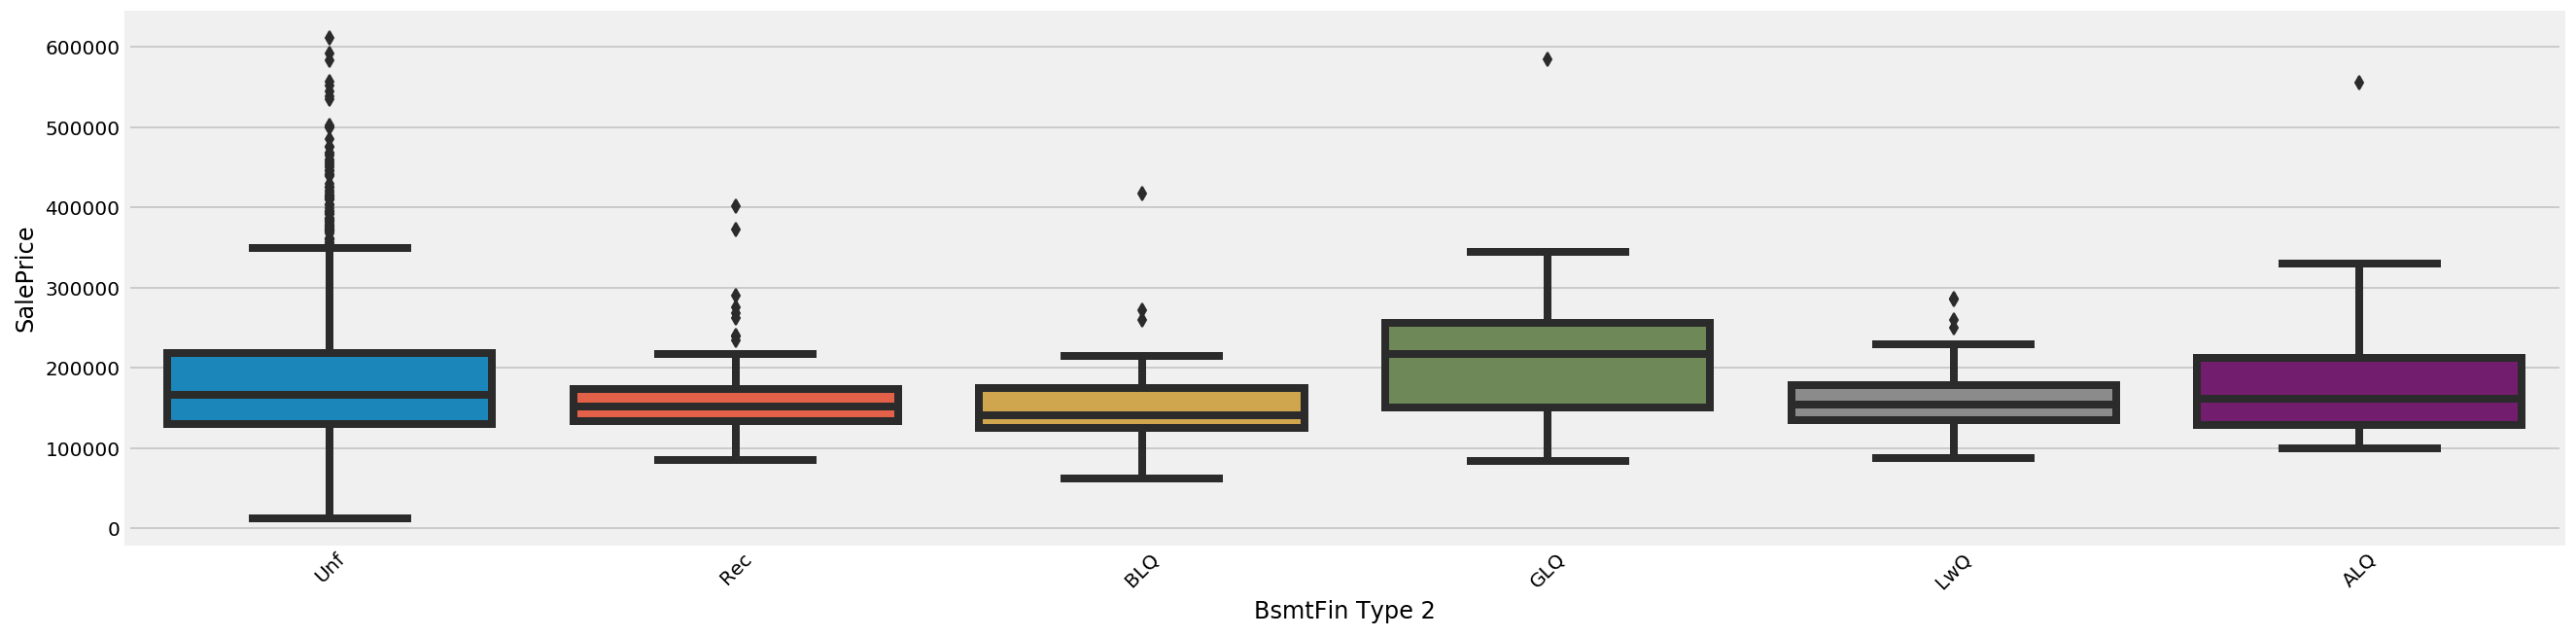

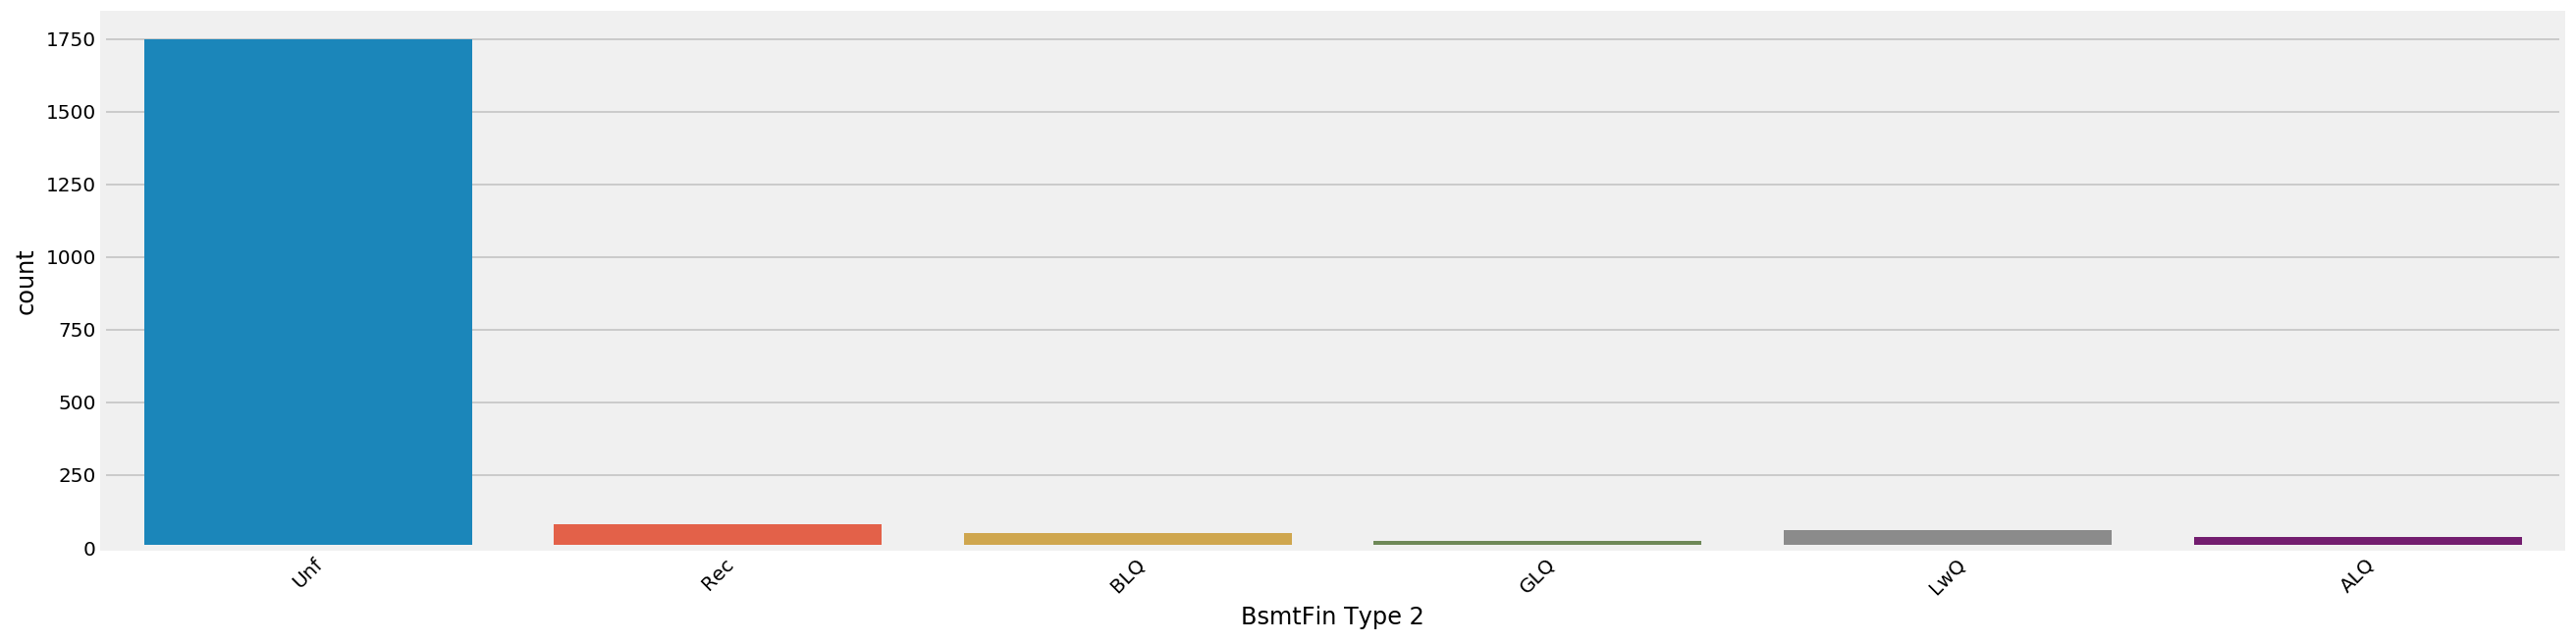

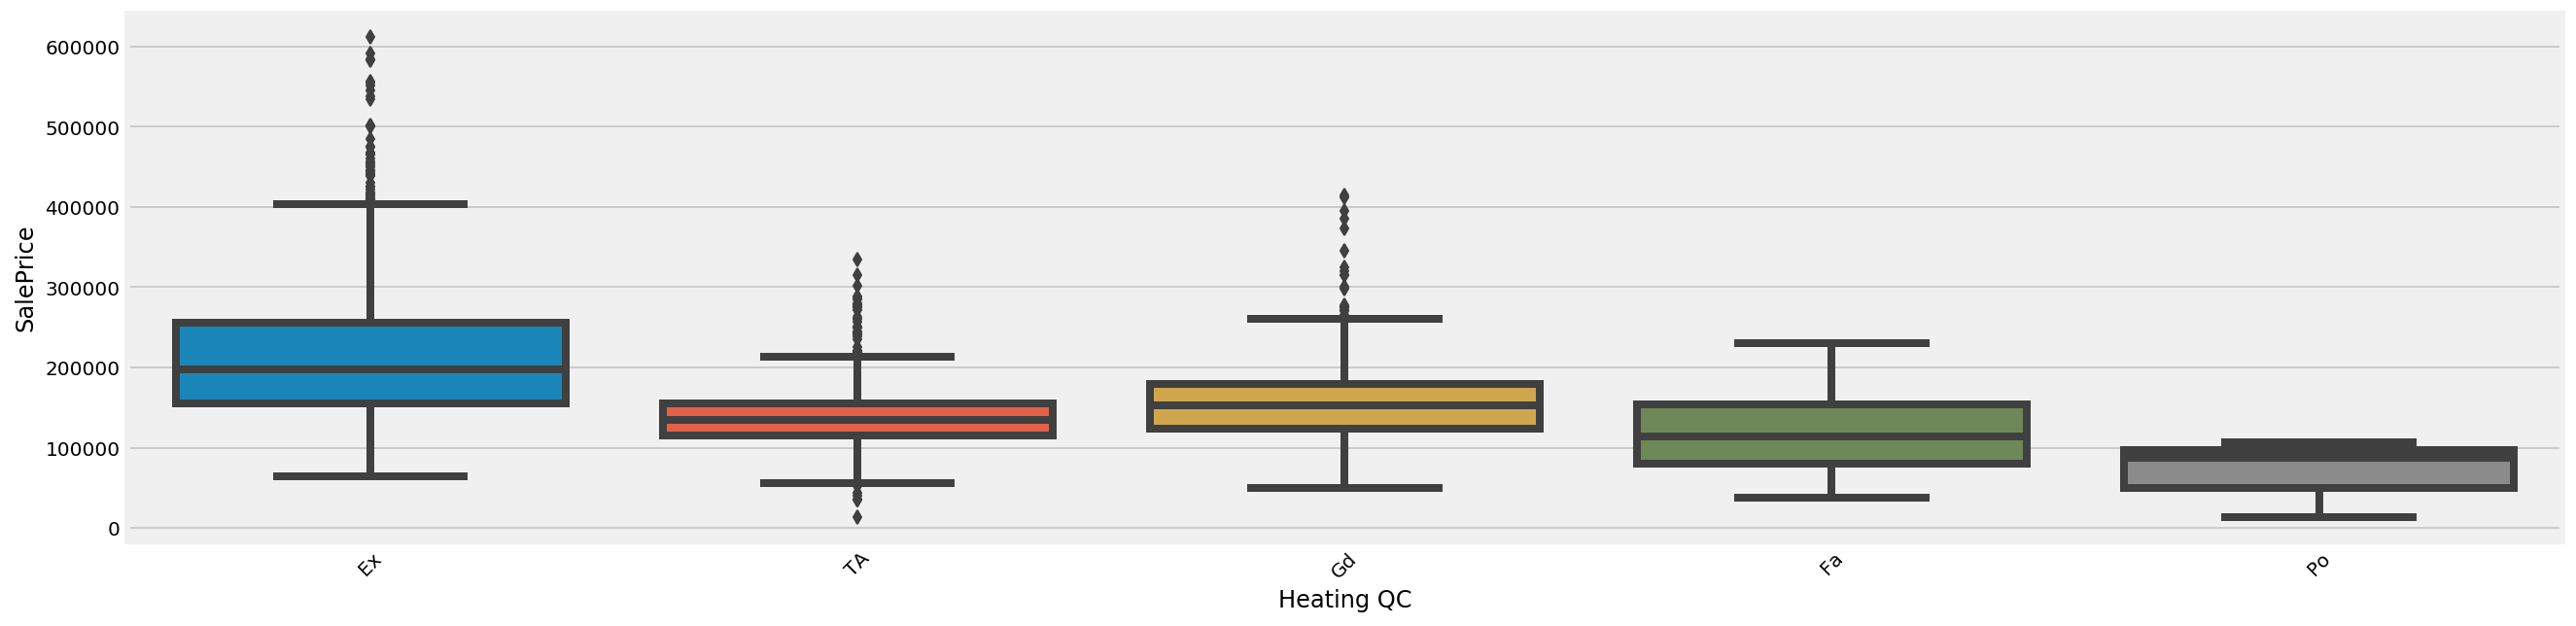

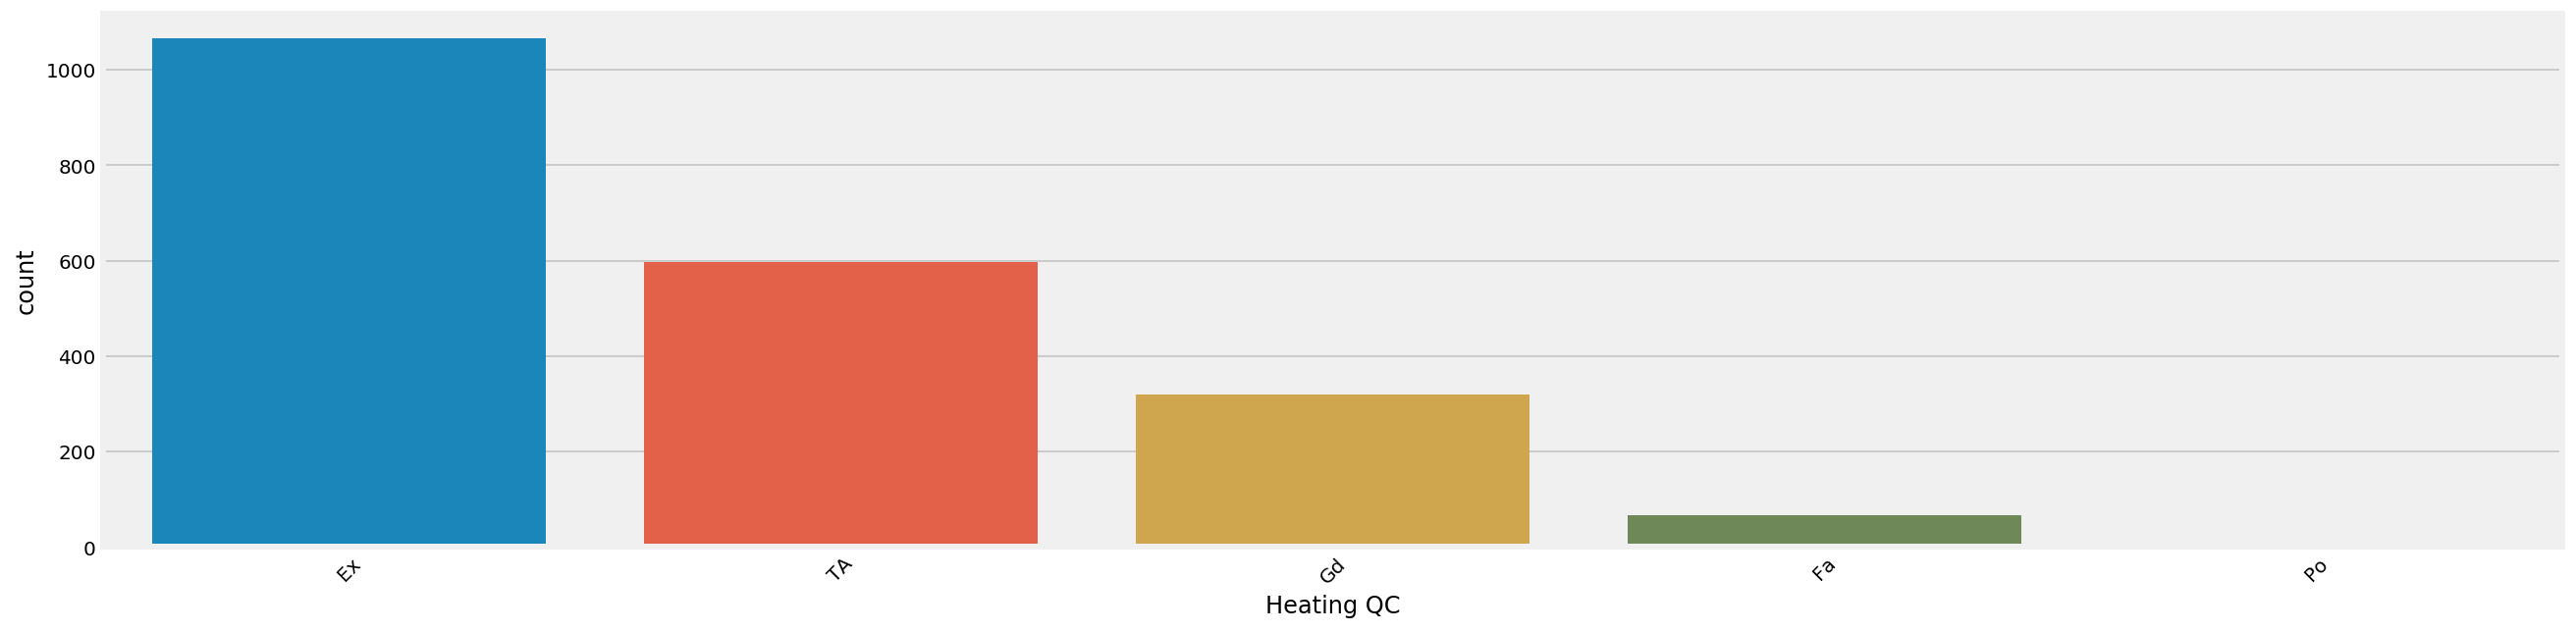

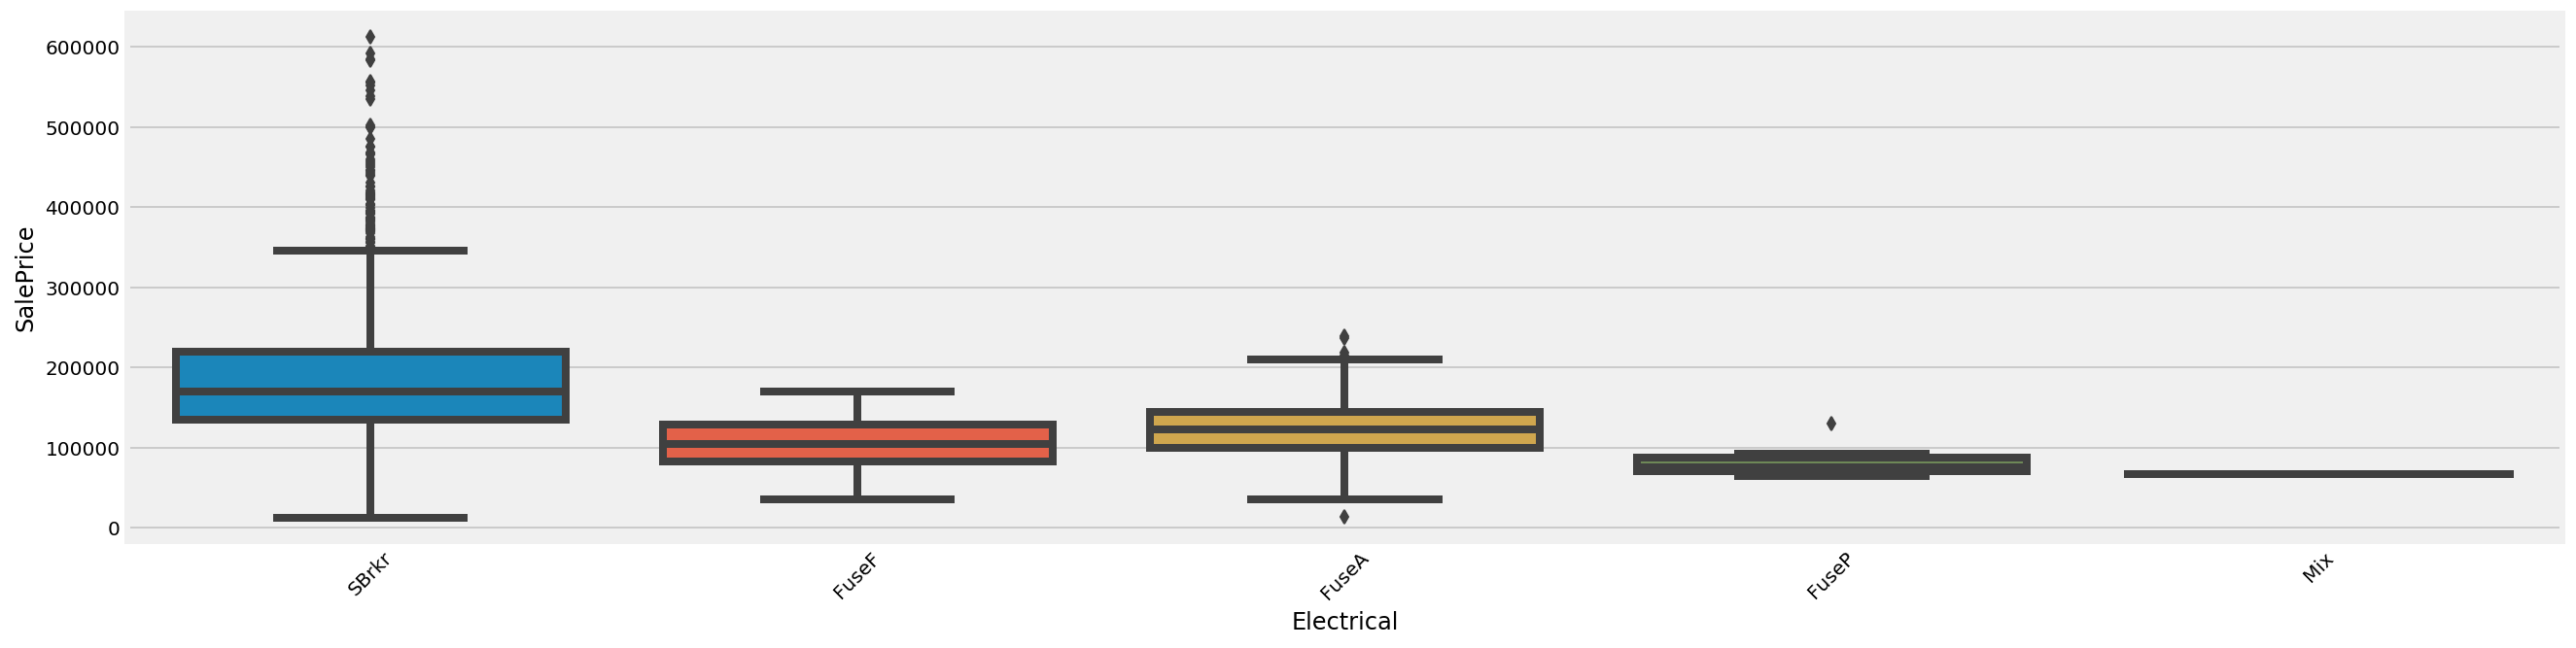

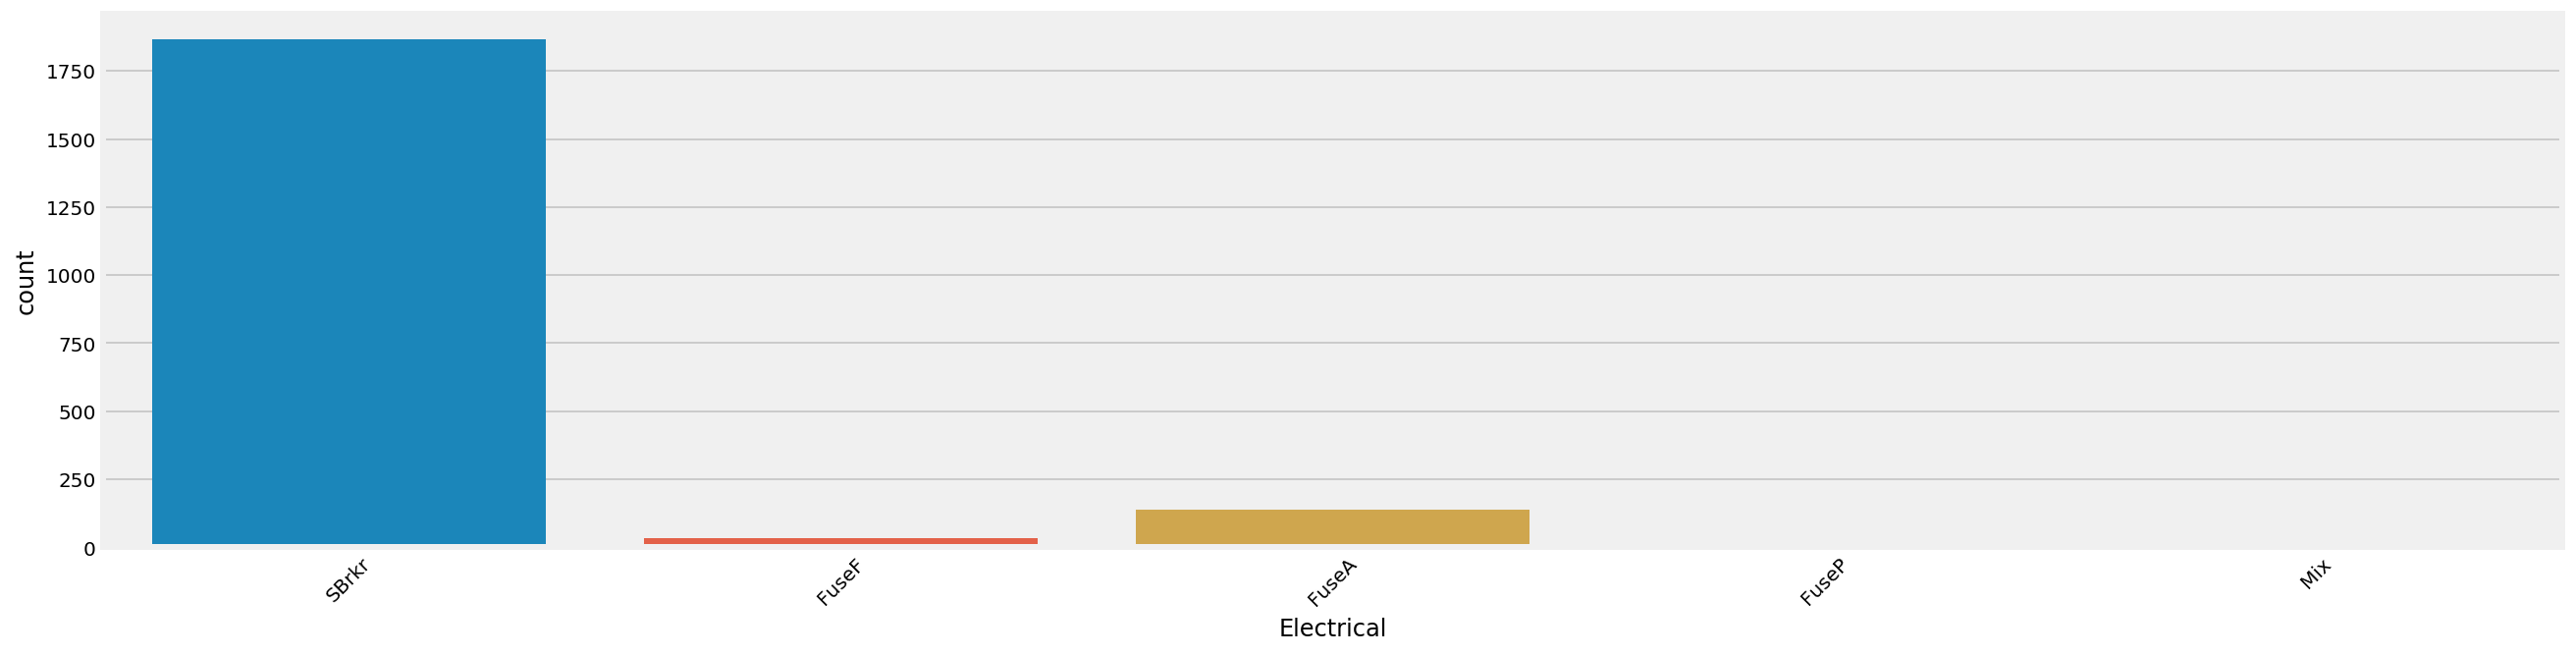

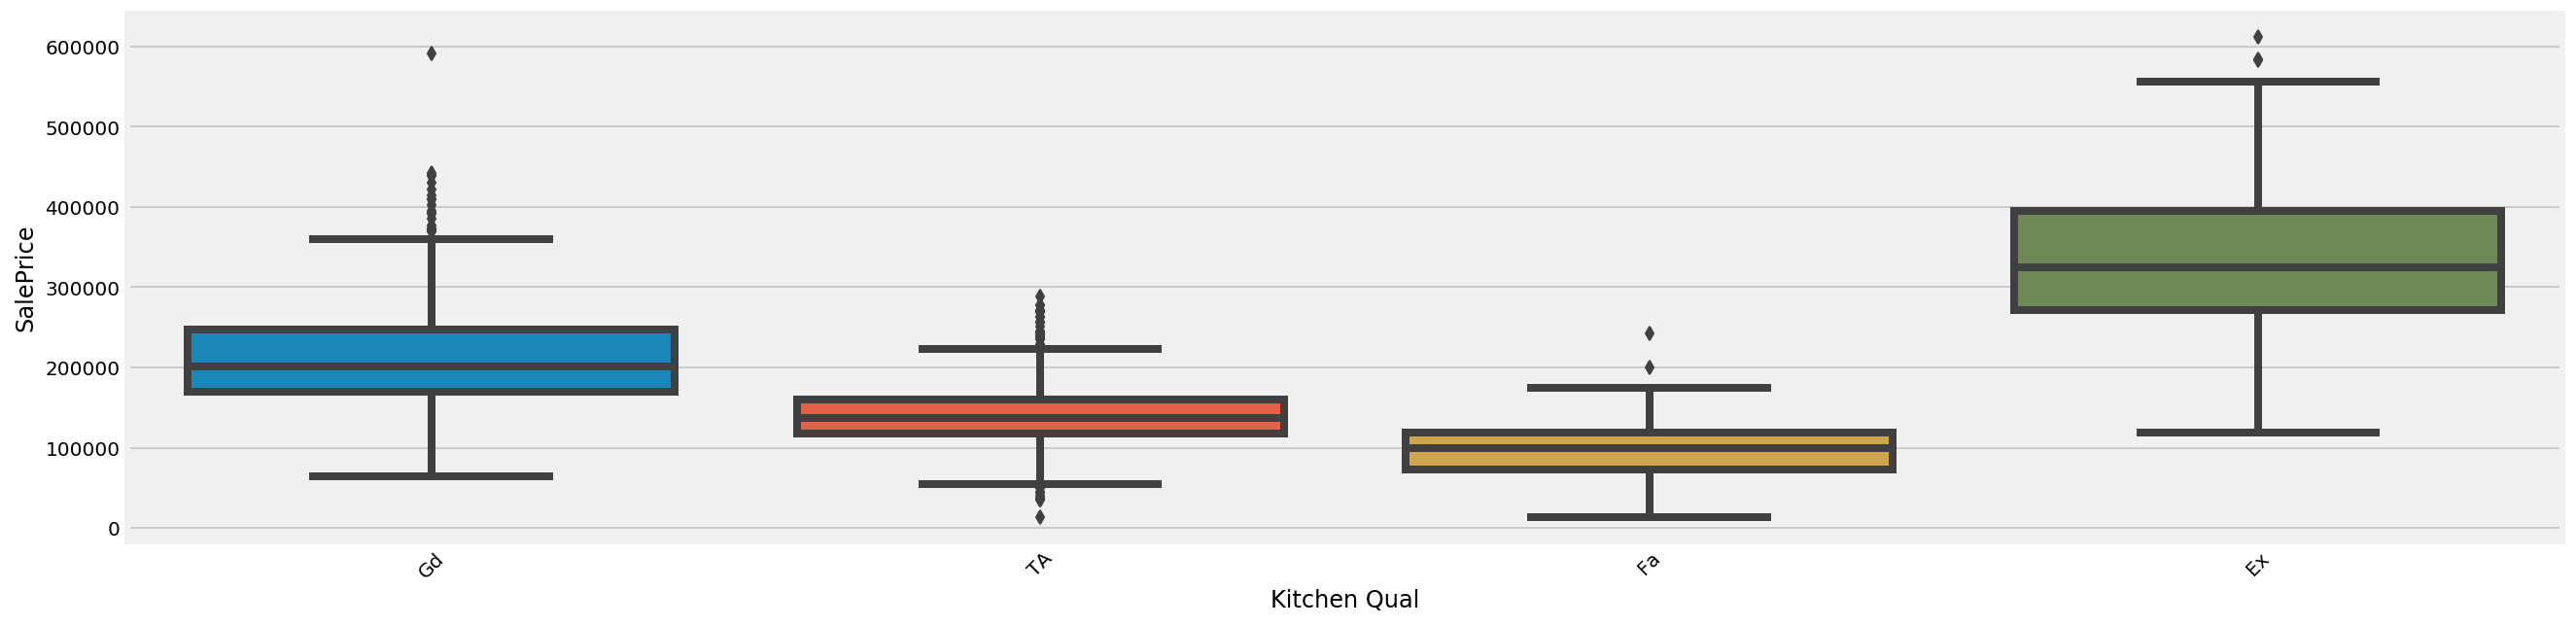

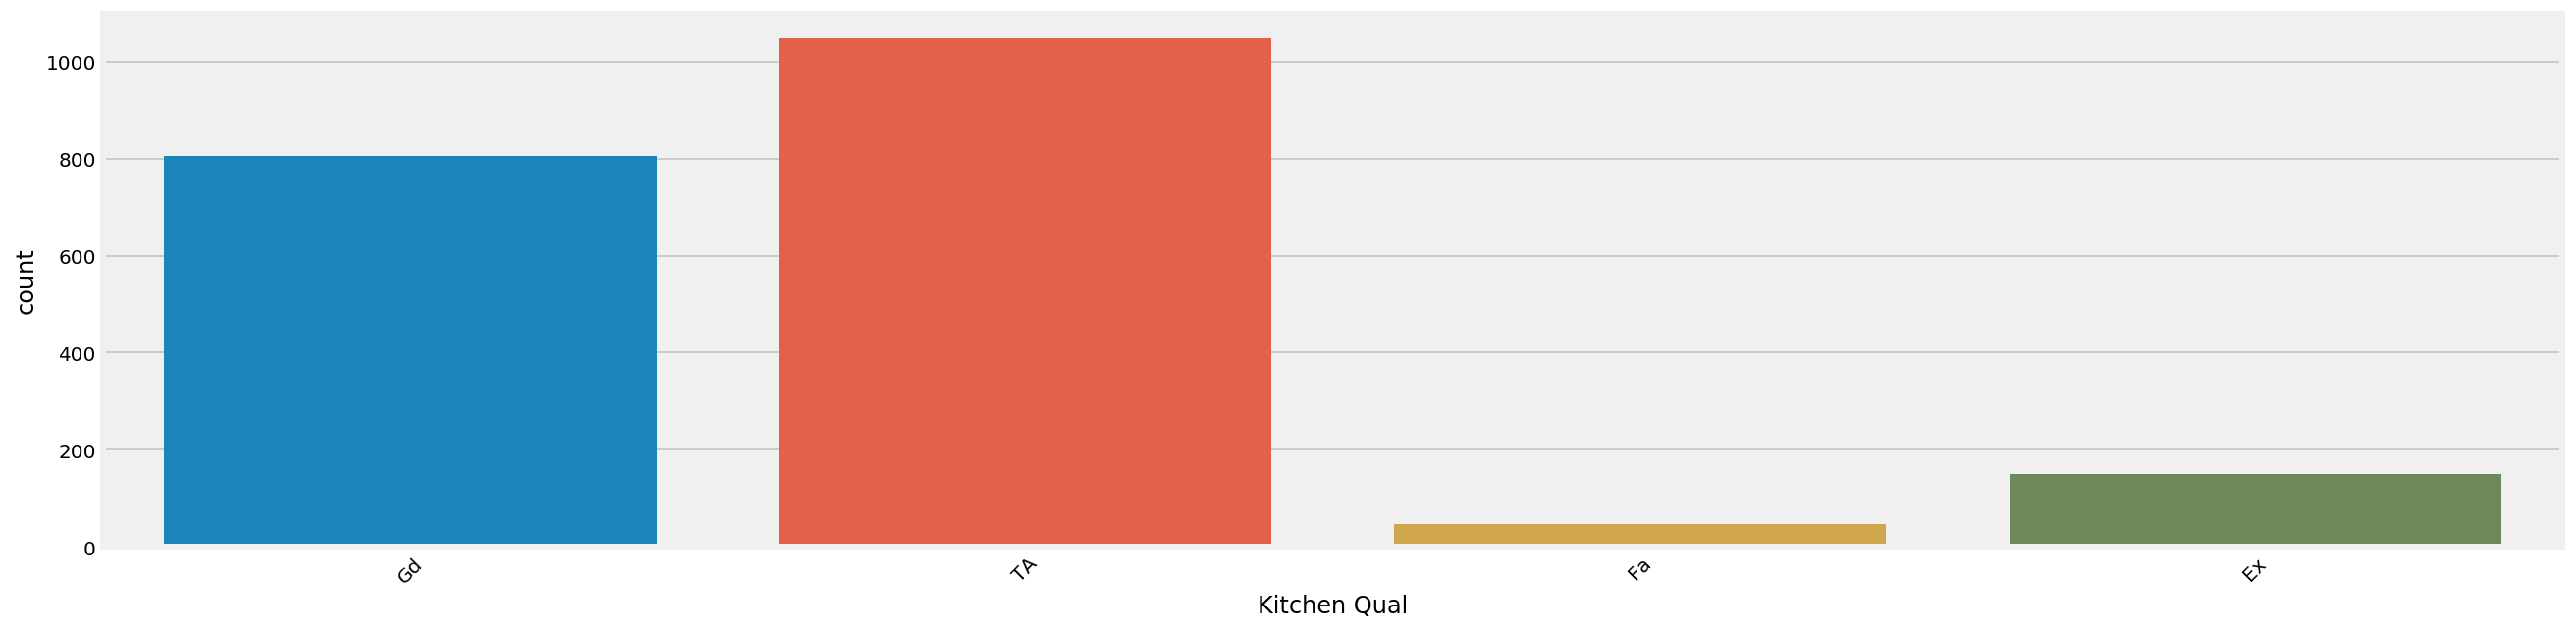

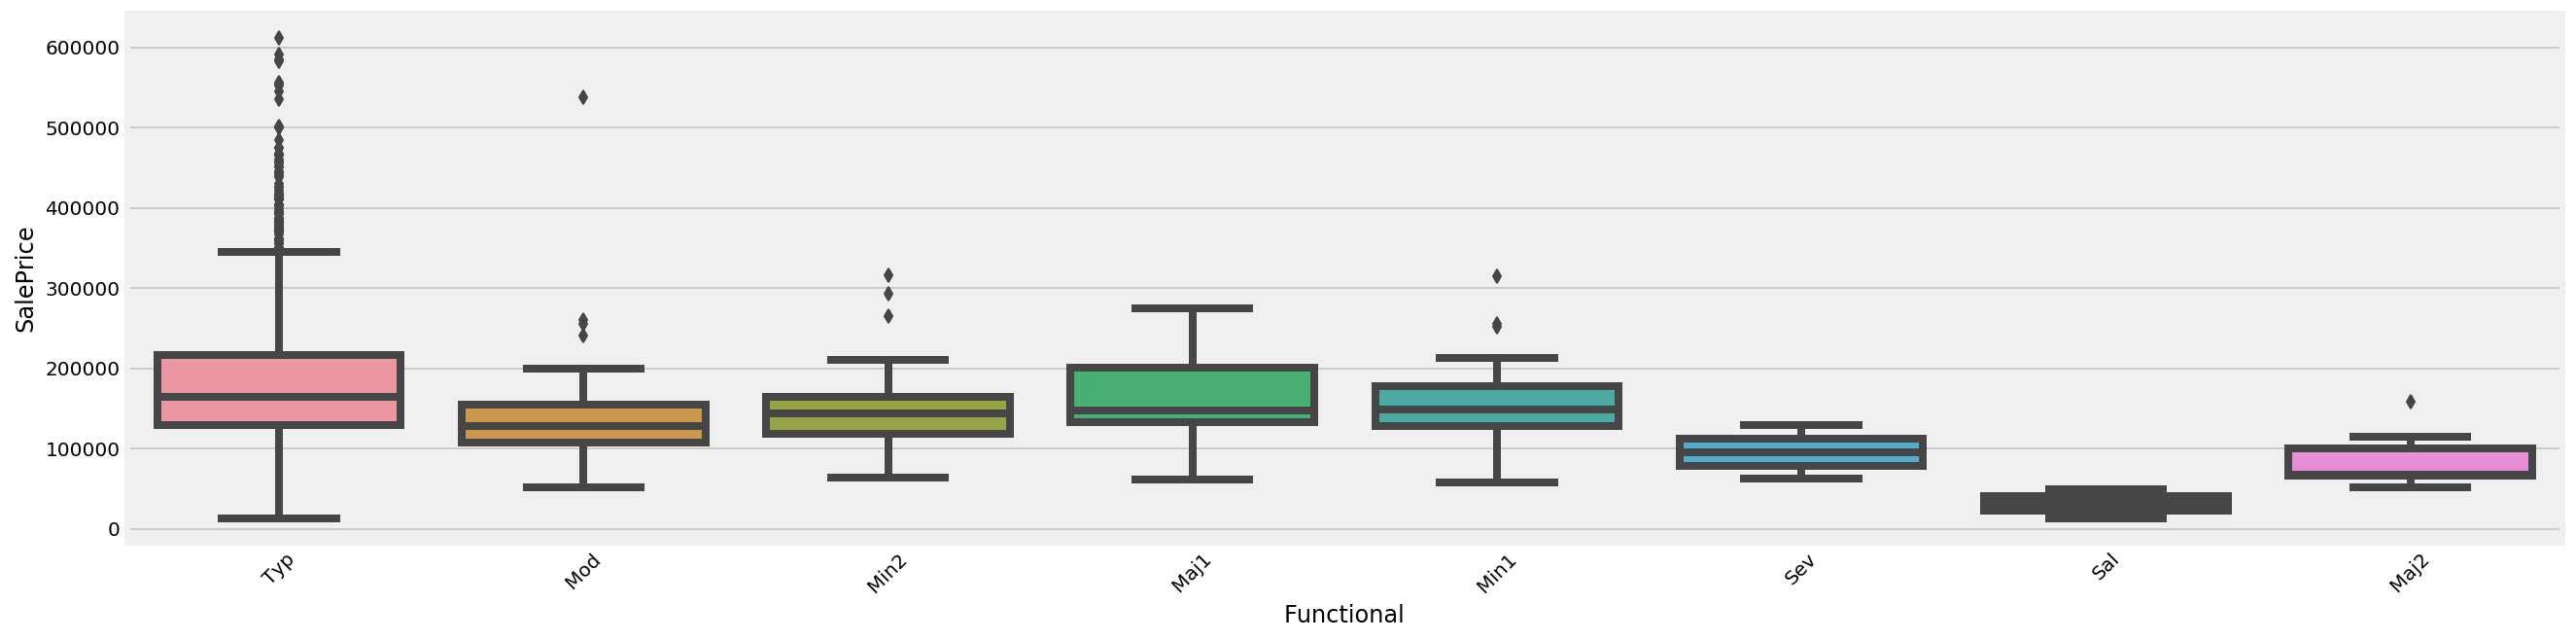

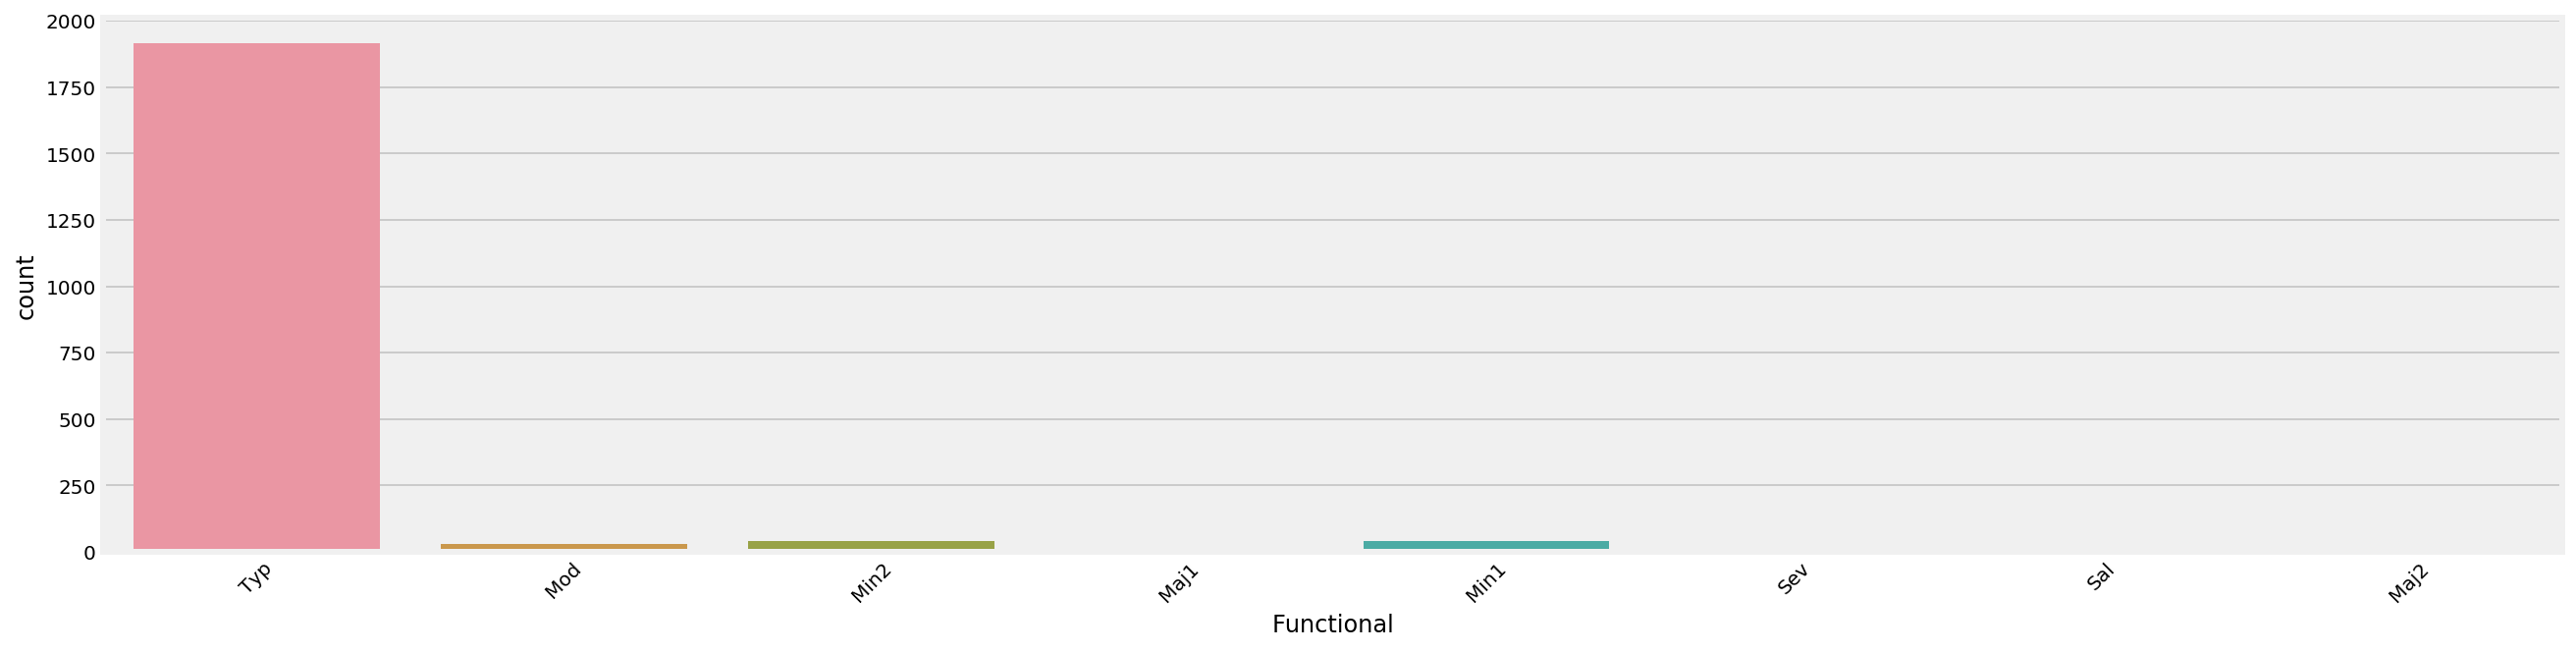

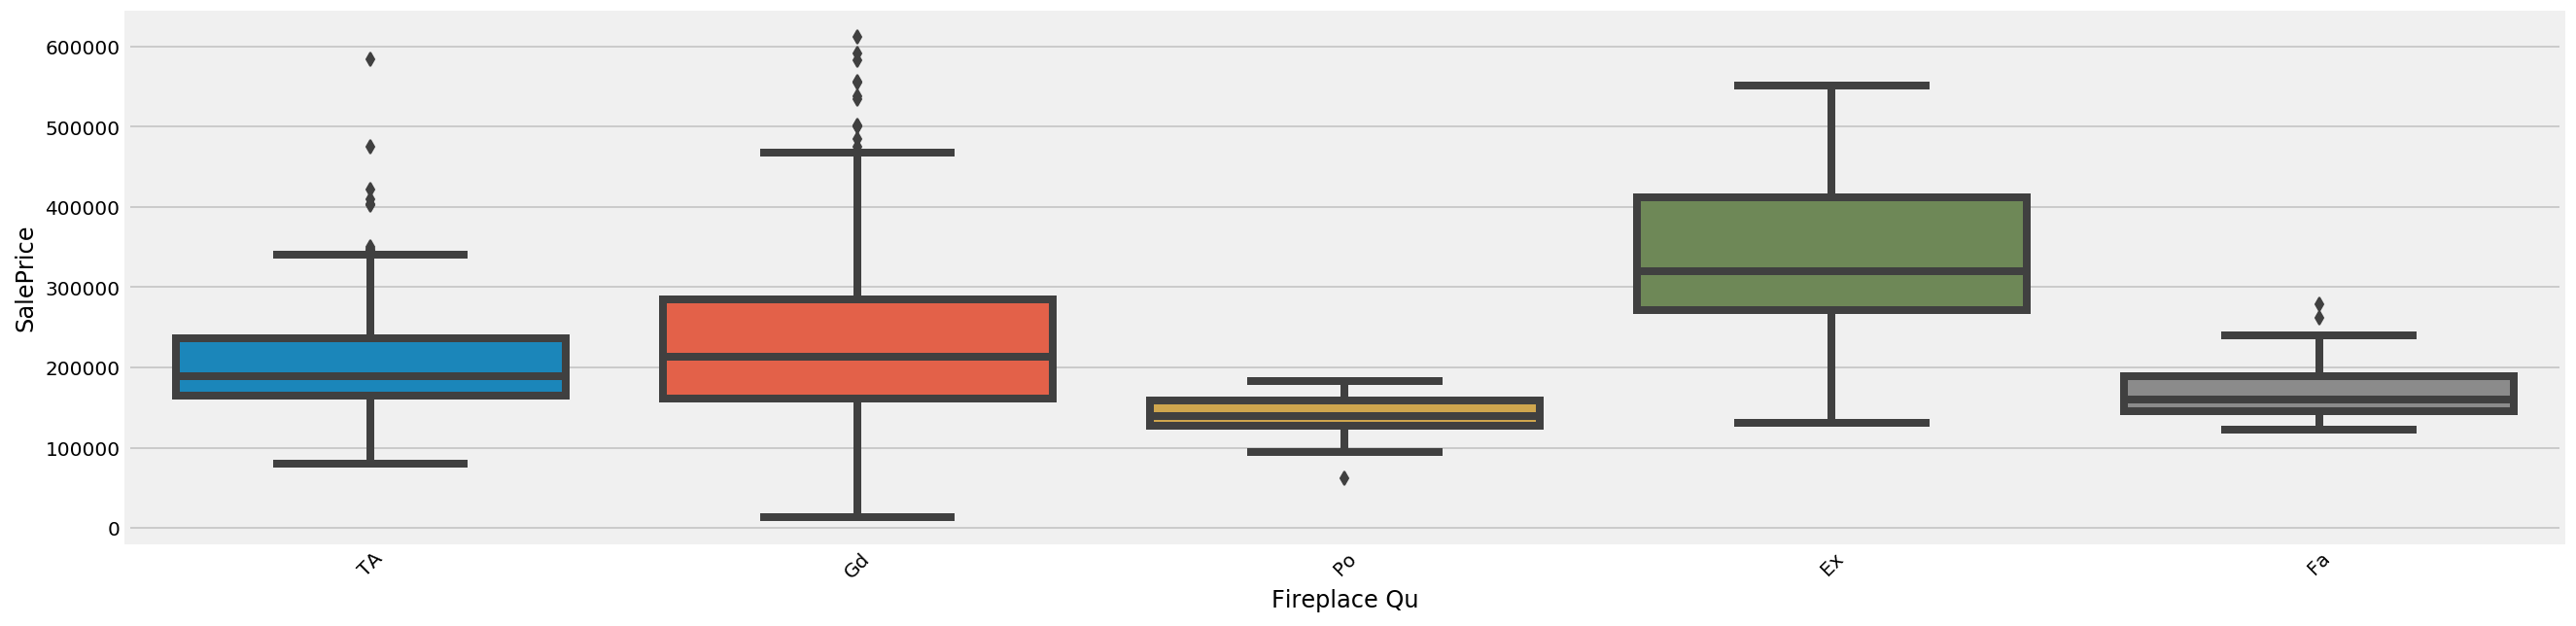

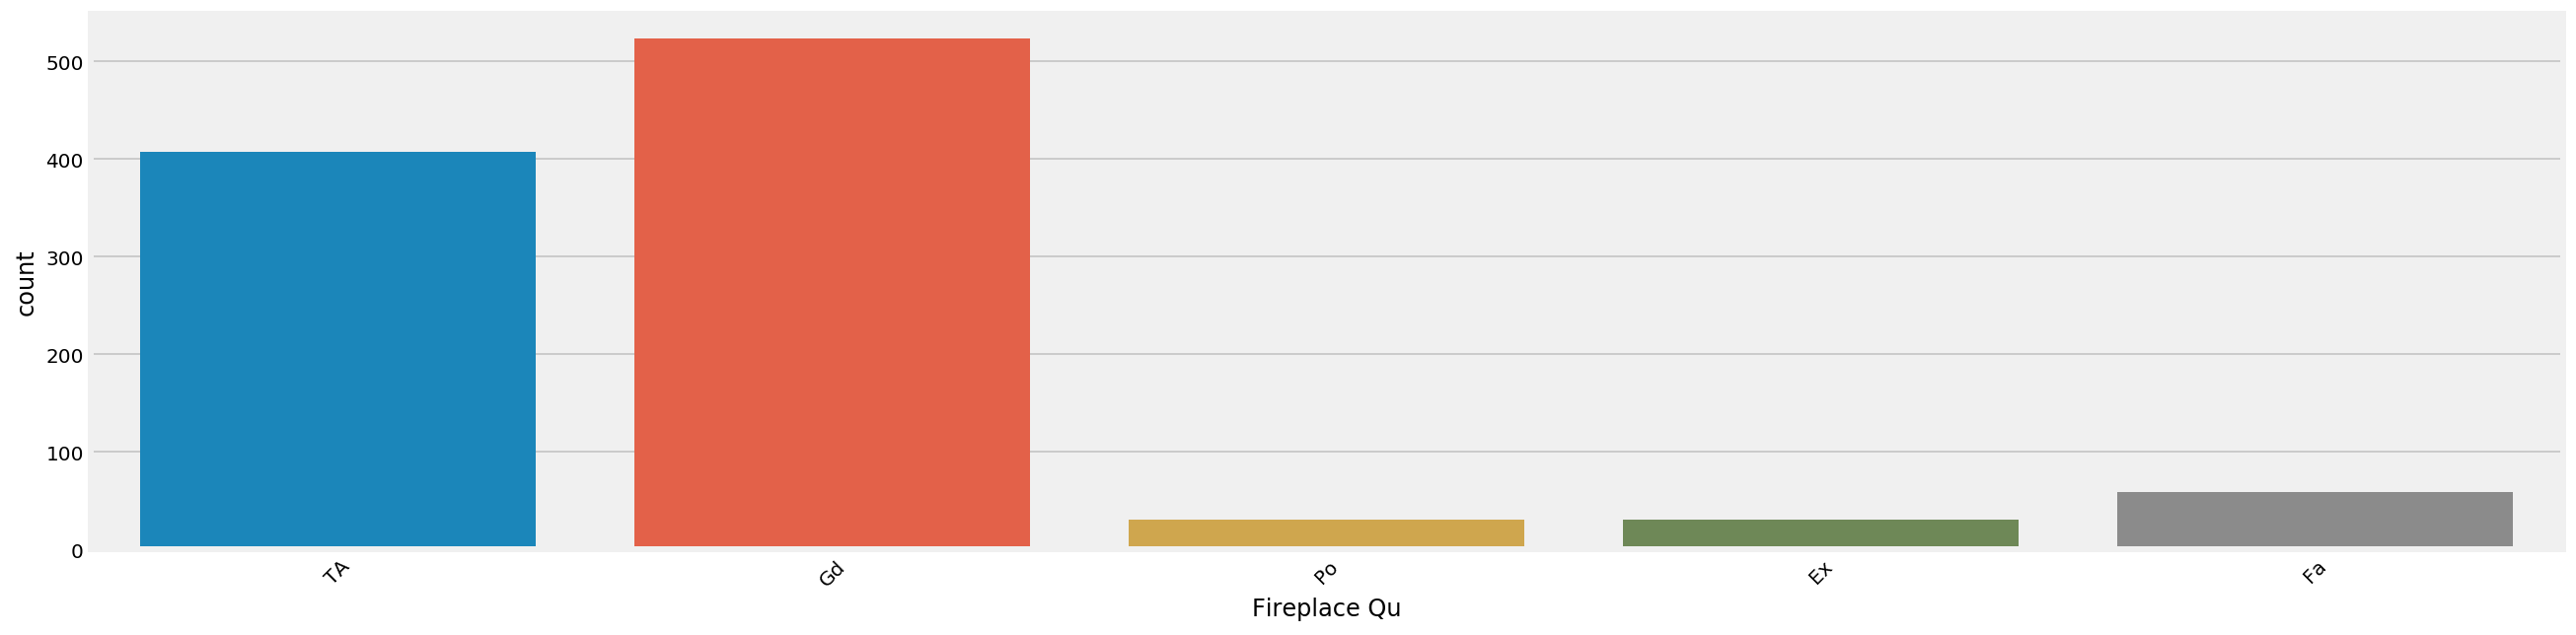

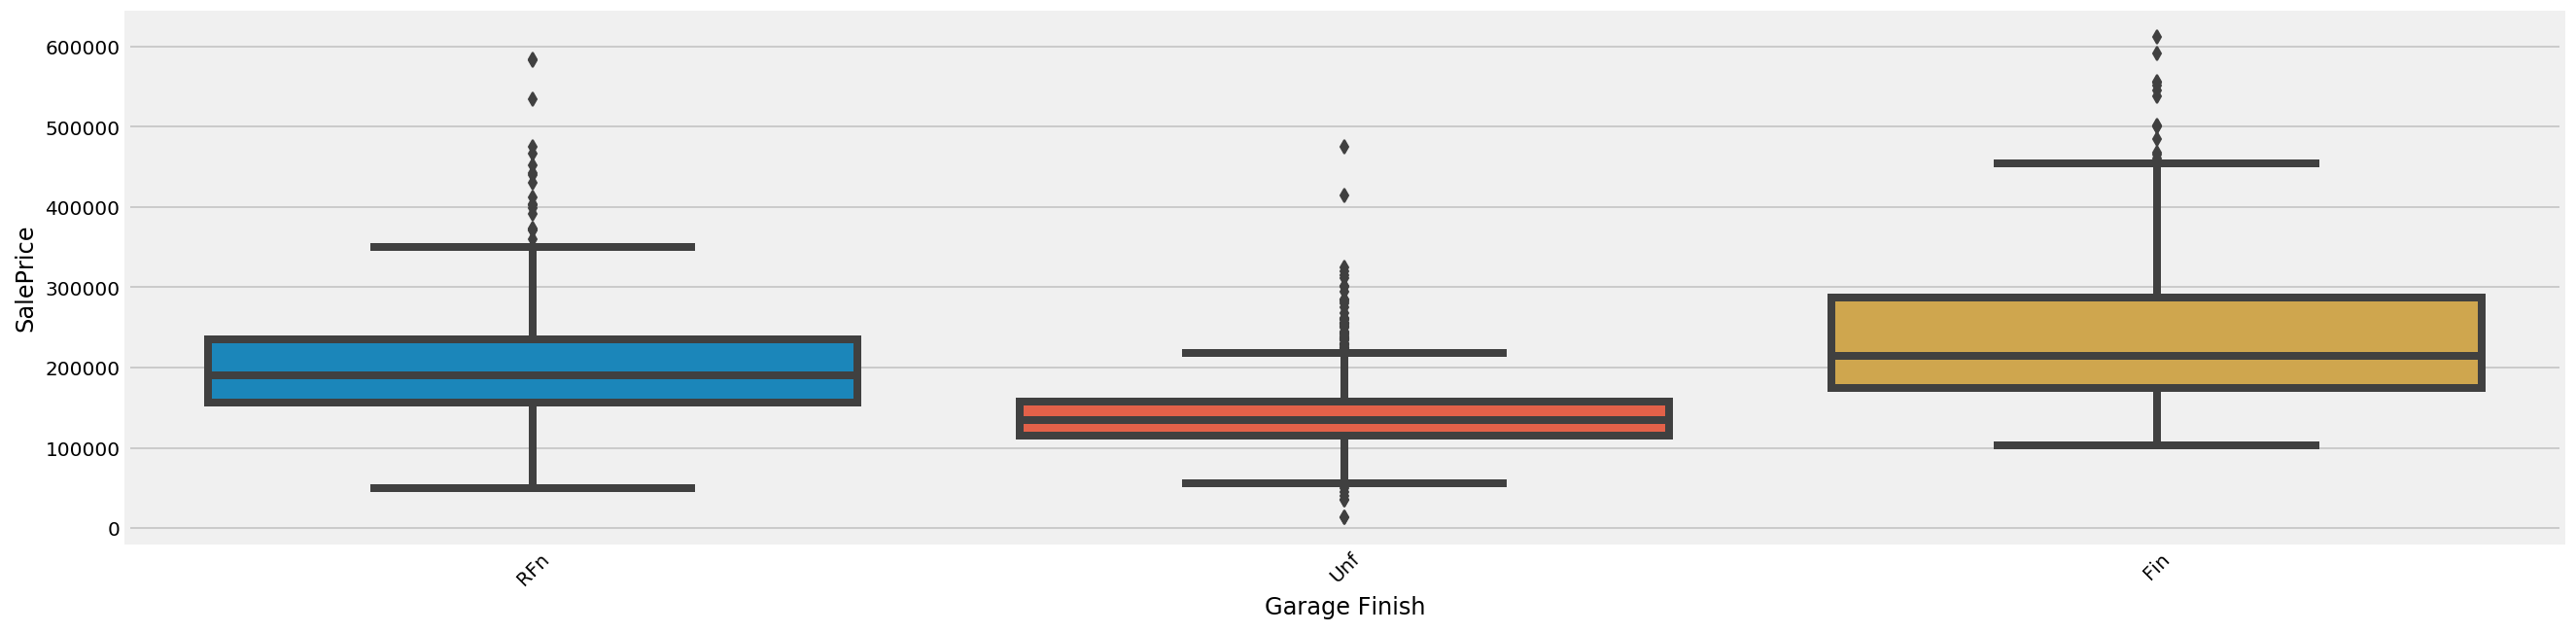

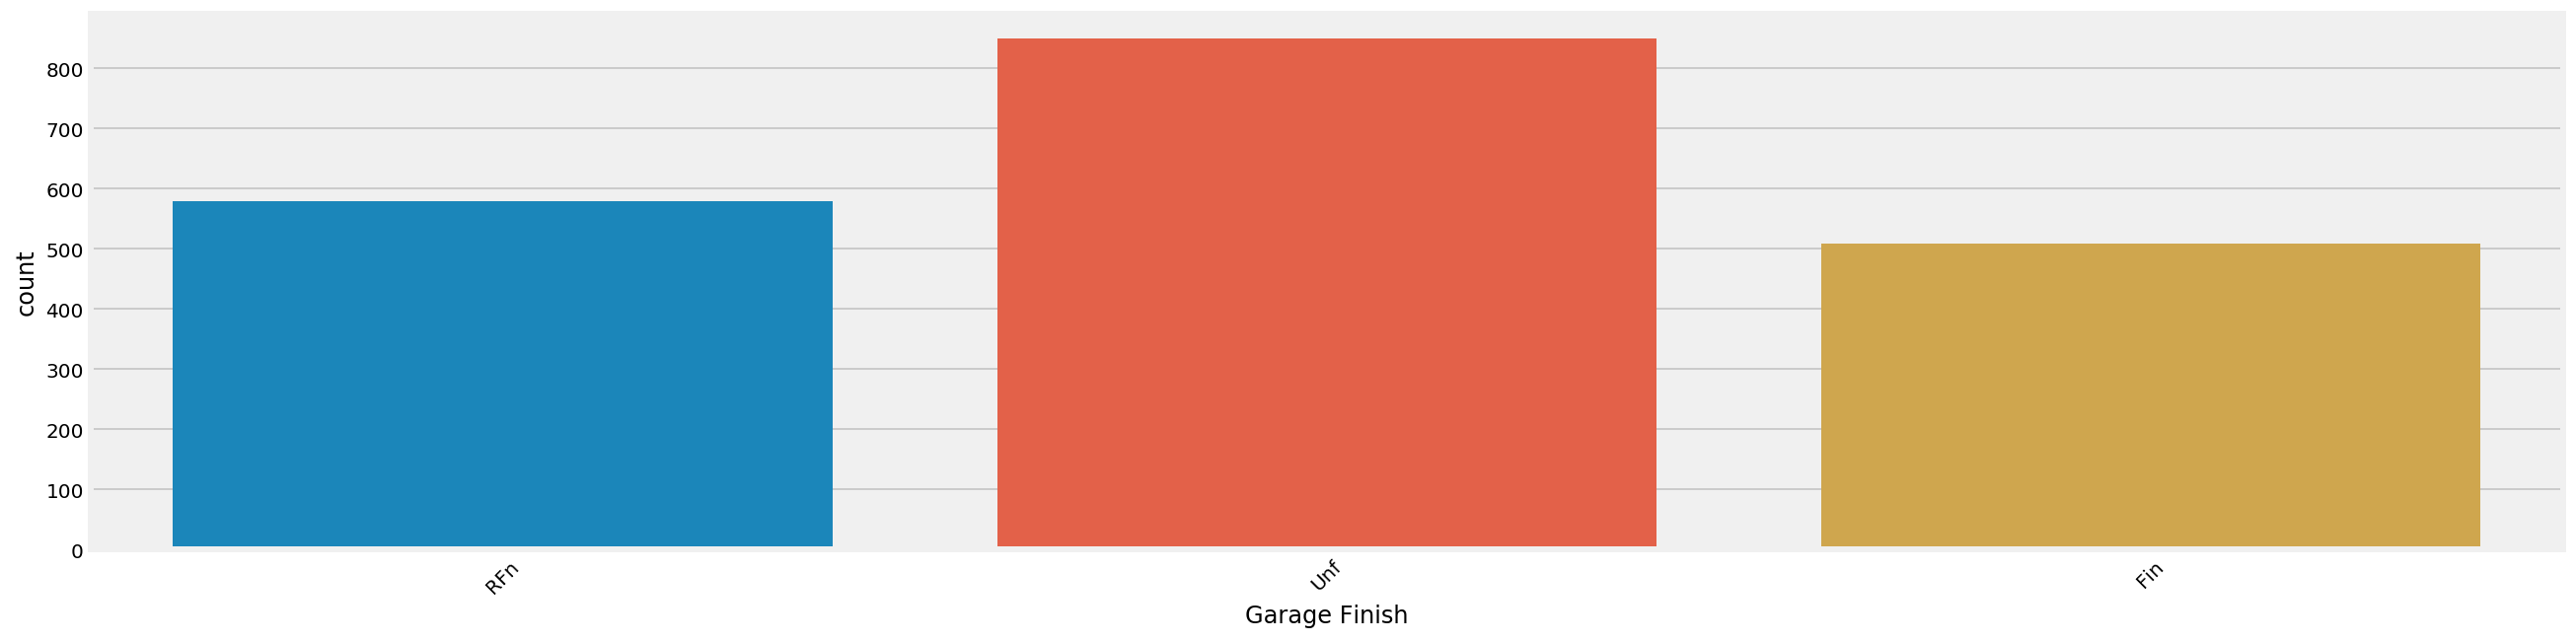

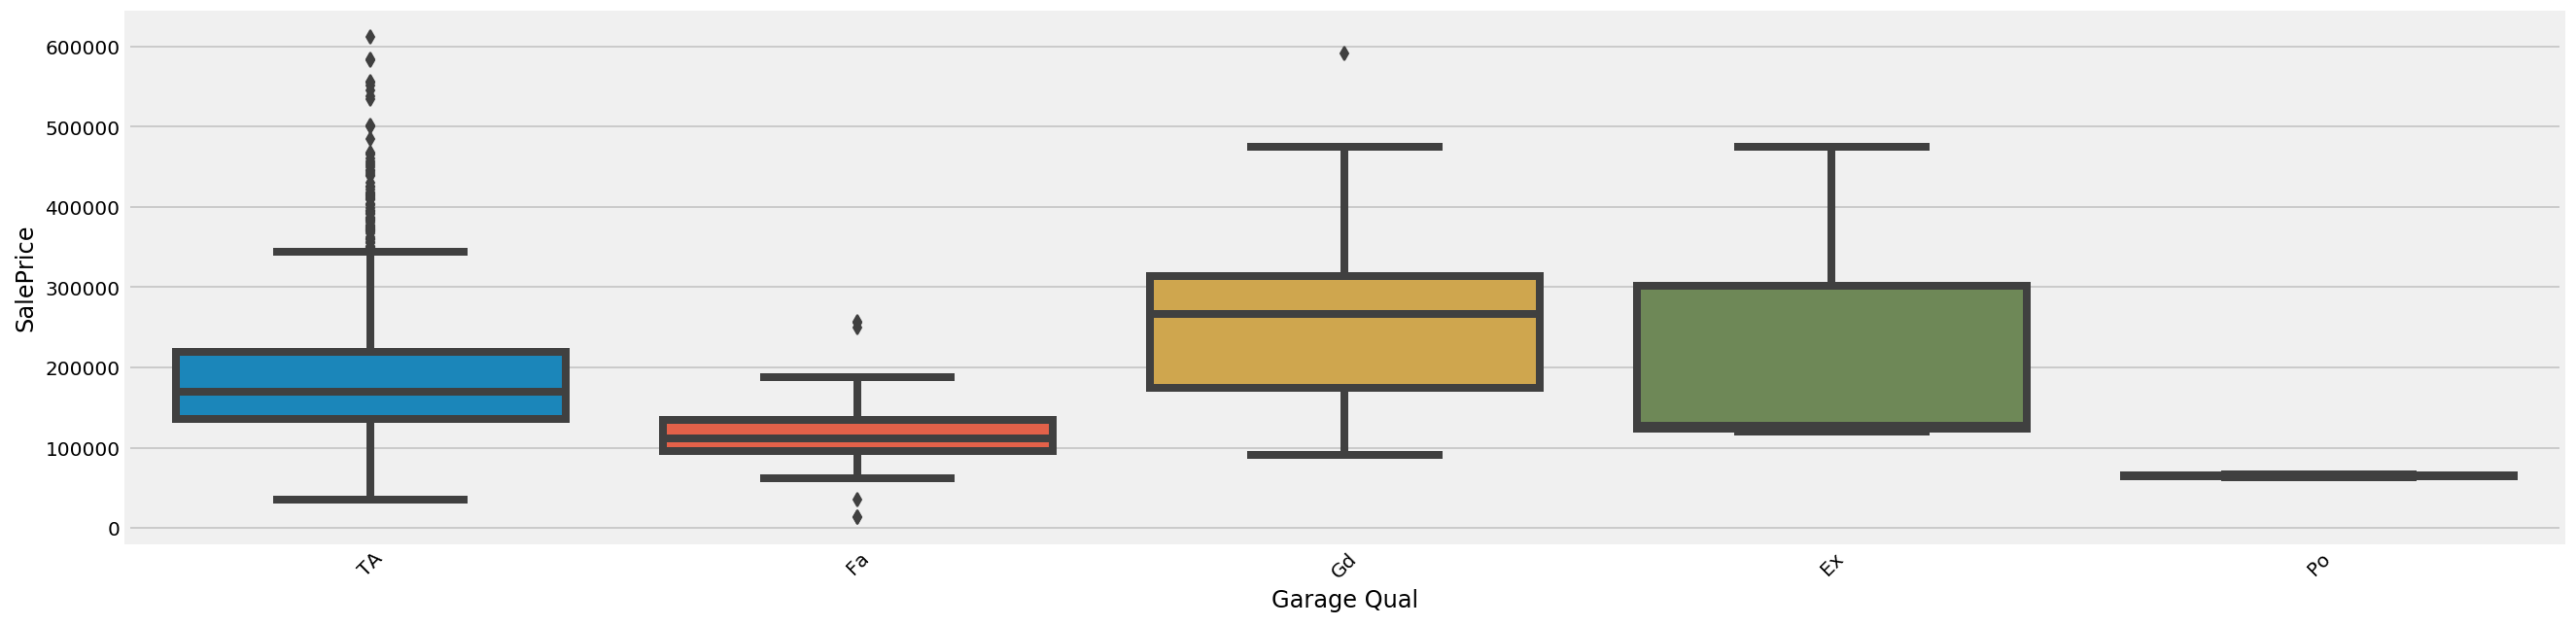

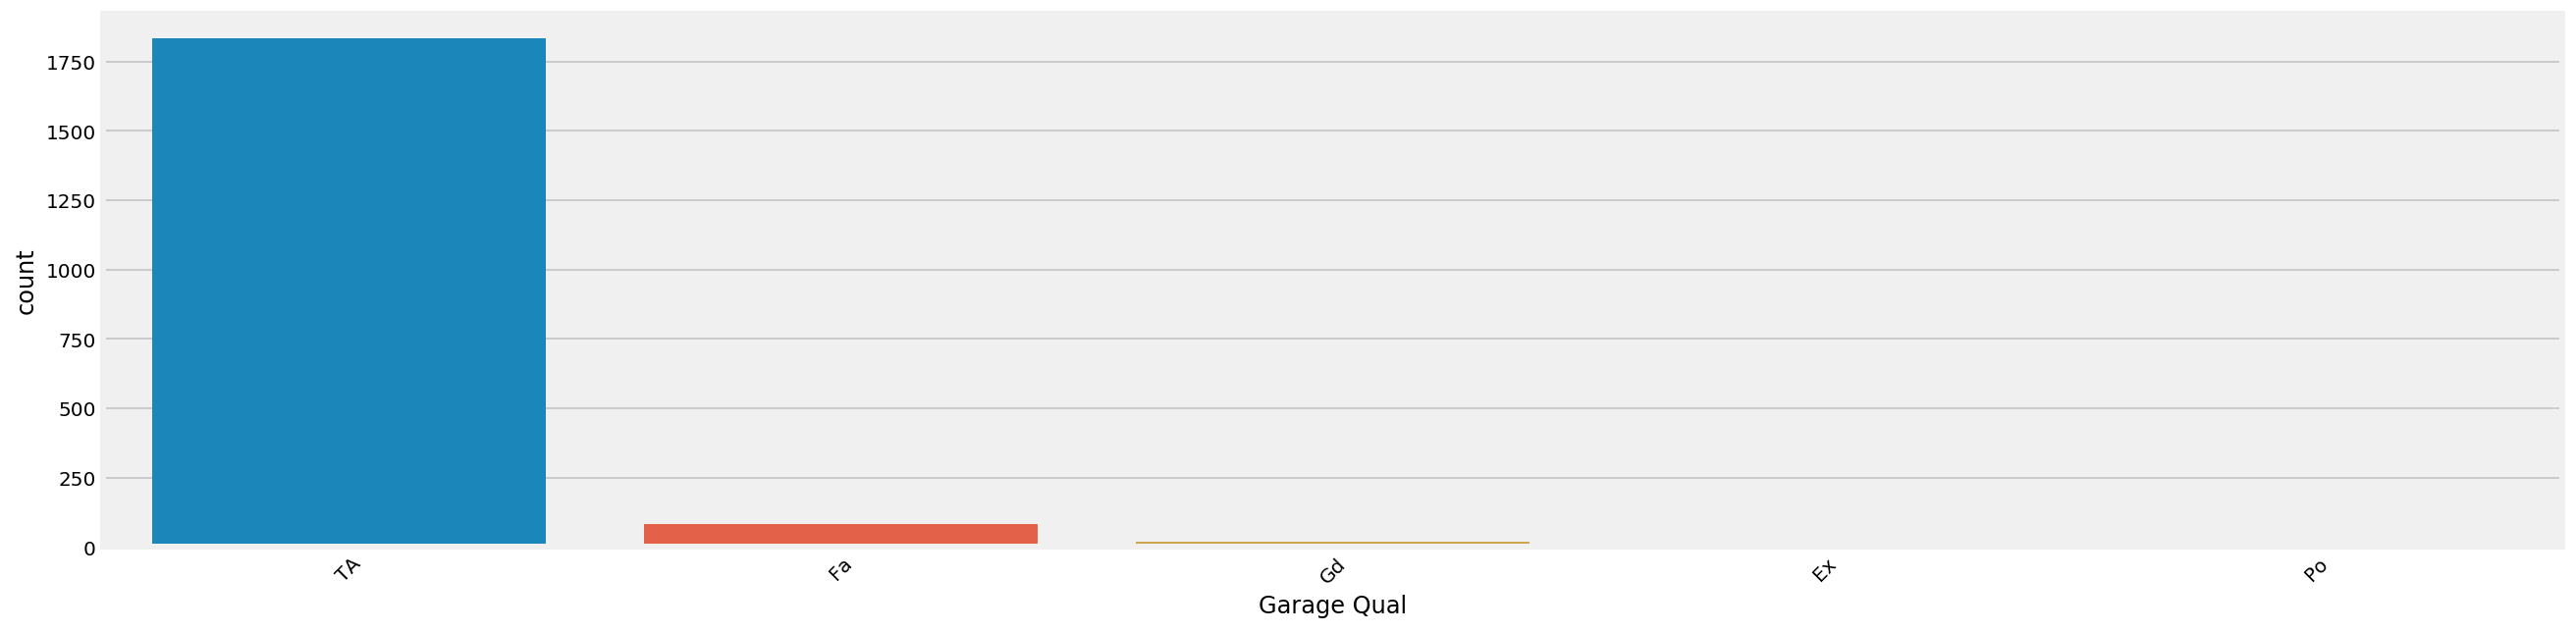

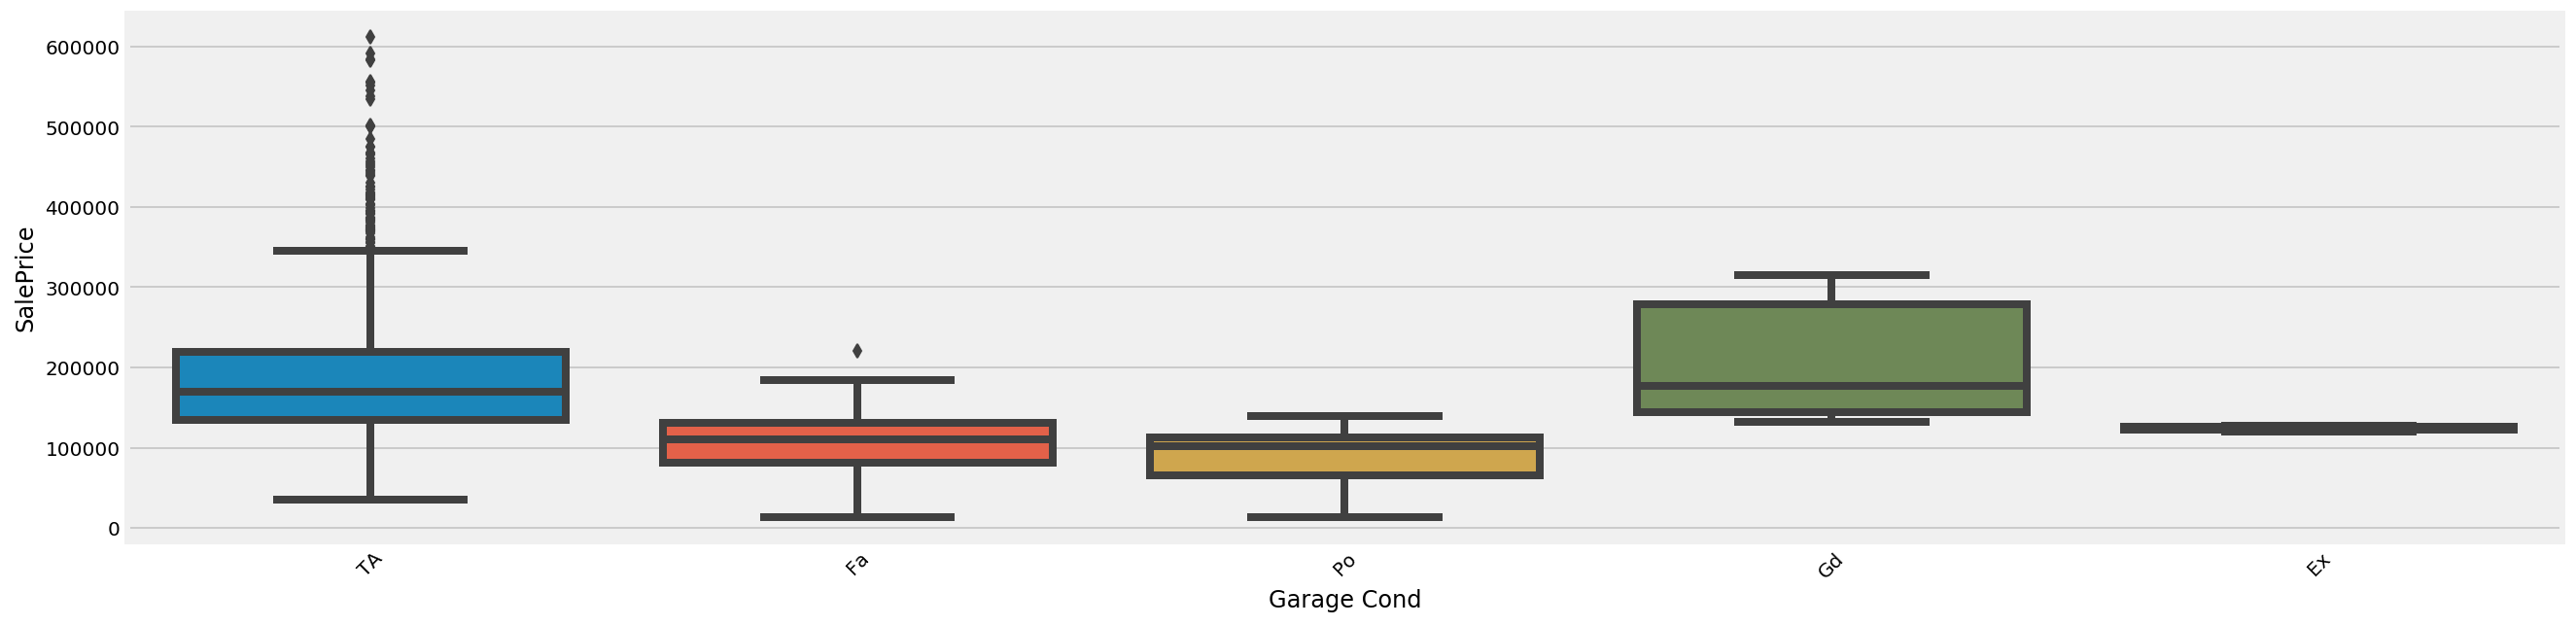

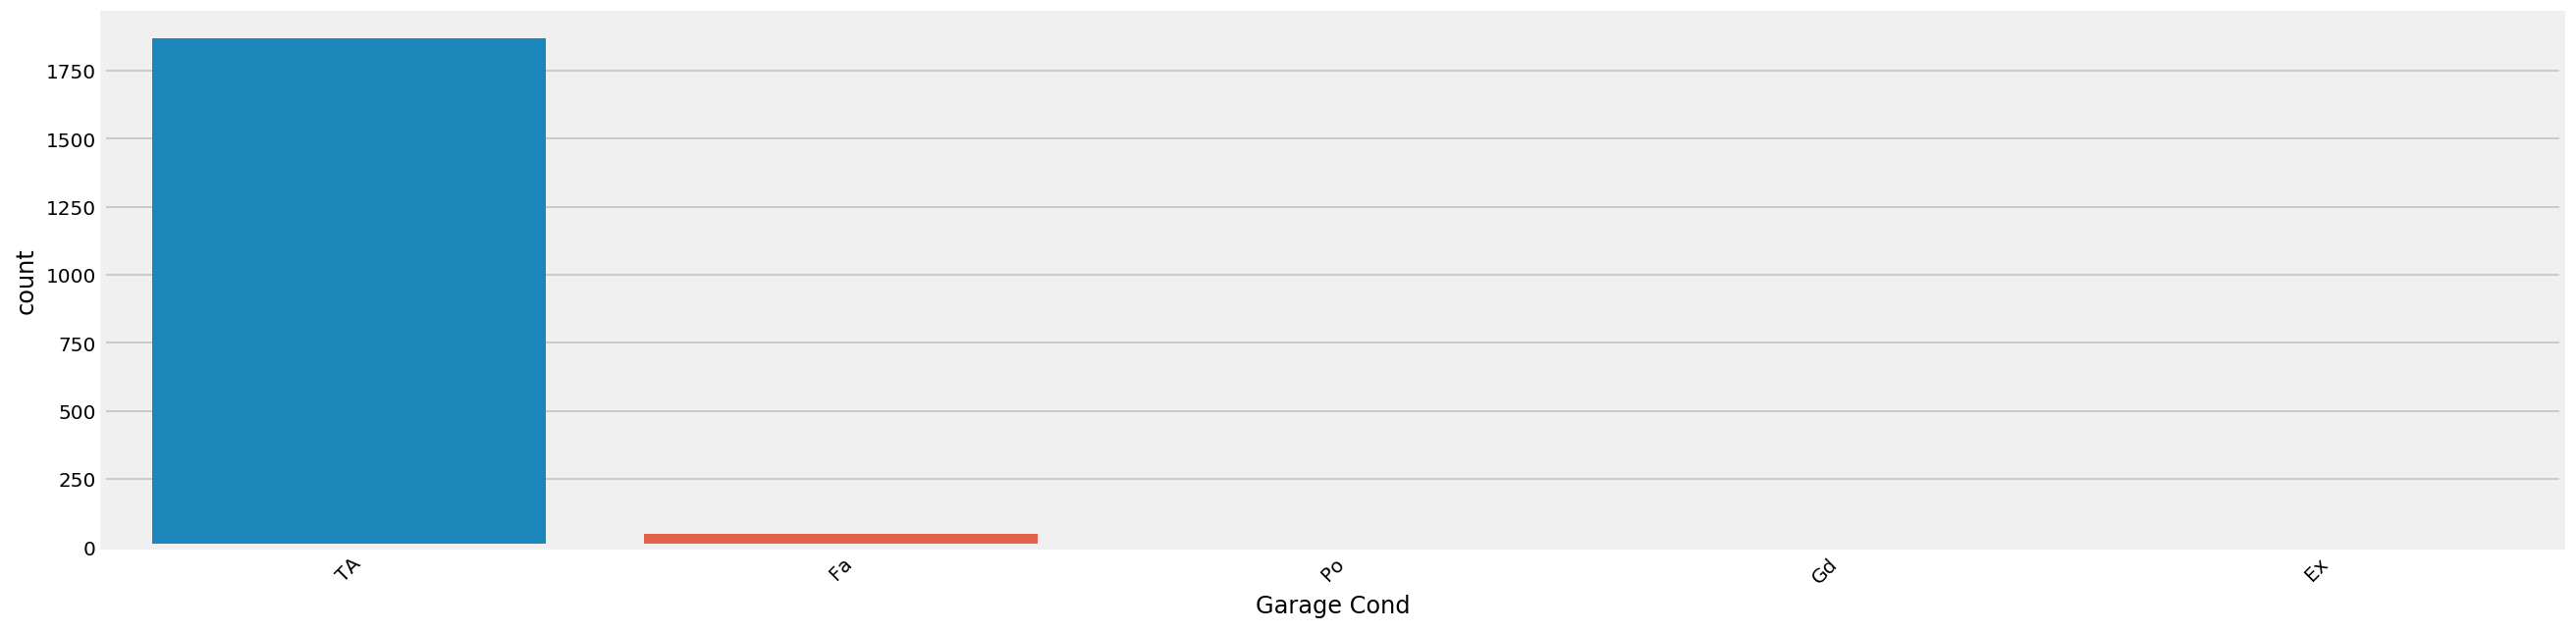

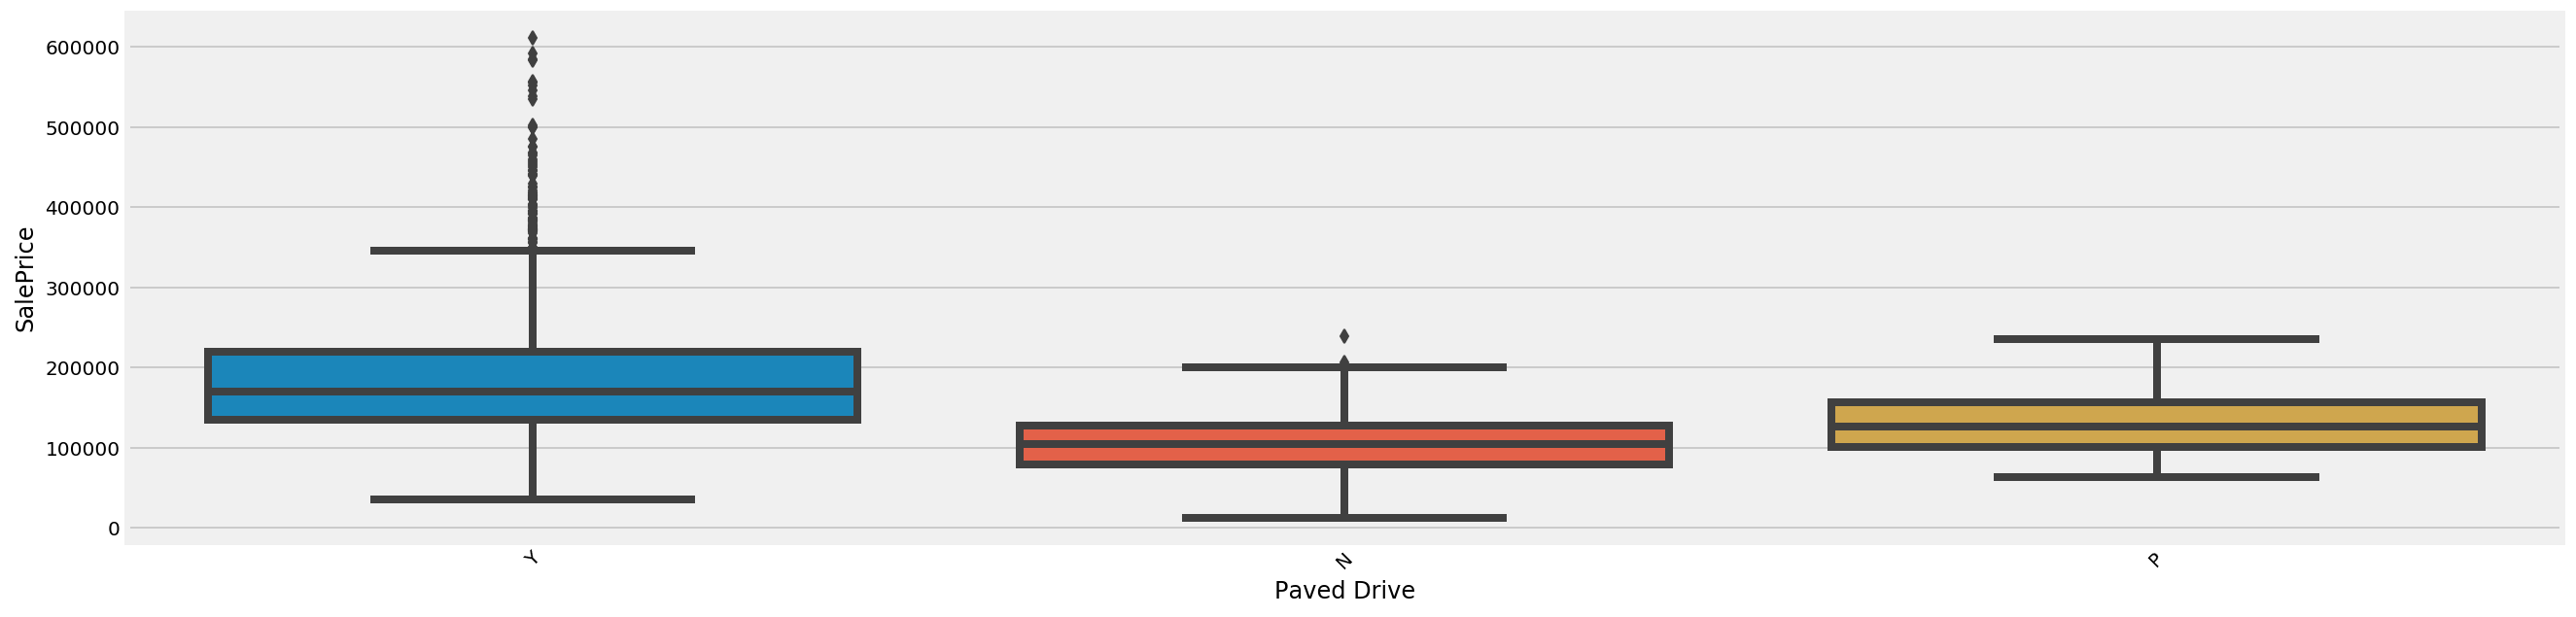

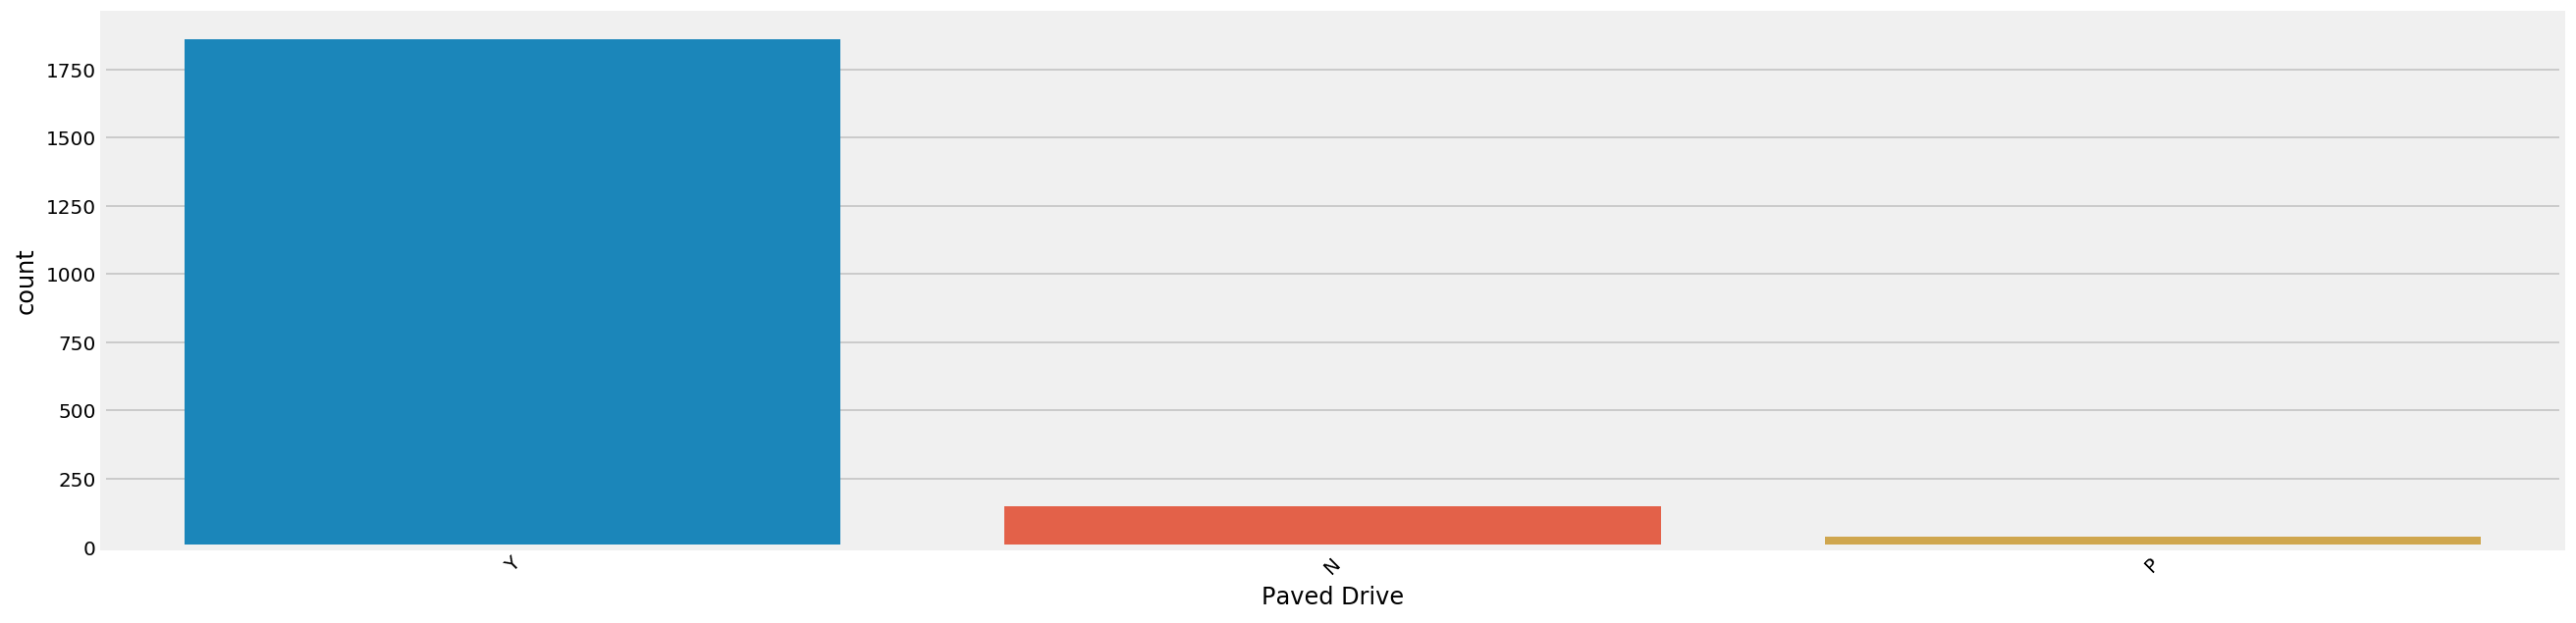

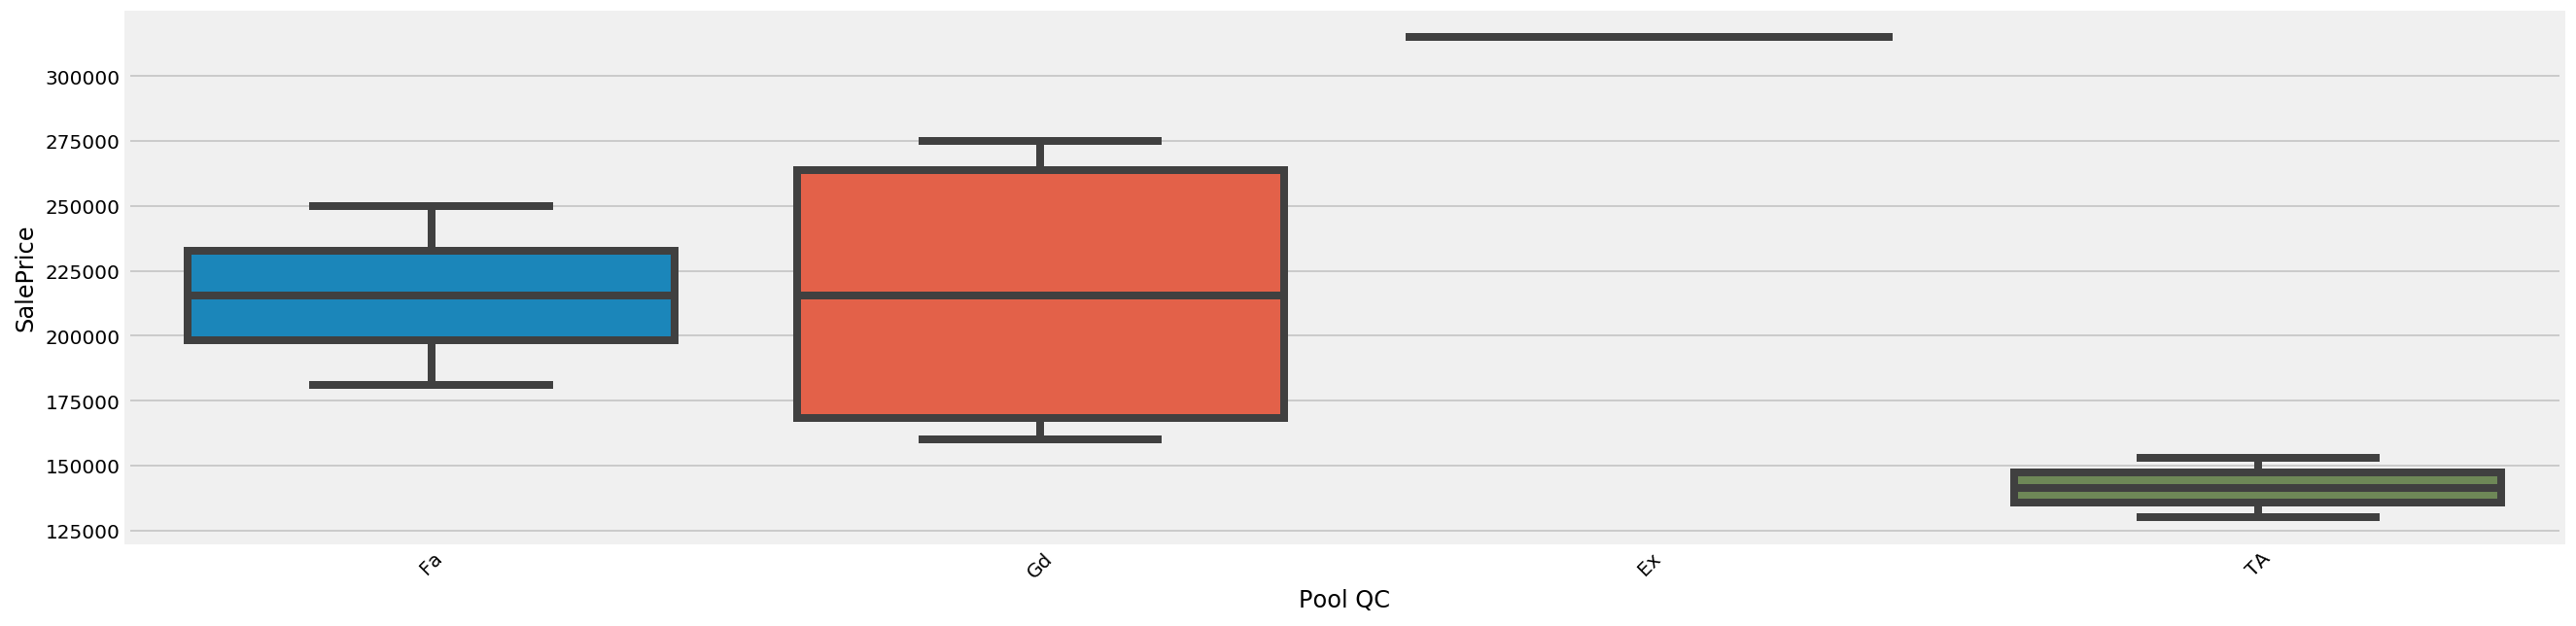

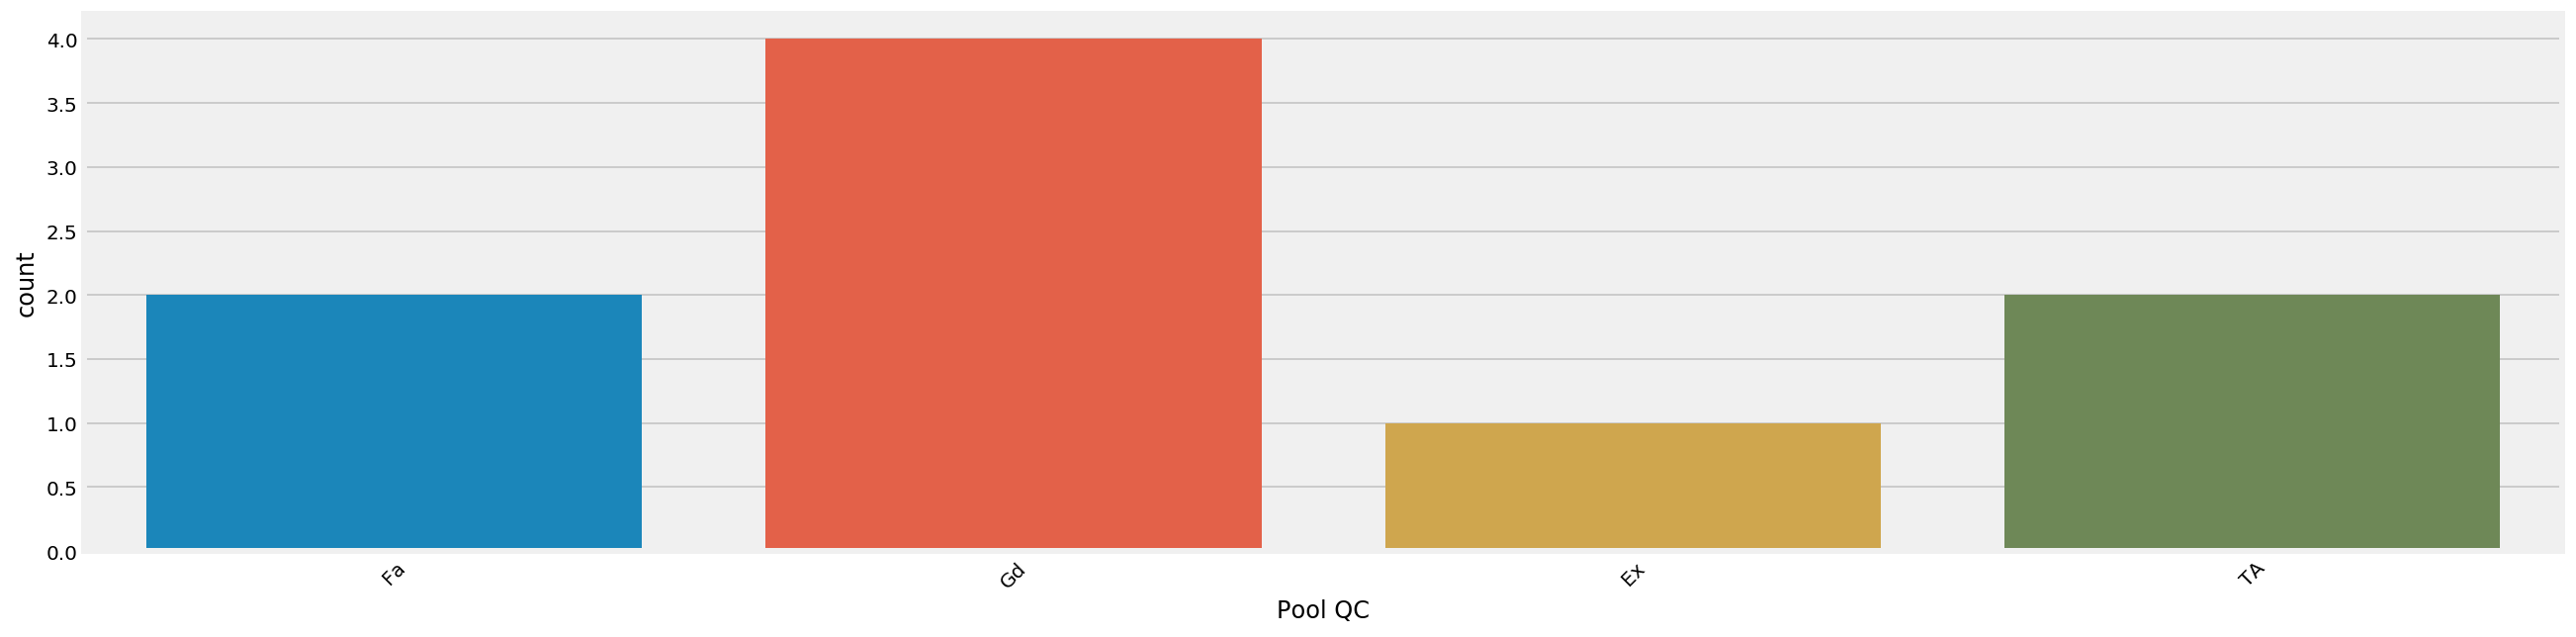

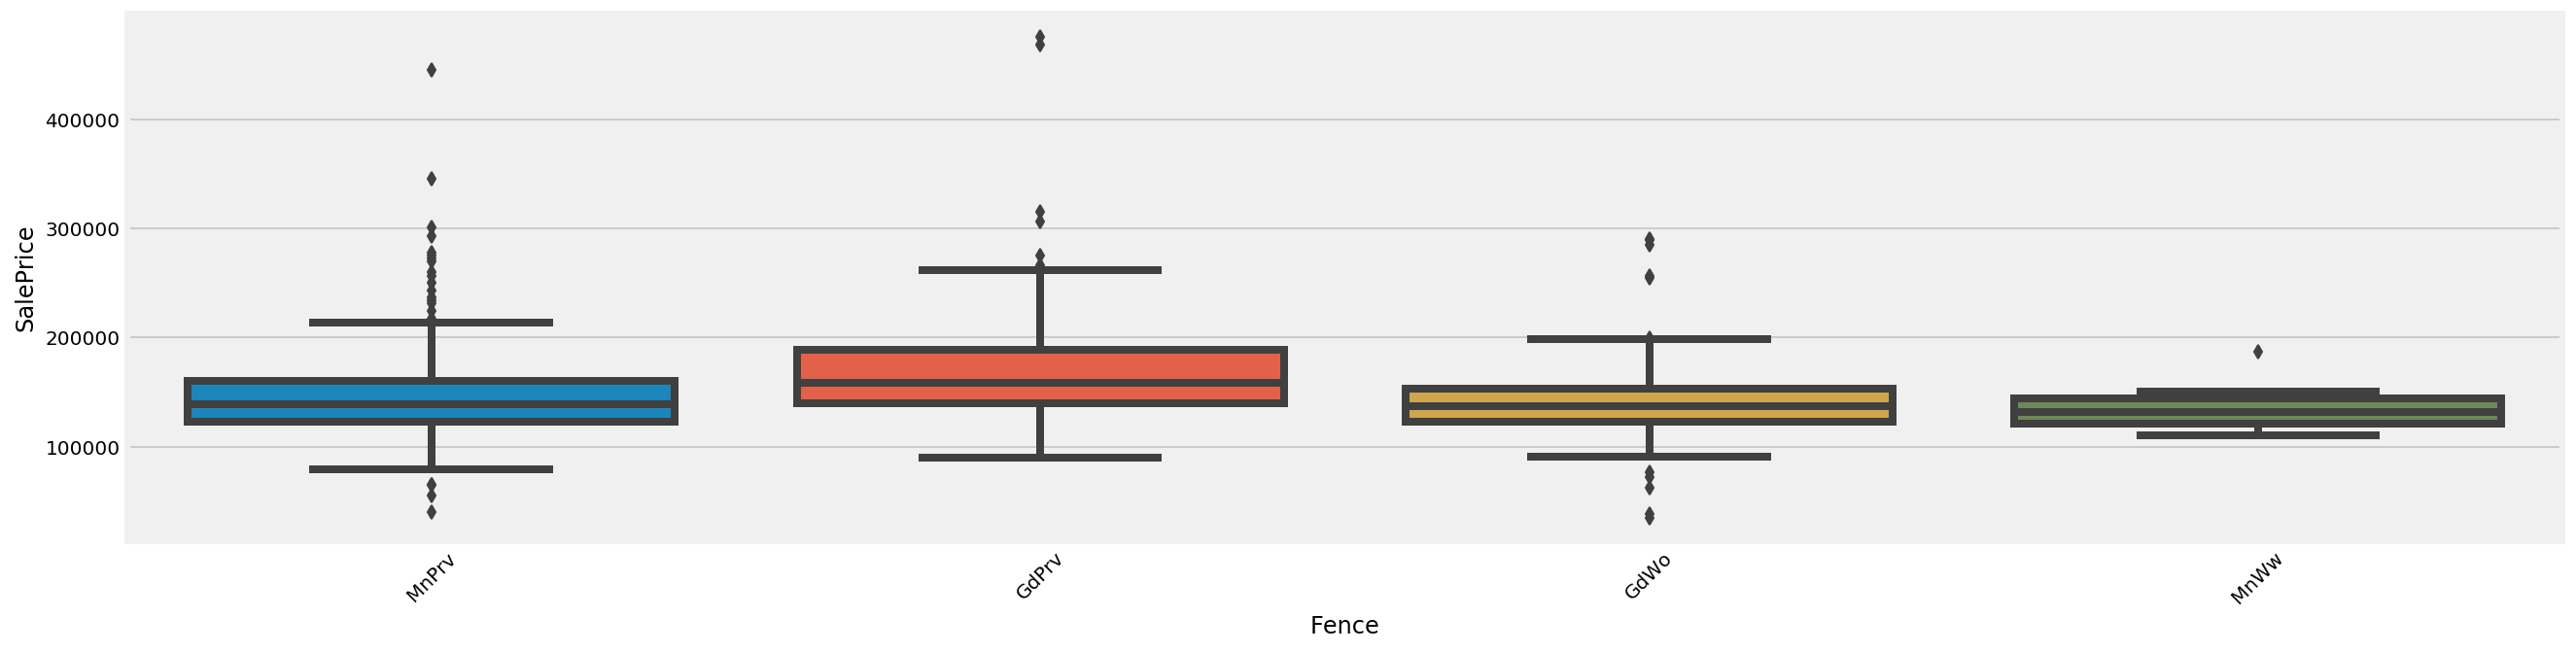

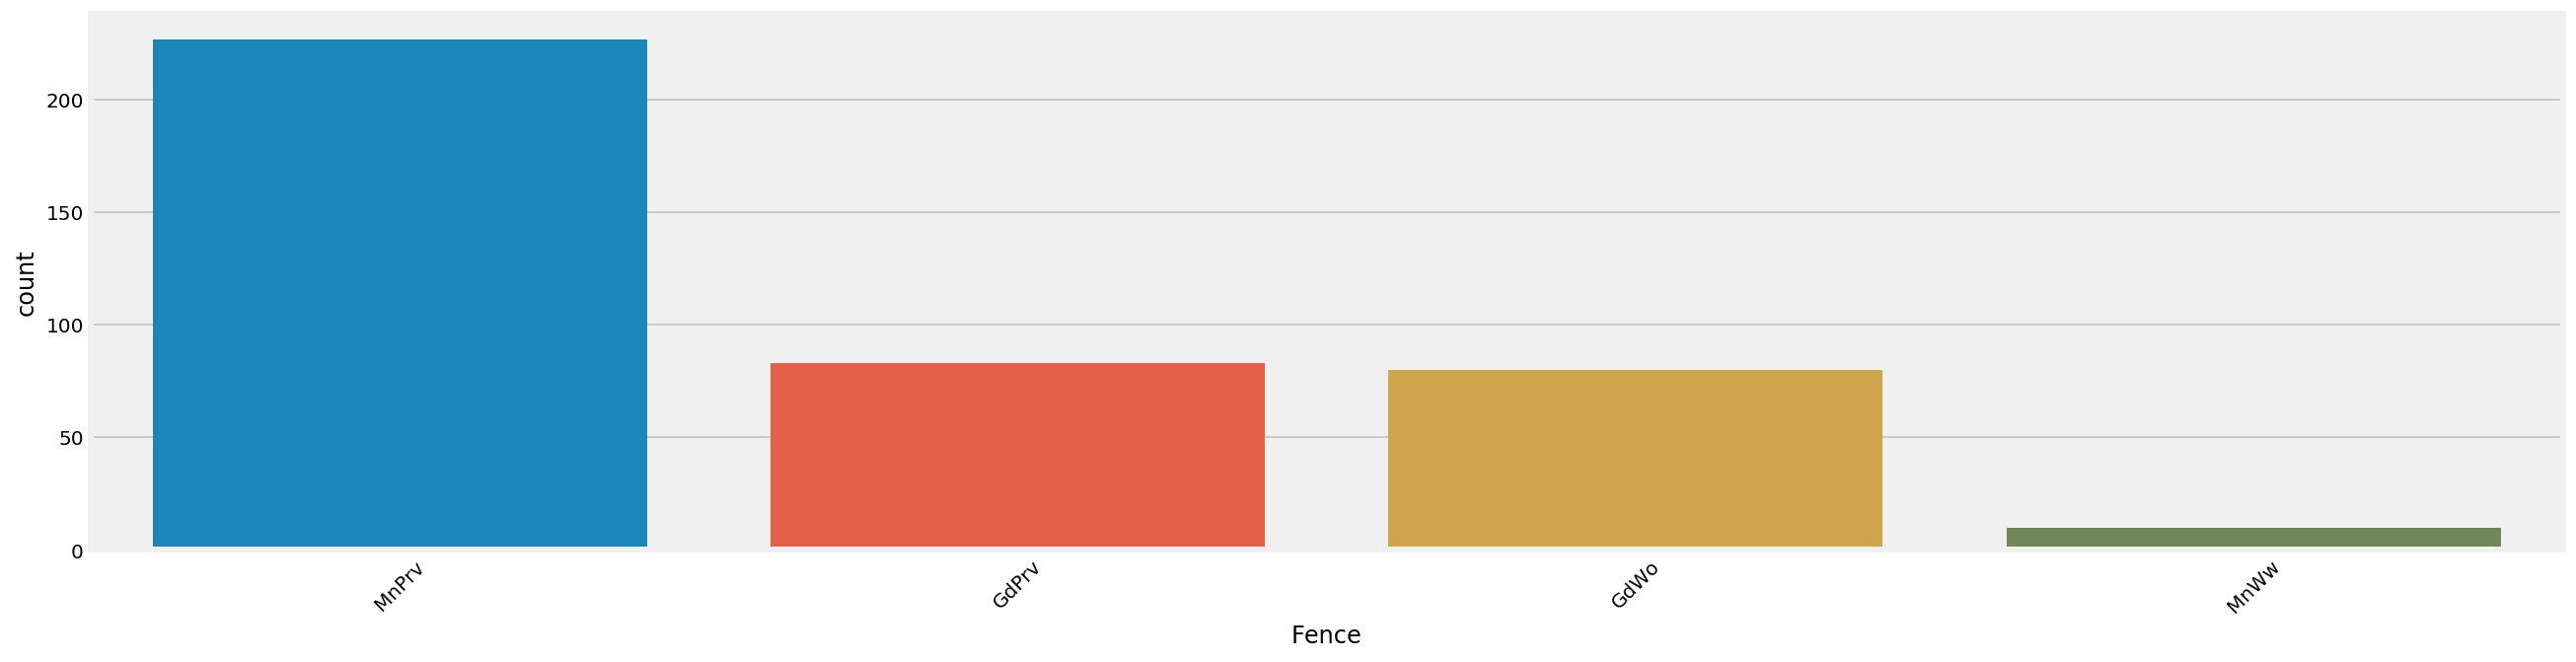

In [27]:
cols=['BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu',
        'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']
for col in cols:
    box_plot(df_train,col)
    count_plot(df_train,col)

From the plots above, we can see the most expensive houses will have the highest Overall Quality. 

#### Data pre-processing

In [28]:
#Read the datasets.
df_train=pd.read_csv("./datasets/train.csv")
df_test=pd.read_csv("./datasets/test.csv")

In [29]:
#Combine both datasets for pre-processing.
df_train['source']=1
df_test['source']=0

data = pd.concat([df_train,df_test], ignore_index = True, sort = False)
data.head(3)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   

   Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
0              1           Gd              6        Typ           0   
1              1           Gd              8        Typ           1   
2              1           Gd              5        Typ           0   

  Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
0          NaN      Attchd         1976.0           RFn          2.0   
1           TA      Attchd         1997.0           RFn          2.0   
2          NaN      Detchd         1953.0           Unf          1.0   

   Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
0        475.0          TA          TA           Y             0   
1        559.0          TA          TA           Y             0   
2        246.0          TA          TA           Y             0   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area Pool QC  \
0             44               0           0             0          0     NaN   
1             74               0           0             0          0     NaN   
2             52               0           0             0          0     NaN   

  Fence Misc Feature  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  source  
0   NaN    

In [30]:
# Make sure the train and test rows are correct.
data['source'].value_counts()

1    2051
0     879
Name: source, dtype: int64

In [31]:
data.drop(["Id","PID"], axis = 1, inplace = True)

Columns 'Garage Cars', '1st Flr SF','TotRms AbvGrd','Garage Yr Blt'are dropped as they showed high correlation with other variables as show in the EDA

In [32]:
data.drop(['Garage Cars', '1st Flr SF','TotRms AbvGrd','Garage Yr Blt'],axis =1, inplace = True)

Columns 'Low Qual Fin SF', '3Ssn Porch','Screen Porch','Pool Area','Misc Val' are dropped as they have high number of zeroes.

In [33]:
data.drop(['Low Qual Fin SF', '3Ssn Porch','Screen Porch','Pool Area','Misc Val'],axis =1, inplace = True)

Columns dropped after running the lasso and ridge models.

In [34]:
data.drop(['Roof Style','Roof Matl','Misc Feature',
           'Sale Type','Mas Vnr Type'],axis =1, inplace = True)

### Dealing with Null values

In [35]:
print(data.isnull().sum().sort_values(ascending=False).head(30))

Pool QC           2917
Alley             2732
Fence             2358
Fireplace Qu      1422
SalePrice          879
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Bsmt Unf SF          1
Total Bsmt SF        1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Area          1
Electrical           1
Overall Cond         0
Year Remod/Add       0
Exterior 1st         0
Year Built           0
Condition 1          0
Overall Qual         0
dtype: int64


In [36]:
# Check which columns in dataset contain null values.
print(data.loc[:, data.isna().any()].columns)
print("Number of columns with null: {}\n".format(len(data.loc[:, data.isna().any()].columns)))

Index(['Lot Frontage', 'Alley', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC',
       'Fence', 'SalePrice'],
      dtype='object')
Number of columns with null: 24



#### Feature Engineering

As OverallQual, GrLivArea have high correlation with SalePrice, the higher powers of OverallQual and GrLivArea will help the model.

In [37]:
# Creates Polynomial features:
for col in ['Overall Qual', 'Gr Liv Area']:
    data[col+'_p2'] = data[col] **2
    data[col+'_p3'] = data[col] **3

#### Handling outliers and  null values.

We use the mean to input null values for the following:'Lot Frontage', 'Mas Vnr Area' and mean to replace outlier value more than 300.

In [38]:
mean = data['Lot Frontage'].mean()
median = data['Lot Frontage'].median()
data['Lot Frontage'] = data.apply(lambda x: mean if x['Lot Frontage'] > 300 else x['Lot Frontage'],axis=1)
data['Lot Frontage'].fillna(median, inplace=True)

In [39]:
mean = data['Mas Vnr Area'].mean()
median = data['Mas Vnr Area'].median()
data['Mas Vnr Area'] = data.apply(lambda x: mean if x['Mas Vnr Area'] > 1400 else x['Mas Vnr Area'],axis=1)
data['Mas Vnr Area'].fillna(median, inplace=True)

We use the mean to replace the outliers values for the following.
'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF','Gr Liv Area'

In [40]:
mean = data['Gr Liv Area'].mean()
data['Gr Liv Area'] = data.apply(lambda x: mean if x['Gr Liv Area'] > 5000 else x['Gr Liv Area'],axis=1).astype(float)

In [41]:
mean = data['Lot Area'].mean()
data['Lot Area'] = data.apply(lambda x: mean if x['Lot Area'] > 100000 else x['Lot Area'],axis=1)

In [42]:
mean = data['BsmtFin SF 1'].mean()
data['BsmtFin SF 1'] = data.apply(lambda x: mean if x['BsmtFin SF 1'] > 3500 else x['BsmtFin SF 1'],axis=1)

In [43]:
mean = data['BsmtFin SF 2'].mean()
data['BsmtFin SF 2'] = data.apply(lambda x: mean if x['BsmtFin SF 2'] > 1200 else x['BsmtFin SF 2'],axis=1)

In [44]:
mean = data['Total Bsmt SF'].mean()
data['Total Bsmt SF'] = data.apply(lambda x: mean if x['Total Bsmt SF'] > 5000 else x['Total Bsmt SF'],axis=1)

In [45]:
mean = data['Wood Deck SF'].mean()
data['Wood Deck SF'] = data.apply(lambda x: mean if x['Wood Deck SF'] > 1400 else x['Wood Deck SF'],axis=1)

In [46]:
mean = data['Open Porch SF'].mean()
data['Open Porch SF'] = data.apply(lambda x: mean if x['Open Porch SF'] > 400 else x['Open Porch SF'],axis=1)

Taking care of null values for numeric and non-numeric features.

For numeric features, we use zero.
For non-numeric features, we use NA.

In [47]:
#Check for the feature types in each column in the dataset.
print(data.select_dtypes(include=[np.number]).columns)
print("Number of columns with numeric features: {}\n" .format(len(data.select_dtypes(include=[np.number]).columns)))
print(data.select_dtypes(include='object').columns)
print("Number of columns with non numeric features: {}\n" .format(len(data.select_dtypes(include='object').columns)))

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', 'Mo Sold', 'Yr Sold', 'SalePrice', 'source',
       'Overall Qual_p2', 'Overall Qual_p3', 'Gr Liv Area_p2',
       'Gr Liv Area_p3'],
      dtype='object')
Number of columns with numeric features: 33

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Typ

In [48]:
print(data.isnull().sum().sort_values(ascending=False).head(30))

Pool QC           2917
Alley             2732
Fence             2358
Fireplace Qu      1422
SalePrice          879
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
Total Bsmt SF        1
Mas Vnr Area         0
Exterior 2nd         0
Exterior 1st         0
Year Remod/Add       0
Year Built           0
Overall Cond         0
Condition 1          0
Overall Qual         0
dtype: int64


In [49]:
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(0, inplace=True)

In [50]:
for col in data.select_dtypes(include='object').columns:
    data[col].fillna('NA', inplace=True)

In [51]:
#Checks if there are still null values
print(data.loc[:, data.isna().any()].columns)
print("Number of columns with null: {}\n".format(len(data.loc[:, data.isna().any()].columns)))

Index([], dtype='object')
Number of columns with null: 0



Encodes the Orindal variables.

In [52]:
# Ordinal variables
data['Lot Shape']=data['Lot Shape'].replace({'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})
data.Utilities = data.Utilities.replace({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
data['Land Slope'] = data['Land Slope'].replace({'Gtl':2, 'Mod':1, 'Sev':0})
data['BsmtFin Type 1']=data['BsmtFin Type 1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
data['BsmtFin Type 2']=data['BsmtFin Type 2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
data['Central Air']=data['Central Air'].replace({'N':0,'Y':1})
data['Electrical']=data['Electrical'].replace({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1, 'NA':0})
data['Functional']=data['Functional'].replace({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})
data['Garage Finish']=data['Garage Finish'].replace({'Fin':3,'RFn':2,'Unf':1,'NA':0,})
data['Paved Drive']=data['Paved Drive'].replace({'Y':2,'P':1,'N':0})
data['Fence']=data['Fence'].replace({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0})

In [53]:
# Ordinal variables
for col in ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Heating QC',
            'Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond','Pool QC']:
    data[col]=data[col].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
data['Bsmt Exposure']=data['Bsmt Exposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})

As stated from the analysis, we can group the other categories into one new category for variables Heating 1, Condition 1 and Condition 2.

In [54]:
data.Street=data.Street.replace({'Grvl':0,'Pave':1})
data.Alley=data.Alley.replace({'Grvl':0,'Pave':1,'NA':0})
data['Heating']=data['Heating'].replace({'Floor':0,'GasA':1,'GasW':0,'Grav':0,'OthW':0,'Wall':0})
data['Condition 1']=data['Condition 1'].replace({'Artery':0,'Feedr':0,'Norm':1,'RRNn':0,'RRAn':0,'PosN':0,'PosA':0,'RRNe':0,
                                             'RRAe':0})
data['Condition 2']=data['Condition 2'].replace({'Artery':0,'Feedr':0,'Norm':1,'RRNn':0,'RRAn':0,'PosN':0,'PosA':0,'RRNe':0,
                                             'RRAe':0})

In [55]:
data.shape

(2930, 70)

In [56]:
# Checks if there is still non-numeric values
print(data.select_dtypes(include='object').columns)
print("Number of columns in with non numeric features: {}\n" .format(len(data.select_dtypes(include='object').columns)))

Index(['MS Zoning', 'Land Contour', 'Utilities', 'Lot Config', 'Neighborhood',
       'Bldg Type', 'House Style', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Heating QC', 'Kitchen Qual',
       'Garage Type'],
      dtype='object')
Number of columns in with non numeric features: 15



In [57]:
cols=['Utilities', 'Exter Qual', 'Exter Cond', 'Heating QC', 'Kitchen Qual']
data[cols] = data[cols].apply(pd.to_numeric)

In [58]:
# Checks if there is still non-numeric values
print(data.select_dtypes(include='object').columns)
print("Number of columns in with non numeric features: {}\n" .format(len(data.select_dtypes(include='object').columns)))

Index(['MS Zoning', 'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Exterior 1st', 'Exterior 2nd', 'Foundation',
       'Garage Type'],
      dtype='object')
Number of columns in with non numeric features: 10



In [59]:
data=pd.get_dummies(data=data)

In [60]:
data.shape

(2930, 163)

In [61]:
# Checks if there is non-numeric values
print(data.select_dtypes(include='object').columns)
print("Number of columns in with non numeric features: {}\n" .format(len(data.select_dtypes(include='object').columns)))

Index([], dtype='object')
Number of columns in with non numeric features: 0



In [62]:
data.head()

MS SubClass  Lot Frontage  Lot Area  Street  Alley  Lot Shape  Utilities  \
0           60          68.0   13517.0       1      0          2          3   
1           60          43.0   11492.0       1      0          2          3   
2           20          68.0    7922.0       1      0          3          3   
3           60          73.0    9802.0       1      0          3          3   
4           50          82.0   14235.0       1      0          2          3   

   Land Slope  Condition 1  Condition 2  Overall Qual  Overall Cond  \
0           2            0            1             6             8   
1           2            1            1             7             5   
2           2            1            1             5             7   
3           2            1            1             5             5   
4           2            1            1             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  \
0        1976            2005         289.0           4           3   
1        1996            1997         132.0           4           3   
2        1953            2007           0.0           3           4   
3        2006            2007           0.0           3           3   
4        1900            1993           0.0           3           3   

   Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  \
0          3          3              1               6         533.0   
1          4          3              1               6         637.0   
2          3          3              1               6         731.0   
3          4          3              1               1           0.0   
4          2          4              1               1           0.0   

   BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Heating  \
0               1           0.0        192.0          725.0        1   
1               1           0.0        276.0          913.0        1   
2               1           0.0        326.0         1057.0        1   
3               1           0.0        384.0          384.0        1   
4               1           0.0        676.0          676.0        1   

   Heating QC  Central Air  Electrical  2nd Flr SF  Gr Liv Area  \
0           5            1           5         754       1479.0   
1           5            1           5        1209       2122.0   
2           3            1           5           0       1057.0   
3           4            1           5         700       1444.0   
4           3            1           5         614       1445.0   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4             0.0             0.0          2          0              3   

   Kitchen AbvGr  Kitchen Qual  Functional  Fireplaces  Fireplace Qu  \
0              1             4           7           0             0   
1              1             4           7           1             3   
2              1             4           7           0             0   
3              1             3           7           0             0   
4              1             3           7           0             0   

   Garage Finish  Garage Area  Garage Qual  Garage Cond  Paved Drive  \
0              2        475.0            3            3            2   
1              2        559.0            3            3            2   
2              1        246.0            3            3            2   
3              3        400.0            3            3            2   
4              1        484.0            3            3            0   

   Wood Deck SF  Open Porch SF  Enclosed Porch  Pool QC  Fence  Mo Sold  \
0           0.0    

In [63]:
print(data.select_dtypes(include='object').columns)
print("Number of columns in with non numeric features: {}\n" .format(len(data.select_dtypes(include='object').columns)))

Index([], dtype='object')
Number of columns in with non numeric features: 0



In [64]:
df_train = data[data['source']==1]
df_test = data[data['source']==0]

In [65]:
print(df_train.shape)
print(df_test.shape)

(2051, 163)
(879, 163)


In [66]:
#df_train = data.loc[data['source']==1]
#df_test = data.loc[data['source']==0]

#Drop unnecessary columns:
df_test.drop(['SalePrice','source'],axis=1,inplace=True)
df_train.drop(['source'],axis=1,inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
print(df_train.shape)
print(df_test.shape)

(2051, 162)
(879, 161)


In [68]:
df_train.SalePrice.values

array([130500., 220000., 109000., ..., 177000., 144000., 189000.])

In [69]:
y=np.log(df_train.SalePrice.values)

In [70]:
y

array([11.77912851, 12.30138283, 11.59910316, ..., 12.08390501,
       11.87756858, 12.14950229])

In [71]:
X = df_train.drop("SalePrice", axis = 1)

In [72]:
X.head(1)

MS SubClass  Lot Frontage  Lot Area  Street  Alley  Lot Shape  Utilities  \
0           60          68.0   13517.0       1      0          2          3   

   Land Slope  Condition 1  Condition 2  Overall Qual  Overall Cond  \
0           2            0            1             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  Exter Cond  \
0        1976            2005         289.0           4           3   

   Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  \
0          3          3              1               6         533.0   

   BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Heating  \
0               1           0.0        192.0          725.0        1   

   Heating QC  Central Air  Electrical  2nd Flr SF  Gr Liv Area  \
0           5            1           5         754       1479.0   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   

   Kitchen AbvGr  Kitchen Qual  Functional  Fireplaces  Fireplace Qu  \
0              1             4           7           0             0   

   Garage Finish  Garage Area  Garage Qual  Garage Cond  Paved Drive  \
0              2        475.0            3            3            2   

   Wood Deck SF  Open Porch SF  Enclosed Porch  Pool QC  Fence  Mo Sold  \
0           0.0           44.0               0        0      0        3   

   Yr Sold  Overall Qual_p2  Overall Qual_p3  Gr Liv Area_p2  Gr Liv Area_p3  \
0     2010               36              216         2187441      3235225239   

   MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0                  0                  0             0                  0   

   MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Land Contour_Bnk  \
0             0             1             0                 0   

   Land Contour_HLS  Land Contour_Low  Land Contour_Lvl  Lot Config_Corner  \
0                 0                 0                 1                  0   

   Lot Config_CulDSac  Lot Config_FR2  Lot Config_FR3  Lot Config_Inside  \
0                   1               0               0                  0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   

   Neighborhood_Greens  Neighborhood_GrnHill  Neighborhood_IDOTRR  \
0                    0                     0                    0   

   Neighborhood_Landmrk  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    1                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   

   Neighborhood_Veenker  Bldg Type_1Fam  Bldg Type_2fmCon  Bldg Type_Duplex  \
0                     0               1                 0                 0   

   Bldg Type_Twnhs  Bldg Type_TwnhsE  House Style_1.5Fin  House Style_1.5Unf  \
0                0                 0                   0                   0   

   House Style_1Story  House Style_2.5Fin  House Style_2.5Unf  \
0                   0                   0                   0   

   House Style_2Story  House Style_SFoyer  House Style_SLvl  \
0      

In [73]:
X.shape

(2051, 161)

In [74]:
df_test.head(1)

MS SubClass  Lot Frontage  Lot Area  Street  Alley  Lot Shape  \
2051          190          69.0    9142.0       1      0          3   

      Utilities  Land Slope  Condition 1  Condition 2  Overall Qual  \
2051          3           2            1            1             6   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  \
2051             8        1910            1950           0.0           3   

      Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  \
2051           2          2          3              1               1   

      BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
2051           0.0               1           0.0       1020.0         1020.0   

      Heating  Heating QC  Central Air  Electrical  2nd Flr SF  Gr Liv Area  \
2051        1           4            0           2        1020       1928.0   

      Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
2051             0.0             0.0          2          0              4   

      Kitchen AbvGr  Kitchen Qual  Functional  Fireplaces  Fireplace Qu  \
2051              2             2           7           0             0   

      Garage Finish  Garage Area  Garage Qual  Garage Cond  Paved Drive  \
2051              1        440.0            1            1            2   

      Wood Deck SF  Open Porch SF  Enclosed Porch  Pool QC  Fence  Mo Sold  \
2051           0.0           60.0             112        0      0        4   

      Yr Sold  Overall Qual_p2  Overall Qual_p3  Gr Liv Area_p2  \
2051     2006               36              216         3717184   

      Gr Liv Area_p3  MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  \
2051      7166730752                  0                  0             0   

      MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  \
2051                  0             0             0             1   

      Land Contour_Bnk  Land Contour_HLS  Land Contour_Low  Land Contour_Lvl  \
2051                 0                 0                 0                 1   

      Lot Config_Corner  Lot Config_CulDSac  Lot Config_FR2  Lot Config_FR3  \
2051                  0                   0               0               0   

      Lot Config_Inside  Neighborhood_Blmngtn  Neighborhood_Blueste  \
2051                  1                     0                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
2051                    0                     0                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
2051                     0                     0                     0   

      Neighborhood_Gilbert  Neighborhood_Greens  Neighborhood_GrnHill  \
2051                     0                    0                     0   

      Neighborhood_IDOTRR  Neighborhood_Landmrk  Neighborhood_MeadowV  \
2051                    0                     0                     0   

      Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
2051                     0                   0                     0   

      Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
2051                    0                     0                     0   

      Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
2051                     1                   0                    0   

      Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
2051                     0                     0                     0   

      Neighborhood_Timber  Neighborhood_Veenker  Bldg Type_1Fam  \
2051                    0                     0               0   

      Bldg Type_2fmCon  Bldg Type_Duplex  Bldg Type_Twnhs  Bldg Type_TwnhsE  \
2051                 1                 0                0                 0   

      House Style_1.5Fin  House Style_1.5Unf  House Style_1Story  \
2051                   0                   0                

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [76]:
# Scaling the numerical values only

ss = StandardScaler()

X_train.iloc[:,:X_train.columns.get_loc('Gr Liv Area_p3')+1] = ss.fit_transform(X_train.iloc[:,:X_train.columns.get_loc('Gr Liv Area_p3')+1])
X_test.iloc[:,:X_test.columns.get_loc('Gr Liv Area_p3')+1] = ss.transform(X_test.iloc[:,:X_test.columns.get_loc('Gr Liv Area_p3')+1])

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: Sett

### Using Linear Regression Model

In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print('RMSE = {}'.format(np.sqrt(sklm.mean_squared_error(y_test, y_hat))))
print('R2 = {}' .format(sklm.r2_score(y_test, y_hat)))
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print(cross_val_score(lr, X_train, y_train, cv=10).mean())

RMSE = 22653924098.873806
R2 = -3.240761306231191e+21
0.9238514217655732
-3.240761306231191e+21
-1.1564606907894928e+24


### Using Ridge Regression Model

In [78]:
# Getting the Optimal alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print( optimal_ridge.alpha_)
ridge = Ridge(alpha=optimal_ridge.alpha_)

1.0


In [79]:
cross_val_score(ridge, X_train, y_train, cv=10).mean()

0.9136614485041527

In [80]:
cross_val_score(ridge, X_test, y_test, cv=10).mean()

0.8929379173816624

In [81]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
y_hat = ridge.predict(X_test)
print('Training score: {}' .format(ridge.score(X_train, y_train)))
print('RMSE = {}' .format(np.sqrt(sklm.mean_squared_error(y_test, y_hat))))
print('R2 = {}' .format(sklm.r2_score(y_test, y_hat)))

Training score: 0.9351903270658581
RMSE = 0.12694338055390292
R2 = 0.8982392540652157


In [83]:
rcoef = pd.Series(ridge.coef_, index = X_train.columns)

In [84]:
print("Ridge eliminated these variables")
for i in rcoef.index:
        if rcoef[i] == 0: 
            print(i)

Ridge eliminated these variables
MS Zoning_I (all)
Exterior 1st_AsphShn
Exterior 1st_PreCast
Exterior 2nd_Other
Exterior 2nd_PreCast


In [85]:
gs_params = {'alpha': np.logspace(0, 5, 200)}

r_gridsearch = GridSearchCV(
    Ridge(),
    gs_params,
    cv=10,
    n_jobs=4,
    verbose=1,
    return_train_score=False
)

In [86]:
r_gridsearch = r_gridsearch.fit(X_train, y_train)
print(r_gridsearch.best_params_)
best_r = r_gridsearch.best_estimator_
print(best_r.score(X_test, y_test))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 234 tasks      | elapsed:    2.5s


{'alpha': 1.0}
0.8982392540652157


[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:    7.6s finished


Running gridsearch for the ridge model also yields similar results.

### Using Lasso Regression Model

In [87]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print (optimal_lasso.alpha_)
lasso = Lasso(alpha=optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00035925915900617174


.............[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.4s finished


In [88]:
cross_val_score(lasso, X_train, y_train, cv=10).mean()

D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.9139851913058147

In [89]:
cross_val_score(lasso, X_test, y_test, cv=10).mean()

0.8987627017223565

In [90]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.00035925915900617174, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
y_hat = lasso.predict(X_test)
print('Training score: {}' .format(lasso.score(X_train, y_train)))
print('RMSE = {}' .format(np.sqrt(sklm.mean_squared_error(y_test, y_hat))))
print('R2 = {}' .format(sklm.r2_score(y_test, y_hat)))

Training score: 0.9304979435928816
RMSE = 0.12036417419353533
R2 = 0.9085139991184233


In [92]:
lcoef = pd.Series(lasso.coef_, index = X_train.columns)

In [93]:
print("Lasso eliminated these variables")
for i in lcoef.index:
        if lcoef[i] == 0: 
            print(i)

Lasso eliminated these variables
Exter Cond
BsmtFin Type 2
BsmtFin SF 2
Bsmt Half Bath
Half Bath
Garage Cond
Overall Qual_p2
Overall Qual_p3
Gr Liv Area_p3
MS Zoning_A (agr)
MS Zoning_I (all)
MS Zoning_RH
Land Contour_Bnk
Land Contour_Low
Land Contour_Lvl
Lot Config_Corner
Lot Config_FR2
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_Gilbert
Neighborhood_Greens
Neighborhood_IDOTRR
Neighborhood_Landmrk
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NoRidge
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_Timber
Bldg Type_Duplex
Bldg Type_TwnhsE
House Style_1.5Fin
House Style_1.5Unf
House Style_1Story
House Style_2.5Fin
House Style_2.5Unf
House Style_SFoyer
Exterior 1st_AsbShng
Exterior 1st_AsphShn
Exterior 1st_BrkComm
Exterior 1st_CBlock
Exterior 1st_CemntBd
Exterior 1st_HdBoard
Exterior 1st_ImStucc
Exterior 1st_PreCast
Exterior 1st_Stone
Exterior 1st_Stucco
Exterior 2nd_AsphShn
Exterior 2nd_BrkFace
Exterior 2nd_CBlock
Exterior 2nd_ImStucc
Exterior 2

In [94]:
l_params = {'alpha': np.arange(0.0001, 0.001, 0.00005)}

l_gridsearch = GridSearchCV(
    Lasso(),
    l_params,
    cv=10,
    n_jobs=4,
    verbose=1,
    return_train_score=False
)

In [95]:
l_gridsearch = l_gridsearch.fit(X_train, y_train)
print(l_gridsearch.best_params_)
best_l = l_gridsearch.best_estimator_
print(best_l.score(X_test, y_test))

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s


{'alpha': 0.0001}
0.9027421463200166


[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    5.3s finished
D:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Running gridsearch on lasso model yields similar results.

In [96]:
### Fitting the test csv to the regression models

In [97]:
X_test=df_test

In [98]:
# Scaling the numerical values only

X_test.iloc[:,:X_test.columns.get_loc('Gr Liv Area_p3')+1] = ss.transform(X_test.iloc[:,:X_test.columns.get_loc('Gr Liv Area_p3')+1])


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [99]:
#Using the best model. lasso was used as it has the highest R2 score.

In [100]:
y_hat = lasso.predict(X_test)

In [101]:
df_test=pd.read_csv("./datasets/test.csv")

In [102]:
submission=df_test[['Id']]

In [103]:
submission.loc[:,'SalePrice']=np.exp(y_hat)

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [104]:
#Checking results

In [105]:
submission.head()

Id      SalePrice
0  2658  136869.744680
1  2718  158700.017076
2  2414  211955.043011
3  1989  100848.378191
4   625  161760.551087

In [106]:
submission.shape

(879, 2)

In [107]:
submission.to_csv("./datasets/sub_reg.csv" , index=False)

### Model Evaluation

When used on the test data that was split from the train CSV.
The RMSE and R2 scores for Ridge are: 
 RMSE = 0.1269
R2 = 0.898

The RMSE and R2 for Lasso are: 
RMSE = 0.12
R2 = 0.908

The kaggle sccore was 31330.20824 for Public and 20787.88713 for Private.

However, as public score uses 70% of the test data and private uses 30% of test data. 
This means my model is overfitting to 30% of the test data.
The limitations of my model is that it can not predict new data sets accurately.
There are too many predictors used.
To improve the model, we need to explore if more predictors can be removed. 

### Conclusions

We found the best regression model is lasso. Through the EDA of the variables and running several iterations of ridge and lasso models, we can see some variables can be removed to improve the score. For some of the categorical features with a large number in a single category, we can categorised the remaining into a new category which improves the score. Outliers are replaced with mean values to prevent a large RMSE. Variables that highly correlated to each other are removed.  

### References
https://medium.com/diogo-menezes-borges/project-2-predicting-house-prices-on-kaggle-989f1b0c4ef6